# Load analysis Data

In [4]:

import geopandas as gpd
from shapely.geometry import Point
import pandas as pd


# Function to clip dataframes using the US states shapefile
def clip_data_with_us_states(df, lon_col='lon', lat_col='lat'):
    """
    Clip a dataframe using US states shapefile
    """
    # Create geometry points from coordinates
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    
    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    
    # Ensure US states has the same CRS
    us_states_4326 = us_states.to_crs('EPSG:4326')
    
    # Perform spatial join to find points within US states
    clipped_gdf = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    
    # Remove geometry columns and keep original data
    clipped_df = clipped_gdf.drop(columns=['geometry', 'index_right'])
    
    # Remove any additional columns from the shapefile that might have been added
    shapefile_columns = us_states.columns.tolist()
    for col in shapefile_columns:
        if col in clipped_df.columns:
            clipped_df = clipped_df.drop(columns=[col])
    
    return clipped_df

# # Clip all your dataframes
# df_economic = clip_data_with_us_states(df_economic)
# df_weight = clip_data_with_us_states(df_weight)
# df_strategies = clip_data_with_us_states(df_strategies)
# df_net_benefit = clip_data_with_us_states(df_net_benefit)
# df_pv_npv = clip_data_with_us_states(df_pv_npv)
# df_agricultural_npv = clip_data_with_us_states(df_agricultural_npv)
# df_afforestation_npv = clip_data_with_us_states(df_afforestation_npv)
# df_natural_npv = clip_data_with_us_states(df_natural_npv)

df_economic = pd.read_csv('data/US_data/df_economic.csv')
df_weight = pd.read_csv('data/US_data/df_weight.csv')
df_strategies = pd.read_csv('data/US_data/df_strategies.csv')
df_net_benefit = pd.read_csv('data/US_data/df_net_benefit.csv')
df_pv_npv = pd.read_csv('data/US_data/df_pv_npv.csv')
df_agricultural_npv = pd.read_csv('data/US_data/df_agricultural_npv.csv')
df_afforestation_npv = pd.read_csv('data/US_data/df_afforestation_npv.csv')
df_natural_npv = pd.read_csv('data/US_data/df_natural_npv.csv')
df_pixel_optimized_data = pd.read_csv('data/US_data/df_pixel_optimized_data.csv')
df_transformer = pd.read_csv('data/US_data/df_transformer.csv')


us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')





In [7]:
df_strategies['area_m2'].sum()


47033571818.09639

In [8]:
(df_strategies['acc_forest'] * df_strategies['area_m2']).sum()


12232831152747.332

In [6]:
df_weight

,lat,lon,time,acc_forest,cap_forest,final_forest,weighted_density_Forest,weighted_density_Agricultural,weighted_density_Vegetation,acc_agro,...,final_veg,Revenue_ratio,LNCS_expect,gmm_logp,predicted_label,predicted_prob,sample_type,gmm_density,Expectation_net_benefit,pv_potential_dens
0,25.295834,-80.287500,2020-01-01,811.84186,859.4,811.84186,0.998714,0.000367,0.000918,772.493469,...,844.84770,8.858564,811.854595,44.780924,1,0.902568,prediction,2.806133e+19,4756.489612,5568.344207
1,25.437500,-80.537500,2020-01-01,1391.45790,1436.6,1391.45790,0.829869,0.007830,0.162302,1102.152466,...,1138.81860,5.218384,1348.189022,50.040650,1,0.997976,prediction,5.399806e+21,4098.985904,5447.174926
2,25.437500,-80.495834,2020-01-01,1028.14750,1072.6,1028.14750,0.771417,0.022229,0.206354,750.145691,...,782.05790,7.232520,971.186274,46.462510,1,0.995833,prediction,1.508036e+20,4467.282818,5438.469092
3,25.445833,-80.454170,2020-01-01,1028.14750,1073.7,1028.14750,0.770923,0.007369,0.221708,756.315613,...,787.59076,7.213776,972.811005,37.429584,1,0.990886,prediction,1.800785e+16,4460.638370,5433.449375
4,25.445833,-80.404170,2020-01-01,1053.12240,1093.3,1053.12240,0.714253,0.099801,0.185946,728.004333,...,772.76874,7.274306,968.544647,52.572745,1,0.996591,prediction,6.792866e+22,4486.467516,5455.012162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70332,48.995834,-99.995834,2020-01-01,377.83080,405.3,377.83080,1.000000,0.000000,0.000000,324.812927,...,357.41420,15.812380,377.830800,33.975399,1,0.914557,prediction,5.692829e+14,4247.886562,4625.717362
70333,48.995834,-99.987500,2020-01-01,307.51660,332.1,307.51660,1.000000,0.000000,0.000000,262.768982,...,266.84415,19.403884,307.516600,32.582340,1,0.921603,prediction,1.413612e+14,4312.480812,4619.997412
70334,48.995834,-99.895836,2020-01-01,324.67432,347.0,324.67432,1.000000,0.000000,0.000000,273.972321,...,343.00000,18.239319,324.674320,31.084620,1,0.872176,prediction,3.161397e+13,4260.343608,4585.017928
70335,48.995834,-99.887500,2020-01-01,323.37466,349.2,323.37466,1.000000,0.000000,0.000000,273.972321,...,338.53870,18.325695,323.374660,31.845751,1,0.799749,prediction,6.767585e+13,4264.916125,4588.290785


In [6]:
df_weight.columns

Index(['lat', 'lon', 'time', 'acc_forest', 'cap_forest', 'final_forest',
       'weighted_density_Forest', 'weighted_density_Agricultural',
       'weighted_density_Vegetation', 'acc_agro', 'cap_agro', 'final_agro',
       'acc_veg', 'cap_veg', 'final_veg', 'Revenue_ratio', 'LNCS_expect',
       'gmm_logp', 'predicted_label', 'predicted_prob', 'sample_type',
       'gmm_density', 'Expectation_net_benefit', 'pv_potential_dens'],
      dtype='object')

In [7]:
# 合并数据
merged = pd.merge(
    df_weight[['lat', 'lon', 'pv_potential_dens', 'Expectation_net_benefit']],
    df_strategies[['lat', 'lon', 'area_m2']],
    on=['lat', 'lon'],
    how='inner'
)

# 计算总量
total_MgC = (merged['pv_potential_dens'] * merged['area_m2']).sum() / 10000
total_GtC = total_MgC / 1e9
total_GtCO2 = total_GtC * 3.667

# 计算标准误
# 先计算每个像素的MgC
pixel_MgC = merged['pv_potential_dens'] * merged['area_m2'] / 10000
# 标准误 = 标准差 / sqrt(N)
std_MgC = pixel_MgC.std(ddof=1)
se_MgC = std_MgC / (len(pixel_MgC) ** 0.5)
se_GtC = se_MgC / 1e9
se_GtCO2 = se_GtC * 3.667

print(f"Total Mg C: {total_MgC:.2e} ± {se_MgC:.2e} Mg C")
print(f"Total Gt C: {total_GtC:.4f} ± {se_GtC:.4f} Gt C")
print(f"Total Gt CO2: {total_GtCO2:.4f} ± {se_GtCO2:.4f} Gt CO2")


Total Mg C: 2.37e+10 ± 1.87e+02 Mg C
Total Gt C: 23.7004 ± 0.0000 Gt C
Total Gt CO2: 86.9092 ± 0.0000 Gt CO2


In [8]:
# Display the proportion of pixels where weighted_density_Forest is greater than 90%
proportion_above_90 = (df_weight['weighted_density_Forest'] > 0.7).mean()
print(f"Proportion of pixels with weighted_density_Forest > 70%: {proportion_above_90:.2%}")

Proportion of pixels with weighted_density_Forest > 70%: 66.69%


In [9]:
# 期望净效益的单位是 Mg（兆克），将其转化为 Gt C 和 Gt CO2
# 1. 先计算总的 Mg
total_Mg = ((merged['Expectation_net_benefit'] * merged['area_m2']).sum()) / 10000  # 先转为ha后求和，单位仍为Mg

# 2. Mg 转 Gt C（1 Gt = 1e9 Mg）
total_GtC = total_Mg / 1e9

# 3. Gt C 转 Gt CO2（1 t C = 3.667 t CO2）
total_GtCO2 = total_GtC * 3.667

print(f"Total Mg: {total_Mg:.2e} Mg")
print(f"Total Gt C: {total_GtC:.4f} Gt C")
print(f"Total Gt CO2: {total_GtCO2:.4f} Gt CO2")
 

Total Mg: 2.25e+10 Mg
Total Gt C: 22.5441 Gt C
Total Gt CO2: 82.6694 Gt CO2


In [10]:
opp=104.9934 - 101.1162 
opp

3.8771999999999878

In [11]:
total_pv_potential = (merged['pv_potential_dens'] * merged['area_m2']).sum() / 10000  
expected_net_benefit =((merged['Expectation_net_benefit'] * merged['area_m2']).sum()) / 10000

total_pv_potential/(total_pv_potential-expected_net_benefit)

20.4982362341869

In [12]:
df_economic

,lat,lon,pv_category,pv_model,pv_scenario,policy_category,rcp_category,net_npv_usd,net_cost_usd,net_npv_usd_demand,analysis_year
0,33.595833,-117.587500,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.389517e+06,2.389517e+06,0.000000e+00,2020
1,33.629166,-117.579170,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.389462e+06,2.389462e+06,0.000000e+00,2020
2,33.720833,-117.737500,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.389492e+06,2.389492e+06,0.000000e+00,2020
3,33.904167,-117.820830,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.390356e+06,2.390356e+06,0.000000e+00,2020
4,33.920834,-117.620834,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.390268e+06,2.390268e+06,0.000000e+00,2020
...,...,...,...,...,...,...,...,...,...,...,...
74557215,47.262500,-68.379166,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,4.192593e+06,4.705003e+06,-4.692993e+06,2050
74557216,47.262500,-68.370834,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,4.216429e+06,4.705007e+06,-4.692929e+06,2050
74557217,47.270832,-68.387500,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,4.146022e+06,4.705002e+06,-4.693090e+06,2050
74557218,47.270832,-68.370834,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,4.144691e+06,4.705003e+06,-4.693083e+06,2050


In [13]:
economic_2050 = df_economic[df_economic['analysis_year'] == 2050]
avg_npv = economic_2050.groupby(['lon', 'lat'])['net_npv_usd'].mean().reset_index()
avg_npv.columns = ['lon', 'lat', 'avg_npv']

In [14]:
# Calculate the proportion of grid cells where avg_npv is greater than zero
proportion_gt_zero = (avg_npv['avg_npv'] > 0).mean()
print(f"Proportion of grid cells with avg_npv > 0: {proportion_gt_zero:.2%}")

Proportion of grid cells with avg_npv > 0: 29.19%


In [15]:
from function import *
import xarray as xr

ds_merge=load_all_ds()

ds_merge

gogogo
✅ TensorFlow available
✅ scikeras available
✅ SHAP available


c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 174
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 14
  result = blockwise(
c:\Users\zpy10\anacon

<xarray.Dataset> Size: 3TB
Dimensions:                   (time: 31, lat: 21600, lon: 43200)
Coordinates:
  * time                      (time) datetime64[ns] 248B 1992-01-01 ... 2022-...
    spatial_ref               int32 4B 0
    band                      int32 4B 1
  * lon                       (lon) float32 173kB -180.0 -180.0 ... 180.0 180.0
  * lat                       (lat) float32 86kB -90.0 -89.99 ... 89.99 90.0
Data variables: (12/20)
    abandonment_year          (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    abandonment_duration      (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    recultivation             (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    current_abandonment       (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    landcover                 (time, lat, lon) float32 116GB dask.array<chunksize=(16, 250, 249), meta=np.ndarray>
    DEM                       (time, lat, lon) float32 116GB dask.array<chunksize=(31, 1440, 2880), meta=np.ndarray>
    ...                        ...
    rsds                      (time, lat, lon) float32 116GB dask.array<chunksize=(1, 3085, 6172), meta=np.ndarray>
    SecondaryRoad             (time, lat, lon) float64 231GB dask.array<chunksize=(31, 981, 1964), meta=np.ndarray>
    Slope                     (time, lat, lon) float32 116GB dask.array<chunksize=(31, 1440, 2880), meta=np.ndarray>
    tas                       (time, lat, lon) float64 231GB dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
    TertiaryRoad              (time, lat, lon) float64 231GB dask.array<chunksize=(31, 981, 1964), meta=np.ndarray>
    wind                      (time, lat, lon) float32 116GB dask.array<chunksize=(1, 432, 500), meta=np.ndarray>

# Result

## 1、3E assessment of deploying PV on abandoned cropland 

这个文档应该严格按照文章的分析顺序，标记文章涉及具体的位置、具体数值、计算说明，例如

```
位置指针：3E assessment of deploying PV on abandoned cropland ，第一段第一句
撂荒地总量：
计算说明：输入state_analysis_df，对各个州的abandonment进行求和
```

In [20]:
import pandas as pd
import geopandas as gpd

'''
指针：Result 有关光伏站点大于with a capacity of 1 megawatt的总量统计
数据：光伏站点面积、撂荒地与现有光伏的倍数关系
计算：利用总量、排序即可
'''

# 读取光伏站点数据
uspv_data = gpd.read_file('D:/Photovoltaic_data/uspv_data/uspvdb_v3_0_20250430.shp')

# 计算总的光伏站点面积（公顷）
total_pv_area = uspv_data['p_area'].sum() / 10000  # 单位：公顷
total_pv_area_kha = total_pv_area / 1e3  # 单位：千公顷
total_pv_area_million_ha = total_pv_area / 1e6  # 单位：百万公顷

print(f"总光伏电站面积: {total_pv_area:.2f} 公顷 ({total_pv_area_kha:.2f} 千公顷, {total_pv_area_million_ha:.4f} 百万公顷)")

# 计算df_net_benefit面积与现有光伏的倍数关系
area_abandoned_million_ha = df_net_benefit['area_m2'].sum() / 10000 / 1e6  # 单位：百万公顷
area_abandoned_kha = df_net_benefit['area_m2'].sum() / 10000 / 1e3  # 单位：千公顷
times = area_abandoned_million_ha / total_pv_area_million_ha

print(f"df_net_benefit撂荒地面积: {area_abandoned_million_ha:.4f} 百万公顷 ({area_abandoned_kha:.2f} 千公顷)")
print(f"撂荒地面积/现有光伏面积（倍数）: {times:.2f} 倍")

总光伏电站面积: 225357.50 公顷 (225.36 千公顷, 0.2254 百万公顷)
df_net_benefit撂荒地面积: 4.7034 百万公顷 (4703.36 千公顷)
撂荒地面积/现有光伏面积（倍数）: 20.87 倍


In [1]:
import numpy as np 
import pandas as pd 

'''
指针：Result 第一段有关撂荒地的数据统计
数据：撂荒地总量、前3个州的统计量与百分比（Mha）为单位
计算：利用总量、排序即可
'''
state_analysis_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')

# 耕地撂荒求和
top3_states = state_analysis_df.nlargest(3, 'abandoned_land_ha')[['State_name', 'abandoned_land_ha']]
total_abandoned = state_analysis_df['abandoned_land_ha'].sum()
top3_states['abandoned_land_million_ha'] = (top3_states['abandoned_land_ha'] / 1e6).round(2)
top3_states['abandoned_land_kha'] = (top3_states['abandoned_land_ha'] / 1e3).round(2)
top3_states['percent_of_total'] = (top3_states['abandoned_land_ha'] / total_abandoned * 100).round(2)
print(top3_states[['State_name', 'abandoned_land_million_ha', 'abandoned_land_kha', 'percent_of_total']])
print(f"The total area of abandoned land: {(total_abandoned/1e6).round(2)} million ha, {(total_abandoned/1e3).round(2)} kha")


   State_name  abandoned_land_million_ha  abandoned_land_kha  percent_of_total
0       Texas                       0.52              515.96             10.97
1    Illinois                       0.30              295.40              6.28
2  California                       0.27              272.49              5.79
The total area of abandoned land: 4.7 million ha, 4703.36 kha


In [3]:
import numpy as np 
import pandas as pd 

'''
指针：Result第一段有关政策期望产出
数据：主要相关各个维度的排序方案以及期望产出
计算：
'''


df_analysis=pd.read_csv(r'data\US_data\df_merged_data_for_analysis.csv')
# df_economic = pd.read_csv('data/US_data/df_economic.csv')
df_analysis


# 环境维度的变量
env_data = df_analysis[['lat', 'lon', 'predicted_prob','gmm_density','sample_type']].copy()

# 碳减排维度的变量

emission_data = df_analysis[['lat', 'lon', 'Expectation_net_benefit','area_m2']].copy()
emission_data = emission_data.rename(columns={'Expectation_net_benefit': 'Expectation_net_benefit'})

# 经济维度的变量
economic_2050 = df_economic[df_economic['analysis_year'] == 2050]
avg_npv = economic_2050.groupby(['lat', 'lon'])['net_npv_usd'].mean().reset_index().rename(columns={'net_npv_usd': 'avg_npv'})

# 协同指数的变量
coordinate_data = df_analysis[['lat', 'lon', 'ccd_optimized']].copy()

# 合并所有变量（增加协同指数维度）
merged_data_for_plot = env_data.merge(emission_data, on=['lat', 'lon'], how='outer') \
                      .merge(avg_npv, on=['lat', 'lon'], how='outer') \
                      .merge(coordinate_data, on=['lat', 'lon'], how='outer')




NameError: name 'df_economic' is not defined

In [45]:
# 计算各个维度优先区方案的平均效率、变异系数和置信区间
import numpy as np
import pandas as pd
from scipy import stats

def calculate_integration_scores_with_cv(merged_data_for_plot, confidence_level=0.95):
    """
    计算各个维度优先区方案的平均效率、变异系数和置信区间
    优化：统一列名，消除NaN，添加95%置信区间
    """
    
    # ===== 变量定义 =====
    variables = [
        ('predicted_prob', 'Environmental Suitability', 'Score', 'Environmental'),
        ('Expectation_net_benefit', 'Emission Mitigation', 'Gt', 'Emission'),
        ('avg_npv', 'Economic Feasibility', 'USD', 'Economic')
    ]
    
    area_values = merged_data_for_plot['area_m2'].values / 10000  # ha
    total_area = area_values.sum()  # 总面积

    # ===== 积分计算工具函数 =====
    def percentage_to_01(pct): 
        return pct / 100.0
    
    def calculate_integral(x, y):
        if len(x) < 2: 
            return 0.0
        if x[0] > x[-1]:
            x = x[::-1]
            y = y[::-1]
        return np.trapz(y, x)
    
    # ===== 计算积分 =====
    all_integrals = {}
    
    for variable_name, variable_label, unit, short_name in variables:
        dens = merged_data_for_plot[variable_name].values.astype(float)
        if variable_name == 'Expectation_net_benefit':
            dens = dens / 0.27
        total_vals = dens * area_values
        
        integrals = {}
        
        # 1. 目标曲线（自身排序）
        idx_sort = np.argsort(total_vals)[::-1]
        cum_ben = np.cumsum(total_vals[idx_sort])
        cum_pct = np.arange(1, len(cum_ben) + 1) / len(cum_ben) * 100
        cum_ben = np.concatenate([[0], cum_ben])
        cum_pct = np.concatenate([[0], cum_pct])
        x01 = percentage_to_01(cum_pct)
        integral_main = calculate_integral(x01, cum_ben) / total_area
        integrals[short_name] = integral_main
        
        # 2. 交叉曲线（按其他维度排序）
        for other_var_name, other_var_label, _, other_short_name in variables:
            if other_var_name == variable_name:
                continue
            other_dens = merged_data_for_plot[other_var_name].values.astype(float)
            if other_var_name == 'Expectation_net_benefit':
                other_dens = other_dens / 0.27
            other_total = other_dens * area_values
            
            idx_cross = np.argsort(other_total)[::-1]
            cross_cum_ben = np.cumsum(total_vals[idx_cross])
            cross_cum_pct = np.arange(1, len(cross_cum_ben) + 1) / len(cross_cum_ben) * 100
            cross_cum_ben = np.concatenate([[0], cross_cum_ben])
            cross_cum_pct = np.concatenate([[0], cross_cum_pct])
            x01 = percentage_to_01(cross_cum_pct)
            integral_cross = calculate_integral(x01, cross_cum_ben) / total_area
            integrals[other_short_name] = integral_cross
        
        all_integrals[variable_name] = integrals
    
    # ===== 提取结果并计算统计量 =====
    sort_methods = ['Environmental', 'Emission', 'Economic']
    results = []
    
    alpha = 1 - confidence_level
    
    for variable_name, variable_label, unit, short_name in variables:
        integrals = all_integrals[variable_name]
        
        # 按统一的顺序提取值
        values = [integrals[method] for method in sort_methods]
        
        # 判断是否为经济维度
        is_economic = variable_label.strip().startswith("Economic Feasibility")
        if is_economic:
            values = [val / 1000 for val in values]  # 转换为K thousand
        
        # 计算统计量
        values_array = np.array(values)
        n = len(values_array)
        mean_val = np.mean(values_array)
        std_val = np.std(values_array, ddof=1)
        cv = (std_val / mean_val) if mean_val != 0 else 0
        
        # 计算95%置信区间
        sem = std_val / np.sqrt(n)
        df_freedom = n - 1
        t_critical = stats.t.ppf(1 - alpha/2, df_freedom)
        margin_of_error = t_critical * sem
        ci_lower = mean_val - margin_of_error
        ci_upper = mean_val + margin_of_error
        relative_error = (margin_of_error / abs(mean_val) * 100) if mean_val != 0 else np.inf
        
        # 构建结果行
        result_row = {
            'Target': variable_label,
            'Variable_Name': variable_name,
            'Unit': unit,
        }
        
        # 添加各个排序方案的积分值（统一列名）
        for method, val in zip(sort_methods, values):
            result_row[f'Sort_by_{method}'] = val
        
        # 添加统计量
        result_row['Mean'] = mean_val
        result_row['±Error'] = margin_of_error
        result_row['Mean±Error'] = f"{mean_val:.6e} ± {margin_of_error:.6e}" if not is_economic else f"{mean_val:.2f} ± {margin_of_error:.2f}"
        result_row['CI_Lower'] = ci_lower
        result_row['CI_Upper'] = ci_upper
        result_row['Std'] = std_val
        result_row['CV'] = cv
        result_row['Relative_Error_%'] = relative_error
        result_row['Sample_Size'] = n
        
        results.append(result_row)
    
    # 转换为DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# 执行分析
results_df = calculate_integration_scores_with_cv(merged_data_for_plot, confidence_level=0.95)

# 显示完整的DataFrame（无NaN）
display(results_df)

,Target,Variable_Name,Unit,Sort_by_Environmental,Sort_by_Emission,Sort_by_Economic,Mean,±Error,Mean±Error,CI_Lower,CI_Upper,Std,CV,Relative_Error_%,Sample_Size
0,Environmental Suitability,predicted_prob,Score,0.472343,0.410094,0.398750,0.427063,0.098427,4.270625e-01 ± 9.842697e-02,0.328636,0.525489,0.039622,0.092778,23.047438,3
1,Emission Mitigation,Expectation_net_benefit,Gt,9010.016780,9670.772218,9596.394401,9425.727800,899.088865,9.425728e+03 ± 8.990889e+02,8526.638935,10324.816665,361.931974,0.038398,9.538668,3
2,Economic Feasibility,avg_npv,USD,-75.449503,62.717409,74.787093,20.684999,207.359313,20.68 ± 207.36,-186.674314,228.044312,83.473357,4.035454,1002.462266,3


In [46]:
# 计算各排序方案的期望值

import numpy as np 
import pandas as pd 
from scipy import stats

def calculate_integration_scores_with_cv_and_ccd(merged_data_for_plot, confidence_level=0.95):
    """
    计算各个维度优先区方案的平均效率、变异系数和置信区间
    增加基于 ccd_optimized 的排序统计
    优化：统一列名，消除NaN
    """
    
    # ===== 变量定义 =====
    variables = [
        ('predicted_prob', 'Environmental Suitability', 'Score', 'Environmental'),
        ('Expectation_net_benefit', 'Emission Mitigation', 't', 'Emission'),
        ('avg_npv', 'Economic Feasibility', 'USD', 'Economic'),
        ('ccd_optimized', 'Coordination Index', 'CCD', 'Coordination')
    ]
    
    area_values = merged_data_for_plot['area_m2'].values / 10000  # ha
    total_area = area_values.sum()
    
    # ===== 积分计算工具函数 =====
    def percentage_to_01(pct): 
        return pct / 100.0
    
    def calculate_integral(x, y):
        if len(x) < 2: 
            return 0.0
        if x[0] > x[-1]:
            x = x[::-1]
            y = y[::-1]
        return np.trapz(y, x)
    
    # ===== 计算积分（扩展到四个维度）=====
    all_integrals = {}
    
    for variable_name, variable_label, unit, short_name in variables:
        dens = merged_data_for_plot[variable_name].values.astype(float)
        
        # 特殊处理：Emission需要除以0.27转换单位
        if variable_name == 'Expectation_net_benefit':
            dens = dens / 0.27
        
        total_vals = dens * area_values
        
        integrals = {}
        
        # 1. 目标曲线（自身排序）- 使用统一的列名（不带By前缀）
        idx_sort = np.argsort(total_vals)[::-1]
        cum_ben = np.cumsum(total_vals[idx_sort])
        cum_pct = np.arange(1, len(cum_ben) + 1) / len(cum_ben) * 100
        cum_ben = np.concatenate([[0], cum_ben])
        cum_pct = np.concatenate([[0], cum_pct])
        x01 = percentage_to_01(cum_pct)
        integral_main = calculate_integral(x01, cum_ben) / total_area
        integrals[short_name] = integral_main  # 直接使用短名称，不加By
        
        # 2. 交叉曲线（按其他维度排序）- 也使用统一的列名
        for other_var_name, other_var_label, _, other_short_name in variables:
            if other_var_name == variable_name:
                continue
            
            other_dens = merged_data_for_plot[other_var_name].values.astype(float)
            
            if other_var_name == 'Expectation_net_benefit':
                other_dens = other_dens / 0.27
            
            other_total = other_dens * area_values
            
            # 按其他维度排序
            idx_cross = np.argsort(other_total)[::-1]
            cross_cum_ben = np.cumsum(total_vals[idx_cross])
            cross_cum_pct = np.arange(1, len(cross_cum_ben) + 1) / len(cross_cum_ben) * 100
            cross_cum_ben = np.concatenate([[0], cross_cum_ben])
            cross_cum_pct = np.concatenate([[0], cross_cum_pct])
            x01 = percentage_to_01(cross_cum_pct)
            integral_cross = calculate_integral(x01, cross_cum_ben) / total_area
            integrals[other_short_name] = integral_cross  # 统一使用短名称
        
        all_integrals[variable_name] = integrals
    
    # ===== 提取结果并计算统计量 =====
    # 统一的列名顺序
    sort_methods = ['Environmental', 'Emission', 'Economic', 'Coordination']
    results = []
    
    alpha = 1 - confidence_level
    
    for variable_name, variable_label, unit, short_name in variables:
        integrals = all_integrals[variable_name]
        
        # 按统一的顺序提取值（现在所有值都在integrals字典中，键名一致）
        values = [integrals[method] for method in sort_methods]
        
        # 判断是否为经济维度
        is_economic = variable_label.strip().startswith("Economic Feasibility")
        if is_economic:
            values = [val / 1000 for val in values]  # 转换为K thousand
        
        # 计算统计量
        values_array = np.array(values)
        n = len(values_array)
        mean_val = np.mean(values_array)
        std_val = np.std(values_array, ddof=1)
        cv = (std_val / mean_val) if mean_val != 0 else 0
        
        # 计算95%置信区间
        sem = std_val / np.sqrt(n)
        df_freedom = n - 1
        t_critical = stats.t.ppf(1 - alpha/2, df_freedom)
        margin_of_error = t_critical * sem
        ci_lower = mean_val - margin_of_error
        ci_upper = mean_val + margin_of_error
        relative_error = (margin_of_error / abs(mean_val) * 100) if mean_val != 0 else np.inf
        
        # 构建结果行
        result_row = {
            'Target': variable_label,
            'Variable_Name': variable_name,
            'Unit': unit,
        }
        
        # 添加各个排序方案的积分值（统一列名）
        for method, val in zip(sort_methods, values):
            result_row[f'Sort_by_{method}'] = val
        
        # 添加统计量
        result_row['Mean'] = mean_val
        result_row['±Error'] = margin_of_error
        result_row['Mean±Error'] = f"{mean_val:.6e} ± {margin_of_error:.6e}" if not is_economic else f"{mean_val:.2f} ± {margin_of_error:.2f}"
        result_row['CI_Lower'] = ci_lower
        result_row['CI_Upper'] = ci_upper
        result_row['Std'] = std_val
        result_row['CV'] = cv
        result_row['Relative_Error_%'] = relative_error
        result_row['Sample_Size'] = n
        
        results.append(result_row)
    
    # 转换为DataFrame
    results_df = pd.DataFrame(results)
    
    # ===== 格式化输出 =====
    print("\n" + "="*100)
    print("各目标维度下四种排序方案的积分效率及统计量（含95%置信区间）")
    print("="*100)
    
    for idx, row in results_df.iterrows():
        print(f"\n【{row['Target']}】")
        print(f"  变量名: {row['Variable_Name']:<30} 单位: {row['Unit']}")
        
        is_economic = str(row['Target']).strip().startswith("Economic Feasibility")
        
        # 输出四种排序方案的积分值
        for method in sort_methods:
            col_name = f'Sort_by_{method}'
            if is_economic:
                print(f"    按{method}排序{' '*(20-len(method))}: {row[col_name]:>15.2f} K USD")
            else:
                print(f"    按{method}排序{' '*(20-len(method))}: {row[col_name]:>15.6e}")
        
        # 输出统计量
        print(f"\n  统计量:")
        if is_economic:
            print(f"    {'均值 ± 95%CI':<25s}: {row['Mean']:.2f} ± {row['±Error']:.2f} K USD")
            print(f"    {'置信区间':<25s}: [{row['CI_Lower']:.2f}, {row['CI_Upper']:.2f}] K USD")
            print(f"    {'标准差':<25s}: {row['Std']:.2f} K USD")
        else:
            print(f"    {'均值 ± 95%CI':<25s}: {row['Mean']:.6e} ± {row['±Error']:.6e}")
            print(f"    {'置信区间':<25s}: [{row['CI_Lower']:.6e}, {row['CI_Upper']:.6e}]")
            print(f"    {'标准差':<25s}: {row['Std']:.6e}")
        
        print(f"    {'变异系数(CV)':<25s}: {row['CV']:.4f}")
        print(f"    {'相对误差(%)':<25s}: {row['Relative_Error_%']:.2f}%")
        print(f"    {'样本量(排序方案数)':<25s}: {row['Sample_Size']}")
    
    print("\n" + "="*100)
    
    # ===== 简洁的论文格式输出 =====
    print("\n论文用简洁格式（可直接复制）:")
    print("="*100)
    for idx, row in results_df.iterrows():
        print(f"{row['Target']}: {row['Mean±Error']} (CV={row['CV']:.4f})")
    print("="*100)
    
    return results_df

# 执行分析
results_df = calculate_integration_scores_with_cv_and_ccd(merged_data_for_plot, confidence_level=0.95)

# 显示完整的DataFrame（无NaN）
print("\n完整结果表（已优化，无NaN值）:")
display(results_df)


各目标维度下四种排序方案的积分效率及统计量（含95%置信区间）

【Environmental Suitability】
  变量名: predicted_prob                 单位: Score
    按Environmental排序       :    4.723430e-01
    按Emission排序            :    4.100943e-01
    按Economic排序            :    3.987501e-01
    按Coordination排序        :    4.460002e-01

  统计量:
    均值 ± 95%CI               : 4.317969e-01 ± 5.363794e-02
    置信区间                     : [3.781590e-01, 4.854349e-01]
    标准差                      : 3.370862e-02
    变异系数(CV)                 : 0.0781
    相对误差(%)                  : 12.42%
    样本量(排序方案数)               : 4

【Emission Mitigation】
  变量名: Expectation_net_benefit        单位: t
    按Environmental排序       :    9.010017e+03
    按Emission排序            :    9.670772e+03
    按Economic排序            :    9.596394e+03
    按Coordination排序        :    9.520660e+03

  统计量:
    均值 ± 95%CI               : 9.449461e+03 ± 4.762594e+02
    置信区间                     : [8.973201e+03, 9.925720e+03]
    标准差                      : 2.993040e+02
    变异系数(CV)

,Target,Variable_Name,Unit,Sort_by_Environmental,Sort_by_Emission,Sort_by_Economic,Sort_by_Coordination,Mean,±Error,Mean±Error,CI_Lower,CI_Upper,Std,CV,Relative_Error_%,Sample_Size
0,Environmental Suitability,predicted_prob,Score,0.472343,0.410094,0.398750,0.446000,0.431797,0.053638,4.317969e-01 ± 5.363794e-02,0.378159,0.485435,0.033709,0.078066,12.422029,4
1,Emission Mitigation,Expectation_net_benefit,t,9010.016780,9670.772218,9596.394401,9520.660006,9449.460851,476.259408,9.449461e+03 ± 4.762594e+02,8973.201444,9925.720259,299.303970,0.031674,5.040070,4
2,Economic Feasibility,avg_npv,USD,-75.449503,62.717409,74.787093,26.428256,22.120813,108.547164,22.12 ± 108.55,-86.426350,130.667977,68.216179,3.083801,490.701500,4
3,Coordination Index,ccd_optimized,CCD,0.437282,0.441661,0.436541,0.450104,0.441397,0.009911,4.413970e-01 ± 9.911200e-03,0.431486,0.451308,0.006229,0.014111,2.245416,4


In [47]:
# 仅计算单方案的期望值
import numpy as np
import pandas as pd
from scipy import stats

def analyze_coordination_performance_significance(results_df):
    """
    分析Sort_by_Coordination在其他目标维度下的性能提升及显著性
    仅分析Environmental, Emission, Economic三个目标维度
    """
    
    print("\n" + "="*100)
    print("Coordination排序方案在其他目标维度下的性能提升及显著性分析")
    print("="*100)
    
    # 定义排序方案（不包括Coordination）
    other_sort_methods = ['Environmental', 'Emission', 'Economic']
    
    # 存储所有维度的性能提升分析
    dimension_analyses = []
    
    # 只分析前3个目标维度（排除Coordination Index本身）
    for idx, row in results_df.iterrows():
        target = row['Target']
        variable_name = row['Variable_Name']
        
        # 跳过Coordination Index作为目标的情况
        if 'Coordination' in target:
            print(f"\n跳过 {target}（Coordination作为目标本身，不需要分析）")
            continue
        
        print(f"\n{'='*100}")
        print(f"【{target}】")
        print(f"{'='*100}")
        
        # 获取Coordination的积分值
        coord_value = row['Sort_by_Coordination']
        
        # 获取其他排序方案的积分值
        other_values = {}
        for method in other_sort_methods:
            col_name = f'Sort_by_{method}'
            other_values[method] = row[col_name]
        
        # 计算性能提升
        improvements = {}
        improvement_details = []
        for method, other_value in other_values.items():
            if abs(other_value) > 1e-10:  # 避免除零
                # 性能提升 = (Coordination - 其他) / |其他| * 100%
                improvement = (coord_value - other_value) / abs(other_value) * 100
                improvements[method] = improvement
                improvement_details.append(f"{improvement:+.2f}%")
                print(f"  Coordination vs {method}: {improvement:+.2f}%")
            else:
                improvements[method] = 0
                improvement_details.append("N/A")
                print(f"  Coordination vs {method}: 无法计算（分母接近0）")
        
        # 计算平均性能提升和标准误
        valid_improvements = [imp for imp in improvements.values() if imp != 0]
        
        if len(valid_improvements) > 0:
            mean_improvement = np.mean(valid_improvements)
            std_improvement = np.std(valid_improvements, ddof=1) if len(valid_improvements) > 1 else 0
            std_error = std_improvement / np.sqrt(len(valid_improvements)) if len(valid_improvements) > 1 else 0
            
            # 计算95%置信区间
            df_freedom = len(valid_improvements) - 1 if len(valid_improvements) > 1 else 0
            if df_freedom > 0:
                t_critical = stats.t.ppf(0.975, df_freedom)  # 95% CI
                margin_of_error = t_critical * std_error
                ci_lower = mean_improvement - margin_of_error
                ci_upper = mean_improvement + margin_of_error
                
                # t检验：检验平均性能提升是否显著大于0
                if std_error > 0:
                    t_statistic = mean_improvement / std_error
                    p_value = 1 - stats.t.cdf(t_statistic, df_freedom)  # 单侧检验
                    
                    # 判断显著性
                    if p_value < 0.001:
                        significance = "***"
                        sig_desc = "极显著"
                    elif p_value < 0.01:
                        significance = "**"
                        sig_desc = "高度显著"
                    elif p_value < 0.05:
                        significance = "*"
                        sig_desc = "显著"
                    else:
                        significance = "ns"
                        sig_desc = "不显著"
                else:
                    t_statistic = 0
                    p_value = 1.0
                    significance = "ns"
                    sig_desc = "无法检验"
            else:
                t_critical = 0
                margin_of_error = 0
                ci_lower = mean_improvement
                ci_upper = mean_improvement
                t_statistic = 0
                p_value = 1.0
                significance = "ns"
                sig_desc = "样本不足"
            
            # 输出统计量
            print(f"\n  统计量:")
            print(f"    平均性能提升: {mean_improvement:+.2f}%")
            print(f"    标准差: {std_improvement:.2f}%")
            print(f"    标准误: ±{std_error:.2f}%")
            print(f"    95%置信区间: [{ci_lower:.2f}%, {ci_upper:.2f}%]")
            print(f"    t统计量: {t_statistic:.3f}")
            print(f"    p值（单侧）: {p_value:.4f}")
            print(f"    显著性: {sig_desc} {significance}")
            
            # 存储结果
            dimension_analyses.append({
                'Target': target,
                'Variable_Name': variable_name,
                'Coord_Value': coord_value,
                'Mean_Improvement_%': mean_improvement,
                'Std_Error_%': std_error,
                'CI_95_Lower_%': ci_lower,
                'CI_95_Upper_%': ci_upper,
                't_statistic': t_statistic,
                'p_value': p_value,
                'Significance': significance,
                'Significance_Desc': sig_desc,
                'Sample_Size': len(valid_improvements),
                'vs_Environmental_%': improvements.get('Environmental', 0),
                'vs_Emission_%': improvements.get('Emission', 0),
                'vs_Economic_%': improvements.get('Economic', 0)
            })
        else:
            print(f"\n  无法计算性能提升（所有对比值都为0）")
    
    # 转换为DataFrame
    coord_analysis_df = pd.DataFrame(dimension_analyses)
    
    # ===== 总体性能提升分析（使用误差传播理论）=====
    print("\n" + "="*100)
    print("总体性能提升分析（跨3个目标维度，使用误差传播理论）")
    print("="*100)
    
    if len(dimension_analyses) > 0:
        # 计算总体均值
        n_dimensions = len(dimension_analyses)
        overall_mean = np.mean([a['Mean_Improvement_%'] for a in dimension_analyses])
        
        # 使用误差传播理论计算总体标准误
        # 总体标准误 = sqrt(Σ(se_i²) / n²)
        squared_std_errors = [a['Std_Error_%']**2 for a in dimension_analyses]
        overall_variance = np.sum(squared_std_errors) / (n_dimensions**2)
        overall_std_error = np.sqrt(overall_variance)
        
        print(f"\n误差传播计算:")
        print(f"  目标维度数量: {n_dimensions}")
        std_errors_str = ', '.join([f"{a['Std_Error_%']:.2f}%" for a in dimension_analyses])
        print(f"  各维度标准误: [{std_errors_str}]")
        print(f"  标准误平方和: {np.sum(squared_std_errors):.4f}")
        print(f"  总体方差: {overall_variance:.6f}")
        print(f"  总体标准误: {overall_std_error:.2f}%")
        
        # 计算95%置信区间
        overall_ci_95 = 1.96 * overall_std_error
        overall_cv = (overall_std_error / abs(overall_mean) * 100) if overall_mean != 0 else 0
        
        # 总体显著性检验
        if overall_std_error > 0:
            overall_z_stat = overall_mean / overall_std_error
            # 使用正态分布（样本量足够或误差传播后）
            overall_p_value = 1 - stats.norm.cdf(overall_z_stat)
            
            if overall_p_value < 0.001:
                overall_significance = "***"
                overall_sig_desc = "极显著"
            elif overall_p_value < 0.01:
                overall_significance = "**"
                overall_sig_desc = "高度显著"
            elif overall_p_value < 0.05:
                overall_significance = "*"
                overall_sig_desc = "显著"
            else:
                overall_significance = "ns"
                overall_sig_desc = "不显著"
        else:
            overall_z_stat = 0
            overall_p_value = 1.0
            overall_significance = "ns"
            overall_sig_desc = "无法检验"
        
        # 输出总体结果
        print(f"\n总体性能提升结果:")
        print(f"  均值: {overall_mean:+.2f}%")
        print(f"  标准误: ±{overall_std_error:.2f}%")
        print(f"  95%置信区间: [{overall_mean - overall_ci_95:.2f}%, {overall_mean + overall_ci_95:.2f}%]")
        print(f"  变异系数: {overall_cv:.2f}%")
        print(f"  Z统计量: {overall_z_stat:.3f}")
        print(f"  p值（单侧）: {overall_p_value:.4f}")
        print(f"  显著性: {overall_sig_desc} {overall_significance}")
        
        # 结论
        print(f"\n结论:")
        if overall_p_value < 0.05:
            print(f"  ✓ Coordination排序相对于单目标排序有显著改进")
            print(f"    平均改进幅度: {overall_mean:+.2f}% ± {overall_std_error:.2f}%")
        else:
            print(f"  ✗ Coordination排序相对于单目标排序无显著改进（p={overall_p_value:.4f}）")
        
        # 与错误方法的对比
        print(f"\n方法对比:")
        wrong_std = np.std([a['Mean_Improvement_%'] for a in dimension_analyses], ddof=1) if n_dimensions > 1 else 0
        wrong_std_error = wrong_std / np.sqrt(n_dimensions) if n_dimensions > 1 else 0
        
        print(f"  错误方法（忽略误差传播）:")
        print(f"    标准误: ±{wrong_std_error:.2f}%")
        print(f"    95%置信区间: [{overall_mean - 1.96*wrong_std_error:.2f}%, {overall_mean + 1.96*wrong_std_error:.2f}%]")
        
        print(f"  正确方法（误差传播）:")
        print(f"    标准误: ±{overall_std_error:.2f}%")
        print(f"    95%置信区间: [{overall_mean - overall_ci_95:.2f}%, {overall_mean + overall_ci_95:.2f}%]")
        
        # 误差传播的影响
        if wrong_std_error > 0:
            error_ratio = overall_std_error / wrong_std_error
            print(f"\n误差传播影响:")
            print(f"  标准误比率（传播/简单）: {error_ratio:.2f}")
        
        # 创建总体汇总DataFrame
        overall_summary = pd.DataFrame([{
            'Analysis': 'OVERALL (3 Dimensions)',
            'Mean_Improvement_%': overall_mean,
            'Std_Error_%': overall_std_error,
            'CI_95': f'[{overall_mean - overall_ci_95:.2f}%, {overall_mean + overall_ci_95:.2f}%]',
            'Z_statistic': overall_z_stat,
            'p_value': overall_p_value,
            'Significance': overall_significance,
            'Result': overall_sig_desc,
            'n_dimensions': n_dimensions
        }])
        
    else:
        print("\n无有效数据用于总体分析")
        overall_summary = None
    
    # ===== 各维度性能提升排序 =====
    print("\n" + "="*100)
    print("各目标维度性能提升排序:")
    print("="*100)
    
    if len(coord_analysis_df) > 0:
        sorted_dims = coord_analysis_df.sort_values('Mean_Improvement_%', ascending=False)
        for i, (idx, row) in enumerate(sorted_dims.iterrows(), 1):
            print(f"  {i}. {row['Target']}: {row['Mean_Improvement_%']:+.2f}% ± {row['Std_Error_%']:.2f}% ({row['Significance_Desc']}, {row['Significance']})")
    
    print("\n" + "="*100)
    
    return coord_analysis_df, overall_summary

# 执行分析
coord_analysis_df, overall_summary = analyze_coordination_performance_significance(results_df)

# 显示详细结果表
print("\n完整的Coordination性能分析表（仅Environmental, Emission, Economic）:")
display(coord_analysis_df)

if overall_summary is not None:
    print("\n总体性能提升汇总:")
    display(overall_summary)


Coordination排序方案在其他目标维度下的性能提升及显著性分析

【Environmental Suitability】
  Coordination vs Environmental: -5.58%
  Coordination vs Emission: +8.76%
  Coordination vs Economic: +11.85%

  统计量:
    平均性能提升: +5.01%
    标准差: 9.30%
    标准误: ±5.37%
    95%置信区间: [-18.09%, 28.11%]
    t统计量: 0.933
    p值（单侧）: 0.2246
    显著性: 不显著 ns

【Emission Mitigation】
  Coordination vs Environmental: +5.67%
  Coordination vs Emission: -1.55%
  Coordination vs Economic: -0.79%

  统计量:
    平均性能提升: +1.11%
    标准差: 3.97%
    标准误: ±2.29%
    95%置信区间: [-8.74%, 10.96%]
    t统计量: 0.484
    p值（单侧）: 0.3381
    显著性: 不显著 ns

【Economic Feasibility】
  Coordination vs Environmental: +135.03%
  Coordination vs Emission: -57.86%
  Coordination vs Economic: -64.66%

  统计量:
    平均性能提升: +4.17%
    标准差: 113.38%
    标准误: ±65.46%
    95%置信区间: [-277.48%, 285.82%]
    t统计量: 0.064
    p值（单侧）: 0.4775
    显著性: 不显著 ns

跳过 Coordination Index（Coordination作为目标本身，不需要分析）

总体性能提升分析（跨3个目标维度，使用误差传播理论）

误差传播计算:
  目标维度数量: 3
  各维度标准误: [5.37%, 2.29%, 65.46

,Target,Variable_Name,Coord_Value,Mean_Improvement_%,Std_Error_%,CI_95_Lower_%,CI_95_Upper_%,t_statistic,p_value,Significance,Significance_Desc,Sample_Size,vs_Environmental_%,vs_Emission_%,vs_Economic_%
0,Environmental Suitability,predicted_prob,0.446000,5.009341,5.368022,-18.087394,28.106076,0.933182,0.224620,ns,不显著,3,-5.577049,8.755523,11.849548
1,Emission Mitigation,Expectation_net_benefit,9520.660006,1.108695,2.290024,-8.744481,10.961871,0.484141,0.338057,ns,不显著,3,5.667506,-1.552226,-0.789196
2,Economic Feasibility,avg_npv,26.428256,4.168120,65.459255,-277.480324,285.816564,0.063675,0.477510,ns,不显著,3,135.027740,-57.861371,-64.662009



总体性能提升汇总:


,Analysis,Mean_Improvement_%,Std_Error_%,CI_95,Z_statistic,p_value,Significance,Result,n_dimensions
0,OVERALL (3 Dimensions),3.428718,21.9063,"[-39.51%, 46.37%]",0.156517,0.437813,ns,不显著,3


In [48]:
# 740GW目标下的效率差异
import numpy as np
import pandas as pd

def analyze_pv_capacity_target_efficiency(merged_data_for_plot, target_pv_gw=740):
    """
    分析在给定PV容量目标下，不同排序方式的效率和效益
    仅分析Environmental, Emission, Economic三种排序方式
    """
    
    print("\n" + "="*100)
    print(f"PV容量目标分析：建设 {target_pv_gw} GW")
    print("="*100)
    
    # ===== 1. 计算每个像素的PV容量（kW） =====
    pv_capacity_kw = merged_data_for_plot['area_m2'].values * 0.17
    total_pv_capacity_gw = pv_capacity_kw.sum() / 1e6
    
    print(f"\n【总体PV潜力】")
    print(f"  总像素数: {len(pv_capacity_kw):,}")
    print(f"  总PV潜力: {total_pv_capacity_gw:.2f} GW")
    print(f"  目标容量: {target_pv_gw:.2f} GW")
    print(f"  目标占总潜力比: {target_pv_gw/total_pv_capacity_gw*100:.2f}%")
    
    if target_pv_gw > total_pv_capacity_gw:
        print(f"\n⚠️ 警告：目标容量超过总潜力")
        return None
    
    # ===== 2. 定义排序方案和目标维度 =====
    sort_methods = {
        'Environmental': 'predicted_prob',
        'Emission': 'Expectation_net_benefit',
        'Economic': 'avg_npv'
    }
    
    target_dimensions = {
        'Environmental': ('predicted_prob', 'Score'),
        'Emission': ('Expectation_net_benefit', 'Mg C'),
        'Economic': ('avg_npv', 'USD')
    }
    
    # 准备面积数据
    area_values = merged_data_for_plot['area_m2'].values / 10000  # 转换为公顷
    target_pv_kw = target_pv_gw * 1e6
    
    # ===== 3. 对每种排序方式进行分析 =====
    results = []
    
    for sort_name, sort_var in sort_methods.items():
        print(f"\n{'='*100}")
        print(f"【按 {sort_name} 排序】")
        print(f"{'='*100}")
        
        # 获取排序变量
        sort_values = merged_data_for_plot[sort_var].values.astype(float)
        
        # 计算排序用的总值（根据变量类型）
        if sort_var == 'Expectation_net_benefit':
            sort_total_values = sort_values * area_values
        else:
            sort_total_values = sort_values
        
        # 降序排列
        sorted_indices = np.argsort(sort_total_values)[::-1]
        
        # 计算累积PV容量，找到达到目标的位置
        cumulative_pv_kw = np.cumsum(pv_capacity_kw[sorted_indices])
        target_idx = np.searchsorted(cumulative_pv_kw, target_pv_kw)
        
        if target_idx >= len(cumulative_pv_kw):
            print(f"  ⚠️ 无法达到目标容量")
            continue
        
        # 基本信息
        pixels_needed = target_idx + 1
        percentage_needed = pixels_needed / len(pv_capacity_kw) * 100
        actual_pv_gw = cumulative_pv_kw[target_idx] / 1e6
        selected_indices = sorted_indices[:pixels_needed]
        
        # 使用的总面积（公顷）
        area_used_ha = area_values[selected_indices].sum()
        
        print(f"  所需像素数: {pixels_needed:,} / {len(pv_capacity_kw):,}")
        print(f"  所需百分比: {percentage_needed:.2f}%")
        print(f"  使用面积: {area_used_ha:,.2f} 公顷")
        print(f"  实际PV容量: {actual_pv_gw:.2f} GW")
        
        # ===== 4. 计算三个维度的累积效益（绝对值和单位面积） =====
        print(f"\n  【累积效益 - 绝对值】")
        
        dimension_benefits = {}
        dimension_per_area = {}
        
        for dim_name, (dim_var, dim_unit) in target_dimensions.items():
            dim_values = merged_data_for_plot[dim_var].values.astype(float)
            
            # 计算累积效益（绝对值）
            if dim_var == 'Expectation_net_benefit':
                dim_total_values = dim_values / 0.27 * area_values
                cumulative_benefit = dim_total_values[selected_indices].sum()
            elif dim_var == 'predicted_prob':
                cumulative_benefit = dim_values[selected_indices].sum()
            else:
                dim_total_values = dim_values * area_values
                cumulative_benefit = dim_total_values[selected_indices].sum()
            
            # 计算单位面积效益
            benefit_per_ha = cumulative_benefit / area_used_ha
            
            dimension_benefits[dim_name] = cumulative_benefit
            dimension_per_area[dim_name] = benefit_per_ha
            
            # 格式化输出
            if dim_var == 'avg_npv':
                print(f"    {dim_name}: {cumulative_benefit/1e9:.2f} B USD")
            else:
                print(f"    {dim_name}: {cumulative_benefit:.6e}")
        
        print(f"\n  【单位面积效益（每公顷）】")
        for dim_name in target_dimensions.keys():
            dim_var = target_dimensions[dim_name][0]
            if dim_var == 'avg_npv':
                print(f"    {dim_name}: {dimension_per_area[dim_name]/1e6:.2f} M USD/ha")
            else:
                print(f"    {dim_name}: {dimension_per_area[dim_name]:.6e} /ha")
        
        # 存储结果
        result_row = {
            'Sort_Method': sort_name,
            'Percentage_Needed_%': percentage_needed,
            'Pixels_Needed': pixels_needed,
            'Area_Used_ha': area_used_ha,
            'Actual_PV_GW': actual_pv_gw
        }
        
        # 添加绝对效益
        for dim_name, benefit in dimension_benefits.items():
            result_row[f'{dim_name}_Total'] = benefit
        
        # 添加单位面积效益
        for dim_name, per_area in dimension_per_area.items():
            result_row[f'{dim_name}_per_ha'] = per_area
        
        results.append(result_row)
    
    # ===== 5. 转换为DataFrame =====
    results_df = pd.DataFrame(results)
    
    # ===== 6. 效率对比 =====
    print("\n" + "="*100)
    print("【效率对比】")
    print("="*100)
    
    min_pct = results_df['Percentage_Needed_%'].min()
    max_pct = results_df['Percentage_Needed_%'].max()
    min_method = results_df.loc[results_df['Percentage_Needed_%'].idxmin(), 'Sort_Method']
    max_method = results_df.loc[results_df['Percentage_Needed_%'].idxmax(), 'Sort_Method']
    
    print(f"  最高效（所需优先级最少）: {min_method} - {min_pct:.2f}%")
    print(f"  最低效（所需优先级最多）: {max_method} - {max_pct:.2f}%")
    print(f"  效率差异: {max_pct - min_pct:.2f} 百分点")
    
    print(f"\n  各方法所需百分比:")
    for _, row in results_df.iterrows():
        efficiency_vs_best = (row['Percentage_Needed_%'] - min_pct) / min_pct * 100 if min_pct > 0 else 0
        print(f"    {row['Sort_Method']}: {row['Percentage_Needed_%']:.2f}% (比最优多 {efficiency_vs_best:+.2f}%)")
    
    # ===== 7. 交叉分析 - 累积效益（绝对值） =====
    print("\n" + "="*100)
    print("【交叉分析 - 累积效益（绝对值）】")
    print("="*100)
    
    for dim_name in target_dimensions.keys():
        col_name = f'{dim_name}_Total'
        dim_var = target_dimensions[dim_name][0]
        
        print(f"\n  【{dim_name} 目标维度】")
        
        max_benefit = results_df[col_name].max()
        min_benefit = results_df[col_name].min()
        max_method = results_df.loc[results_df[col_name].idxmax(), 'Sort_Method']
        min_method = results_df.loc[results_df[col_name].idxmin(), 'Sort_Method']
        
        benefit_gap = max_benefit - min_benefit
        benefit_gap_percent = (benefit_gap / max_benefit * 100) if max_benefit != 0 else 0
        
        if dim_var == 'avg_npv':
            print(f"    最高: {max_benefit/1e9:.2f} B USD ({max_method})")
            print(f"    最低: {min_benefit/1e9:.2f} B USD ({min_method})")
            print(f"    差距: {benefit_gap/1e9:.2f} B USD ({benefit_gap_percent:.2f}%)")
        else:
            print(f"    最高: {max_benefit:.6e} ({max_method})")
            print(f"    最低: {min_benefit:.6e} ({min_method})")
            print(f"    差距: {benefit_gap:.6e} ({benefit_gap_percent:.2f}%)")
        
        print(f"\n    各排序方式效益:")
        for _, row in results_df.iterrows():
            benefit = row[col_name]
            vs_max = (benefit - max_benefit) / max_benefit * 100 if max_benefit != 0 else 0
            
            if dim_var == 'avg_npv':
                print(f"      {row['Sort_Method']}: {benefit/1e9:.2f} B USD ({vs_max:+.2f}%)")
            else:
                print(f"      {row['Sort_Method']}: {benefit:.6e} ({vs_max:+.2f}%)")
    
    # ===== 8. 交叉分析 - 单位面积效益 =====
    print("\n" + "="*100)
    print("【交叉分析 - 单位面积效益】")
    print("="*100)
    
    for dim_name in target_dimensions.keys():
        col_name = f'{dim_name}_per_ha'
        dim_var = target_dimensions[dim_name][0]
        
        print(f"\n  【{dim_name} 目标维度（每公顷）】")
        
        max_per_ha = results_df[col_name].max()
        min_per_ha = results_df[col_name].min()
        max_method = results_df.loc[results_df[col_name].idxmax(), 'Sort_Method']
        min_method = results_df.loc[results_df[col_name].idxmin(), 'Sort_Method']
        
        per_ha_gap = max_per_ha - min_per_ha
        per_ha_gap_percent = (per_ha_gap / max_per_ha * 100) if max_per_ha != 0 else 0
        
        if dim_var == 'avg_npv':
            print(f"    最高: {max_per_ha/1e6:.2f} M USD/ha ({max_method})")
            print(f"    最低: {min_per_ha/1e6:.2f} M USD/ha ({min_method})")
            print(f"    差距: {per_ha_gap/1e6:.2f} M USD/ha ({per_ha_gap_percent:.2f}%)")
        else:
            print(f"    最高: {max_per_ha:.6e} /ha ({max_method})")
            print(f"    最低: {min_per_ha:.6e} /ha ({min_method})")
            print(f"    差距: {per_ha_gap:.6e} /ha ({per_ha_gap_percent:.2f}%)")
        
        print(f"\n    各排序方式单位效益:")
        for _, row in results_df.iterrows():
            per_ha = row[col_name]
            vs_max = (per_ha - max_per_ha) / max_per_ha * 100 if max_per_ha != 0 else 0
            
            if dim_var == 'avg_npv':
                print(f"      {row['Sort_Method']}: {per_ha/1e6:.2f} M USD/ha ({vs_max:+.2f}%)")
            else:
                print(f"      {row['Sort_Method']}: {per_ha:.6e} /ha ({vs_max:+.2f}%)")
    
    print("\n" + "="*100)
    
    return results_df

# 执行分析
pv_target_results = analyze_pv_capacity_target_efficiency(merged_data_for_plot, target_pv_gw=740)

# 显示完整结果
if pv_target_results is not None:
    print("\n完整结果表:")
    display(pv_target_results)


PV容量目标分析：建设 740 GW

【总体PV潜力】
  总像素数: 70,337
  总PV潜力: 7995.71 GW
  目标容量: 740.00 GW
  目标占总潜力比: 9.25%

【按 Environmental 排序】
  所需像素数: 6,464 / 70,337
  所需百分比: 9.19%
  使用面积: 435,296.29 公顷
  实际PV容量: 740.00 GW

  【累积效益 - 绝对值】
    Environmental: 6.454102e+03
    Emission: 7.472295e+09
    Economic: -130.41 B USD

  【单位面积效益（每公顷）】
    Environmental: 1.482692e-02 /ha
    Emission: 1.716600e+04 /ha
    Economic: -0.30 M USD/ha

【按 Emission 排序】
  所需像素数: 6,164 / 70,337
  所需百分比: 8.76%
  使用面积: 435,361.78 公顷
  实际PV容量: 740.12 GW

  【累积效益 - 绝对值】
    Environmental: 4.662715e+03
    Emission: 9.490863e+09
    Economic: 385.40 B USD

  【单位面积效益（每公顷）】
    Environmental: 1.070998e-02 /ha
    Emission: 2.179995e+04 /ha
    Economic: 0.89 M USD/ha

【按 Economic 排序】
  所需像素数: 6,337 / 70,337
  所需百分比: 9.01%
  使用面积: 435,344.91 公顷
  实际PV容量: 740.09 GW

  【累积效益 - 绝对值】
    Environmental: 4.488318e+03
    Emission: 9.603428e+09
    Economic: 422.88 B USD

  【单位面积效益（每公顷）】
    Environmental: 1.030980e-02 /ha
    Emission: 2.

,Sort_Method,Percentage_Needed_%,Pixels_Needed,Area_Used_ha,Actual_PV_GW,Environmental_Total,Emission_Total,Economic_Total,Environmental_per_ha,Emission_per_ha,Economic_per_ha
0,Environmental,9.190042,6464,435296.288139,740.003690,6454.102145,7.472295e+09,-1.304144e+11,0.014827,17165.997784,-299599.118187
1,Emission,8.763524,6164,435361.778081,740.115023,4662.715026,9.490863e+09,3.853951e+11,0.010710,21799.946288,885229.425760
2,Economic,9.009483,6337,435344.906216,740.086341,4488.318437,9.603428e+09,4.228799e+11,0.010310,22059.356492,971367.549548


## 2、Environmental suitability for PV deploying 

In [16]:
# 对二阶段判断模型均值进行参数估计（置信区间）
import scipy.stats as stats

'''
指针：2.2 有关高斯components的统计
数据：均值在前面的几个州
计算：利用总量、排序即可
'''
df_weight = pd.read_csv('data/US_data/df_weight.csv')

mean_pred_prob = df_weight['predicted_prob'].mean() * 100
std_pred_prob = df_weight['predicted_prob'].std(ddof=1) * 100
n_pred_prob = df_weight['predicted_prob'].count()

conf_level = 0.95
alpha = 1 - conf_level
t_crit = stats.t.ppf(1 - alpha/2, df=n_pred_prob-1)
se_pred_prob = std_pred_prob / (n_pred_prob ** 0.5)

# 用±表示百分数
print(f"predicted_prob均值: {mean_pred_prob:.2f}% ± {t_crit * se_pred_prob:.2f}% (95% CI)")

# highly suitable >90%统计（即prob>0.9）
num_highly_suitable = (df_weight['predicted_prob'] > 0.9).sum()
percent_highly_suitable = num_highly_suitable / n_pred_prob * 100
print(f"被归类为 highly suitable(>90%) 的像元数量: {num_highly_suitable} ({percent_highly_suitable:.2f}%)")

# 去除0值后
df_nonzero = df_weight[df_weight['predicted_prob'] != 0]
mean_pred_prob_nonzero = df_nonzero['predicted_prob'].mean() * 100
std_pred_prob_nonzero = df_nonzero['predicted_prob'].std(ddof=1) * 100
n_pred_prob_nonzero = df_nonzero['predicted_prob'].count()
t_crit_nonzero = stats.t.ppf(1 - alpha/2, df=n_pred_prob_nonzero-1)
se_pred_prob_nonzero = std_pred_prob_nonzero / (n_pred_prob_nonzero ** 0.5)

print(f"去除0值后predicted_prob均值: {mean_pred_prob_nonzero:.2f}% ± {t_crit_nonzero * se_pred_prob_nonzero:.2f}% (95% CI)")

# highly suitable >90%（去除0值后）
num_highly_suitable_nonzero = (df_nonzero['predicted_prob'] > 0.9).sum()
percent_highly_suitable_nonzero = num_highly_suitable_nonzero / n_pred_prob_nonzero * 100
print(f"去除0值后被归类为 highly suitable(>90%) 的像元数量: {num_highly_suitable_nonzero} ({percent_highly_suitable_nonzero:.2f}%)")

predicted_prob均值: 81.73% ± 0.17% (95% CI)
被归类为 highly suitable(>90%) 的像元数量: 38288 (54.44%)
去除0值后predicted_prob均值: 81.73% ± 0.17% (95% CI)
去除0值后被归类为 highly suitable(>90%) 的像元数量: 38288 (54.44%)


In [17]:
# 适宜性概率的州排名
import numpy as np 
import pandas as pd 

'''
指针：2.2 有关适宜性概率的统计
数据：均值在前面的几个州
计算：利用总量、排序即可
'''
state_analysis_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')



# 打印环境适宜性高的前3州，转为%且保留2位小数
# 打印均值大于90的州，并加上加利福尼亚州的数据
state_analysis_df['Environmental_suitability_per_ha_percent'] = (state_analysis_df['Environmental_suitability_per_ha'] * 100).round(2)
states_over_90 = state_analysis_df[state_analysis_df['Environmental_suitability_per_ha_percent'] > 90][['State_name', 'Environmental_suitability_per_ha_percent']]

# 查找加利福尼亚州的数据
california_row = state_analysis_df[state_analysis_df['State_name'].str.lower().str.contains('california')][['State_name', 'Environmental_suitability_per_ha_percent']]

# 合并，避免重复（如果已经在大于90的州里面不会重复打印）
result = pd.concat([states_over_90, california_row]).drop_duplicates()

print(result)

        State_name  Environmental_suitability_per_ha_percent
3         Michigan                                     92.10
4          Georgia                                     91.97
8   North Carolina                                     92.52
11       Louisiana                                     92.33
15     Mississippi                                     93.51
23  South Carolina                                     93.53
24        Arkansas                                     91.78
28        New York                                     92.32
41           Maine                                     91.49
43   Massachusetts                                     91.30
44         Vermont                                     91.17
45   New Hampshire                                     90.96
47    Rhode Island                                     99.89
2       California                                     78.59


In [22]:
# 一阶段模型的环境模式统计以及df生成
import joblib
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import geopandas as gpd
from shapely.geometry import Point
from function import *

us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')
us_argscv = gpd.read_file("figure/draw_shp/ASD_2012_5m.shp")


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')
us_argscv_4326 = us_argscv.to_crs('EPSG:4326')

def clip_data_with_us_states(df, us_states_gdf, lon_col='lon', lat_col='lat'):
    """
    使用美国州界 shapefile 剪裁点数据；兼容不同版本的 geopandas 参数名
    """
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    us_states_4326 = us_states_gdf.to_crs('EPSG:4326')

    try:
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    except TypeError:
        # 旧版本 geopandas 使用 op 参数
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', op='within')

    # 清理 shapefile 附加字段
    clipped = clipped.drop(columns=['geometry', 'index_right'], errors='ignore')
    for col in us_states_gdf.columns:
        if col in clipped.columns:
            clipped = clipped.drop(columns=[col], errors='ignore')
    return clipped

# ---------------------------
# 0) 基础地理范围与底图
# ---------------------------
usa_bounds_main = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)
# ---------------------------
# 1) 读取数据
# ---------------------------
df_abandon = load_abandon(PATHS['us_abandon'])
df_embedding = load_embedding(PATHS['us_pv_embedding'])
df_net_benefit = pd.read_csv('data/US_data/df_net_benefit.csv')

# 初步经纬度范围过滤
df_embedding = df_embedding[
    (df_embedding['lon'] >= usa_bounds_main['lon_min']) &
    (df_embedding['lon'] <= usa_bounds_main['lon_max']) &
    (df_embedding['lat'] >= usa_bounds_main['lat_min']) &
    (df_embedding['lat'] <= usa_bounds_main['lat_max'])
]

df_abandon = df_abandon[
    (df_abandon['lon'] >= usa_bounds_main['lon_min']) &
    (df_abandon['lon'] <= usa_bounds_main['lon_max']) &
    (df_abandon['lat'] >= usa_bounds_main['lat_min']) &
    (df_abandon['lat'] <= usa_bounds_main['lat_max'])
]


# 第二次用州界矢量更精确裁剪
df_abandon = clip_data_with_us_states(df_abandon, us_nation)
df_embedding = clip_data_with_us_states(df_embedding, us_nation)

# ---------------------------
# 2) 缺失值填充 + 去重
# ---------------------------
df_abandon_fill   = fill_nonpositive_with_nearest(df_abandon)
df_embedding_fill = fill_nonpositive_with_nearest(df_embedding)

df_abandon_filtered = filter_duplicates(df_abandon_fill, df_embedding_fill)
df_abandon_filtered=df_abandon_filtered.merge(df_net_benefit[['lon', 'lat', 'area_m2']], on=['lat', 'lon'], how='left')
features_no_coords = [f for f in (NUMERIC_FEATURES + CAT_COLS) if f not in ['lat', 'lon']]
features_no_coords = [c for c in features_no_coords if c in df_embedding_fill.columns]



def calculate_cluster_probabilities(
    df_embedding_fill,
    features_no_coords,
    model_path="gmm_model_23c_fixed.pkl",
    distance_threshold=1.5,
    return_component_probs=False
):
    """
    计算每个样本属于各个hierarchical cluster的概率
    
    核心思想：
    1. GMM给出每个样本属于各component的概率 P(component|sample)
    2. 层次聚类将components分组为clusters
    3. 聚合概率：P(cluster|sample) = Σ P(component|sample) for all components in cluster
    
    Parameters:
    -----------
    df_embedding_fill : DataFrame
        包含特征的数据框
    features_no_coords : list
        特征列表（不包含经纬度）
    model_path : str
        GMM模型路径
    distance_threshold : float
        层次聚类的距离阈值
    return_component_probs : bool
        是否返回component级别的概率
        
    Returns:
    --------
    df_result : DataFrame
        包含cluster概率列的数据框
    cluster_mapping : dict
        component到cluster的映射关系
    """
    
    # 加载GMM模型
    gmm_pipeline = joblib.load(model_path)
    gmm = gmm_pipeline.named_steps['gmm']
    preprocessor = gmm_pipeline.named_steps['preprocessor']
    
    n_components = gmm.n_components
    means = gmm.means_
    numeric_features = preprocessor.numeric_features
    categorical_features = preprocessor.categorical_features
    n_numeric = len(numeric_features)
    
    # 提取component特征用于层次聚类
    if categorical_features:
        landcover_means = means[:, n_numeric:]
        dominant_landcover_values = np.take_along_axis(
            landcover_means, 
            np.argmax(landcover_means, axis=1)[:, np.newaxis], 
            axis=1
        ).squeeze()
        component_features_std = np.column_stack([
            means[:, :n_numeric], 
            dominant_landcover_values[:, np.newaxis]
        ])
    else:
        component_features_std = means
    
    # 层次聚类
    distance_matrix = pdist(component_features_std, metric='correlation')
    linkage_matrix = linkage(distance_matrix, method='ward')
    cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')
    
    n_clusters = len(np.unique(cluster_labels))
    
    # 构建component到cluster的映射
    component_to_cluster = {comp_idx: cluster_labels[comp_idx] for comp_idx in range(n_components)}
    cluster_mapping = {}
    for cluster_id in range(1, n_clusters + 1):
        components_in_cluster = [comp for comp, clus in component_to_cluster.items() if clus == cluster_id]
        cluster_mapping[cluster_id] = components_in_cluster
    
    # 计算样本的component概率
    X_processed = preprocessor.transform(df_embedding_fill[features_no_coords])
    component_probs = gmm.predict_proba(X_processed)
    
    # 聚合到cluster概率
    cluster_probs = np.zeros((len(df_embedding_fill), n_clusters))
    for cluster_id, components_in_cluster in cluster_mapping.items():
        cluster_idx = cluster_id - 1
        for comp_idx in components_in_cluster:
            cluster_probs[:, cluster_idx] += component_probs[:, comp_idx]
    
    # 创建结果DataFrame
    df_result = df_embedding_fill.copy()
    
    # 添加cluster概率列
    for cluster_id in range(1, n_clusters + 1):
        cluster_idx = cluster_id - 1
        col_name = f'cluster_{cluster_id}_prob'
        df_result[col_name] = cluster_probs[:, cluster_idx]
    
    # 添加主导cluster信息
    df_result['dominant_cluster'] = np.argmax(cluster_probs, axis=1) + 1
    df_result['dominant_cluster_prob'] = np.max(cluster_probs, axis=1)
    
    # 添加component级别的概率（可选）
    if return_component_probs:
        for comp_idx in range(n_components):
            col_name = f'component_{comp_idx}_prob'
            df_result[col_name] = component_probs[:, comp_idx]
        df_result['dominant_component'] = np.argmax(component_probs, axis=1)
        df_result['dominant_component_prob'] = np.max(component_probs, axis=1)
    
    # 计算不确定性（熵）
    cluster_probs_safe = np.clip(cluster_probs, 1e-10, 1.0)
    entropy = -np.sum(cluster_probs_safe * np.log(cluster_probs_safe), axis=1)
    max_entropy = np.log(n_clusters)
    
    df_result['cluster_entropy'] = entropy
    df_result['cluster_uncertainty'] = entropy / max_entropy
    
    # 简洁统计摘要
    print(f"Clusters: {n_clusters} | Samples: {len(df_result):,}")
    for cluster_id in range(1, n_clusters + 1):
        n_dominant = (df_result['dominant_cluster'] == cluster_id).sum()
        pct = n_dominant / len(df_result) * 100
        print(f"Cluster {cluster_id}: {n_dominant:,} ({pct:.2f}%)")
    
    return df_result, cluster_mapping



# ==================== 基础用法 ====================

df_result, cluster_mapping = calculate_cluster_probabilities(
    df_embedding_fill=df_embedding_fill,
    features_no_coords=features_no_coords,
    model_path="gmm_model_23c_fixed.pkl",
    distance_threshold=1.5,
    return_component_probs=False
)


# ==================== 高级用法：包含component概率 ====================

df_result_full, cluster_mapping = calculate_cluster_probabilities(
    df_embedding_fill=df_embedding_fill,
    features_no_coords=features_no_coords,
    model_path="gmm_model_23c_fixed.pkl",
    distance_threshold=1.5,
    return_component_probs=True
)





You want to predict the year: 2020.0
列 GDPpc 没有需要填充的非正值或NaN值
列 GDPpc 没有需要填充的非正值或NaN值
Clusters: 3 | Samples: 10,473
Cluster 1: 4,072 (38.88%)
Cluster 2: 5,536 (52.86%)
Cluster 3: 865 (8.26%)
Clusters: 3 | Samples: 10,473
Cluster 1: 4,072 (38.88%)
Cluster 2: 5,536 (52.86%)
Cluster 3: 865 (8.26%)


In [19]:
# 二阶段模型的环境结构后验概率（仅统计信息输出）
import joblib
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import geopandas as gpd
from shapely.geometry import Point
from function import *

us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')
us_argscv = gpd.read_file("figure/draw_shp/ASD_2012_5m.shp")


us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')
us_argscv_4326 = us_argscv.to_crs('EPSG:4326')

def clip_data_with_us_states(df, us_states_gdf, lon_col='lon', lat_col='lat'):
    """
    使用美国州界 shapefile 剪裁点数据；兼容不同版本的 geopandas 参数名
    """
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    us_states_4326 = us_states_gdf.to_crs('EPSG:4326')

    try:
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    except TypeError:
        # 旧版本 geopandas 使用 op 参数
        clipped = gpd.sjoin(gdf, us_states_4326, how='inner', op='within')

    # 清理 shapefile 附加字段
    clipped = clipped.drop(columns=['geometry', 'index_right'], errors='ignore')
    for col in us_states_gdf.columns:
        if col in clipped.columns:
            clipped = clipped.drop(columns=[col], errors='ignore')
    return clipped

# ---------------------------
# 0) 基础地理范围与底图
# ---------------------------
usa_bounds_main = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)
# ---------------------------
# 1) 读取数据
# ---------------------------
df_abandon = load_abandon(PATHS['us_abandon'])
df_embedding = load_embedding(PATHS['us_pv_embedding'])
df_net_benefit = pd.read_csv('data/US_data/df_net_benefit.csv')

# 初步经纬度范围过滤
df_embedding = df_embedding[
    (df_embedding['lon'] >= usa_bounds_main['lon_min']) &
    (df_embedding['lon'] <= usa_bounds_main['lon_max']) &
    (df_embedding['lat'] >= usa_bounds_main['lat_min']) &
    (df_embedding['lat'] <= usa_bounds_main['lat_max'])
]

df_abandon = df_abandon[
    (df_abandon['lon'] >= usa_bounds_main['lon_min']) &
    (df_abandon['lon'] <= usa_bounds_main['lon_max']) &
    (df_abandon['lat'] >= usa_bounds_main['lat_min']) &
    (df_abandon['lat'] <= usa_bounds_main['lat_max'])
]

# 第二次用州界矢量更精确裁剪
df_abandon = clip_data_with_us_states(df_abandon, us_nation)
df_embedding = clip_data_with_us_states(df_embedding, us_nation)

# ---------------------------
# 2) 缺失值填充 + 去重
# ---------------------------
df_abandon_fill   = fill_nonpositive_with_nearest(df_abandon)
df_embedding_fill = fill_nonpositive_with_nearest(df_embedding)

df_abandon_filtered = filter_duplicates(df_abandon_fill, df_embedding_fill)
df_abandon_filtered=df_abandon_filtered.merge(df_net_benefit[['lon', 'lat', 'area_m2']], on=['lat', 'lon'], how='left')
features_no_coords = [f for f in (NUMERIC_FEATURES + CAT_COLS) if f not in ['lat', 'lon']]
features_no_coords = [c for c in features_no_coords if c in df_embedding_fill.columns]


def abandon_component_prob_stats(
    df_abandon_filtered,
    model_path="gmm_model_34c_fixed.pkl",
    features_no_coords=None,
    distance_threshold=1.5
):
    """
    统计撂荒地样本在各个GMM component及cluster上的概率分布（无绘图，仅统计信息）
    """
    print("=" * 80)
    print("统计撂荒地样本的Component和Cluster概率分布")
    print("=" * 80)
    
    # 1. 加载GMM模型
    print("\n步骤1: 加载GMM模型...")
    gmm_pipeline = joblib.load(model_path)
    gmm = gmm_pipeline.named_steps['gmm']
    preprocessor = gmm_pipeline.named_steps['preprocessor']
    means = gmm.means_
    n_components = gmm.n_components
    print(f"  模型组件数: {n_components}")
    
    # 2. 层次聚类
    print("\n步骤2: 执行层次聚类...")
    numeric_features = preprocessor.numeric_features
    categorical_features = preprocessor.categorical_features
    n_numeric = len(numeric_features)
    if categorical_features:
        landcover_means = means[:, n_numeric:]
        dominant_landcover_values = np.take_along_axis(
            landcover_means, 
            np.argmax(landcover_means, axis=1)[:, np.newaxis], 
            axis=1
        ).squeeze()
        component_features_std = np.column_stack([
            means[:, :n_numeric], 
            dominant_landcover_values[:, np.newaxis]
        ])
    else:
        component_features_std = means
    distance_matrix = pdist(component_features_std, metric='correlation')
    linkage_matrix = linkage(distance_matrix, method='ward')
    cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')
    print(f"  聚类数量: {len(set(cluster_labels))}")
    clusters_dict = {}
    for comp_idx in range(n_components):
        cluster_id = cluster_labels[comp_idx]
        if cluster_id not in clusters_dict:
            clusters_dict[cluster_id] = []
        clusters_dict[cluster_id].append(comp_idx)
    for cluster_id, components in clusters_dict.items():
        print(f"  Cluster {cluster_id}: Components {components}")
    
    # 3. 计算撂荒地样本的component概率
    print(f"\n步骤3: 计算撂荒地样本的component概率...")
    print(f"  撂荒地样本数量: {len(df_abandon_filtered):,}")
    X_abandon = preprocessor.transform(df_abandon_filtered[features_no_coords])
    component_probs = gmm.predict_proba(X_abandon)
    print(f"  概率矩阵形状: {component_probs.shape}")  # (n_samples, n_components)
    
    # 4. 统计(每个component、每个cluster)撂荒地属于这个component/cluster的概率均值、最大隶属情况
    print("\n步骤4: 统计各component的概率均值及dominant比例...")
    comp_means = component_probs.mean(axis=0)
    comp_dominant_counts = (np.argmax(component_probs, axis=1).reshape(-1,1) == np.arange(n_components)).sum(axis=0)
    for comp_idx in range(n_components):
        print(f"Component {comp_idx}: 平均概率={comp_means[comp_idx]:.4f}, "
              f"dominant数量={comp_dominant_counts[comp_idx]}, "
              f"占比={comp_dominant_counts[comp_idx]/len(df_abandon_filtered)*100:.2f}%")
    
    print("\n步骤5: 统计各cluster的总概率加和均值")
    cluster_avg_probs = {}
    cluster_dominant_counts = {}
    dominant_components_all = np.argmax(component_probs, axis=1)
    for cluster_id, components in clusters_dict.items():
        probs_sum = component_probs[:, components].sum(axis=1)
        cluster_avg_probs[cluster_id] = probs_sum.mean()
        is_dominant = np.isin(dominant_components_all, components)
        cluster_dominant_counts[cluster_id] = is_dominant.sum()
        print(f"Cluster {cluster_id}: 平均概率加和={cluster_avg_probs[cluster_id]:.4f}, "
              f"dominant数量={cluster_dominant_counts[cluster_id]}, "
              f"占比={cluster_dominant_counts[cluster_id]/len(df_abandon_filtered)*100:.2f}%")
    
    stats = {
        'n_components': n_components,
        'n_samples': len(df_abandon_filtered),
        'n_clusters': len(clusters_dict),
        'clusters_dict': clusters_dict,
        'component_probs_mean': comp_means,
        'component_dominant_counts': comp_dominant_counts,
        'cluster_avg_probs': cluster_avg_probs,
        'cluster_dominant_counts': cluster_dominant_counts,
        'component_probs': component_probs,
    }
    print("\n统计完成。")
    print("=" * 80)
    return stats

# ==================== 运行 ====================
try:
    stats = abandon_component_prob_stats(
        df_abandon_filtered=df_abandon_filtered,
        model_path="gmm_model_23c_fixed.pkl",
        features_no_coords=features_no_coords,
        distance_threshold=1.5
    )

    print(f"\n统计信息:")
    print(f"  组件数: {stats['n_components']}")
    print(f"  样本数: {stats['n_samples']}")
    print(f"  聚类数: {stats['n_clusters']}")
    print(f"  clusters_dict: {stats['clusters_dict']}")
except Exception as e:
    print(f"❌ 统计失败: {e}")
    import traceback
    traceback.print_exc()

You want to predict the year: 2020.0
列 GDPpc 没有需要填充的非正值或NaN值
列 GDPpc 没有需要填充的非正值或NaN值
统计撂荒地样本的Component和Cluster概率分布

步骤1: 加载GMM模型...
  模型组件数: 23

步骤2: 执行层次聚类...
  聚类数量: 3
  Cluster 3: Components [0, 5, 6, 12, 14, 18, 22]
  Cluster 1: Components [1, 4, 7, 10, 13, 15, 17]
  Cluster 2: Components [2, 3, 8, 9, 11, 16, 19, 20, 21]

步骤3: 计算撂荒地样本的component概率...
  撂荒地样本数量: 70,337
  概率矩阵形状: (70337, 23)

步骤4: 统计各component的概率均值及dominant比例...
Component 0: 平均概率=0.0006, dominant数量=44, 占比=0.06%
Component 1: 平均概率=0.0036, dominant数量=251, 占比=0.36%
Component 2: 平均概率=0.1676, dominant数量=11684, 占比=16.61%
Component 3: 平均概率=0.0285, dominant数量=2007, 占比=2.85%
Component 4: 平均概率=0.0005, dominant数量=38, 占比=0.05%
Component 5: 平均概率=0.0005, dominant数量=34, 占比=0.05%
Component 6: 平均概率=0.0014, dominant数量=101, 占比=0.14%
Component 7: 平均概率=0.0380, dominant数量=2676, 占比=3.80%
Component 8: 平均概率=0.0377, dominant数量=2646, 占比=3.76%
Component 9: 平均概率=0.0169, dominant数量=1200, 占比=1.71%
Component 10: 平均概率=0.0000, dominant数量=0, 占比=0.00%
Co

## 3、Emission abatement analysis

In [1]:
import xarray as xr
from function import *

ds_merge=load_all_ds()
ds_merge


gogogo
✅ TensorFlow available
✅ scikeras available
✅ SHAP available


c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 174
  result = blockwise(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 14
  result = blockwise(
c:\Users\zpy10\anacon

<xarray.Dataset> Size: 3TB
Dimensions:                   (time: 31, lat: 21600, lon: 43200)
Coordinates:
  * time                      (time) datetime64[ns] 248B 1992-01-01 ... 2022-...
    spatial_ref               int32 4B 0
    band                      int32 4B 1
  * lon                       (lon) float32 173kB -180.0 -180.0 ... 180.0 180.0
  * lat                       (lat) float32 86kB -90.0 -89.99 ... 89.99 90.0
Data variables: (12/20)
    abandonment_year          (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    abandonment_duration      (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    recultivation             (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    current_abandonment       (time, lat, lon) float32 116GB dask.array<chunksize=(31, 500, 496), meta=np.ndarray>
    landcover                 (time, lat, lon) float32 116GB dask.array<chunksize=(16, 250, 249), meta=np.ndarray>
    DEM                       (time, lat, lon) float32 116GB dask.array<chunksize=(31, 1440, 2880), meta=np.ndarray>
    ...                        ...
    rsds                      (time, lat, lon) float32 116GB dask.array<chunksize=(1, 3085, 6172), meta=np.ndarray>
    SecondaryRoad             (time, lat, lon) float64 231GB dask.array<chunksize=(31, 981, 1964), meta=np.ndarray>
    Slope                     (time, lat, lon) float32 116GB dask.array<chunksize=(31, 1440, 2880), meta=np.ndarray>
    tas                       (time, lat, lon) float64 231GB dask.array<chunksize=(1, 2700, 5400), meta=np.ndarray>
    TertiaryRoad              (time, lat, lon) float64 231GB dask.array<chunksize=(31, 981, 1964), meta=np.ndarray>
    wind                      (time, lat, lon) float32 116GB dask.array<chunksize=(1, 432, 500), meta=np.ndarray>

In [2]:
import geopandas as gpd

# 计算各个州的辐射均值、以及总体均值
us_nation = gpd.read_file(r'data\US_data\cb_2018_us_nation_5m.shp')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
us_counties = gpd.read_file('data/cb_2018_us_county_500k.shp')
usa_bounds_main = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)

us_nation_4326 = us_nation.to_crs('EPSG:4326')
us_states_4326 = us_states.to_crs('EPSG:4326')
us_counties_4326 = us_counties.to_crs('EPSG:4326')

# Use bounds to clip us_nation_4326 and us_states_4326
from shapely.geometry import box

bounds_geom = box(
    usa_bounds_main['lon_min'],
    usa_bounds_main['lat_min'],
    usa_bounds_main['lon_max'],
    usa_bounds_main['lat_max']
)

us_nation_4326 = us_nation_4326.clip(bounds_geom)
us_states_4326 = us_states_4326.clip(bounds_geom)

import rasterio
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

# Determine time value as before
if '2020-01-01' in ds_merge['rsds'].coords['time'].values:
    time_str = '2020-01-01'
else:
    time_str = '2020'

# Select 2020 rsds (surface downwelling shortwave radiation)
rsds_2020 = ds_merge['rsds'].sel(time=time_str).squeeze()  # 添加 .squeeze() 移除多余维度

# Use rasterstats.zonal_stats to compute mean RSDS per state
from rasterstats import zonal_stats

# Get the geometries and state names
state_geoms = us_states_4326['geometry']
state_names = us_states_4326['NAME']

# To use zonal_stats, we need a raster file or an in-memory raster.
# We'll create an in-memory raster using rasterio and write the rsds_2020 DataArray to it.
import rasterio
import rasterio.features
from affine import Affine

# Prepare data for raster creation
rsds_data = rsds_2020.values.astype(np.float32)

# Ensure data is 2D (防止多余维度问题)
if rsds_data.ndim > 2:
    rsds_data = rsds_data.squeeze()

lat = rsds_2020['lat'].values
lon = rsds_2020['lon'].values

# Create transform for (lat, lon) grid, assuming ascending order
res_lat = abs(lat[1] - lat[0])
res_lon = abs(lon[1] - lon[0])
transform = Affine.translation(lon[0] - res_lon / 2, lat[0] - res_lat / 2) * Affine.scale(res_lon, res_lat)

# Rasterio expects (bands, rows, cols) and origin at top-left
# But our lat may be ascending (South-to-North); for north-up raster, flip array vertically if needed
if lat[0] < lat[-1]:
    rsds_data_rio = rsds_data[::-1, :]
    raster_transform = Affine.translation(lon[0] - res_lon / 2, lat[-1] + res_lat / 2) * Affine.scale(res_lon, -res_lat)
else:
    rsds_data_rio = rsds_data
    raster_transform = transform

# Write to an in-memory raster for zonal_stats
import tempfile
import os

with tempfile.NamedTemporaryFile(suffix='.tif', delete=False) as tmpfile:
    raster_path = tmpfile.name
    with rasterio.open(
        raster_path, 'w',
        driver='GTiff',
        height=rsds_data_rio.shape[0],
        width=rsds_data_rio.shape[1],
        count=1,
        dtype=rsds_data_rio.dtype,
        crs='EPSG:4326',
        transform=raster_transform,
        nodata=np.nan,
    ) as dst:
        dst.write(rsds_data_rio, 1)

    # Calculate zonal means using state geometries
    zs = zonal_stats(
        state_geoms,
        raster_path,
        stats='mean',
        nodata=np.nan,
        geojson_out=False,
        all_touched=True
    )

# Remove temp file
os.remove(raster_path)

# Combine results into a dataframe (state name, mean rsds)
state_rsds_means = pd.DataFrame({
    'NAME': state_names,
    'mean_rsds_MJ/m²/d': [z['mean'] for z in zs]
}).set_index('NAME').sort_values('mean_rsds_MJ/m²/d', ascending=False)

print("\nMean rsds per state (descending):")

state_rsds_means["rsds_kWh_m2_yr"] = state_rsds_means["mean_rsds_MJ/m²/d"] * 101.48
print(state_rsds_means)

# 计算均值、方差与变异系数
mean_rsds = state_rsds_means["rsds_kWh_m2_yr"].mean()
std_rsds = state_rsds_means["rsds_kWh_m2_yr"].std()
cv_rsds = std_rsds / mean_rsds

print("\nrsds_kWh_m2_yr 均值: {:.3f}".format(mean_rsds))
print("rsds_kWh_m2_yr 方差: {:.3f}".format(std_rsds))
print("rsds_kWh_m2_yr 变异系数: {:.3f}".format(cv_rsds))




Mean rsds per state (descending):
                      mean_rsds_MJ/m²/d  rsds_kWh_m2_yr
NAME                                                   
Arizona                       20.689999     2099.621147
New Mexico                    20.449741     2075.239721
Nevada                        19.524868     1981.383589
Utah                          19.433736     1972.135503
California                    19.396842     1968.391499
Colorado                      19.151214     1943.465217
Texas                         18.029445     1829.628083
Wyoming                       17.645435     1790.658739
Florida                       17.169969     1742.408423
Oklahoma                      16.978087     1722.936260
Kansas                        16.940154     1719.086784
Idaho                         16.634842     1688.103730
Georgia                       16.570740     1681.598671
Alabama                       16.339107     1658.092580
Louisiana                     16.290754     1653.185683
South Carolin

In [3]:
# 计算各个州的LNCS碳期望

import geopandas as gpd
from shapely.geometry import Point

# 读取分析数据
df_analysis = pd.read_csv(r'data\US_data\df_merged_data_for_analysis.csv')

# 读取州边界shapefile
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')

# 转换州边界shapefile为4326坐标系
if us_states.crs != "EPSG:4326":
    us_states = us_states.to_crs(epsg=4326)

# 创建点图层
geometry = [Point(xy) for xy in zip(df_analysis['lon'], df_analysis['lat'])]
pixel_gdf = gpd.GeoDataFrame(df_analysis, geometry=geometry, crs='EPSG:4326')

# 空间连接，获得州标签
pixel_with_states = gpd.sjoin(pixel_gdf, us_states, how='left', predicate='within')
df_analysis['state'] = pixel_with_states['NAME']   # 假设州字段名为'NAME'

# 按州分组计算加权均值
weighted_mean = (
    df_analysis
    .groupby('state')
    .apply(lambda x: (x['LNCS_expect'] * x['area_m2']).sum() / x['area_m2'].sum())
    .reset_index(name='weighted_mean_LNCS_expect')
    .sort_values('weighted_mean_LNCS_expect', ascending=False)
)

print(weighted_mean)

             state  weighted_mean_LNCS_expect
7          Florida                 585.536259
26   New Hampshire                 316.526621
19        Michigan                 305.505603
6         Delaware                 300.514837
32            Ohio                 289.201996
20       Minnesota                 288.967192
40           Texas                 285.854202
42         Vermont                 280.718636
31    North Dakota                 264.266313
11         Indiana                 262.383645
46       Wisconsin                 258.220230
12            Iowa                 254.639923
15       Louisiana                 254.129915
29        New York                 252.188971
37  South Carolina                 251.960064
16           Maine                 250.949926
18   Massachusetts                 246.089034
10        Illinois                 243.542965
36    Rhode Island                 241.405732
17        Maryland                 239.670371
30  North Carolina                

C:\Users\zpy10\AppData\Local\Temp\ipykernel_45196\1900951370.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['LNCS_expect'] * x['area_m2']).sum() / x['area_m2'].sum())


In [2]:
# 美国总体撂荒地有发电能力T kWh yr，以及装机容量GW
import numpy as np
import pandas as pd
merged_data_for_analysis = pd.read_csv('data/US_data/df_merged_data_for_analysis.csv')
state_analysis_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')
# 这个单位是kw,请你转为tw
# 计算全美总发电量
power_sum_kw = (state_analysis_df['Power_generation_per_ha'] * state_analysis_df['abandoned_land_ha']).sum()
power_sum_tkw_per_year = (power_sum_kw / 1e12) / 30
# 4,453 trillion Btu 转化为 kWh（1 Btu = 0.00029307107 kWh, 1 trillion = 1e12)
btu_trillion = 4453
btu_total = btu_trillion * 1e12  # Btu
btu_to_kwh = btu_total * 0.00029307107
btu_to_tkwh = btu_to_kwh / 1e12

print("4,453 trillion Btu 等于 {:.2f} T kWh".format(btu_to_tkwh))

print("全美年均发电量(单位：T kWh yr)：", round(power_sum_tkw_per_year, 2))

multiple = power_sum_tkw_per_year / btu_to_tkwh
print("全美撂荒地发电潜力约为4,453 trillion Btu的{:.2f}倍，{:.2f}".format(multiple,btu_to_tkwh))

# 计算各州年均发电量
state_analysis_df['annual_generation_kw'] = state_analysis_df['Power_generation_per_ha'] * state_analysis_df['abandoned_land_ha'] / 30
state_analysis_df['annual_generation_tw'] = state_analysis_df['annual_generation_kw'] / 1e12
state_generation = state_analysis_df[['State_name', 'annual_generation_tw']].copy()
state_generation = state_generation.sort_values('annual_generation_tw', ascending=False).reset_index(drop=True)
print("各州年均发电量(单位：T kWh yr):")
print(state_generation)

# 计算各州的最大装机容量（GW）
# 先转为平方米（1 ha = 10,000 m²），再每平米*0.17kW，然后转为GW（1 GW = 1e6kW）
state_analysis_df['abandoned_land_m2'] = state_analysis_df['abandoned_land_ha'] * 10000
state_analysis_df['generation_kw_max'] = state_analysis_df['abandoned_land_m2'] * 0.17
state_analysis_df['generation_gw_max'] = state_analysis_df['generation_kw_max'] / 1e6
state_gw = state_analysis_df[['State_name', 'generation_gw_max']].copy().sort_values('generation_gw_max', ascending=False).reset_index(drop=True)
print("各州最大装机容量(单位：GW):")
print(state_gw)

# 汇总全美总装机容量（GW）
generation_gw = state_analysis_df['generation_gw_max'].sum()
generation_gw

4,453 trillion Btu 等于 1.31 T kWh
全美年均发电量(单位：T kWh yr)： 10.74
全美撂荒地发电潜力约为4,453 trillion Btu的8.23倍，1.31
各州年均发电量(单位：T kWh yr):
        State_name  annual_generation_tw
0            Texas              1.268097
1       California              0.731503
2         Illinois              0.621968
3          Georgia              0.567661
4         Michigan              0.493270
5          Indiana              0.462840
6        Wisconsin              0.421527
7          Montana              0.389981
8   North Carolina              0.377429
9          Florida              0.357419
10            Ohio              0.323148
11        Colorado              0.298077
12            Utah              0.292762
13       Louisiana              0.283926
14           Idaho              0.268704
15     Mississippi              0.235324
16          Kansas              0.228949
17            Iowa              0.214051
18         Alabama              0.210146
19        Missouri              0.203136
20       Minnes

7995.707208720001

In [5]:
# 统计各州的碳减排量 'pv_potential_total(t)'
# 按州分组汇总，并将单位从C（t）换算为CO2当量（t），再转换为10^9吨（Gt）

if 'State_name' not in merged_data_for_analysis.columns:
    merged_data_for_analysis = merged_data_for_analysis.merge(
        pixel_with_states[['lat', 'lon', 'NAME']],
        left_on=['lat', 'lon'],
        right_on=['lat', 'lon'],
        how='left'
    )
    merged_data_for_analysis.rename(columns={'NAME': 'State_name'}, inplace=True)

# 注意：'pv_potential_dens'是密度单位，需要乘以'area_m2'
merged_data_for_analysis['pv_potential_total_sumC'] = merged_data_for_analysis['pv_potential_dens'] * merged_data_for_analysis['area_m2'] /10000

state_co2_reduction = (
    merged_data_for_analysis
    .groupby('State_name')['pv_potential_total_sumC']
    .sum()
    .reset_index(name='total_co2_reduction_C_t')
)

# 先除以0.27，将C转为CO2 (t)，再转换为Gt（1Gt = 1e9 t）
state_co2_reduction['total_co2_reduction_Gt'] = state_co2_reduction['total_co2_reduction_C_t'] / 0.27 / 1e9
state_co2_reduction = state_co2_reduction.sort_values('total_co2_reduction_Gt', ascending=False)

print("各州总二氧化碳减排量（单位：Gt）:")
print(state_co2_reduction[['State_name', 'total_co2_reduction_Gt']])

# 计算全美总二氧化碳减排量（Gt）
total_co2_reduction_gt = state_co2_reduction['total_co2_reduction_Gt'].sum()
print(f"全美总二氧化碳减排量（单位：Gt）: {total_co2_reduction_gt}")

各州总二氧化碳减排量（单位：Gt）:
        State_name  total_co2_reduction_Gt
40           Texas               10.368143
3       California                5.980871
10        Illinois                5.085296
8          Georgia                4.641274
19        Michigan                4.033047
11         Indiana                3.784245
46       Wisconsin                3.446467
23         Montana                3.188543
30  North Carolina                3.085909
7          Florida                2.922312
32            Ohio                2.642105
4         Colorado                2.437119
41            Utah                2.393661
15       Louisiana                2.321420
9            Idaho                2.196961
21     Mississippi                1.924046
13          Kansas                1.871916
12            Iowa                1.750110
0          Alabama                1.718183
22        Missouri                1.660865
20       Minnesota                1.650718
44      Washington                1

In [6]:
# LNCS_expect单位是 Mg C/ha（兆克碳每公顷），计算总体与各州LNCS_expect换算的CO2（Gt）

# Step 1: 计算每像素的LNCS_expect*area（总Mg C），并加到表中
merged_data_for_analysis['LNCS_expect_sumC_Mg'] = merged_data_for_analysis['LNCS_expect'] * merged_data_for_analysis['area_m2'] / 10000  # Mg C

# Step 2: 按州统计
state_lncsexpect_c = (
    merged_data_for_analysis
    .groupby('State_name')['LNCS_expect_sumC_Mg']
    .sum()
    .reset_index(name='total_lncsexpect_c_Mg')
)
state_lncsexpect_c['total_lncsexpect_co2_Mg'] = state_lncsexpect_c['total_lncsexpect_c_Mg'] / 0.27
state_lncsexpect_c['total_lncsexpect_co2_Gt'] = state_lncsexpect_c['total_lncsexpect_co2_Mg'] / 1e9
state_lncsexpect_c = state_lncsexpect_c.sort_values('total_lncsexpect_co2_Gt', ascending=False)

print("各州总LNCS_expect CO2当量（单位：Gt）:")
print(state_lncsexpect_c[['State_name', 'total_lncsexpect_co2_Gt']])

# Step 3: 计算全美总LNCS_expect CO2当量（Gt）
usa_total_c_Mg = merged_data_for_analysis['LNCS_expect_sumC_Mg'].sum()
usa_total_co2_Mg = usa_total_c_Mg / 0.27
usa_total_co2_Gt = usa_total_co2_Mg / 1e9
print(f"全美总LNCS_expect CO2当量（单位：Gt）: {usa_total_co2_Gt}")

# Step 4: 计算total_co2_reduction_gt是全美LNCS_expect CO2当量的倍数，并计算二者的差值
if 'total_co2_reduction_gt' in locals():
    multiple = total_co2_reduction_gt / usa_total_co2_Gt
    diff = total_co2_reduction_gt - usa_total_co2_Gt
    print(f"此前基于pv_potential_total(t)的全美CO2减排总量({total_co2_reduction_gt:.3f} Gt)是LNCS_expect ({usa_total_co2_Gt:.3f} Gt) 的 {multiple:.2f} 倍。")
    print(f"两者的差值为: {diff:.3f} Gt")
else:
    print("变量total_co2_reduction_gt未定义。")

各州总LNCS_expect CO2当量（单位：Gt）:
        State_name  total_lncsexpect_co2_Gt
40           Texas                 0.546261
7          Florida                 0.331057
19        Michigan                 0.278361
10        Illinois                 0.266451
11         Indiana                 0.217256
46       Wisconsin                 0.200165
3       California                 0.176074
8          Georgia                 0.175706
32            Ohio                 0.167307
30  North Carolina                 0.148327
23         Montana                 0.127794
15       Louisiana                 0.118455
20       Minnesota                 0.104682
12            Iowa                 0.092879
41            Utah                 0.086978
9            Idaho                 0.076749
22        Missouri                 0.074899
21     Mississippi                 0.074595
35    Pennsylvania                 0.073342
44      Washington                 0.073023
37  South Carolina                 0.071328
4  

In [7]:
# 是实现1.5℃目标百分之多少
diff/250 

0.33398735042539845

In [33]:
# -*- coding: utf-8 -*-
import xarray as xr
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import box
from shapely.validation import make_valid
from rasterstats import zonal_stats
from rasterio.transform import from_origin
from scipy.spatial import cKDTree

# -----------------------------
# 路径参数
# -----------------------------
NC_PATH   = r'figure\draw_shp\Base_Pot_AGB_BGB_SOC_MgCha_500m.nc'
SHP_PATH  = r'data\cb_2018_us_state_500k.shp'
MERGED_CSV= r'data/US_data/df_merged_data_for_analysis.csv'

# -----------------------------
# 读取数据
# -----------------------------
ds = xr.open_dataset(NC_PATH)
var_name = 'Base_Pot_AGB_BGB_SOC_MgCha_500m'
carbon_var = ds[var_name] if var_name in ds else list(ds.data_vars.values())[0]
us_states = gpd.read_file(SHP_PATH).to_crs('EPSG:4326')

# 美国本土范围
usa_bbox = dict(lon_min=-125, lon_max=-65, lat_min=25, lat_max=49)
buffer_deg = 2
lon_min = usa_bbox['lon_min'] - buffer_deg
lon_max = usa_bbox['lon_max'] + buffer_deg
lat_min = usa_bbox['lat_min'] - buffer_deg
lat_max = usa_bbox['lat_max'] + buffer_deg

# -----------------------------
# 预裁剪栅格
# -----------------------------
lat = carbon_var['lat'].values
lon = carbon_var['lon'].values
if lat[0] < lat[-1]:
    carbon_sub = carbon_var.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
    flip_needed = True
else:
    carbon_sub = carbon_var.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))
    flip_needed = False

arr = np.asarray(carbon_sub.squeeze().values, dtype=np.float32)
lat_sub = carbon_sub['lat'].values
lon_sub = carbon_sub['lon'].values
if arr.ndim > 2:
    arr = arr.squeeze()

if arr.size == 0 or len(lat_sub) < 2 or len(lon_sub) < 2:
    raise ValueError("裁剪后数据为空或网格分辨率不足")

# -----------------------------
# 构造 transform
# -----------------------------
res_lat = float(abs(lat_sub[1] - lat_sub[0]))
res_lon = float(abs(lon_sub[1] - lon_sub[0]))

if flip_needed:
    arr_rio = arr[::-1, :]
    lat_north = float(lat_sub.max())
else:
    arr_rio = arr
    lat_north = float(lat_sub[0])

west  = float(lon_sub.min()) - res_lon / 2.0
north = lat_north + res_lat / 2.0
transform = from_origin(west, north, res_lon, res_lat)

# -----------------------------
# 裁剪州边界
# -----------------------------
bbox_geom = box(usa_bbox['lon_min'], usa_bbox['lat_min'], usa_bbox['lon_max'], usa_bbox['lat_max'])
states_clip = us_states.clip(bbox_geom).copy()
states_clip = states_clip[states_clip.geometry.notnull() & ~states_clip.geometry.is_empty]

state_geoms = []
state_names = []
for name, geom in zip(states_clip['NAME'], states_clip['geometry']):
    try:
        gv = make_valid(geom)
    except Exception:
        gv = geom.buffer(0)
    if gv.is_empty:
        continue
    state_geoms.append(gv)
    state_names.append(name)

if not state_geoms:
    raise RuntimeError("没有有效的州几何")

# -----------------------------
# 全国像元分位数与区间分布
# -----------------------------
vals_all = arr_rio.ravel()
vals_all = vals_all[~np.isnan(vals_all)]
if vals_all.size == 0:
    raise ValueError("美国本土范围内没有有效像元")

quantiles = np.arange(0.1, 1.01, 0.1)
q_vals = np.quantile(vals_all, quantiles)
bins = [vals_all.min()] + list(q_vals)
labels = [f'{i*10}-{(i+1)*10}%' for i in range(10)]

binned = pd.cut(vals_all, bins=bins, labels=labels, include_lowest=True, duplicates='drop')
bin_counts = binned.value_counts().sort_index()
percentile_distribution = pd.DataFrame({
    'Percentile_Range': bin_counts.index,
    'Pixel_Count': bin_counts.values,
    'Percentage': (bin_counts.values / vals_all.size * 100).round(2),
    'Lower_Bound': bins[:-1],
    'Upper_Bound': bins[1:]
})

print("碳储量分位数区间分布：")
print(percentile_distribution)

# -----------------------------
# 州级统计
# -----------------------------
pct_stats = [f'percentile_{int(q*100)}' for q in quantiles]
stats_list = ['mean'] + pct_stats

zs = zonal_stats(
    state_geoms,
    arr_rio,
    affine=transform,
    stats=stats_list,
    nodata=np.nan,
    all_touched=True
)

state_carbon_stats = pd.DataFrame([
    {'NAME': n, **{k: z.get(k, np.nan) for k in stats_list}}
    for n, z in zip(state_names, zs)
])

print(f"\n各州碳储量统计（前10名）：")
print(state_carbon_stats[['NAME','mean']].sort_values('mean', ascending=False).head(10))

# -----------------------------
# LNCS_expect 各分位数组的碳储量分布交叉分析
# -----------------------------
merged = pd.read_csv(MERGED_CSV)

if all(col in merged.columns for col in ['LNCS_expect', 'lat', 'lon']):
    # 1. 计算 LNCS_expect 的分位数并分组
    lncs_vals = merged['LNCS_expect'].dropna()
    lncs_q_vals = np.quantile(lncs_vals, quantiles)
    lncs_bins = [lncs_vals.min()] + list(lncs_q_vals)
    lncs_labels = [f'{i*10}-{(i+1)*10}%' for i in range(10)]
    
    merged_valid = merged.dropna(subset=['LNCS_expect', 'lat', 'lon']).copy()
    merged_valid['LNCS_group'] = pd.cut(
        merged_valid['LNCS_expect'], 
        bins=lncs_bins, 
        labels=lncs_labels, 
        include_lowest=True, 
        duplicates='drop'
    )
    
    # 2. 提取每个站点对应的碳储量值（利用最近邻填充nan）
    print("\n提取站点碳储量值...")

    valid_mask = ~np.isnan(arr_rio)
    if not valid_mask.any():
        raise ValueError("栅格中没有任何有效像元，无法构建 KDTree")
    lat_grid, lon_grid = np.meshgrid(carbon_sub['lat'].values,
                                 carbon_sub['lon'].values,
                                 indexing='ij')
    valid_points = np.column_stack([
        lat_grid[valid_mask],
        lon_grid[valid_mask]
    ])
    valid_values = arr_rio[valid_mask].astype(float)
    tree = cKDTree(valid_points)

    print("\n提取站点碳储量值（KDTree 最近邻）...")
    carbon_vals = []
    for _, row in merged_valid.iterrows():
        if np.isnan(row['lat']) or np.isnan(row['lon']):
            carbon_vals.append(None)
            continue
        dist, idx = tree.query([row['lat'], row['lon']])
        carbon_vals.append(float(valid_values[idx]))

    merged_valid['carbon_val'] = carbon_vals
    nan_count = merged_valid['carbon_val'].isna().sum()
    print(f"carbon_val 中的 NaN 个数: {nan_count}")

    
    merged_valid = merged_valid.dropna(subset=['carbon_val'])
    
    # 3. 将碳储量值分到碳储量分位数区间
    merged_valid['carbon_group'] = pd.cut(
        merged_valid['carbon_val'], 
        bins=bins, 
        labels=labels, 
        include_lowest=True, 
        duplicates='drop'
    )
    
    # 4. 交叉统计表
    cross_tab = pd.crosstab(
        merged_valid['LNCS_group'], 
        merged_valid['carbon_group'], 
        normalize='index'
    ) * 100
    cross_tab = cross_tab.round(2)
    
    print(f"\nLNCS_expect 各分位数组的碳储量分布（%）(n={len(merged_valid):,}):")
    print(cross_tab)
    
    # 5. 汇总统计
    lncs_carbon_summary = []
    for lncs_grp in lncs_labels:
        group_data = merged_valid[merged_valid['LNCS_group'] == lncs_grp]
        if len(group_data) > 0:
            lncs_carbon_summary.append({
                'LNCS_Group': lncs_grp,
                'Site_Count': len(group_data),
                'Mean_Carbon': group_data['carbon_val'].mean().round(2),
                'Median_Carbon': group_data['carbon_val'].median().round(2)
            })
    
    lncs_carbon_summary_df = pd.DataFrame(lncs_carbon_summary)
    print(f"\nLNCS_expect 分组汇总:")
    print(lncs_carbon_summary_df)
    
else:
    print("\n提示：缺少必要列（LNCS_expect, lat, lon）")

碳储量分位数区间分布：
  Percentile_Range  Pixel_Count  Percentage  Lower_Bound  Upper_Bound
0            0-10%      1581612       10.08          0.0        114.0
1           10-20%      1560746        9.94        114.0        155.0
2           20-30%      1585471       10.10        155.0        195.0
3           30-40%      1566217        9.98        195.0        223.0
4           40-50%      1579965       10.06        223.0        248.0
5           50-60%      1554234        9.90        248.0        273.0
6           60-70%      1606019       10.23        273.0        301.0
7           70-80%      1533153        9.77        301.0        334.0
8           80-90%      1561310        9.95        334.0        385.0
9          90-100%      1568938        9.99        385.0       5391.0

各州碳储量统计（前10名）：
             NAME        mean
14        Florida  471.658148
46        Vermont  390.765548
47  New Hampshire  382.867005
40     Washington  362.591068
44  Massachusetts  355.409418
43   Rhode Island  354

In [9]:
cross_tab

carbon_group,0-10%,10-20%,20-30%,30-40%,40-50%,50-60%,60-70%,70-80%,80-90%,90-100%
LNCS_group,,,,,,,,,,
0-10%,34.36,54.84,6.83,2.11,1.31,0.36,0.19,0.01,0.00,0.00
10-20%,0.04,8.71,42.85,22.46,18.59,5.66,1.33,0.30,0.06,0.00
20-30%,0.00,0.00,19.35,36.92,26.58,13.43,3.03,0.64,0.04,0.00
30-40%,0.00,0.00,2.88,36.03,29.97,22.33,7.42,1.02,0.33,0.03
40-50%,0.00,0.00,0.01,14.74,27.52,33.31,19.93,3.83,0.56,0.09
50-60%,0.00,0.00,0.00,0.65,15.08,31.20,35.84,13.89,3.03,0.32
60-70%,0.00,0.00,0.00,0.00,1.76,17.30,35.02,33.40,11.06,1.46
70-80%,0.00,0.00,0.00,0.00,0.00,3.28,20.41,37.89,33.40,5.03
80-90%,0.00,0.00,0.00,0.00,0.00,0.00,3.14,17.67,58.80,20.39


In [35]:
# 三维交叉分析：PV分位数 → LNCS分位数 → 碳储量分位数
# -----------------------------
if all(col in merged.columns for col in ['pv_potential_dens', 'LNCS_expect', 'lat', 'lon']):
    print("\n" + "="*70)
    print("三维交叉分析：PV → LNCS → Carbon")
    print("="*70)
    
    # 1. 计算各指标的分位数并分组
    merged_valid = merged.dropna(subset=['pv_potential_dens', 'LNCS_expect', 'lat', 'lon']).copy()
    
    # PV 分位数分组
    pv_vals = merged_valid['pv_potential_dens']
    pv_q_vals = np.quantile(pv_vals, quantiles)
    pv_bins = [pv_vals.min()] + list(pv_q_vals)
    pv_labels = [f'PV_{i*10}-{(i+1)*10}%' for i in range(10)]
    merged_valid['PV_group'] = pd.cut(pv_vals, bins=pv_bins, labels=pv_labels, include_lowest=True, duplicates='drop')
    
    # LNCS 分位数分组
    lncs_vals = merged_valid['LNCS_expect']
    lncs_q_vals = np.quantile(lncs_vals, quantiles)
    lncs_bins = [lncs_vals.min()] + list(lncs_q_vals)
    lncs_labels = [f'LNCS_{i*10}-{(i+1)*10}%' for i in range(10)]
    merged_valid['LNCS_group'] = pd.cut(lncs_vals, bins=lncs_bins, labels=lncs_labels, include_lowest=True, duplicates='drop')
    
    # 2. 提取碳储量值
    print("提取碳储量值...")

    valid_mask = ~np.isnan(arr_rio)
    if not valid_mask.any():
        raise ValueError("栅格中没有任何有效像元，无法构建 KDTree")
    lat_grid, lon_grid = np.meshgrid(carbon_sub['lat'].values,
                                 carbon_sub['lon'].values,
                                 indexing='ij')
    valid_points = np.column_stack([
        lat_grid[valid_mask],
        lon_grid[valid_mask]
    ])
    valid_values = arr_rio[valid_mask].astype(float)
    tree = cKDTree(valid_points)

    print("\n提取站点碳储量值（KDTree 最近邻）...")
    carbon_vals = []
    for _, row in merged_valid.iterrows():
        if np.isnan(row['lat']) or np.isnan(row['lon']):
            carbon_vals.append(None)
            continue
        dist, idx = tree.query([row['lat'], row['lon']])
        carbon_vals.append(float(valid_values[idx]))

    merged_valid['carbon_val'] = carbon_vals
    nan_count = merged_valid['carbon_val'].isna().sum()
    print(f"carbon_val 中的 NaN 个数: {nan_count}")
    
    # Carbon 分位数分组（使用全局bins）
    carbon_labels = [f'C_{i*10}-{(i+1)*10}%' for i in range(10)]
    merged_valid['Carbon_group'] = pd.cut(merged_valid['carbon_val'], bins=bins, labels=carbon_labels, include_lowest=True, duplicates='drop')
    
    print(f"有效样本数: {len(merged_valid):,}")
    
    # 3. 生成三维交叉统计
    # 方法1: 完整的三维交叉表（可能很大）
    three_way_counts = merged_valid.groupby(['PV_group', 'LNCS_group', 'Carbon_group']).size().reset_index(name='Count')
    three_way_counts = three_way_counts.sort_values(['PV_group', 'LNCS_group', 'Carbon_group'])
    
    print("\n完整三维交叉表（前20行）:")
    print(three_way_counts.head(20))
    
    # 4. 分层分析：PV → LNCS → Carbon
    print("\n" + "-"*70)
    print("分层分析：各PV分位数组内的 LNCS-Carbon 关系")
    print("-"*70)
    
    for pv_grp in pv_labels[:3]:  # 示例：只显示前3个PV组
        pv_data = merged_valid[merged_valid['PV_group'] == pv_grp]
        if len(pv_data) > 0:
            cross_tab = pd.crosstab(
                pv_data['LNCS_group'], 
                pv_data['Carbon_group'], 
                normalize='index'
            ) * 100
            
            print(f"\n{pv_grp} (n={len(pv_data):,}):")
            print(cross_tab.round(1))
    
    # 5. 汇总统计：每个PV-LNCS组合的平均碳储量
    summary_3d = merged_valid.groupby(['PV_group', 'LNCS_group']).agg({
        'carbon_val': ['count', 'mean', 'median'],
        'pv_potential_dens': 'mean',
        'LNCS_expect': 'mean'
    }).round(2)
    summary_3d.columns = ['Site_Count', 'Mean_Carbon', 'Median_Carbon', 'Mean_PV', 'Mean_LNCS']
    summary_3d = summary_3d.reset_index()
    
    print("\n" + "-"*70)
    print("PV-LNCS组合的碳储量统计（前20组）:")
    print("-"*70)
    print(summary_3d.head(20))
    
    # 6. 关键洞察：高PV高LNCS的碳储量分布，以及高PV&高LNCS&高Carbon的分布

    # 高PV + 高LNCS
    high_pv_high_lncs = merged_valid[
        (merged_valid['PV_group'].isin([pv_labels[-3], pv_labels[-2], pv_labels[-1]])) &  # Top 30% PV
        (merged_valid['LNCS_group'].isin([lncs_labels[-3], lncs_labels[-2], lncs_labels[-1]]))  # Top 30% LNCS
    ]
    
    if len(high_pv_high_lncs) > 0:
        high_carbon_dist = high_pv_high_lncs['Carbon_group'].value_counts(normalize=True).sort_index() * 100
        
        print("\n" + "="*70)
        print(f"关键发现：高PV & 高LNCS站点的碳储量分布 (n={len(high_pv_high_lncs):,}):")
        print("="*70)
        for carbon_grp, pct in high_carbon_dist.items():
            print(f"  {carbon_grp}: {pct:.1f}%")
        
        print(f"\n  平均碳储量: {high_pv_high_lncs['carbon_val'].mean():.2f} MgC/ha")
        print(f"  中位碳储量: {high_pv_high_lncs['carbon_val'].median():.2f} MgC/ha")
        
        # 额外统计：高PV&高LNCS&高Carbon分布（top 30% carbon，即最后3组label）
        carbon_top_labels = [carbon_labels[-3], carbon_labels[-2], carbon_labels[-1]]
        high_pv_high_lncs_high_carbon = high_pv_high_lncs[high_pv_high_lncs['Carbon_group'].isin(carbon_top_labels)]
        high_count = len(high_pv_high_lncs_high_carbon)
        percent_high = high_count / len(high_pv_high_lncs) * 100 if len(high_pv_high_lncs) > 0 else 0
        
        print("\n" + "="*70)
        print(f"高PV & 高LNCS & 高Carbon站点（top 30% carbon）：")
        print(f"数量: {high_count:,}，占高PV&高LNCS站点比例: {percent_high:.1f}%")
        if high_count > 0:
            print(f"  平均碳储量: {high_pv_high_lncs_high_carbon['carbon_val'].mean():.2f} MgC/ha")
            print(f"  中位碳储量: {high_pv_high_lncs_high_carbon['carbon_val'].median():.2f} MgC/ha")
    

    
else:
    print("\n提示：缺少必要列")


三维交叉分析：PV → LNCS → Carbon
提取碳储量值...

提取站点碳储量值（KDTree 最近邻）...
carbon_val 中的 NaN 个数: 0
有效样本数: 70,337

完整三维交叉表（前20行）:
    PV_group   LNCS_group Carbon_group  Count
0   PV_0-10%   LNCS_0-10%      C_0-10%     25
1   PV_0-10%   LNCS_0-10%     C_10-20%      2
2   PV_0-10%   LNCS_0-10%     C_20-30%      1
3   PV_0-10%   LNCS_0-10%     C_30-40%      2
4   PV_0-10%   LNCS_0-10%     C_40-50%      2
5   PV_0-10%   LNCS_0-10%     C_50-60%      0
6   PV_0-10%   LNCS_0-10%     C_60-70%      0
7   PV_0-10%   LNCS_0-10%     C_70-80%      0
8   PV_0-10%   LNCS_0-10%     C_80-90%      0
9   PV_0-10%   LNCS_0-10%    C_90-100%      0
10  PV_0-10%  LNCS_10-20%      C_0-10%      0
11  PV_0-10%  LNCS_10-20%     C_10-20%      8
12  PV_0-10%  LNCS_10-20%     C_20-30%      1
13  PV_0-10%  LNCS_10-20%     C_30-40%     49
14  PV_0-10%  LNCS_10-20%     C_40-50%    142
15  PV_0-10%  LNCS_10-20%     C_50-60%     14
16  PV_0-10%  LNCS_10-20%     C_60-70%      2
17  PV_0-10%  LNCS_10-20%     C_70-80%      0
18  PV_0-1

C:\Users\zpy10\AppData\Local\Temp\ipykernel_45196\2708539201.py:62: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\zpy10\AppData\Local\Temp\ipykernel_45196\2708539201.py:86: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [36]:
len(high_pv_high_lncs) / len(merged_valid)

0.06202994156702731

In [37]:
# 桑基图：PV → LNCS → Carbon 三级流向
import plotly.graph_objects as go

if 'merged_valid' in locals() and len(merged_valid) > 0:
    # 1. 将10个分位数区间合并为3个大区间
    def merge_to_3groups(group_col):
        """将10个分位数组合并为低(0-30%)、中(30-70%)、高(70-100%)"""
        mapping = {}
        for i in range(10):
            old_label = group_col.cat.categories[i]
            if i < 3:
                mapping[old_label] = 'Low'
            elif i < 7:
                mapping[old_label] = 'Mid'
            else:
                mapping[old_label] = 'High'
        return group_col.map(mapping)
    
    df_sankey = merged_valid.copy()
    df_sankey['PV_3group'] = merge_to_3groups(df_sankey['PV_group'])
    df_sankey['LNCS_3group'] = merge_to_3groups(df_sankey['LNCS_group'])
    df_sankey['Carbon_3group'] = merge_to_3groups(df_sankey['Carbon_group'])
    
    # 2. 计算流量
    flow_pv_lncs = df_sankey.groupby(['PV_3group', 'LNCS_3group']).size().reset_index(name='count')
    flow_lncs_carbon = df_sankey.groupby(['LNCS_3group', 'Carbon_3group']).size().reset_index(name='count')
    
    # 3. 创建节点
    nodes = []
    node_labels = []
    node_colors = []
    
    pv_groups = ['Low', 'Mid', 'High']
    for g in pv_groups:
        nodes.append(f'PV_{g}')
        node_labels.append(f'PV\n{g}')
        node_colors.append('#e74c3c' if g=='Low' else '#f39c12' if g=='Mid' else '#27ae60')
    
    lncs_groups = ['Low', 'Mid', 'High']
    for g in lncs_groups:
        nodes.append(f'LNCS_{g}')
        node_labels.append(f'LNCS\n{g}')
        node_colors.append('#3498db' if g=='Low' else '#9b59b6' if g=='Mid' else '#e67e22')
    
    carbon_groups = ['Low', 'Mid', 'High']
    for g in carbon_groups:
        nodes.append(f'Carbon_{g}')
        node_labels.append(f'Carbon\n{g}')
        node_colors.append('#95a5a6' if g=='Low' else '#34495e' if g=='Mid' else '#2c3e50')
    
    # 4. 节点索引映射
    node_dict = {name: i for i, name in enumerate(nodes)}
    
    # 5. 创建连接
    sources = []
    targets = []
    values = []
    link_colors = []
    
    for _, row in flow_pv_lncs.iterrows():
        source_idx = node_dict[f"PV_{row['PV_3group']}"]
        target_idx = node_dict[f"LNCS_{row['LNCS_3group']}"]
        sources.append(source_idx)
        targets.append(target_idx)
        values.append(row['count'])
        link_colors.append('rgba(150, 150, 150, 0.3)')
    
    for _, row in flow_lncs_carbon.iterrows():
        source_idx = node_dict[f"LNCS_{row['LNCS_3group']}"]
        target_idx = node_dict[f"Carbon_{row['Carbon_3group']}"]
        sources.append(source_idx)
        targets.append(target_idx)
        values.append(row['count'])
        link_colors.append('rgba(100, 100, 100, 0.3)')
    
    # 6. 创建桑基图
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=20,
            thickness=30,
            line=dict(color='white', width=2),
            label=node_labels,
            color=node_colors,
            x=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5, 0.9, 0.9, 0.9],
            y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9, 0.1, 0.5, 0.9]
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values,
            color=link_colors
        )
    )])
    
    fig.update_layout(
        title=f"PV → LNCS → Carbon 三级流向关系 (n={len(df_sankey):,})",
        font=dict(size=12),
        height=600,
        width=1000
    )
    
    # 使用浏览器渲染（会自动打开浏览器）
    fig.show(renderer='browser')
    
    # 7. 输出统计摘要
    print("\n流向统计摘要:")
    print("-" * 60)
    
    pv_dist = df_sankey['PV_3group'].value_counts().sort_index()
    print(f"\nPV分布:")
    for g, cnt in pv_dist.items():
        print(f"  {g:4s}: {cnt:6,} ({cnt/len(df_sankey)*100:5.1f}%)")
    
    high_pv = df_sankey[df_sankey['PV_3group'] == 'High']
    if len(high_pv) > 0:
        lncs_dist = high_pv['LNCS_3group'].value_counts(normalize=True).sort_index() * 100
        print(f"\n高PV站点的LNCS分布:")
        for g, pct in lncs_dist.items():
            print(f"  → LNCS {g:4s}: {pct:5.1f}%")
        
        high_pv_high_lncs = high_pv[high_pv['LNCS_3group'] == 'High']
        if len(high_pv_high_lncs) > 0:
            carbon_dist = high_pv_high_lncs['Carbon_3group'].value_counts(normalize=True).sort_index() * 100
            print(f"\n高PV & 高LNCS站点的Carbon分布:")
            for g, pct in carbon_dist.items():
                print(f"  → Carbon {g:4s}: {pct:5.1f}%")
    
else:
    print("\n提示：请先运行三维交叉分析代码")


流向统计摘要:
------------------------------------------------------------

PV分布:
  High: 21,101 ( 30.0%)
  Low : 21,101 ( 30.0%)
  Mid : 28,135 ( 40.0%)

高PV站点的LNCS分布:
  → LNCS High:  20.7%
  → LNCS Low :  53.0%
  → LNCS Mid :  26.3%

高PV & 高LNCS站点的Carbon分布:
  → Carbon High:  87.2%
  → Carbon Low :   0.0%
  → Carbon Mid :  12.8%


## 4、Economic anlysis


In [15]:
import pandas as pd 
import numpy as np 
from scipy import stats

def analyze_policy_paths_by_pixel_with_ci(df_economic, target_year=2050, confidence_level=0.95):
    """精简版政策路径分析，包含95%置信区间评估"""
    
    def match_policy(row):
        if 'P1' in str(row):
            return 'P1'
        elif 'P2' in str(row):
            return 'P2'
        elif 'P3' in str(row):
            return 'P3'
        else:
            return 'P4'
    
    if 'policy_group' not in df_economic.columns:
        df_economic['policy_group'] = df_economic['policy_category'].astype(str).apply(match_policy)
    
    df_target_year = df_economic[df_economic['analysis_year'] == target_year].copy()
    unique_policies = sorted(df_target_year['policy_category'].unique())
    
    alpha = 1 - confidence_level
    results = {}
    
    # 大组分析（P1-P4）
    for policy in ['P1', 'P2', 'P3', 'P4']:
        policy_data = df_target_year[df_target_year['policy_group'] == policy]
        
        if len(policy_data) > 0:
            pixel_stats = policy_data.groupby(['lat', 'lon']).agg({
                'net_npv_usd': ['count', 'mean', 'max', 'min', 'std']
            }).round(2)
            pixel_stats.columns = ['path_count', 'mean_npv', 'max_npv', 'min_npv', 'std_npv']
            pixel_stats = pixel_stats.reset_index()
            
            positive_paths = policy_data[policy_data['net_npv_usd'] > 0]
            positive_pixel_count = positive_paths.groupby(['lat', 'lon']).size().reset_index(name='positive_paths')
            final_stats = pixel_stats.merge(positive_pixel_count, on=['lat', 'lon'], how='left').fillna(0)
            
            positive_mean_pixels = (final_stats['mean_npv'] > 0).sum()
            positive_max_pixels = (final_stats['max_npv'] > 0).sum()
            
            # 计算均值和标准差
            mean_npv = final_stats['mean_npv'].mean()
            std_npv = final_stats['mean_npv'].std()
            n = len(final_stats)
            
            # 标准误差 (Standard Error of Mean)
            sem = std_npv / np.sqrt(n)
            
            # T分布置信区间
            df_freedom = n - 1
            t_critical = stats.t.ppf(1 - alpha/2, df_freedom)
            
            # 置信区间半宽（margin of error）
            margin_of_error = t_critical * sem
            
            ci_lower = mean_npv - margin_of_error
            ci_upper = mean_npv + margin_of_error
            
            # 相对误差（置信区间宽度相对于均值的百分比）
            relative_error = (margin_of_error / abs(mean_npv) * 100) if mean_npv != 0 else np.inf
            
            cv = (std_npv / mean_npv) if mean_npv != 0 else 0
            
            results[policy] = {
                'total_pixels': n,
                'mean_npv': mean_npv,
                'std_npv': std_npv,
                'sem': sem,
                'margin_of_error': margin_of_error,  # ± 后面的值
                'ci_lower': ci_lower,
                'ci_upper': ci_upper,
                'relative_error_pct': relative_error,
                't_critical': t_critical,
                'df': df_freedom,
                'positive_mean_ratio': (positive_mean_pixels / n * 100) if n > 0 else 0,
                'positive_max_ratio': (positive_max_pixels / n * 100) if n > 0 else 0,
                'cv': cv,
                'max_npv': final_stats['max_npv'].max(),
                'min_npv': final_stats['min_npv'].min()
            }
    
    # 小组分析（具体政策类别）
    detailed_results = {}
    for policy_cat in unique_policies:
        if pd.notna(policy_cat) and str(policy_cat) != 'nan':
            cat_data = df_target_year[df_target_year['policy_category'] == policy_cat]
            
            if len(cat_data) > 0:
                pixel_stats = cat_data.groupby(['lat', 'lon']).agg({
                    'net_npv_usd': ['count', 'mean', 'max', 'min', 'std']
                }).round(2)
                pixel_stats.columns = ['path_count', 'mean_npv', 'max_npv', 'min_npv', 'std_npv']
                pixel_stats = pixel_stats.reset_index()
                
                positive_paths = cat_data[cat_data['net_npv_usd'] > 0]
                positive_pixel_count = positive_paths.groupby(['lat', 'lon']).size().reset_index(name='positive_paths')
                final_stats = pixel_stats.merge(positive_pixel_count, on=['lat', 'lon'], how='left').fillna(0)
                
                positive_mean_pixels = (final_stats['mean_npv'] > 0).sum()
                positive_max_pixels = (final_stats['max_npv'] > 0).sum()
                
                mean_npv = final_stats['mean_npv'].mean()
                std_npv = final_stats['mean_npv'].std()
                n = len(final_stats)
                
                sem = std_npv / np.sqrt(n)
                df_freedom = n - 1
                t_critical = stats.t.ppf(1 - alpha/2, df_freedom)
                
                margin_of_error = t_critical * sem
                ci_lower = mean_npv - margin_of_error
                ci_upper = mean_npv + margin_of_error
                relative_error = (margin_of_error / abs(mean_npv) * 100) if mean_npv != 0 else np.inf
                
                cv = (std_npv / mean_npv) if mean_npv != 0 else 0
                
                detailed_results[str(policy_cat)] = {
                    'total_pixels': n,
                    'mean_npv': mean_npv,
                    'std_npv': std_npv,
                    'sem': sem,
                    'margin_of_error': margin_of_error,
                    'ci_lower': ci_lower,
                    'ci_upper': ci_upper,
                    'relative_error_pct': relative_error,
                    't_critical': t_critical,
                    'df': df_freedom,
                    'positive_mean_ratio': (positive_mean_pixels / n * 100) if n > 0 else 0,
                    'positive_max_ratio': (positive_max_pixels / n * 100) if n > 0 else 0,
                    'cv': cv,
                    'max_npv': final_stats['max_npv'].max(),
                    'min_npv': final_stats['min_npv'].min()
                }
    
    return results, detailed_results

# 执行分析
policy_results, detailed_policy_results = analyze_policy_paths_by_pixel_with_ci(df_economic, target_year=2050)

# 生成政策层级大组对比表（含 ± 格式）
policy_comparison = []
for policy in ['P1', 'P2', 'P3', 'P4']:
    if policy in policy_results:
        stats = policy_results[policy]
        # 创建 mean ± error 格式
        mean_pm_error = f"{stats['mean_npv']:.2f} ± {stats['margin_of_error']:.2f}"
        
        policy_comparison.append({
            '政策层级': policy,
            '总像素数': stats['total_pixels'],
            '均值NPV (±95%CI)': mean_pm_error,
            '均值': round(stats['mean_npv'], 2),
            '±误差': round(stats['margin_of_error'], 2),
            '相对误差(%)': round(stats['relative_error_pct'], 2),
            '均值>0比例(%)': round(stats['positive_mean_ratio'], 2),
            '最优>0比例(%)': round(stats['positive_max_ratio'], 2),
            '标准差': round(stats['std_npv'], 2),
            '变异系数': round(stats['cv'], 3),
            '最大NPV': round(stats['max_npv'], 2),
            '最小NPV': round(stats['min_npv'], 2)
        })

policy_level_df = pd.DataFrame(policy_comparison)

# 生成具体政策类别对比表（含 ± 格式）
detailed_comparison = []
for policy_cat, stats in detailed_policy_results.items():
    mean_pm_error = f"{stats['mean_npv']:.2f} ± {stats['margin_of_error']:.2f}"
    
    detailed_comparison.append({
        '政策类别': policy_cat,
        '总像素数': stats['total_pixels'],
        '均值NPV (±95%CI)': mean_pm_error,
        '均值': round(stats['mean_npv'], 2),
        '±误差': round(stats['margin_of_error'], 2),
        '相对误差(%)': round(stats['relative_error_pct'], 2),
        '均值>0比例(%)': round(stats['positive_mean_ratio'], 2),
        '最优>0比例(%)': round(stats['positive_max_ratio'], 2),
        '标准差': round(stats['std_npv'], 2),
        '变异系数': round(stats['cv'], 3),
        '最大NPV': round(stats['max_npv'], 2),
        '最小NPV': round(stats['min_npv'], 2)
    })

detailed_policy_df = pd.DataFrame(detailed_comparison)

# 输出两个对比表
print("=" * 100)
print("政策层级大组对比表 (含95%置信区间 ± 格式):")
print("=" * 100)
display(policy_level_df)

print("\n" + "=" * 100)
print("具体政策类别对比表 (含95%置信区间 ± 格式):")
print("=" * 100)
display(detailed_policy_df)

# 输出简洁的论文用格式
print("\n" + "=" * 100)
print("论文用格式 (可直接复制):")
print("=" * 100)
for policy in ['P1', 'P2', 'P3', 'P4']:
    if policy in policy_results:
        s = policy_results[policy]
        print(f"{policy}: {s['mean_npv']:.2f} ± {s['margin_of_error']:.2f} USD (n={s['total_pixels']}, 相对误差={s['relative_error_pct']:.2f}%)")

print("\n具体政策类别:")
for policy_cat, s in detailed_policy_results.items():
    print(f"{policy_cat}: {s['mean_npv']:.2f} ± {s['margin_of_error']:.2f} USD (n={s['total_pixels']}, 相对误差={s['relative_error_pct']:.2f}%)")



政策层级大组对比表 (含95%置信区间 ± 格式):


,政策层级,总像素数,均值NPV (±95%CI),均值,±误差,相对误差(%),均值>0比例(%),最优>0比例(%),标准差,变异系数,最大NPV,最小NPV
0,P1,70337,-1694831.44 ± 2711.29,-1694831.44,2711.29,0.16,0.0,100.0,366870.51,-0.216,16303295.61,-5529462.36
1,P2,70337,-427792.78 ± 3798.38,-427792.78,3798.38,0.89,18.5,100.0,513966.65,-1.201,20772664.82,-5577670.74
2,P3,70337,1807610.94 ± 5088.60,1807610.94,5088.60,0.28,100.0,100.0,688548.38,0.381,21552252.75,-3641802.76
3,P4,70337,-2682225.44 ± 2563.17,-2682225.44,2563.17,0.10,0.0,0.0,346828.02,-0.129,-708360.05,-3760095.40



具体政策类别对比表 (含95%置信区间 ± 格式):


,政策类别,总像素数,均值NPV (±95%CI),均值,±误差,相对误差(%),均值>0比例(%),最优>0比例(%),标准差,变异系数,最大NPV,最小NPV
0,P1a,70337,-2689539.28 ± 2066.22,-2689539.28,2066.22,0.08,0.00,10.26,279584.90,-0.104,805667.23,-4163463.91
1,P1b,70337,-2205451.12 ± 2469.75,-2205451.12,2469.75,0.11,0.00,100.00,334186.42,-0.152,11226955.48,-5529462.36
2,P1c,70337,-253159.19 ± 3743.90,-253159.19,3743.90,1.48,23.91,100.00,506594.88,-2.001,16303295.61,-3639861.32
3,P1d,70337,-1533840.12 ± 1978.63,-1533840.12,1978.63,0.13,0.00,60.84,267732.63,-0.175,1518843.00,-5156140.77
4,P2,70337,-903640.01 ± 2492.03,-903640.01,2492.03,0.28,0.87,100.00,337201.76,-0.373,2713726.53,-3081433.12
5,P2a,70337,-198913.50 ± 4009.90,-198913.50,4009.90,2.02,26.10,100.00,542587.82,-2.728,20772664.82,-5577670.74
6,P2c,70337,-2132328.30 ± 2800.86,-2132328.30,2800.86,0.13,0.00,0.01,378989.69,-0.178,226822.18,-3742522.11
7,P3a,70337,-1768623.21 ± 2709.84,-1768623.21,2709.84,0.15,0.00,0.00,366673.78,-0.207,-119784.14,-2683809.81
8,P3b,70337,2041718.89 ± 5424.88,2041718.89,5424.88,0.27,100.00,100.00,734052.07,0.360,21552252.75,-3641802.76
9,P3c,70337,178085.97 ± 2353.80,178085.97,2353.80,1.32,66.18,79.68,318497.01,1.788,1778946.85,-769571.76



论文用格式 (可直接复制):
P1: -1694831.44 ± 2711.29 USD (n=70337, 相对误差=0.16%)
P2: -427792.78 ± 3798.38 USD (n=70337, 相对误差=0.89%)
P3: 1807610.94 ± 5088.60 USD (n=70337, 相对误差=0.28%)
P4: -2682225.44 ± 2563.17 USD (n=70337, 相对误差=0.10%)

具体政策类别:
P1a: -2689539.28 ± 2066.22 USD (n=70337, 相对误差=0.08%)
P1b: -2205451.12 ± 2469.75 USD (n=70337, 相对误差=0.11%)
P1c: -253159.19 ± 3743.90 USD (n=70337, 相对误差=1.48%)
P1d: -1533840.12 ± 1978.63 USD (n=70337, 相对误差=0.13%)
P2: -903640.01 ± 2492.03 USD (n=70337, 相对误差=0.28%)
P2a: -198913.50 ± 4009.90 USD (n=70337, 相对误差=2.02%)
P2c: -2132328.30 ± 2800.86 USD (n=70337, 相对误差=0.13%)
P3a: -1768623.21 ± 2709.84 USD (n=70337, 相对误差=0.15%)
P3b: 2041718.89 ± 5424.88 USD (n=70337, 相对误差=0.27%)
P3c: 178085.97 ± 2353.80 USD (n=70337, 相对误差=1.32%)
P4: -2682225.44 ± 2563.17 USD (n=70337, 相对误差=0.10%)


In [16]:
# 按州统计各州累积盈亏情况、纯PV盈亏（使用空间连接方法）

import geopandas as gpd
from shapely.geometry import Point

# 1. 仅选择2050年的经济结果
df_economic_2050 = df_economic[df_economic['analysis_year'] == 2050].copy()

# 2. 读取面积信息
merged_data_for_analysis = pd.read_csv('data/US_data/df_merged_data_for_analysis.csv')

if 'area_m2' not in merged_data_for_analysis.columns:
    print("错误：merged_data_for_analysis 中缺少 area_m2 列")
else:
    # 3. 合并面积信息
    pixel_info = merged_data_for_analysis[['lat', 'lon', 'area_m2']].drop_duplicates(subset=['lat', 'lon'])
    df_economic_2050 = df_economic_2050.merge(pixel_info, on=['lat', 'lon'], how='left')
    
    # 检查面积数据完整性
    missing_area = df_economic_2050['area_m2'].isna().sum()
    if missing_area > 0:
        df_economic_2050 = df_economic_2050.dropna(subset=['area_m2'])
    
    # 4. 读取州边界shapefile
    us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')
    
    # 转换州边界shapefile为4326坐标系
    if us_states.crs != "EPSG:4326":
        us_states = us_states.to_crs(epsg=4326)
    
    # 5. 创建点图层（从经济数据的经纬度）
    geometry = [Point(xy) for xy in zip(df_economic_2050['lon'], df_economic_2050['lat'])]
    pixel_gdf = gpd.GeoDataFrame(df_economic_2050, geometry=geometry, crs='EPSG:4326')
    
    # 6. 空间连接，获得州标签
    pixel_with_states = gpd.sjoin(pixel_gdf, us_states[['NAME', 'geometry']], how='left', predicate='within')
    
    # 检查空间连接结果
    unmatched = pixel_with_states['NAME'].isna().sum()
    if unmatched > 0:
        print(f"警告：有 {unmatched} 个像素未匹配到州信息，将被排除")
        pixel_with_states = pixel_with_states.dropna(subset=['NAME'])
    
    # 7. 计算面积（公顷和亩）及累积NPV
    # 1公顷 = 10000平方米, 1公顷 = 15亩
    pixel_with_states['area_ha'] = pixel_with_states['area_m2'] / 10000
    pixel_with_states['area_mu'] = pixel_with_states['area_ha'] * 15
    pixel_with_states['total_npv_usd'] = pixel_with_states['net_npv_usd'] * pixel_with_states['area_ha']
    
    # 8. 按州分组统计
    state_npv_summary = pixel_with_states.groupby('NAME', as_index=False).agg({
        'total_npv_usd': 'sum',
        'area_ha': 'sum',
        'area_mu': 'sum',
        'lat': 'count'  # 统计像素数量
    })
    state_npv_summary.columns = ['State_name', 'total_npv_usd', 'total_area_ha', 'total_area_mu', 'pixel_count']
    
    # 9. 计算派生指标
    state_npv_summary['total_npv_billion_usd'] = state_npv_summary['total_npv_usd'] / 1e8
    state_npv_summary['npv_per_mu'] = state_npv_summary['total_npv_usd'] / state_npv_summary['total_area_mu']
    state_npv_summary['npv_per_ha'] = state_npv_summary['total_npv_usd'] / state_npv_summary['total_area_ha']
    
    # 10. 排序和格式化
    state_npv_summary = state_npv_summary.sort_values('total_npv_usd', ascending=False)
    
    # 四舍五入
    state_npv_summary['total_npv_usd'] = state_npv_summary['total_npv_usd'].round(2)
    state_npv_summary['total_area_ha'] = state_npv_summary['total_area_ha'].round(2)
    state_npv_summary['total_area_mu'] = state_npv_summary['total_area_mu'].round(2)
    state_npv_summary['total_npv_billion_usd'] = state_npv_summary['total_npv_billion_usd'].round(2)
    state_npv_summary['npv_per_mu'] = state_npv_summary['npv_per_mu'].round(2)
    state_npv_summary['npv_per_ha'] = state_npv_summary['npv_per_ha'].round(2)
    
    # 11. 统计盈利和亏损州
    profit_states = (state_npv_summary['total_npv_usd'] > 0).sum()
    loss_states = (state_npv_summary['total_npv_usd'] < 0).sum()
    zero_states = (state_npv_summary['total_npv_usd'] == 0).sum()
    
    # 12. 输出结果
    print("=" * 80)
    print("各州累积盈亏情况 (2050年) - 基于空间连接")
    print("=" * 80)
    display(state_npv_summary[[
        'State_name', 'pixel_count', 'total_area_mu', 
        'total_npv_billion_usd', 'npv_per_mu'
    ]])
    
    print("\n" + "=" * 80)
    print("汇总统计 (2050年)")
    print("=" * 80)
    print(f"盈利州数量: {profit_states}")
    print(f"亏损州数量: {loss_states}")
    print(f"盈亏平衡州数量: {zero_states}")
    print(f"总州数: {len(state_npv_summary)}")
    print(f"\n全美累积NPV: ${state_npv_summary['total_npv_usd'].sum():,.2f} USD")
    print(f"全美累积NPV: {state_npv_summary['total_npv_billion_usd'].sum():.2f} 亿美元")
    print(f"\n全美总面积: {state_npv_summary['total_area_ha'].sum():,.2f} 公顷")
    print(f"全美总面积: {state_npv_summary['total_area_mu'].sum():,.2f} 亩")
    print(f"全美总像素数: {state_npv_summary['pixel_count'].sum():,}")
    print(f"\n全美平均每公顷NPV: ${state_npv_summary['total_npv_usd'].sum() / state_npv_summary['total_area_ha'].sum():,.2f} USD")
    print(f"全美平均每亩NPV: ${state_npv_summary['total_npv_usd'].sum() / state_npv_summary['total_area_mu'].sum():,.2f} USD")
    print("=" * 80)

各州累积盈亏情况 (2050年) - 基于空间连接


,State_name,pixel_count,total_area_mu,total_npv_billion_usd,npv_per_mu
3,California,1047545,1.083135e+09,562332.48,51917.11
40,Texas,1859240,2.050958e+09,362341.21,17666.93
41,Utah,436455,4.287072e+08,242159.01,56485.87
4,Colorado,443875,4.399116e+08,234375.95,53277.97
9,Idaho,460835,4.294361e+08,95047.03,22132.98
1,Arizona,115010,1.239369e+08,87929.30,70946.84
28,New Mexico,84535,8.991902e+07,72329.82,80438.85
13,Kansas,367555,3.699198e+08,66513.49,17980.52
47,Wyoming,140185,1.309603e+08,39332.64,30034.01
33,Oklahoma,161385,1.687867e+08,34435.46,20401.76



汇总统计 (2050年)
盈利州数量: 13
亏损州数量: 35
盈亏平衡州数量: 0
总州数: 48

全美累积NPV: $-165,076,227,072,660.72 USD
全美累积NPV: -1650762.28 亿美元

全美总面积: 1,246,389,653.21 公顷
全美总面积: 18,695,844,797.72 亩
全美总像素数: 18,639,305

全美平均每公顷NPV: $-132,443.52 USD
全美平均每亩NPV: $-8,829.57 USD


In [17]:
# 按州统计各州累积盈亏情况（基于net_npv_usd字段，实际2050年净现值）- 使用空间连接方法

import geopandas as gpd
from shapely.geometry import Point

# 1. 读取数据（net_npv_usd已经是2050年数据，无需筛选年份）
merged_data_for_analysis = pd.read_csv('data/US_data/df_merged_data_for_analysis.csv')

# 不检查数据完整性，直接计算
df_analysis = merged_data_for_analysis[['lat', 'lon', 'area_m2', 'net_npv_usd']].copy()

# 2. 读取州边界shapefile
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')

# 转换州边界shapefile为4326坐标系
if us_states.crs != "EPSG:4326":
    us_states = us_states.to_crs(epsg=4326)

# 3. 创建点图层
geometry = [Point(xy) for xy in zip(df_analysis['lon'], df_analysis['lat'])]
pixel_gdf = gpd.GeoDataFrame(df_analysis, geometry=geometry, crs='EPSG:4326')

# 4. 空间连接，获得州标签
pixel_with_states = gpd.sjoin(pixel_gdf, us_states[['NAME', 'geometry']], how='left', predicate='within')

# 移除无州信息数据行（直接，且不输出警告）
pixel_with_states = pixel_with_states.dropna(subset=['NAME'])

# 5. 计算面积（公顷和亩）及累积净现值
# 1公顷 = 10000平方米, 1公顷 = 15亩
pixel_with_states['area_ha'] = pixel_with_states['area_m2'] / 10000
pixel_with_states['area_mu'] = pixel_with_states['area_ha'] * 15
pixel_with_states['total_npv_usd'] = pixel_with_states['net_npv_usd'] * pixel_with_states['area_ha']

# 6. 按州分组统计
state_npv_summary = pixel_with_states.groupby('NAME', as_index=False).agg({
    'total_npv_usd': 'sum',
    'area_ha': 'sum',
    'area_mu': 'sum',
    'lat': 'count'  # 统计像素数量
})
state_npv_summary.columns = ['State_name', 'total_npv_usd', 'total_area_ha', 'total_area_mu', 'pixel_count']

# 计算派生指标
state_npv_summary['total_npv_billion_usd'] = state_npv_summary['total_npv_usd'] / 1e9
state_npv_summary['npv_per_mu'] = state_npv_summary['total_npv_usd'] / state_npv_summary['total_area_mu']
state_npv_summary['npv_per_ha'] = state_npv_summary['total_npv_usd'] / state_npv_summary['total_area_ha']

# 排序和格式化
state_npv_summary = state_npv_summary.sort_values('total_npv_usd', ascending=False)

# 四舍五入
state_npv_summary['total_npv_usd'] = state_npv_summary['total_npv_usd'].round(2)
state_npv_summary['total_area_ha'] = state_npv_summary['total_area_ha'].round(2)
state_npv_summary['total_area_mu'] = state_npv_summary['total_area_mu'].round(2)
state_npv_summary['total_npv_billion_usd'] = state_npv_summary['total_npv_billion_usd'].round(2)
state_npv_summary['npv_per_mu'] = state_npv_summary['npv_per_mu'].round(2)
state_npv_summary['npv_per_ha'] = state_npv_summary['npv_per_ha'].round(2)

# 统计盈利和亏损州
profit_states = (state_npv_summary['total_npv_usd'] > 0).sum()
loss_states = (state_npv_summary['total_npv_usd'] < 0).sum()
zero_states = (state_npv_summary['total_npv_usd'] == 0).sum()

# 计算累积净现值（total_npv_usd）的分位数
lowest_decile = state_npv_summary['total_npv_usd'].quantile(0.1)
highest_decile = state_npv_summary['total_npv_usd'].quantile(0.9)
avg_loss_lowest_decile = state_npv_summary[state_npv_summary['total_npv_usd'] <= lowest_decile]['total_npv_usd'].mean()
avg_loss_highest_decile = state_npv_summary[state_npv_summary['total_npv_usd'] >= highest_decile]['total_npv_usd'].mean()

# 输出结果
print("=" * 80)
print("各州累积盈亏情况 (2050年净现值net_npv_usd) - 基于空间连接")
print("=" * 80)
display(state_npv_summary[[
    'State_name', 'pixel_count', 'total_area_mu',
    'total_npv_billion_usd', 'npv_per_mu'
]])

print("\n" + "=" * 80)
print("汇总统计 (2050年净现值net_npv_usd)")
print("=" * 80)
print(f"盈利州数量: {profit_states}")
print(f"亏损州数量: {loss_states}")
print(f"盈亏平衡州数量: {zero_states}")
print(f"总州数: {len(state_npv_summary)}")
print(f"\n全美累积NPV: ${state_npv_summary['total_npv_usd'].sum():,.2f} USD")
print(f"全美累积NPV: {state_npv_summary['total_npv_billion_usd'].sum():.2f} 亿美元")
print(f"\n全美总面积: {state_npv_summary['total_area_ha'].sum():,.2f} 公顷")
print(f"全美总面积: {state_npv_summary['total_area_mu'].sum():,.2f} 亩")
print(f"全美总像素数: {state_npv_summary['pixel_count'].sum():,}")
print(f"\n全美平均每公顷NPV: ${state_npv_summary['total_npv_usd'].sum() / state_npv_summary['total_area_ha'].sum():,.2f} USD")
print(f"全美平均每亩NPV: ${state_npv_summary['total_npv_usd'].sum() / state_npv_summary['total_area_mu'].sum():,.2f} USD")
print("=" * 80)
print(f"\nWith average total NPV in the lowest 10% decile: {avg_loss_lowest_decile/1e9:,.2f} billion USD")
print(f"And in the highest 10% decile: {avg_loss_highest_decile/1e9:,.2f} billion USD (基于total_npv_usd分位数统计)")


各州累积盈亏情况 (2050年净现值net_npv_usd) - 基于空间连接


,State_name,pixel_count,total_area_mu,total_npv_billion_usd,npv_per_mu
3,California,3953,4087302.56,212.20,51917.11
40,Texas,7016,7739463.27,136.73,17666.93
41,Utah,1647,1617763.05,91.38,56485.87
4,Colorado,1675,1660043.68,88.44,53277.97
9,Idaho,1739,1620513.74,35.87,22132.98
1,Arizona,434,467686.36,33.18,70946.84
28,New Mexico,319,339317.05,27.29,80438.85
13,Kansas,1387,1395923.70,25.10,17980.52
47,Wyoming,529,494189.94,14.84,30034.01
33,Oklahoma,609,636931.06,12.99,20401.76



汇总统计 (2050年净现值net_npv_usd)
盈利州数量: 13
亏损州数量: 35
盈亏平衡州数量: 0
总州数: 48

全美累积NPV: $-622,929,158,764.78 USD
全美累积NPV: -622.95 亿美元

全美总面积: 4,703,357.20 公顷
全美总面积: 70,550,357.75 亩
全美总像素数: 70,337

全美平均每公顷NPV: $-132,443.51 USD
全美平均每亩NPV: $-8,829.57 USD

With average total NPV in the lowest 10% decile: -146.79 billion USD
And in the highest 10% decile: 112.92 billion USD (基于total_npv_usd分位数统计)


## 5、3E-synergy intra-inter state analysis 

In [49]:
import pandas as pd 

state_analysis_df = pd.read_csv('data/US_data/US_analysis_reslut/state_level_analysis_with_wccd.csv')
multi_data = pd.read_csv('data/US_data/US_analysis_reslut/state_integration_analysis_simplified.csv')
sorted_states = state_analysis_df.sort_values('CCD_Mean', ascending=False)[['State_name', 'Overall_improvement_mean']]
print(sorted_states)

multi_data

        State_name  Overall_improvement_mean
36         Arizona                  8.155444
2       California                 17.970660
39      New Mexico                 13.189416
12        Colorado                 26.733759
18          Kansas                 25.733757
33        Oklahoma                 11.386949
40          Nevada                 59.595252
14            Utah                 40.564005
4          Georgia                 -2.433910
15     Mississippi                  1.384031
23  South Carolina                  1.455593
24        Arkansas                  2.955373
35         Wyoming                 57.572671
0            Texas                  2.065872
20         Alabama                 -3.672282
8   North Carolina                  2.454655
11       Louisiana                 -1.132289
47    Rhode Island                 23.098876
10         Florida                 73.997045
25        Nebraska                275.632296
13           Idaho                 54.555886
31        

,State_name,Solution_Type,Environmental_sustainability,Emission_mitigation_ability,Economic_feasibility
0,Alabama,Economic,51866.832235,2.863123e+08,-3.844611e+09
1,Alabama,Emission_mitigation,60042.752401,3.311914e+08,-4.541858e+09
2,Alabama,Environmental,61823.883510,3.243282e+08,-4.841558e+09
3,Alabama,WCCD,52292.254042,2.749749e+08,-3.922319e+09
4,Arizona,Economic,26622.538454,1.880112e+08,3.262850e+10
...,...,...,...,...,...
187,Wisconsin,WCCD,47604.826564,2.087652e+08,-3.664799e+10
188,Wyoming,Economic,15573.252326,1.490355e+08,1.338115e+10
189,Wyoming,Emission_mitigation,11710.541729,1.127247e+08,1.081795e+10
190,Wyoming,Environmental,5467.586405,3.642128e+07,2.908299e+09


In [52]:
# 生成典型区量表
'''

指针：典型案例样，2.5第一段展示
内容：生成案例表
逻辑：精简column

'''
state_analysis_df['PV installed capacity_GW'] = state_analysis_df['abandoned_land_ha'] * 10000 * 0.17 / 1e6
state_analysis_df['abandoned_land_kha'] = state_analysis_df['abandoned_land_ha'] / 1000
state_analysis_df['Economic_viability_k_ha'] = state_analysis_df['Economic_NPV_per_ha'] / 1000
state_analysis_df['Emission_mitigation_ability_t_ha'] = state_analysis_df['Emission_mitigation_per_ha']
target_columns = ['State_name', 'abandoned_land_kha', 'PV installed capacity_GW',
                  'Environmental_suitability_per_ha', 'Emission_mitigation_ability_t_ha',
                  'Economic_viability_k_ha', 'CCD_Mean', 'Overall_improvement_mean']

# 1. 先生成原表
state_analysis_df = state_analysis_df.copy()
df_states = state_analysis_df[target_columns]

# 2. 生成Overall行，需要各指标按说明聚合
tot_abandoned_land_kha = df_states['abandoned_land_kha'].sum()
tot_PV_installed_capacity_GW = df_states['PV installed capacity_GW'].sum()

def weighted_avg(col):
    return (df_states[col] * df_states['abandoned_land_kha']).sum() / tot_abandoned_land_kha if tot_abandoned_land_kha != 0 else float('nan')

overall_row = {
    'State_name': 'Overall',
    'abandoned_land_kha': round(tot_abandoned_land_kha, 2),
    'PV installed capacity_GW': round(tot_PV_installed_capacity_GW, 2),
    'Environmental_suitability_per_ha': round(weighted_avg('Environmental_suitability_per_ha'), 2),
    'Emission_mitigation_ability_t_ha': round(weighted_avg('Emission_mitigation_ability_t_ha'), 2),
    'Economic_viability_k_ha': round(weighted_avg('Economic_viability_k_ha'), 2),
    'CCD_Mean': round(weighted_avg('CCD_Mean'), 2),
    'Overall_improvement_mean': round(df_states['Overall_improvement_mean'].mean(), 2)
}

# 3. 行合并
df_states_rounded = df_states.copy()
for col in ['abandoned_land_kha', 'PV installed capacity_GW',
            'Environmental_suitability_per_ha', 'Emission_mitigation_ability_t_ha',
            'Economic_viability_k_ha', 'CCD_Mean', 'Overall_improvement_mean']:
    df_states_rounded[col] = df_states_rounded[col].round(2)

full_df = pd.concat(
    [df_states_rounded, pd.DataFrame([overall_row])],
    ignore_index=True
)
full_df.to_csv('data/US_data/Improvement_table.csv', index=False)



In [51]:
state_analysis_df[target_columns]['abandoned_land_kha'].sum()
full_df[full_df['State_name'].isin(['Texas', 'California', 'Georgia', 'Indiana', 'New York', 'Overall'])]

,State_name,abandoned_land_kha,PV installed capacity_GW,Environmental_suitability_per_ha,Emission_mitigation_ability_t_ha,Economic_viability_k_ha,CCD_Mean,Overall_improvement_mean
0,Texas,515.96,877.14,0.68,5139.71,265.00,0.86,2.07
2,California,272.49,463.23,0.79,5751.82,778.76,0.94,17.97
4,Georgia,244.59,415.80,0.92,4929.54,-45.82,0.87,-2.43
5,Indiana,223.56,380.06,0.88,4307.91,-613.95,0.76,7.70
28,New York,57.10,97.07,0.92,4149.69,-786.86,0.75,28.76
48,Overall,4703.36,7995.71,0.82,4793.20,-132.44,0.82,22.48


## 2、协同度空间分析

平均年增长率: 26.17% ± 11.28% (SE, 基于逐年增长率)


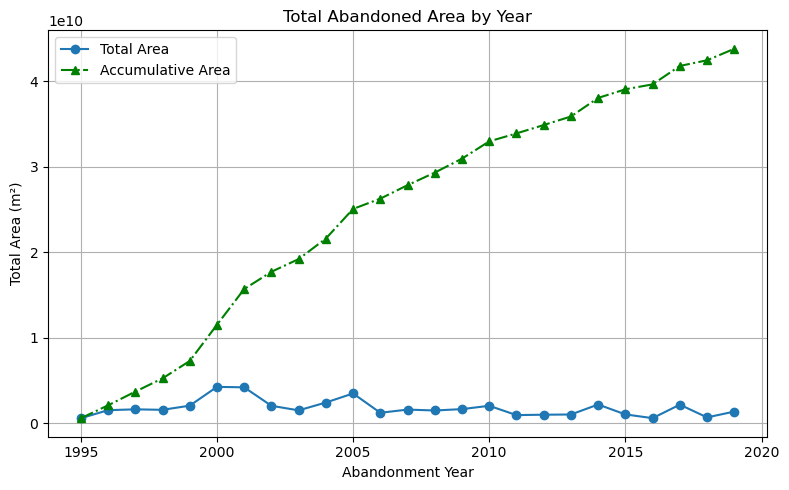

In [ ]:
# 按abandonment_year分组，统计每年总面积
area_sum_by_year = df_net_benefit.groupby('abandonment_year')['area_m2'].sum().reset_index()

# 计算累计面积
area_sum_by_year['accumulative_area'] = area_sum_by_year['area_m2'].cumsum()

years = area_sum_by_year['abandonment_year'].values
areas = area_sum_by_year['accumulative_area'].values

# 只用面积大于0的年份
valid = areas > 0
years_valid = years[valid]
areas_valid = areas[valid]

import numpy as np

if len(areas_valid) > 1:
    # 逐年增长率序列
    growth_rates = (areas_valid[1:] - areas_valid[:-1]) / areas_valid[:-1]
    avg_growth_rate = np.mean(growth_rates) * 100
    avg_growth_rate_se = np.std(growth_rates, ddof=1) / np.sqrt(len(growth_rates)) * 100
    print(f"平均年增长率: {avg_growth_rate:.2f}% ± {avg_growth_rate_se:.2f}% (SE, 基于逐年增长率)")
else:
    avg_growth_rate = float('nan')
    avg_growth_rate_se = float('nan')
    print("数据不足，无法计算增长率标准误。")

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(area_sum_by_year['abandonment_year'], area_sum_by_year['area_m2'], marker='o', label='Total Area')
ax1.set_xlabel('Abandonment Year')
ax1.set_ylabel('Total Area (m²)')
ax1.set_title('Total Abandoned Area by Year')
ax1.grid(True)
ax1.plot(area_sum_by_year['abandonment_year'], area_sum_by_year['accumulative_area'], color='green', marker='^', linestyle='-.', label='Accumulative Area')
ax1.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
df_net_benefit['area_m2'].sum()/1000000/10000*1000 

4376.972775185676

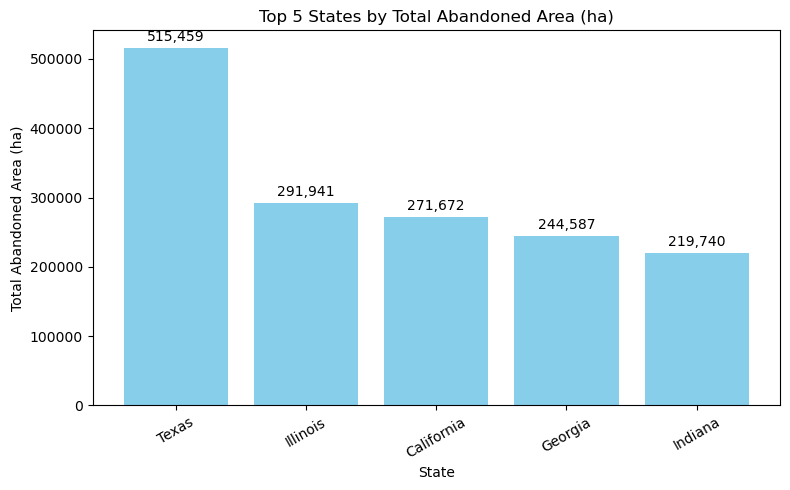

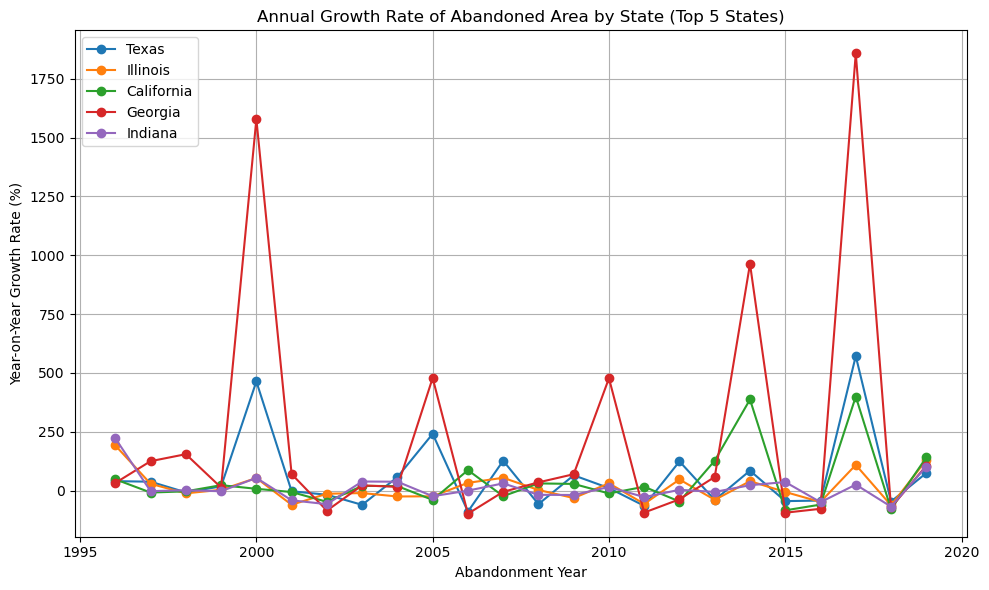

Top 10 states by latest year-on-year growth rate:
              NAME  area_growth_rate
702       New York       1325.967993
1017      Virginia       1006.286495
902   South Dakota        500.131044
850   Pennsylvania        434.935245
24         Alabama        329.014119
677     New Mexico        310.482186
545       Missouri        269.737931
750   North Dakota        200.243932
825         Oregon        192.255064
307           Iowa        188.134590

High-growth states by region (latest year):
Region
Other                31
Mid-Atlantic          7
Gulf Coast            5
Pacific Northwest     2
Name: count, dtype: int64

Top 10 high-growth states in target regions:
                NAME  area_growth_rate             Region
702         New York       1325.967993       Mid-Atlantic
1017        Virginia       1006.286495       Mid-Atlantic
24           Alabama        329.014119         Gulf Coast
825           Oregon        192.255064  Pacific Northwest
1042      Washington        140.9

In [ ]:
# 按州统计弃耕地面积（单位：ha），找出前5州，绘制柱状图，并绘制各州年度增长率。
# 检查增长是否主要发生在Mid-Atlantic Coast, Gulf Coast, Pacific Northwest。

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# 读取美国州界shapefile，确保CRS为WGS84
us_states = gpd.read_file('data/cb_2018_us_state_500k.shp')
us_states_4326 = us_states.to_crs('EPSG:4326')

# 构建像元GeoDataFrame
geometry = [Point(xy) for xy in zip(df_net_benefit['lon'], df_net_benefit['lat'])]
pixel_gdf = gpd.GeoDataFrame(df_net_benefit, geometry=geometry, crs='EPSG:4326')

# 空间连接：为每个像元分配州名
pixel_with_states = gpd.sjoin(pixel_gdf, us_states_4326, how='left', predicate='within')
state_col = 'NAME' if 'NAME' in pixel_with_states.columns else 'STATE_NAME'

# 1. 按州分组，面积转为ha
pixel_with_states['area_ha'] = pixel_with_states['area_m2'] / 10000
state_area = pixel_with_states.groupby(state_col)['area_ha'].sum().reset_index()

# 2. 找出面积最大的前5州
top5_states = state_area.sort_values(by='area_ha', ascending=False).head(5)

# 3. 绘制前5州柱状图
plt.figure(figsize=(8,5))
bars = plt.bar(top5_states[state_col], top5_states['area_ha'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Abandoned Area (ha)')
plt.title('Top 5 States by Total Abandoned Area (ha)')
plt.xticks(rotation=30)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
plt.show()

# 4. 各州年度增长率
state_year_area = pixel_with_states.groupby([state_col, 'abandonment_year'])['area_ha'].sum().reset_index()
state_year_area = state_year_area.sort_values([state_col, 'abandonment_year'])
state_year_area['area_growth_rate'] = state_year_area.groupby(state_col)['area_ha'].pct_change() * 100

# 5. 前5州年度增长率曲线
fig, ax = plt.subplots(figsize=(10,6))
for state in top5_states[state_col]:
    data = state_year_area[state_year_area[state_col] == state]
    ax.plot(data['abandonment_year'], data['area_growth_rate'], marker='o', label=state)
ax.set_xlabel('Abandonment Year')
ax.set_ylabel('Year-on-Year Growth Rate (%)')
ax.set_title('Annual Growth Rate of Abandoned Area by State (Top 5 States)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# 6. 检查增长是否集中在目标区域
mid_atlantic = {'New York', 'New Jersey', 'Delaware', 'Maryland', 'Virginia', 'North Carolina', 'South Carolina'}
gulf_coast = {'Texas', 'Louisiana', 'Mississippi', 'Alabama', 'Florida'}
pacific_nw = {'Washington', 'Oregon'}

latest_year = state_year_area['abandonment_year'].max()
latest_growth = state_year_area[state_year_area['abandonment_year'] == latest_year]
latest_growth = latest_growth.dropna(subset=['area_growth_rate']).sort_values('area_growth_rate', ascending=False)

print("Top 10 states by latest year-on-year growth rate:")
print(latest_growth[[state_col, 'area_growth_rate']].head(10))

def region_label(state):
    if state in mid_atlantic:
        return 'Mid-Atlantic'
    elif state in gulf_coast:
        return 'Gulf Coast'
    elif state in pacific_nw:
        return 'Pacific Northwest'
    else:
        return 'Other'

latest_growth['Region'] = latest_growth[state_col].apply(region_label)
region_counts = latest_growth['Region'].value_counts()
print("\nHigh-growth states by region (latest year):")
print(region_counts)

print("\nTop 10 high-growth states in target regions:")
print(latest_growth[latest_growth['Region'] != 'Other'][[state_col, 'area_growth_rate', 'Region']].head(10))


--- Economic ---
               Count  Proportion
economic_sign                   
negative       49189    0.756963
positive       15764    0.242590
zero              29    0.000446

--- Environmental ---
                    Count  Proportion
environmental_sign                   
negative            33851    0.520929
positive            31102    0.478625
zero                   29    0.000446

--- Emission ---
               Count  Proportion
emission_sign                   
negative       40001    0.615570
positive       24952    0.383983
zero              29    0.000446



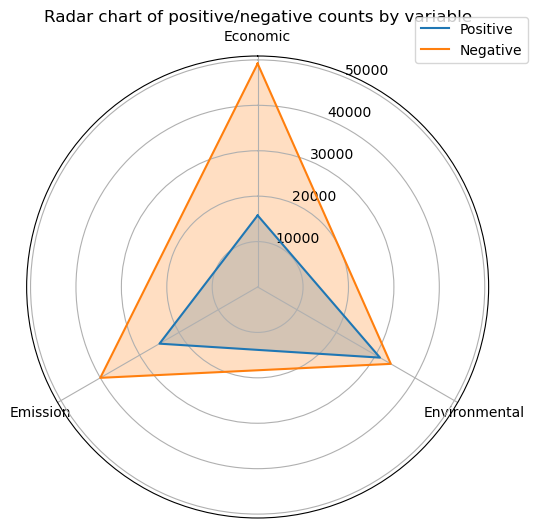

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_pixel_optimized_data contains weight_deviation_economic, weight_deviation_environmental, weight_deviation_emission

# 1. Assign sign labels
def sign_label(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

df_pixel_optimized_data['economic_sign'] = df_pixel_optimized_data['weight_deviation_economic'].apply(sign_label)
df_pixel_optimized_data['environmental_sign'] = df_pixel_optimized_data['weight_deviation_environmental'].apply(sign_label)
df_pixel_optimized_data['emission_sign'] = df_pixel_optimized_data['weight_deviation_emission'].apply(sign_label)

# 2. Count and proportion for each sign type in each dimension
summary = {}
total_count = len(df_pixel_optimized_data)
dimensions = ['economic_sign', 'environmental_sign', 'emission_sign']
dimension_names = ['Economic', 'Environmental', 'Emission']

for dim, name in zip(dimensions, dimension_names):
    counts = df_pixel_optimized_data[dim].value_counts()
    proportions = df_pixel_optimized_data[dim].value_counts(normalize=True)
    summary[name] = pd.DataFrame({
        'Count': counts,
        'Proportion': proportions
    })

# Display the count and proportion for each type in each dimension
for name in dimension_names:
    print(f"--- {name} ---")
    print(summary[name])
    print()

# 3. Prepare radar chart data (only positive and negative)
radar_data = pd.DataFrame({
    'Economic': [
        summary['Economic'].loc['positive', 'Count'] if 'positive' in summary['Economic'].index else 0,
        summary['Economic'].loc['negative', 'Count'] if 'negative' in summary['Economic'].index else 0
    ],
    'Environmental': [
        summary['Environmental'].loc['positive', 'Count'] if 'positive' in summary['Environmental'].index else 0,
        summary['Environmental'].loc['negative', 'Count'] if 'negative' in summary['Environmental'].index else 0
    ],
    'Emission': [
        summary['Emission'].loc['positive', 'Count'] if 'positive' in summary['Emission'].index else 0,
        summary['Emission'].loc['negative', 'Count'] if 'negative' in summary['Emission'].index else 0
    ]
}, index=['Positive', 'Negative'])

# 4. Plot radar chart for counts
labels = radar_data.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for idx, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=idx)
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Radar chart of positive/negative counts by variable')
plt.show()

In [ ]:
df_weight ['pv_potential_dens'] 

,lat,lon,time,acc_forest,cap_forest,final_forest,weighted_density_Forest,weighted_density_Agricultural,weighted_density_Vegetation,acc_agro,...,final_veg,env_scores,pv_potential_dens,Expectation_net_benefit,Revenue_ratio,gmm_score,gmm_density,predicted_label,predicted_prob,sample_type
0,25.295834,-80.287500,2020-01-01,809.56850,859.4,809.5685,0.998714,0.000367,0.000918,772.493469,...,821.04486,0.272397,7191.865919,6382.303639,8.883647,0.051633,3.874315e+16,0,0.000000,negative_sample
1,25.437500,-80.537500,2020-01-01,1389.71330,1436.6,1389.7133,0.829869,0.007830,0.162302,1102.152466,...,1126.51390,0.279062,7035.368191,5690.624063,5.231752,0.107510,2.054387e+18,0,0.046746,prediction
2,25.437500,-80.495834,2020-01-01,1026.14620,1072.6,1026.1462,0.771417,0.022229,0.206354,750.145691,...,778.08900,0.272678,7024.124059,6055.300591,7.250159,0.033807,4.247702e+15,0,0.000000,negative_sample
3,25.445833,-80.454170,2020-01-01,1026.14620,1073.7,1026.1462,0.770923,0.007369,0.221708,756.315613,...,777.34060,0.309372,7017.640780,6048.645138,7.242180,0.010552,1.117299e+13,0,0.000000,negative_sample
4,25.445833,-80.404170,2020-01-01,1051.13070,1093.3,1051.1307,0.714253,0.099801,0.185946,728.004333,...,758.56060,0.307317,7045.490473,6081.010322,7.304962,0.081528,4.463459e+17,0,0.017465,prediction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64977,48.995834,-111.970830,2020-01-01,201.90521,182.2,182.2000,0.952007,0.017433,0.030560,170.484009,...,174.20488,0.251081,6392.674772,6210.923349,35.172626,0.066566,1.493778e+17,0,0.026153,prediction
64978,48.995834,-110.345830,2020-01-01,221.94190,198.1,198.1000,0.626705,0.332696,0.040599,175.665878,...,177.52232,0.296190,6395.853979,6206.053157,33.697715,0.080337,4.120084e+17,0,0.068266,prediction
64979,48.995834,-106.020836,2020-01-01,232.56694,207.1,207.1000,0.889626,0.003256,0.107118,209.715591,...,207.00000,0.177785,6412.037900,6204.952188,30.963208,0.076823,3.232082e+17,0,0.065097,prediction
64980,48.995834,-104.087500,2020-01-01,249.97507,225.2,225.2000,0.456741,0.057912,0.485347,204.508926,...,207.61511,0.284555,6292.888713,6077.421747,29.205817,0.377389,6.627032e+21,0,0.109234,prediction


In [28]:
df_pixel_optimized_data

,lon,lat,avg_npv,predicted_prob,Expectation_net_benefit,optimal_weight_economic,optimal_weight_environmental,optimal_weight_emission,ccd_optimized,coupling_degree,coordination_degree,weight_deviation_economic,weight_deviation_environmental,weight_deviation_emission,economic_feasible
0,-124.370834,47.954166,-9.371520e+05,0.045891,4824.921177,1.000000e+00,3.989864e-16,3.382711e-17,0.367777,0.997039,0.135661,0.666667,-0.333333,-0.333333,0
1,-124.212500,40.570835,5.553589e+04,0.968293,6284.450529,6.938894e-17,1.000000e+00,0.000000e+00,0.891990,0.987990,0.805318,-0.333333,0.666667,-0.333333,1
2,-124.204170,40.562500,1.223183e+04,0.960158,6230.448275,4.996004e-16,1.000000e+00,3.053113e-16,0.886431,0.984316,0.798280,-0.333333,0.666667,-0.333333,1
3,-123.679170,48.120834,-1.048014e+06,0.277199,4834.164842,7.285839e-16,1.000000e+00,3.712308e-16,0.401650,0.987786,0.163317,-0.333333,0.666667,-0.333333,0
4,-123.629166,48.120834,-1.145627e+06,0.229049,4699.726395,0.000000e+00,1.000000e+00,4.510281e-17,0.384453,0.990807,0.149175,-0.333333,0.666667,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64977,-67.829170,46.887500,-9.098034e+05,0.999332,5260.444799,1.387779e-16,1.000000e+00,3.053113e-16,0.756589,0.689239,0.830521,-0.333333,0.666667,-0.333333,0
64978,-67.829170,46.920834,-9.480477e+05,0.999058,5201.021838,1.110223e-16,1.000000e+00,0.000000e+00,0.749789,0.677077,0.830309,-0.333333,0.666667,-0.333333,0
64979,-67.812500,46.312500,-9.327203e+05,0.999880,5225.638163,0.000000e+00,1.000000e+00,0.000000e+00,0.752634,0.681705,0.830942,-0.333333,0.666667,-0.333333,0
64980,-67.804170,46.762500,-9.530168e+05,0.999813,5233.693273,5.551115e-17,1.000000e+00,2.220446e-16,0.751557,0.679798,0.830891,-0.333333,0.666667,-0.333333,0


In [30]:
def analyze_all_dimensions_cross_target_difference(pixel_optimized_data, df_net_benefit):
    """
    分析所有三个维度的交叉目标差值
    """
    
    # 更优雅地merge：只merge一次，避免冗余，自动处理列名冲突
    # 检查必要列
    required_cols = {'lat', 'lon', 'area_m2'}
    if not required_cols.issubset(df_net_benefit.columns):
        missing = required_cols - set(df_net_benefit.columns)
        raise ValueError(f"df_net_benefit 缺少列: {missing}")
    if not {'lat', 'lon', 'avg_npv', 'predicted_prob', 'ccd_optimized', 'Expectation_net_benefit'}.issubset(pixel_optimized_data.columns):
        raise ValueError("pixel_optimized_data 缺少必要列")

    # merge时自动加后缀，避免同名冲突
    merged = pd.merge(
        pixel_optimized_data,
        df_net_benefit[['lat', 'lon', 'area_m2']],
        on=['lat', 'lon'],
        how='inner',
        validate='one_to_one',
        suffixes=('', '_area')
    )

    if merged.empty:
        raise ValueError("合并后没有数据，请检查lat, lon是否匹配")

    # 获取数据（转换为公顷）
    area_values = merged['area_m2'].values / 10000
    ccd_values = merged['ccd_optimized'].values
    economic_density = merged['avg_npv'].values
    env_density = merged['predicted_prob'].values
    carbon_density = merged['Expectation_net_benefit'].values

    # 计算总效益值
    economic_total = economic_density * area_values  # NPV需要乘以面积
    env_total = env_density  # Environmental Scores直接使用密度值
    carbon_total = carbon_density * area_values  # Carbon需要乘以面积
    
    # 计算总面积（公顷）
    total_area_ha = np.sum(area_values)
    
    # 定义三个维度
    dimensions = [
        {
            'name': 'Economic NPV',
            'total_values': economic_total,
            'density_values': economic_density,
            'unit': 'USD',
            'multiply_area': True
        },
        {
            'name': 'Environmental Scores',
            'total_values': env_total,
            'density_values': env_density,
            'unit': 'Score',
            'multiply_area': False
        },
        {
            'name': 'Carbon Mitigation',
            'total_values': carbon_total,
            'density_values': carbon_density,
            'unit': 'Mg C',
            'multiply_area': True
        }
    ]
    
    # 存储所有结果
    all_results = {}
    
    for dim_idx, current_dim in enumerate(dimensions):
        print(f"\n{'='*60}")
        print(f"=== {current_dim['name']}维度交叉目标差值分析 ===")
        print(f"{'='*60}")
        print(f"总面积: {total_area_ha:.2f} 公顷")
        
        current_total = current_dim['total_values']
        current_name = current_dim['name']
        current_unit = current_dim['unit']
        
        # 1. 按当前目标最优排序的累积效应
        current_sorted_indices = np.argsort(current_total)[::-1]
        current_optimal_cumulative = np.cumsum(current_total[current_sorted_indices])
        current_optimal_percentage = np.arange(1, len(current_optimal_cumulative) + 1) / len(current_optimal_cumulative) * 100
        
        # 确保从0开始
        current_optimal_cumulative = np.concatenate([[0], current_optimal_cumulative])
        current_optimal_percentage = np.concatenate([[0], current_optimal_percentage])
        
        # 2. 按其他目标排序在当前目标下的累积效应
        other_dimensions = [d for d in dimensions if d['name'] != current_name]
        other_cumulatives = {}
        
        for other_dim in other_dimensions:
            other_name = other_dim['name']
            other_total = other_dim['total_values']
            
            # 按其他目标排序
            other_sorted_indices = np.argsort(other_total)[::-1]
            other_optimal_cumulative = np.cumsum(current_total[other_sorted_indices])
            other_optimal_percentage = np.arange(1, len(other_optimal_cumulative) + 1) / len(other_optimal_cumulative) * 100
            
            # 确保从0开始
            other_optimal_cumulative = np.concatenate([[0], other_optimal_cumulative])
            other_optimal_percentage = np.concatenate([[0], other_optimal_percentage])
            
            other_cumulatives[other_name] = {
                'cumulative': other_optimal_cumulative,
                'percentage': other_optimal_percentage
            }
        
        # 统计当前目标最优累积效应的最大值及其分位数
        max_current_optimal_idx = np.argmax(current_optimal_cumulative)
        max_current_optimal_value = current_optimal_cumulative[max_current_optimal_idx]
        max_current_optimal_percentage = current_optimal_percentage[max_current_optimal_idx]
        
        print(f"\n=== {current_name}累积效应统计 ===")
        print(f"{current_name}最优累积效应最大值: {max_current_optimal_value:.2e}")
        print(f"对应分位数: {max_current_optimal_percentage:.2f}%")
        
        # 为NPV添加y=0分位数分析
        if current_name == 'Economic NPV':
            print(f"\n=== {current_name} 所有Y=0 分位数分析 ===")
            
            # 函数：找到所有零点
            def find_all_zeros(cumulative_values, percentage_values, tolerance=1e9):
                """找到累积曲线中所有接近0的点"""
                zeros = []
                
                # 方法1：直接寻找接近0的点
                for i in range(len(cumulative_values)):
                    if abs(cumulative_values[i]) <= tolerance:
                        zeros.append({
                            'index': i,
                            'percentage': percentage_values[i],
                            'value': cumulative_values[i]
                        })
                
                # 方法2：寻找符号变化点（更准确）
                sign_changes = []
                for i in range(1, len(cumulative_values)):
                    if (cumulative_values[i-1] * cumulative_values[i]) < 0:  # 符号变化
                        # 线性插值找到更精确的零点
                        x1, x2 = percentage_values[i-1], percentage_values[i]
                        y1, y2 = cumulative_values[i-1], cumulative_values[i]
                        zero_percentage = x1 - y1 * (x2 - x1) / (y2 - y1)
                        sign_changes.append({
                            'index': i,
                            'percentage': zero_percentage,
                            'value': 0.0
                        })
                
                # 合并两种方法的结果
                all_zeros = zeros + sign_changes
                
                # 去重并排序
                unique_zeros = []
                seen_percentages = set()
                for zero in sorted(all_zeros, key=lambda x: x['percentage']):
                    if not any(abs(zero['percentage'] - seen) < 1.0 for seen in seen_percentages):
                        unique_zeros.append(zero)
                        seen_percentages.add(zero['percentage'])
                
                return unique_zeros
            
            # 当前目标最优排序的所有零点
            current_zeros = find_all_zeros(current_optimal_cumulative, current_optimal_percentage)
            print(f"{current_name}最优排序下所有Y=0点:")
            for i, zero in enumerate(current_zeros):
                print(f"  零点{i+1}: {zero['percentage']:.2f}% (累积值: {zero['value']:.2e})")
            
            # 其他目标排序下的所有零点
            for other_name, other_data in other_cumulatives.items():
                other_zeros = find_all_zeros(other_data['cumulative'], other_data['percentage'])
                print(f"\n{other_name}排序下所有Y=0点:")
                for i, zero in enumerate(other_zeros):
                    print(f"  零点{i+1}: {zero['percentage']:.2f}% (累积值: {zero['value']:.2e})")
                
                # 分析零点差异
                print(f"\n{current_name}最优 vs {other_name}最优 零点分析:")
                if current_zeros and other_zeros:
                    # 找到最接近的零点对
                    min_diff = float('inf')
                    closest_pair = None
                    for c_zero in current_zeros:
                        for o_zero in other_zeros:
                            diff = abs(c_zero['percentage'] - o_zero['percentage'])
                            if diff < min_diff:
                                min_diff = diff
                                closest_pair = (c_zero, o_zero)
                    
                    if closest_pair:
                        c_zero, o_zero = closest_pair
                        print(f"最接近的零点对:")
                        print(f"  {current_name}最优: {c_zero['percentage']:.2f}%")
                        print(f"  {other_name}最优: {o_zero['percentage']:.2f}%")
                        print(f"  差异: {c_zero['percentage'] - o_zero['percentage']:.2f}%")
                else:
                    print("  无法找到匹配的零点对")
            
            # 分析零点数量
            print(f"\n零点数量统计:")
            print(f"{current_name}最优排序: {len(current_zeros)} 个零点")
            for other_name, other_data in other_cumulatives.items():
                other_zeros = find_all_zeros(other_data['cumulative'], other_data['percentage'])
                print(f"{other_name}排序: {len(other_zeros)} 个零点")
        
        # 分析与其他目标的差值
        for other_name, other_data in other_cumulatives.items():
            print(f"\n{current_name}最优 vs {other_name}最优 差值分析:")
            
            # 计算差值
            diff_current_vs_other = current_optimal_cumulative - other_data['cumulative']
            
            # 找到最大差值及其位置
            max_diff_idx = np.argmax(diff_current_vs_other)
            max_diff_percentage = current_optimal_percentage[max_diff_idx]
            max_diff_value = diff_current_vs_other[max_diff_idx]
            max_current_optimal_at_diff = current_optimal_cumulative[max_diff_idx]
            max_other_optimal_at_diff = other_data['cumulative'][max_diff_idx]
            
            # 计算最大和最小累积值
            max_current_total = np.max(current_optimal_cumulative)
            min_current_total = np.min(current_optimal_cumulative)
            max_other_total = np.max(other_data['cumulative'])
            min_other_total = np.min(other_data['cumulative'])
            
            # 均摊到地块上的值
            max_current_per_ha = max_current_total / total_area_ha
            min_current_per_ha = min_current_total / total_area_ha
            max_other_per_ha = max_other_total / total_area_ha
            min_other_per_ha = min_other_total / total_area_ha
            max_diff_per_ha = max_diff_value / total_area_ha
            
            print(f"最大差值: {max_diff_value:.2e}")
            print(f"发生在分位数: {max_diff_percentage:.1f}%")
            print(f"对应的{current_name}最优累积值: {max_current_optimal_at_diff:.2e}")
            print(f"对应的{other_name}最优累积值: {max_other_optimal_at_diff:.2e}")
            print(f"\n累积值范围分析:")
            print(f"{current_name}累积值范围: {min_current_total:.2e} - {max_current_total:.2e}")
            print(f"{other_name}累积值范围: {min_other_total:.2e} - {max_other_total:.2e}")
            print(f"\n均摊到地块上的值 ({current_unit}/公顷):")
            print(f"{current_name}: {min_current_per_ha:.2f} - {max_current_per_ha:.2f}")
            print(f"{other_name}: {min_other_per_ha:.2f} - {max_other_per_ha:.2f}")
            print(f"最大差值: {max_diff_per_ha:.2f}")
            
            # 分析关键分位数的差值
            key_percentages = [3, 10, 20, 30, 40, 50, 60, 70, 80, 90]
            print(f"\n关键分位数差值分析 ({current_name}最优 - {other_name}最优):")
            print(f"{'分位数(%)':<10} {'{current_name}最优':<15} {'{other_name}最优':<15} {'差值':<15} {'差值/公顷':<15}")
            print("-" * 75)
            
            for p in key_percentages:
                idx = np.argmin(np.abs(current_optimal_percentage - p))
                if idx < len(current_optimal_cumulative):
                    current_val = current_optimal_cumulative[idx]
                    other_val = other_data['cumulative'][idx]
                    diff_val = current_val - other_val
                    diff_per_ha = diff_val / total_area_ha
                    print(f"{p:<10} {current_val:<15.2e} {other_val:<15.2e} {diff_val:<15.2e} {diff_per_ha:<15.2f}")
            
            # 存储结果
            if current_name not in all_results:
                all_results[current_name] = {}
            
            all_results[current_name][other_name] = {
                'max_diff': max_diff_value,
                'max_diff_percentage': max_diff_percentage,
                'max_current': max_current_optimal_at_diff,
                'max_other': max_other_optimal_at_diff,
                'max_current_total': max_current_total,
                'min_current_total': min_current_total,
                'max_other_total': max_other_total,
                'min_other_total': min_other_total,
                'max_current_per_ha': max_current_per_ha,
                'min_current_per_ha': min_current_per_ha,
                'max_other_per_ha': max_other_per_ha,
                'min_other_per_ha': min_other_per_ha,
                'max_diff_per_ha': max_diff_per_ha
            }
    
    print(f"\n{'='*60}")
    print("=== 所有维度分析完成 ===")
    print(f"{'='*60}")
    
    return all_results

# 执行所有维度分析
all_dimensions_results = analyze_all_dimensions_cross_target_difference(df_pixel_optimized_data, df_net_benefit)


=== Economic NPV维度交叉目标差值分析 ===
总面积: 4376972.78 公顷

=== Economic NPV累积效应统计 ===
Economic NPV最优累积效应最大值: 6.98e+11
对应分位数: 30.59%

=== Economic NPV 所有Y=0 分位数分析 ===
Economic NPV最优排序下所有Y=0点:
  零点1: 0.00% (累积值: 0.00e+00)
  零点2: 85.20% (累积值: 9.78e+08)

Environmental Scores排序下所有Y=0点:
  零点1: 0.00% (累积值: 0.00e+00)

Economic NPV最优 vs Environmental Scores最优 零点分析:
最接近的零点对:
  Economic NPV最优: 0.00%
  Environmental Scores最优: 0.00%
  差异: 0.00%

Carbon Mitigation排序下所有Y=0点:
  零点1: 0.00% (累积值: 0.00e+00)
  零点2: 83.90% (累积值: 9.82e+08)

Economic NPV最优 vs Carbon Mitigation最优 零点分析:
最接近的零点对:
  Economic NPV最优: 0.00%
  Carbon Mitigation最优: 0.00%
  差异: 0.00%

零点数量统计:
Economic NPV最优排序: 2 个零点
Environmental Scores排序: 1 个零点
Carbon Mitigation排序: 2 个零点

Economic NPV最优 vs Environmental Scores最优 差值分析:
最大差值: 1.11e+12
发生在分位数: 42.7%
对应的Economic NPV最优累积值: 6.59e+11
对应的Environmental Scores最优累积值: -4.47e+11

累积值范围分析:
Economic NPV累积值范围: -4.59e+11 - 6.98e+11
Environmental Scores累积值范围: -5.12e+11 - 0.00e+00

均摊到地块上的值 (USD/公顷):
Economic

In [ ]:

if abs(-5.65e+11) > 0:
    ratio = abs(6.39e+11) / abs(-5.63e+11)
    print(f"Economic最优累计值是Environmental最优累计值的{ratio:.2f}倍")
    print(f"也就是说，要赚{ratio:.2f}倍的成本")
else:
    print("Environmental最优累计值为0，无法计算倍数差距。")


Economic最优累计值是Environmental最优累计值的1.13倍
也就是说，要赚1.13倍的成本


## 3、环境概率分析

In [41]:
df_gmm_scores

,Unnamed: 0,time,lat,lon,abandonment_year,abandonment_duration,current_abandonment,landcover,DEM,GDPpc,...,tas,wind,original_id,gmm_logp,gmm_pit,gmm_density,gmm_score,predicted_label,predicted_prob,sample_type
0,18767832,2020-01-01,48.395832,-122.229164,2005.0,19.0,1,4.0,81.4375,109791.0,...,2836.944172,3.022345,63943,33.931874,0.026202,5.450366e+14,0.022679,0,0.000000,negative_sample
1,12876425,2020-01-01,26.429167,-81.454170,2006.0,18.0,1,2.0,11.6875,43329.0,...,2979.747214,2.847377,48191,22.273261,0.006304,4.711450e+09,0.002249,0,0.000000,negative_sample
2,4851568,2020-01-01,41.170834,-111.929170,2007.0,17.0,1,5.0,1534.5625,62675.0,...,2821.686336,2.260560,7242,28.715092,0.013396,2.956693e+12,0.008108,0,0.000000,negative_sample
3,8613368,2020-01-01,32.879166,-96.929170,2003.0,21.0,1,3.0,133.4375,64521.0,...,2922.329177,3.570275,21471,15.783543,0.003349,7.156579e+06,0.000615,0,0.000000,negative_sample
4,4394909,2020-01-01,39.645832,-104.920830,2009.0,15.0,1,2.0,1710.4375,114952.0,...,2823.361037,2.629824,5274,37.015818,0.039401,1.190599e+16,0.041227,0,0.000000,negative_sample
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64977,20187860,2020-01-01,46.920834,-67.829170,1999.0,25.0,1,2.0,170.1875,33949.0,...,2769.888931,4.258749,64976,48.257303,0.297281,9.075709e+20,0.289405,1,0.811096,prediction
64978,20192249,2020-01-01,46.937500,-67.920830,1998.0,26.0,1,2.0,199.3750,33949.0,...,2768.901404,3.429452,64977,49.820651,0.371257,4.333450e+21,0.357644,1,0.884989,prediction
64979,20247244,2020-01-01,47.145832,-67.962500,2000.0,24.0,1,2.0,223.0000,33949.0,...,2766.375025,3.813229,64978,45.343591,0.173956,4.925739e+19,0.185274,1,0.970200,prediction
64980,20271365,2020-01-01,47.237500,-68.620834,2000.0,24.0,1,2.0,181.2500,33949.0,...,2768.493367,3.047965,64979,47.267719,0.252069,3.373724e+20,0.250454,1,0.907429,prediction


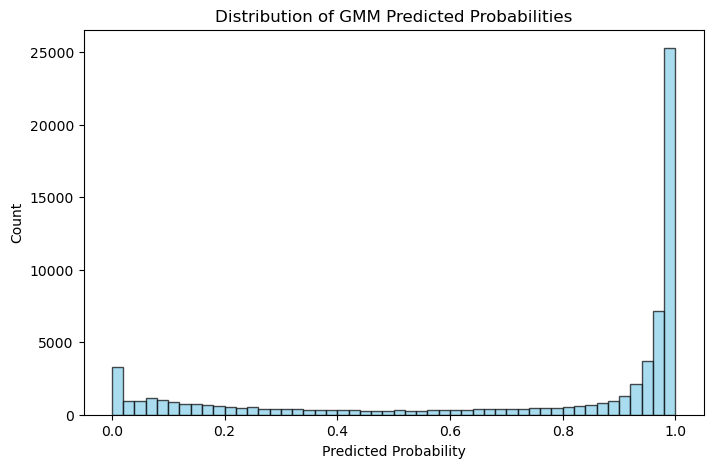

Mean predicted_prob: 0.7383 ± 0.0014 (SE)


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of predicted_prob
plt.figure(figsize=(8,5))
plt.hist(df_gmm_scores['predicted_prob'], bins=50, color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of GMM Predicted Probabilities')
plt.show()

# Calculate mean and standard error
mean_prob = df_gmm_scores['predicted_prob'].mean()
se_prob = df_gmm_scores['predicted_prob'].std(ddof=1) / np.sqrt(len(df_gmm_scores))
print(f"Mean predicted_prob: {mean_prob:.4f} ± {se_prob:.4f} (SE)")


## 4、碳汇分析

### 累积效应分析（分策略碳汇类型）


=== 各碳汇类型最大累积百分比 ===
Agricultural: 5.76%
Vegetation: 13.86%
Forest: 79.36%
Total: 98.91%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


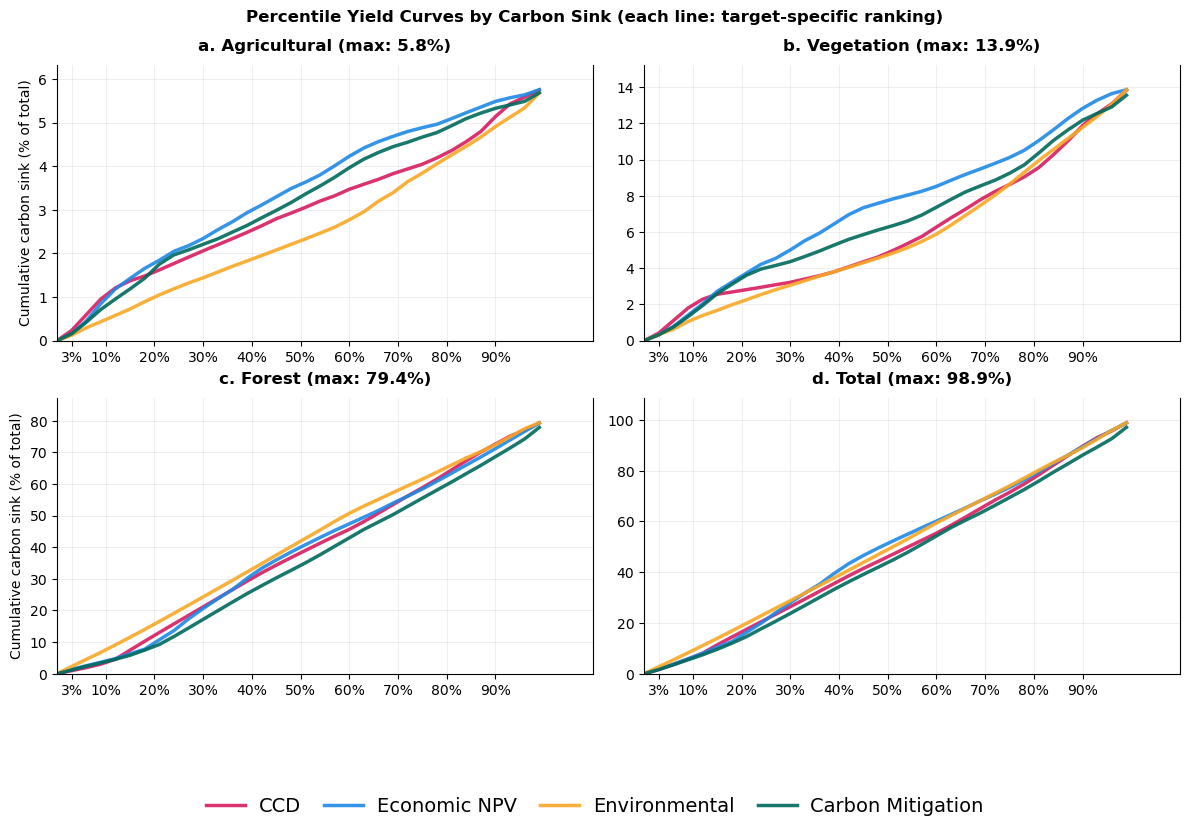

百分位数小倍数图创建完成！


In [46]:


def percentile_small_multiples(pixel_optimized_data, df_net_benefit, df_weight,
                               percentiles=np.arange(3,101,3),  # 从3%开始，每3%一个点
                               targets=(('ccd_optimized','CCD'),
                                        ('avg_npv','Economic NPV'),
                                        ('predicted_prob','Environmental'),
                                        ('Expectation_net_benefit','Carbon Mitigation'))):
    m = (pixel_optimized_data
         .merge(df_net_benefit[['lat','lon','area_m2']], on=['lat','lon'], how='inner')
         .merge(df_weight[['lat','lon',
                           'final_forest','weighted_density_Forest',
                           'final_agro','weighted_density_Agricultural',
                           'final_veg','weighted_density_Vegetation']], on=['lat','lon'], how='inner'))
    ha = (m['area_m2'].values/10000.0)
    forest = m['final_forest'].values * m['weighted_density_Forest'].values * ha
    agro   = m['final_agro'].values   * m['weighted_density_Agricultural'].values * ha
    veg    = m['final_veg'].values    * m['weighted_density_Vegetation'].values * ha
    total  = forest + agro + veg
    sinks = [('Agricultural', agro),
             ('Vegetation',   veg),
             ('Forest',       forest),
             ('Total',        total)]

    base_colors = ['#D81B60','#1E88E5','#F9A825','#00695C']
    x = percentiles

    # 改为2行2列布局
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 调整尺寸适应2x2布局
    axes = axes.flatten()  # 将axes展平为一维数组
    
    # 用于收集图例元素
    legend_elements = []
    
    # 统一使用Total Carbon作为归一化基准
    total_max = np.sum(total)  # Total Carbon的总和作为统一基准
    
    # 存储每个子图的最大值，用于设置Y轴范围
    max_percentages = []
    
    for ax_idx, (sname, svals) in enumerate(sinks):
        ax = axes[ax_idx]
        
        # 去除顶部边框
        ax.spines['top'].set_visible(False)
        
        # 存储当前子图的所有Y值，用于计算最大值
        all_y_values = []
        
        for ci,(tcol,tname) in enumerate(targets):
            order = np.argsort(m[tcol].values)[::-1]
            cum = np.cumsum(svals[order])
            
            # 确保从0开始，包含0点
            cum_with_zero = np.concatenate([[0], cum])
            x_with_zero = np.concatenate([[0], x])
            
            # 计算每个分位数对应的累积值
            y_values = []
            for p in x_with_zero:
                if p == 0:
                    y_values.append(0)
                else:
                    idx = int((p/100.0) * len(cum))
                    if idx < len(cum):
                        y_values.append(cum[idx])
                    else:
                        y_values.append(cum[-1])
            
            # 统一使用Total Carbon作为归一化基准，转换为百分比
            y = np.array(y_values) / total_max * 100  # 转换为百分比
            all_y_values.extend(y)  # 收集所有Y值
            
            line = ax.plot(x_with_zero, y, lw=2.5, alpha=0.9, label=tname, color=base_colors[ci])
            
            # 收集图例元素（只在第一个子图中收集，避免重复）
            if ax_idx == 0:
                legend_elements.append(line[0])

        # 计算当前子图的最大值，并设置Y轴范围
        max_y = max(all_y_values)
        max_percentages.append(max_y)
        
        # 设置Y轴范围：从0到最大值的1.1倍，确保有足够空间
        y_max = max_y * 1.1
        ax.set_ylim(0, y_max)

        # 设置X轴刻度（按照cross_target_analysis的样式，从3%开始）
        key_percentages = [3, 10, 20, 30, 40, 50, 60, 70, 80, 90]
        xtick_positions = [p for p in key_percentages if p >= 3]
        xtick_labels = [f'{p}%' for p in xtick_positions]
        
        ax.set_xticks(xtick_positions)
        ax.set_xticklabels(xtick_labels, ha='center', fontsize=10)
        ax.set_xlim(0, 110)  # 稍微扩展一点，为文本标签留空间
        
        # 设置Y轴标签（只在左侧子图显示）
        if ax_idx in [0, 2]:  # 左侧子图
            ax.set_ylabel('Cumulative carbon sink (% of total)', fontsize=10)
        
        # 网格设置（按照cross_target_analysis的样式）
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
        ax.set_axisbelow(True)
        
        # 刻度设置
        ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
        
        # 子图标题（使用a, b, c, d），并显示最大值
        ax.set_title(f'{chr(97+ax_idx)}. {sname} (max: {max_y:.1f}%)', fontsize=12, fontweight='bold', pad=10)

    # 添加图例（按照cross_target_analysis的样式）
    fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
               ncol=4, fontsize=14, frameon=False, fancybox=False, shadow=False, framealpha=0.9,
               columnspacing=1.2, handletextpad=0.7)

    # 总标题
    fig.suptitle('Percentile Yield Curves by Carbon Sink (each line: target-specific ranking)',
                 y=0.98, fontsize=12, weight='bold')
    
    # 布局设置（按照cross_target_analysis的样式）
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # 为更大的底部图例留出空间
    
    # 打印每个子图的最大值信息
    print("\n=== 各碳汇类型最大累积百分比 ===")
    for i, (sname, _) in enumerate(sinks):
        print(f"{sname}: {max_percentages[i]:.2f}%")
    return fig, axes

# 执行函数
fig_percentile, axes_percentile = percentile_small_multiples(df_pixel_optimized_data, df_net_benefit, df_weight)

# 保存图形
fig_percentile.savefig('figure/US_figure/Figure_percentile_small_multiples.eps', bbox_inches='tight', dpi=300, format='eps')
fig_percentile.savefig('figure/US_figure/Figure_percentile_small_multiples.png', bbox_inches='tight', dpi=300, format='png')
plt.show()

print("百分位数小倍数图创建完成！")

### 最大差异分析
（主要逻辑： 对比各个维度下的最优曲线，单目标与最优曲线的差距、以及这个差距除以最优曲线所造成的的性能损失）

### 概率分布分析

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import geopandas as gpd
from shapely.geometry import Point

df_weight = pd.read_csv('data/US_data/df_weight.csv')
us_states = gpd.read_file(r'data\cb_2018_us_state_500k.shp')

# 提取 us_states 里的 Name 字段，并根据 df_weight 的 'lat' 和 'lon' 匹配
# 首先将 df_weight 转为 GeoDataFrame
geometry = [Point(xy) for xy in zip(df_weight['lon'], df_weight['lat'])]
df_weight_gdf = gpd.GeoDataFrame(df_weight, geometry=geometry, crs=us_states.crs)

# 使用 spatial join 匹配州名
df_weight_gdf = gpd.sjoin(df_weight_gdf, us_states[['geometry', 'NAME']], how='left', predicate='within')

# 将匹配到的州名添加到 df_weight
df_weight['state_name'] = df_weight_gdf['NAME']




In [ ]:
import numpy as np
from scipy import stats

def calculate_confidence_interval(data, confidence_level=0.95):
    """
    计算置信区间
    """
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # 样本标准差
    n = len(data)
    
    # t分布临界值
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
    
    # 标准误差
    standard_error = std / np.sqrt(n)
    
    # 置信区间
    margin_of_error = t_critical * standard_error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    return lower_bound, upper_bound, margin_of_error

def calculate_proportion_confidence_interval(successes, n, confidence_level=0.95):
    """
    计算比例的置信区间（Wilson score interval）
    """
    if n == 0:
        return 0, 0, 0
    p = successes / n
    z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    denominator = 1 + z**2 / n
    centre = p + z**2 / (2 * n)
    margin = z * np.sqrt((p * (1 - p) + z**2 / (4 * n)) / n)
    lower_bound = (centre - margin) / denominator
    upper_bound = (centre + margin) / denominator
    return lower_bound, upper_bound, (upper_bound - lower_bound) / 2

def calculate_percentile_interval(data, lower_percentile=2.5, upper_percentile=97.5):
    """
    计算分位数区间（相当于95%置信区间）
    """
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return lower_bound, upper_bound

def analyze_carbon_sink_density(data, sink_name):
    """
    分析碳汇密度的完整统计信息
    """
    print(f"\n{'='*60}")
    print(f"=== {sink_name} 统计分析 ===")
    print(f"{'='*60}")
    
    # 基本统计
    print(f"样本量: {len(data)}")
    print(f"均值: {data.mean():.6f}")
    print(f"标准差: {data.std():.6f}")
    print(f"最小值: {data.min():.6f}")
    print(f"最大值: {data.max():.6f}")
    
    # 置信区间
    lower, upper, margin = calculate_confidence_interval(data)
    print(f"\n95%置信区间: [{lower:.6f}, {upper:.6f}]")
    print(f"误差范围: ±{margin:.6f}")
    
    # 分位数区间
    p_lower, p_upper = calculate_percentile_interval(data)
    print(f"95%分位数区间: [{p_lower:.6f}, {p_upper:.6f}]")
    
    # 汇报格式
    print(f"\n汇报格式:")
    print(f"{sink_name}: {data.mean():.6f} ± {margin:.6f} (95% CI)")
    print(f"{sink_name}: {data.mean():.6f} (95% CI: {lower:.6f}-{upper:.6f})")
    
    # 大于平均值的面积占比
    mean_density = data.mean()
    greater_than_mean = data[data > mean_density]
    n_total = len(data)
    n_greater = len(greater_than_mean)
    proportion = n_greater / n_total if n_total > 0 else 0
    
    # Wilson score interval for proportion
    prop_lower, prop_upper, prop_margin = calculate_proportion_confidence_interval(n_greater, n_total, confidence_level=0.95)
    
    print(f"\n大于平均值的面积占比: {proportion:.4%}")
    print(f"95%置信区间: [{prop_lower:.4%}, {prop_upper:.4%}]")
    print(f"误差范围: ±{prop_margin:.4%}")
    
    # 汇报格式
    print(f"Proportion of area with {sink_name.lower()} greater than mean: {proportion:.6%} ± {prop_margin:.6%} (95% CI)")
    print(f"Proportion of area with {sink_name.lower()} greater than mean: {proportion:.6%} (95% CI: {prop_lower:.6%}-{prop_upper:.6%})")
    
    return {
        'mean': data.mean(),
        'std': data.std(),
        'ci_lower': lower,
        'ci_upper': upper,
        'margin': margin,
        'percentile_lower': p_lower,
        'percentile_upper': p_upper,
        'proportion_greater_mean': proportion,
        'proportion_ci_lower': prop_lower,
        'proportion_ci_upper': prop_upper,
        'proportion_margin': prop_margin
    }

# 分析三个碳汇类型
carbon_sinks = {
    'Forest': df_weight['weighted_density_Forest'].dropna(),
    'Agricultural': df_weight['weighted_density_Agricultural'].dropna(),
    'Vegetation': df_weight['weighted_density_Vegetation'].dropna()
}

# 存储所有结果
all_results = {}

for sink_name, data in carbon_sinks.items():
    results = analyze_carbon_sink_density(data, sink_name)
    all_results[sink_name] = results

# 汇总比较
print(f"\n{'='*60}")
print("=== 三种碳汇类型汇总比较 ===")
print(f"{'='*60}")

print(f"{'碳汇类型':<15} {'均值':<12} {'标准差':<12} {'95%置信区间':<25} {'大于均值占比':<15}")
print("-" * 85)

for sink_name, results in all_results.items():
    print(f"{sink_name:<15} {results['mean']:<12.6f} {results['std']:<12.6f} "
          f"[{results['ci_lower']:.6f}, {results['ci_upper']:.6f}] "
          f"{results['proportion_greater_mean']:<15.4%}")

# 相对比较分析
print(f"\n=== 相对比较分析 ===")
total_mean = sum(results['mean'] for results in all_results.values())
print(f"三种碳汇类型均值总和: {total_mean:.6f}")

for sink_name, results in all_results.items():
    relative_proportion = results['mean'] / total_mean * 100
    print(f"{sink_name}相对占比: {relative_proportion:.2f}%")

# 变异系数比较
print(f"\n=== 变异系数比较 (CV = 标准差/均值) ===")
for sink_name, results in all_results.items():
    cv = results['std'] / results['mean'] if results['mean'] != 0 else 0
    print(f"{sink_name}变异系数: {cv:.4f}")

# 保存结果到文件（可选）
import pandas as pd

summary_df = pd.DataFrame({
    '碳汇类型': list(all_results.keys()),
    '均值': [results['mean'] for results in all_results.values()],
    '标准差': [results['std'] for results in all_results.values()],
    '95%置信区间下限': [results['ci_lower'] for results in all_results.values()],
    '95%置信区间上限': [results['ci_upper'] for results in all_results.values()],
    '误差范围': [results['margin'] for results in all_results.values()],
    '大于均值占比': [results['proportion_greater_mean'] for results in all_results.values()],
    '大于均值占比95%CI下限': [results['proportion_ci_lower'] for results in all_results.values()],
    '大于均值占比95%CI上限': [results['proportion_ci_upper'] for results in all_results.values()]
})

print(f"\n=== 结果汇总表 ===")
print(summary_df.to_string(index=False))

# # 保存到CSV文件
# summary_df.to_csv('carbon_sink_density_analysis.csv', index=False, encoding='utf-8-sig')
# print(f"\n结果已保存到 'carbon_sink_density_analysis.csv'")

95%置信区间: [0.7558, 0.7597]
误差范围: ±0.0019
=== Forest Density 统计分析 ===
样本量: 64982
均值: 0.7578
标准差: 0.2532
95%置信区间: [0.7558, 0.7597]
误差范围: ±0.0019
95%分位数区间: [0.0790, 1.0000]

汇报格式:
Forest density: 0.757783 ± 0.001947 (95% CI)
Forest density: 0.757783 (95% CI: 0.755836-0.759730)

大于平均值的面积占比: 60.1120%
95%置信区间: [59.7350%, 60.4879%]
误差范围: ±0.3765%
Proportion of area with forest density greater than mean: 60.112031% ± 0.376479% (95% CI)
Proportion of area with forest density greater than mean: 60.112031% (95% CI: 59.734954%-60.487912%)


前十州（按数量排序）:
        state_name  count  proportion
39           Texas   4079    0.104424
8          Georgia   3287    0.084148
10        Illinois   2658    0.068046
30  North Carolina   2008    0.051405
19        Michigan   2007    0.051380
11         Indiana   1857    0.047540
45       Wisconsin   1685    0.043137
15       Louisiana   1429    0.036583
3       California   1375    0.035200
21     Mississippi   1304    0.033383


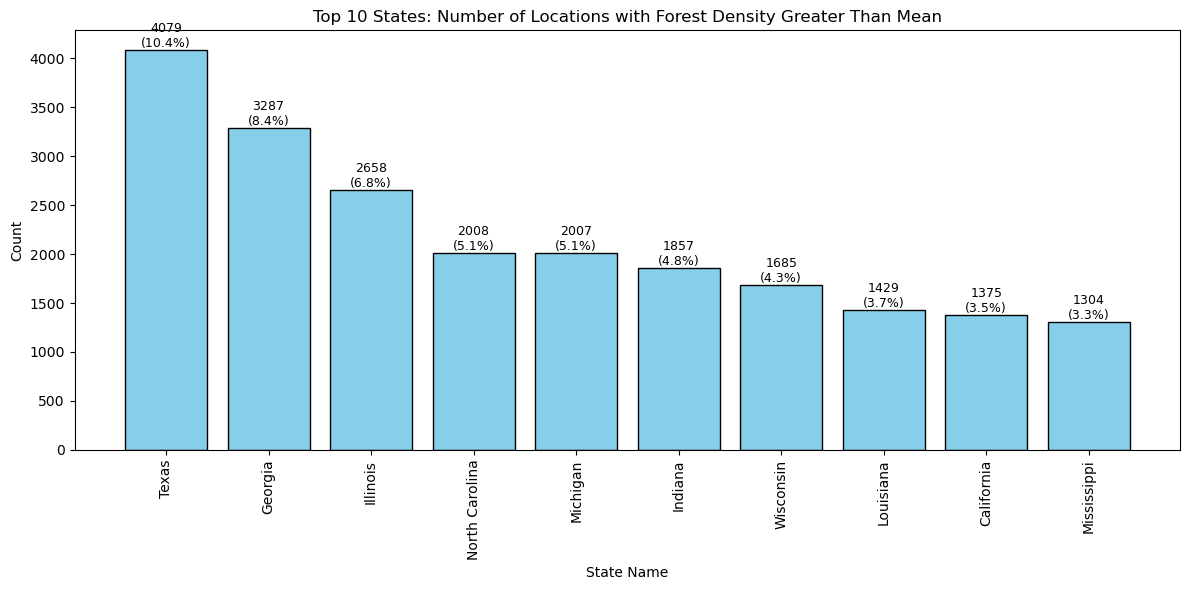

In [48]:
# 按state_name分组并计数，打印前十，并绘制州的分布柱状图，计算占总数的比例，以数据标记的方式呈现
import matplotlib.pyplot as plt

mean_density = forest_density.mean()
greater_than_mean = df_weight[df_weight['weighted_density_Forest'] > mean_density]

state_counts = greater_than_mean.groupby('state_name').size().reset_index(name='count')
state_counts = state_counts.sort_values(by='count', ascending=False)

total_count = greater_than_mean.shape[0]
state_counts['proportion'] = state_counts['count'] / total_count

# 打印前十
print("前十州（按数量排序）:")
print(state_counts.head(10))

# 只绘制前十
top10 = state_counts.head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top10['state_name'], top10['count'], color='skyblue', edgecolor='black')
plt.xlabel('State Name')
plt.ylabel('Count')
plt.title('Top 10 States: Number of Locations with Forest Density Greater Than Mean')
plt.xticks(rotation=90)
plt.tight_layout()

# 添加数据标记，显示数量和比例
for bar, count, prop in zip(bars, top10['count'], top10['proportion']):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height(), 
        f'{count}\n({prop:.1%})', 
        ha='center', va='bottom', fontsize=9
    )

plt.show()


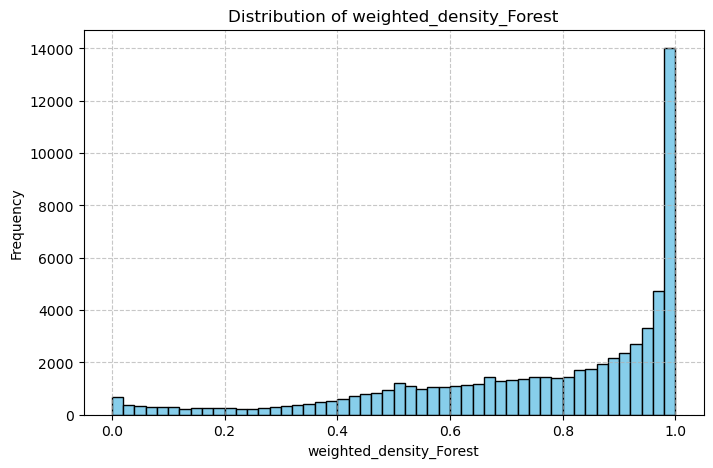

In [35]:
plt.figure(figsize=(8,5))
plt.hist(df_weight['weighted_density_Forest'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('weighted_density_Forest')
plt.ylabel('Frequency')
plt.title('Distribution of weighted_density_Forest')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [51]:
df_net_benefit['current_abandonment'].value_counts()

current_abandonment
1    64982
Name: count, dtype: int64

In [ ]:
df_net_benefit

## 5、经济分析

In [7]:
df_net_benefit

,Unnamed: 0,time,lat,lon,abandonment_year,abandonment_duration,current_abandonment,landcover,DEM,GDPpc,...,env_scores,I,T_amb_C,T_cell,PR,PVPOT,area_m2,E_yr_per_m2,E_yr_pixel,carbon_emission (t)/yr
0,1897288,2020-01-01,31.320833,-105.929170,2014.0,10.0,1,2.0,1074.1250,19547.0,...,0.303154,246.944317,20.341527,26.194102,0.994029,0.245470,733498.229916,292.443061,2.145065e+08,75506.276537
1,1899788,2020-01-01,31.329166,-105.929170,2014.0,10.0,1,3.0,1074.8125,19547.0,...,0.309634,246.924653,20.332918,26.183108,0.994084,0.245464,733433.307337,292.435944,2.144823e+08,75497.755954
2,1902287,2020-01-01,31.337500,-105.937500,2014.0,10.0,1,3.0,1075.3750,32645.0,...,0.243530,246.963588,20.308333,26.160370,0.994198,0.245531,733368.361450,292.515504,2.145216e+08,75511.608892
3,1902288,2020-01-01,31.337500,-105.929170,2014.0,10.0,1,2.0,1074.9375,32645.0,...,0.246765,246.947801,20.308470,26.149869,0.994251,0.245528,733368.361450,292.512253,2.145192e+08,75510.769494
4,1904787,2020-01-01,31.345833,-105.937500,2014.0,10.0,1,2.0,1075.9375,32645.0,...,0.436201,247.035995,20.308194,26.133438,0.994333,0.245636,733303.407843,292.640899,2.145946e+08,75537.288146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64977,20192249,2020-01-01,46.937500,-67.920830,1998.0,26.0,1,2.0,199.3750,33949.0,...,0.277116,147.400035,3.740140,6.713950,1.091430,0.160877,586266.096715,191.662252,1.123651e+08,39552.508234
64978,20247244,2020-01-01,47.145832,-67.962500,2000.0,24.0,1,2.0,223.0000,33949.0,...,0.303993,141.932402,3.487502,5.736209,1.096319,0.155603,583981.240638,185.379407,1.082581e+08,38106.849899
64979,20271365,2020-01-01,47.237500,-68.620834,2000.0,24.0,1,2.0,181.2500,33949.0,...,0.323132,145.254988,3.699337,7.198324,1.089008,0.158184,582973.435084,188.453970,1.098637e+08,38672.007792
64980,20275797,2020-01-01,47.254166,-68.354164,2000.0,24.0,1,2.0,244.9375,33949.0,...,0.297849,144.524034,3.358455,5.205510,1.098972,0.158828,582790.047316,189.221245,1.102763e+08,38817.242845


### 5.1 政策均值期望正效应分析

In [16]:
df_p2c_2050 = df_economic[(df_economic['policy_category'] == 'P2c') & (df_economic['analysis_year'] == 2050)]
df_p2c_2050['pv_scenario'].unique()

array(['LeastTotalCost_LTC_brkLR15_SSP1_P50',
       'LeastTotalCost_LTC_brkLR15_SSP2_P50',
       'LeastTotalCost_LTC_brkLR15_SSP5_P50',
       'LeastTotalCost_LTC_brkSR15_SSP1_P50',
       'LeastTotalCost_LTC_brkSR15_SSP2_P50',
       'LeastTotalCost_LTC_brkSR15_SSP5_P50', 'BEG-Budg600-EG',
       'NGFS2_Divergent Net Zero Policies', 'NGFS2_Net-Zero 2050',
       'NGFS2_Net-Zero 2050 - IPD-95th',
       'NGFS2_Net-Zero 2050 - IPD-median', 'SusDev_SDP-PkBudg1000'],
      dtype=object)

In [17]:
df_economic

,lat,lon,pv_category,pv_model,pv_scenario,policy_category,rcp_category,net_npv_usd,net_cost_usd,analysis_year,policy_group
0,31.320833,-105.929170,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.364320e+06,2.364320e+06,2020,P2
1,31.329166,-105.929170,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.364268e+06,2.364268e+06,2020,P2
2,31.337500,-105.937500,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.364232e+06,2.364232e+06,2020,P2
3,31.337500,-105.929170,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.364223e+06,2.364223e+06,2020,P2
4,31.345833,-105.937500,C1,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,RCP2.6,-2.364196e+06,2.364196e+06,2020,P2
...,...,...,...,...,...,...,...,...,...,...,...
68880915,46.937500,-67.920830,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,4.447125e+06,4.654054e+06,2050,P1
68880916,47.145832,-67.962500,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,4.148731e+06,4.654008e+06,2050,P1
68880917,47.237500,-68.620834,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,4.294753e+06,4.654032e+06,2050,P1
68880918,47.254166,-68.354164,C7,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,RCP8.5,4.331141e+06,4.654020e+06,2050,P1


In [7]:
def analyze_policy_paths_by_pixel(df_economic, target_year=2050):
    """
    分析每个pixel在不同政策层级下的路径统计
    
    Parameters:
    -----------
    df_economic : DataFrame
        包含经济分析数据的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含各政策层级和具体政策类别的统计结果
    """
    def match_policy(row):
        if 'P1' in str(row):
            return 'P1'
        elif 'P2' in str(row):
            return 'P2'
        elif 'P3' in str(row):
            return 'P3'
        else:
            return 'P4'
    # 确保policy_group列存在
    if 'policy_group' not in df_economic.columns:
        df_economic['policy_group'] = df_economic['policy_category'].astype(str).apply(match_policy)
    
    # 筛选目标年份的数据
    df_target_year = df_economic[df_economic['analysis_year'] == target_year].copy()
    
    print(f"分析{target_year}年的政策路径统计...")
    
    # 获取所有唯一的policy_category值
    unique_policies = sorted(df_target_year['policy_category'].unique())
    print(f"发现的政策类别: {unique_policies}")
    
    # 按pixel和policy_group分组统计（大组分析）
    results = {}
    
    for policy in ['P1', 'P2', 'P3', 'P4']:
        # 筛选当前政策组的数据
        policy_data = df_target_year[df_target_year['policy_group'] == policy]
        
        if len(policy_data) > 0:
            # 按pixel分组统计
            pixel_stats = policy_data.groupby(['lat', 'lon']).agg({
                'net_npv_usd': ['count', 'mean', 'max', 'min', 'std']
            }).round(2)
            
            # 重命名列
            pixel_stats.columns = ['path_count', 'mean_npv', 'max_npv', 'min_npv', 'std_npv']
            pixel_stats = pixel_stats.reset_index()
            
            # 统计大于零的路径数量
            positive_paths = policy_data[policy_data['net_npv_usd'] > 0]
            positive_pixel_count = positive_paths.groupby(['lat', 'lon']).size().reset_index(name='positive_paths')
            
            # 合并统计结果
            final_stats = pixel_stats.merge(positive_pixel_count, on=['lat', 'lon'], how='left').fillna(0)
            
            # 计算总体统计
            total_paths_sum = final_stats['path_count'].sum()
            positive_paths_sum = final_stats['positive_paths'].sum()
            
            # 计算各种情况下的正数比例
            # 1. 平均NPV为正数的pixel数量
            positive_mean_pixels = (final_stats['mean_npv'] > 0).sum()
            positive_mean_ratio = round(positive_mean_pixels / len(final_stats) * 100, 2)
            
            # 2. 最优值（最大值）为正数的pixel数量
            positive_max_pixels = (final_stats['max_npv'] > 0).sum()
            positive_max_ratio = round(positive_max_pixels / len(final_stats) * 100, 2)
            
            # 3. 最差值（最小值）为正数的pixel数量
            positive_min_pixels = (final_stats['min_npv'] > 0).sum()
            positive_min_ratio = round(positive_min_pixels / len(final_stats) * 100, 2)
            
            overall_stats = {
                'total_pixels': len(final_stats),
                'total_paths': total_paths_sum,
                'positive_paths': positive_paths_sum,
                'positive_ratio': round(positive_paths_sum / total_paths_sum * 100, 2) if total_paths_sum > 0 else 0.0,
                'mean_npv_all_pixels': round(final_stats['mean_npv'].mean(), 2),
                'max_npv_all_pixels': round(final_stats['max_npv'].max(), 2),
                'min_npv_all_pixels': round(final_stats['min_npv'].min(), 2),
                'std_npv_all_pixels': round(final_stats['mean_npv'].std(), 2),
                # 新增：各种情况下的正数比例
                'positive_mean_pixels': positive_mean_pixels,
                'positive_mean_ratio': positive_mean_ratio,
                'positive_max_pixels': positive_max_pixels,
                'positive_max_ratio': positive_max_ratio,
                'positive_min_pixels': positive_min_pixels,
                'positive_min_ratio': positive_min_ratio
            }
            
            results[policy] = {
                'pixel_level_stats': final_stats,
                'overall_stats': overall_stats
            }
        else:
            results[policy] = {
                'pixel_level_stats': pd.DataFrame(),
                'overall_stats': {}
            }
    
    # 按具体policy_category进行小组分析
    print(f"\n开始具体政策类别的小组分析...")
    detailed_results = {}
    
    for policy_cat in unique_policies:
        if pd.notna(policy_cat) and str(policy_cat) != 'nan':
            # 筛选当前具体政策类别的数据
            cat_data = df_target_year[df_target_year['policy_category'] == policy_cat]
            
            if len(cat_data) > 0:
                # 按pixel分组统计
                pixel_stats = cat_data.groupby(['lat', 'lon']).agg({
                    'net_npv_usd': ['count', 'mean', 'max', 'min', 'std']
                }).round(2)
                
                # 重命名列
                pixel_stats.columns = ['path_count', 'mean_npv', 'max_npv', 'min_npv', 'std_npv']
                pixel_stats = pixel_stats.reset_index()
                
                # 统计大于零的路径数量
                positive_paths = cat_data[cat_data['net_npv_usd'] > 0]
                positive_pixel_count = positive_paths.groupby(['lat', 'lon']).size().reset_index(name='positive_paths')
                
                # 合并统计结果
                final_stats = pixel_stats.merge(positive_pixel_count, on=['lat', 'lon'], how='left').fillna(0)
                
                # 计算总体统计
                total_paths_sum = final_stats['path_count'].sum()
                positive_paths_sum = final_stats['positive_paths'].sum()
                
                # 计算各种情况下的正数比例
                positive_mean_pixels = (final_stats['mean_npv'] > 0).sum()
                positive_mean_ratio = round(positive_mean_pixels / len(final_stats) * 100, 2)
                
                positive_max_pixels = (final_stats['max_npv'] > 0).sum()
                positive_max_ratio = round(positive_max_pixels / len(final_stats) * 100, 2)
                
                positive_min_pixels = (final_stats['min_npv'] > 0).sum()
                positive_min_ratio = round(positive_min_pixels / len(final_stats) * 100, 2)
                
                overall_stats = {
                    'total_pixels': len(final_stats),
                    'total_paths': total_paths_sum,
                    'positive_paths': positive_paths_sum,
                    'positive_ratio': round(positive_paths_sum / total_paths_sum * 100, 2) if total_paths_sum > 0 else 0.0,
                    'mean_npv_all_pixels': round(final_stats['mean_npv'].mean(), 2),
                    'max_npv_all_pixels': round(final_stats['max_npv'].max(), 2),
                    'min_npv_all_pixels': round(final_stats['min_npv'].min(), 2),
                    'std_npv_all_pixels': round(final_stats['mean_npv'].std(), 2),
                    'positive_mean_pixels': positive_mean_pixels,
                    'positive_mean_ratio': positive_mean_ratio,
                    'positive_max_pixels': positive_max_pixels,
                    'positive_max_ratio': positive_max_ratio,
                    'positive_min_pixels': positive_min_pixels,
                    'positive_min_ratio': positive_min_ratio
                }
                
                detailed_results[str(policy_cat)] = {
                    'pixel_level_stats': final_stats,
                    'overall_stats': overall_stats
                }
    
    # 将详细结果添加到主结果中
    results['detailed_policies'] = detailed_results
    
    return results

# 执行分析
policy_analysis = analyze_policy_paths_by_pixel(df_economic, target_year=2050)

# 输出大组分析结果
print(f"\n{'='*80}")
# print(f"{target_year}年政策层级大组分析结果")
print(f"{'='*80}")

for policy in ['P1', 'P2', 'P3', 'P4']:
    if policy in policy_analysis:
        print(f"\n{'='*60}")
        print(f"政策层级: {policy}")
        print(f"{'='*60}")
        
        data = policy_analysis[policy]
        if data['overall_stats']:
            overall = data['overall_stats']
            print(f"总像素数量: {overall['total_pixels']}")
            print(f"总路径数量: {overall['total_paths']}")
            print(f"正收益路径数量: {overall['positive_paths']}")
            print(f"正收益路径比例: {overall['positive_ratio']}%")
            print(f"所有像素平均NPV: ${overall['mean_npv_all_pixels']:,.2f}")
            print(f"所有像素最大NPV: ${overall['max_npv_all_pixels']:,.2f}")
            print(f"所有像素最小NPV: ${overall['min_npv_all_pixels']:,.2f}")
            print(f"所有像素NPV标准差: ${overall['std_npv_all_pixels']:,.2f}")
            
            print(f"\n正数比例分析:")
            print(f"  平均NPV > 0: {overall['positive_mean_pixels']} 个像素 ({overall['positive_mean_ratio']}%)")
            print(f"  最优NPV > 0: {overall['positive_max_pixels']} 个像素 ({overall['positive_max_ratio']}%)")
            print(f"  最差NPV > 0: {overall['positive_min_pixels']} 个像素 ({overall['positive_min_ratio']}%)")
        else:
            print("该政策层级下没有数据")

# 输出具体政策类别的小组分析结果
print(f"\n{'='*80}")
print(f"{'='*80}")

detailed_policies = policy_analysis.get('detailed_policies', {})
for policy_cat, data in detailed_policies.items():
    print(f"\n{'='*60}")
    print(f"具体政策类别: {policy_cat}")
    print(f"{'='*60}")
    
    if data['overall_stats']:
        overall = data['overall_stats']
        print(f"总像素数量: {overall['total_pixels']}")
        print(f"总路径数量: {overall['total_paths']}")
        print(f"正收益路径数量: {overall['positive_paths']}")
        print(f"正收益路径比例: {overall['positive_ratio']}%")
        print(f"所有像素平均NPV: ${overall['mean_npv_all_pixels']:,.2f}")
        print(f"所有像素最大NPV: ${overall['max_npv_all_pixels']:,.2f}")
        print(f"所有像素最小NPV: ${overall['min_npv_all_pixels']:,.2f}")
        print(f"所有像素NPV标准差: ${overall['std_npv_all_pixels']:,.2f}")
        
        print(f"\n正数比例分析:")
        print(f"  平均NPV > 0: {overall['positive_mean_pixels']} 个像素 ({overall['positive_mean_ratio']}%)")
        print(f"  最优NPV > 0: {overall['positive_max_pixels']} 个像素 ({overall['positive_max_ratio']}%)")
        print(f"  最差NPV > 0: {overall['positive_min_pixels']} 个像素 ({overall['positive_min_ratio']}%)")
    else:
        print("该政策类别下没有数据")

# 创建大组对比表格
print(f"\n{'='*80}")
print("政策层级大组对比表")
print(f"{'='*80}")

comparison_data = []
for policy in ['P1', 'P2', 'P3', 'P4']:
    if policy in policy_analysis and policy_analysis[policy]['overall_stats']:
        stats = policy_analysis[policy]['overall_stats']
        comparison_data.append({
            '政策层级': policy,
            '总像素数': stats['total_pixels'],
            '平均NPV>0': f"{stats['positive_mean_ratio']}%",
            '最优NPV>0': f"{stats['positive_max_ratio']}%",
            '最差NPV>0': f"{stats['positive_min_ratio']}%",
            '平均NPV': f"${stats['mean_npv_all_pixels']:,.0f}",
            '最大NPV': f"${stats['max_npv_all_pixels']:,.0f}",
            '最小NPV': f"${stats['min_npv_all_pixels']:,.0f}"
        })

if comparison_data:
    comparison_df = pd.DataFrame(comparison_data)
    print(comparison_df.to_string(index=False))

# 创建具体政策类别对比表格
print(f"\n{'='*80}")
print("具体政策类别对比表")
print(f"{'='*80}")

detailed_comparison_data = []
for policy_cat, data in detailed_policies.items():
    if data['overall_stats']:
        stats = data['overall_stats']
        detailed_comparison_data.append({
            '政策类别': policy_cat,
            '总像素数': stats['total_pixels'],
            '平均NPV>0': f"{stats['positive_mean_ratio']}%",
            '最优NPV>0': f"{stats['positive_max_ratio']}%",
            '最差NPV>0': f"{stats['positive_min_ratio']}%",
            '平均NPV': f"${stats['mean_npv_all_pixels']:,.0f}",
            '最大NPV': f"${stats['max_npv_all_pixels']:,.0f}",
            '最小NPV': f"${stats['min_npv_all_pixels']:,.0f}"
        })

if detailed_comparison_data:
    detailed_comparison_df = pd.DataFrame(detailed_comparison_data)
    print(detailed_comparison_df.to_string(index=False))

分析2050年的政策路径统计...
发现的政策类别: ['P1a', 'P1b', 'P1c', 'P1d', 'P2', 'P2a', 'P2c', 'P3a', 'P3b', 'P3c', 'P4']

开始具体政策类别的小组分析...


政策层级: P1
总像素数量: 64982
总路径数量: 4223830
正收益路径数量: 539856
正收益路径比例: 12.78%
所有像素平均NPV: $-1,656,912.50
所有像素最大NPV: $16,126,646.42
所有像素最小NPV: $-5,469,552.65
所有像素NPV标准差: $359,474.59

正数比例分析:
  平均NPV > 0: 0 个像素 (0.0%)
  最优NPV > 0: 64982 个像素 (100.0%)
  最差NPV > 0: 0 个像素 (0.0%)

政策层级: P2
总像素数量: 64982
总路径数量: 8187732
正收益路径数量: 1706076
正收益路径比例: 20.84%
所有像素平均NPV: $-395,750.27
所有像素最大NPV: $20,547,622.82
所有像素最小NPV: $-5,517,238.77
所有像素NPV标准差: $503,598.57

正数比例分析:
  平均NPV > 0: 12531 个像素 (19.28%)
  最优NPV > 0: 64982 个像素 (100.0%)
  最差NPV > 0: 0 个像素 (0.0%)

政策层级: P3
总像素数量: 64982
总路径数量: 4678704
正收益路径数量: 1815794
正收益路径比例: 38.81%
所有像素平均NPV: $1,824,748.67
所有像素最大NPV: $21,318,765.22
所有像素最小NPV: $-3,602,342.70
所有像素NPV标准差: $674,660.44

正数比例分析:
  平均NPV > 0: 64982 个像素 (100.0%)
  最优NPV > 0: 64982 个像素 (100.0%)
  最差NPV > 0: 0 个像素 (0.0%)

政策层级: P4
总像素数量: 64982
总路径数量: 129964
正收益路径数量: 0.0
正收益路径比例: 0.0%
所有像素平均NP

### 5.2 单像素的横向对比

In [ ]:
from tqdm import tqdm

def analyze_all_pixels_policy_comparison(df_economic, target_year=2050):
    """
    分析所有像素在不同政策情景下的比较结果（包括政策大类和具体小类）
    
    Parameters:
    -----------
    df_economic : DataFrame
        包含经济分析数据的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含所有像素的比较分析结果
    """
    def match_policy(row):
        if 'P1' in str(row):
            return 'P1'
        elif 'P2' in str(row):
            return 'P2'
        elif 'P3' in str(row):
            return 'P3'
        else:
            return 'P4'
    
    # 确保policy_group列存在
    if 'policy_group' not in df_economic.columns:
        df_economic['policy_group'] = df_economic['policy_category'].astype(str).apply(match_policy)
    
    # 筛选目标年份的数据
    df_target_year = df_economic[df_economic['analysis_year'] == target_year].copy()
    
    print(f"分析{target_year}年所有像素的政策情景比较...")
    print(f"总数据量: {len(df_target_year):,} 条记录")
    
    # 获取所有唯一的像素坐标
    unique_pixels = df_target_year[['lat', 'lon']].drop_duplicates()
    total_pixels = len(unique_pixels)
    print(f"总像素数量: {total_pixels:,}")
    
    # 获取所有政策类别（包括大类和具体小类）
    all_policies = sorted(df_target_year['policy_category'].unique())
    policy_groups = sorted(df_target_year['policy_group'].unique())
    
    print(f"政策大类: {policy_groups}")
    print(f"具体政策类别: {len(all_policies)} 个")
    
    # 初始化结果存储
    comparison_results = {
        'total_pixels': total_pixels,
        'policy_comparisons': {},
        'ranking_analysis': {}
    }
    
    # 1. 政策大类比较分析
    print(f"\n{'='*60}")
    print("1. 政策大类比较分析")
    print(f"{'='*60}")
    
    # 按像素分组，计算每个政策组的平均NPV
    pixel_policy_stats = df_target_year.groupby(['lat', 'lon', 'policy_group'])['net_npv_usd'].mean().reset_index()
    
    # 透视表，每个像素一行，每个政策组一列
    npv_pivot = pixel_policy_stats.pivot(index=['lat', 'lon'], columns='policy_group', values='net_npv_usd').reset_index()
    
    # 计算政策大类比较结果
    policy_comparisons = {}
    
    for i, policy1 in enumerate(policy_groups):
        for j, policy2 in enumerate(policy_groups):
            if i < j and policy1 in npv_pivot.columns and policy2 in npv_pivot.columns:
                # 计算P1 > P2的像素数量
                p1_greater_p2 = (npv_pivot[policy1] > npv_pivot[policy2]).sum()
                p1_greater_p2_ratio = p1_greater_p2 / total_pixels * 100
                
                comparison_key = f"{policy1}_vs_{policy2}"
                policy_comparisons[comparison_key] = {
                    f'{policy1}_better': p1_greater_p2,
                    f'{policy1}_better_ratio': p1_greater_p2_ratio,
                    f'{policy2}_better': total_pixels - p1_greater_p2,
                    f'{policy2}_better_ratio': 100 - p1_greater_p2_ratio
                }
                
                print(f"{policy1} vs {policy2}: {policy1}更好 {p1_greater_p2_ratio:.1f}% | {policy2}更好 {100-p1_greater_p2_ratio:.1f}%")
    
    # 2. 具体政策小类比较分析
    print(f"\n{'='*60}")
    print("2. 具体政策小类比较分析")
    print(f"{'='*60}")
    
    # 按像素分组，计算每个具体政策类别的平均NPV
    pixel_detailed_stats = df_target_year.groupby(['lat', 'lon', 'policy_category'])['net_npv_usd'].mean().reset_index()
    
    # 透视表
    detailed_npv_pivot = pixel_detailed_stats.pivot(index=['lat', 'lon'], columns='policy_category', values='net_npv_usd').reset_index()
    
    # 计算具体政策小类比较结果
    detailed_comparisons = {}
    
    for i, policy1 in enumerate(all_policies):
        for j, policy2 in enumerate(all_policies):
            if i < j and policy1 in detailed_npv_pivot.columns and policy2 in detailed_npv_pivot.columns:
                # 计算P1 > P2的像素数量
                p1_greater_p2 = (detailed_npv_pivot[policy1] > detailed_npv_pivot[policy2]).sum()
                p1_greater_p2_ratio = p1_greater_p2 / total_pixels * 100
                
                comparison_key = f"{policy1}_vs_{policy2}"
                detailed_comparisons[comparison_key] = {
                    f'{policy1}_better': p1_greater_p2,
                    f'{policy1}_better_ratio': p1_greater_p2_ratio,
                    f'{policy2}_better': total_pixels - p1_greater_p2,
                    f'{policy2}_better_ratio': 100 - p1_greater_p2_ratio
                }
    
    # 3. 政策排名分析
    print(f"\n{'='*60}")
    print("3. 政策排名分析")
    print(f"{'='*60}")
    
    # 为每个像素计算政策排名
    ranking_results = []
    
    print("计算每个像素的政策排名...")
    for _, pixel in tqdm(unique_pixels.iterrows(), total=total_pixels, desc="像素排名分析"):
        lat, lon = pixel['lat'], pixel['lon']
        pixel_data = df_target_year[(df_target_year['lat'] == lat) & (df_target_year['lon'] == lon)]
        
        if len(pixel_data) > 0:
            # 按政策组计算平均NPV
            policy_npv = pixel_data.groupby('policy_group')['net_npv_usd'].mean()
            
            # 计算排名
            if len(policy_npv) > 1:
                # 按NPV降序排名
                npv_ranking = policy_npv.sort_values(ascending=False)
                best_policy = npv_ranking.index[0]
                worst_policy = npv_ranking.index[-1]
                
                ranking_results.append({
                    'lat': lat,
                    'lon': lon,
                    'best_policy': best_policy,
                    'worst_policy': worst_policy,
                    'npv_ranking': ' > '.join(npv_ranking.index)
                })
    
    # 统计排名结果
    if ranking_results:
        ranking_df = pd.DataFrame(ranking_results)
        
        print(f"\n政策排名统计 (基于{len(ranking_results):,}个像素):")
        
        # 最佳政策统计
        best_policy_counts = ranking_df['best_policy'].value_counts()
        print(f"\n最佳政策分布:")
        for policy, count in best_policy_counts.items():
            ratio = count / len(ranking_results) * 100
            print(f"  {policy}: {ratio:.1f}% ({count:,} 像素)")
        
        # 最差政策统计
        worst_policy_counts = ranking_df['worst_policy'].value_counts()
        print(f"\n最差政策分布:")
        for policy, count in worst_policy_counts.items():
            ratio = count / len(ranking_results) * 100
            print(f"  {policy}: {ratio:.1f}% ({count:,} 像素)")
    
    # 4. 保存结果
    comparison_results['policy_comparisons'] = policy_comparisons
    comparison_results['detailed_comparisons'] = detailed_comparisons
    comparison_results['ranking_analysis'] = ranking_results
    
    return comparison_results

# 执行分析
all_pixels_analysis = analyze_all_pixels_policy_comparison(df_economic, target_year=2050)



分析2050年所有像素的政策情景比较...
总数据量: 17,220,230 条记录
总像素数量: 64,982
政策大类: ['P1', 'P2', 'P3', 'P4']
具体政策类别: 11 个

1. 政策大类比较分析
P1 vs P2: P1更好 0.0% | P2更好 100.0%
P1 vs P3: P1更好 0.0% | P3更好 100.0%
P1 vs P4: P1更好 100.0% | P4更好 0.0%
P2 vs P3: P2更好 0.0% | P3更好 100.0%
P2 vs P4: P2更好 100.0% | P4更好 0.0%
P3 vs P4: P3更好 100.0% | P4更好 0.0%

2. 具体政策小类比较分析

3. 政策排名分析
计算每个像素的政策排名...


像素排名分析: 100%|██████████| 64982/64982 [41:17<00:00, 26.23it/s]



政策排名统计 (基于64,982个像素):

最佳政策分布:
  P3: 100.0% (64,982 像素)

最差政策分布:
  P4: 100.0% (64,982 像素)

关键结论总结
在 64,982 个像素中:
  • 0.0% 的像素在 P1 政策下表现更好
  • 100.0% 的像素在 P2 政策下表现更好
  • 0.0% 的像素在 P1 政策下表现更好
  • 100.0% 的像素在 P3 政策下表现更好
  • 100.0% 的像素在 P1 政策下表现更好
  • 0.0% 的像素在 P4 政策下表现更好
  • 0.0% 的像素在 P2 政策下表现更好
  • 100.0% 的像素在 P3 政策下表现更好
  • 100.0% 的像素在 P2 政策下表现更好
  • 0.0% 的像素在 P4 政策下表现更好
  • 100.0% 的像素在 P3 政策下表现更好
  • 0.0% 的像素在 P4 政策下表现更好

具体政策小类分析:
重要政策差异 (前10个):
   1. P1a vs P1b: 差异 100.0% (P1a: 0.0%, P1b: 100.0%)
   2. P1a vs P1c: 差异 100.0% (P1a: 0.0%, P1c: 100.0%)
   3. P1a vs P1d: 差异 100.0% (P1a: 0.0%, P1d: 100.0%)
   4. P1a vs P2: 差异 100.0% (P1a: 0.0%, P2: 100.0%)
   5. P1a vs P2a: 差异 100.0% (P1a: 0.0%, P2a: 100.0%)
   6. P1a vs P2c: 差异 100.0% (P1a: 0.0%, P2c: 100.0%)
   7. P1a vs P3a: 差异 100.0% (P1a: 0.0%, P3a: 100.0%)
   8. P1a vs P3b: 差异 100.0% (P1a: 0.0%, P3b: 100.0%)
   9. P1a vs P3c: 差异 100.0% (P1a: 0.0%, P3c: 100.0%)
  10. P1b vs P1c: 差异 100.0% (P1b: 0.0%, P1c: 100.0%)


In [23]:
# 保存all_pixels_analysis结果到csv
import json
import numpy as np

def convert_np(obj):
    """
    Recursively convert numpy types in a dict/list to native Python types for JSON serialization.
    """
    if isinstance(obj, dict):
        return {convert_np(k): convert_np(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_np(i) for i in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

# 1. 保存policy_comparisons为csv
if 'policy_comparisons' in all_pixels_analysis and all_pixels_analysis['policy_comparisons']:
    policy_comparisons_df = pd.DataFrame(all_pixels_analysis['policy_comparisons']).T
    policy_comparisons_df.to_csv(r'data\economic_policy\all_pixels_policy_comparisons.csv', encoding='utf-8-sig')

# 2. 保存detailed_comparisons为csv
if 'detailed_comparisons' in all_pixels_analysis and all_pixels_analysis['detailed_comparisons']:
    detailed_comparisons_df = pd.DataFrame(all_pixels_analysis['detailed_comparisons']).T
    detailed_comparisons_df.to_csv(r'data\economic_policy\all_pixels_detailed_comparisons.csv', encoding='utf-8-sig')

# 3. 保存ranking_analysis为csv
if 'ranking_analysis' in all_pixels_analysis and all_pixels_analysis['ranking_analysis']:
    ranking_analysis_df = pd.DataFrame(all_pixels_analysis['ranking_analysis'])
    ranking_analysis_df.to_csv(r'data\economic_policy\all_pixels_ranking_analysis.csv', index=False, encoding='utf-8-sig')

# 4. 保存整体dict为json（可选），先转换所有numpy类型为原生Python类型
all_pixels_analysis_serializable = convert_np(all_pixels_analysis)
with open(r'data\economic_policy\all_pixels_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(all_pixels_analysis_serializable, f, ensure_ascii=False, indent=2)

# 输出关键结论
print(f"\n{'='*60}")
print("关键结论总结")
print(f"{'='*60}")

if all_pixels_analysis['policy_comparisons']:
    print(f"在 {all_pixels_analysis['total_pixels']:,} 个像素中:")
    
    for comparison_key, stats in all_pixels_analysis['policy_comparisons'].items():
        policy1, policy2 = comparison_key.split('_vs_')
        p1_better_ratio = stats[f'{policy1}_better_ratio']
        p2_better_ratio = stats[f'{policy2}_better_ratio']
        
        print(f"  • {p1_better_ratio:.1f}% 的像素在 {policy1} 政策下表现更好")
        print(f"  • {p2_better_ratio:.1f}% 的像素在 {policy2} 政策下表现更好")

# 输出具体政策小类的关键结论
print(f"\n具体政策小类分析:")
detailed_comparisons = all_pixels_analysis.get('detailed_comparisons', {})
if detailed_comparisons:
    # 选择一些重要的比较结果
    important_comparisons = []
    for key, stats in detailed_comparisons.items():
        policy1, policy2 = key.split('_vs_')
        p1_better_ratio = stats[f'{policy1}_better_ratio']
        p2_better_ratio = stats[f'{policy2}_better_ratio']
        
        # 选择差异较大的比较
        if abs(p1_better_ratio - p2_better_ratio) > 20:  # 差异超过20%
            important_comparisons.append((key, p1_better_ratio, p2_better_ratio))
    
    # 按差异大小排序
    important_comparisons.sort(key=lambda x: abs(x[1] - x[2]), reverse=True)
    
    print(f"重要政策差异 (前10个):")
    for i, (comparison, p1_ratio, p2_ratio) in enumerate(important_comparisons[:10]):
        policy1, policy2 = comparison.split('_vs_')
        diff = abs(p1_ratio - p2_ratio)
        print(f"  {i+1:2d}. {policy1} vs {policy2}: 差异 {diff:.1f}% ({policy1}: {p1_ratio:.1f}%, {policy2}: {p2_ratio:.1f}%)")


关键结论总结
在 64,982 个像素中:
  • 0.0% 的像素在 P1 政策下表现更好
  • 100.0% 的像素在 P2 政策下表现更好
  • 0.0% 的像素在 P1 政策下表现更好
  • 100.0% 的像素在 P3 政策下表现更好
  • 100.0% 的像素在 P1 政策下表现更好
  • 0.0% 的像素在 P4 政策下表现更好
  • 0.0% 的像素在 P2 政策下表现更好
  • 100.0% 的像素在 P3 政策下表现更好
  • 100.0% 的像素在 P2 政策下表现更好
  • 0.0% 的像素在 P4 政策下表现更好
  • 100.0% 的像素在 P3 政策下表现更好
  • 0.0% 的像素在 P4 政策下表现更好

具体政策小类分析:
重要政策差异 (前10个):
   1. P1a vs P1b: 差异 100.0% (P1a: 0.0%, P1b: 100.0%)
   2. P1a vs P1c: 差异 100.0% (P1a: 0.0%, P1c: 100.0%)
   3. P1a vs P1d: 差异 100.0% (P1a: 0.0%, P1d: 100.0%)
   4. P1a vs P2: 差异 100.0% (P1a: 0.0%, P2: 100.0%)
   5. P1a vs P2a: 差异 100.0% (P1a: 0.0%, P2a: 100.0%)
   6. P1a vs P2c: 差异 100.0% (P1a: 0.0%, P2c: 100.0%)
   7. P1a vs P3a: 差异 100.0% (P1a: 0.0%, P3a: 100.0%)
   8. P1a vs P3b: 差异 100.0% (P1a: 0.0%, P3b: 100.0%)
   9. P1a vs P3c: 差异 100.0% (P1a: 0.0%, P3c: 100.0%)
  10. P1b vs P1c: 差异 100.0% (P1b: 0.0%, P1c: 100.0%)


### 5.3 单政策分析

In [ ]:
from tqdm import tqdm
import random

def analyze_sample_pixels_policy_ranking(df_economic, target_year=2050, sample_size=1000):
    """
    随机抽取像素点，分析每个像素点内部各政策类别的排名
    
    Parameters:
    -----------
    df_economic : DataFrame
        包含经济分析数据的DataFrame
    target_year : int
        目标分析年份，默认2050
    sample_size : int
        随机抽样数量，默认1000
    
    Returns:
    --------
    DataFrame : 包含每个抽样像素的排名结果
    """
    # 筛选目标年份的数据
    df_target_year = df_economic[df_economic['analysis_year'] == target_year].copy()
    
    print(f"分析{target_year}年政策类别排名...")
    print(f"总数据量: {len(df_target_year):,} 条记录")
    
    # 获取所有唯一的像素坐标
    unique_pixels = df_target_year[['lat', 'lon']].drop_duplicates()
    total_pixels = len(unique_pixels)
    print(f"总像素数量: {total_pixels:,}")
    
    # 获取所有政策类别
    all_policies = sorted(df_target_year['policy_category'].unique())
    print(f"政策类别数量: {len(all_policies)}")
    print(f"政策类别: {all_policies}")
    
    # 随机抽样像素
    random.seed(42)  # 设置随机种子，确保结果可重复
    sampled_pixels = unique_pixels.sample(n=min(sample_size, total_pixels), random_state=42)
    
    print(f"\n随机抽样 {len(sampled_pixels)} 个像素进行分析...")
    
    # 为每个抽样像素计算政策类别排名
    ranking_results = []
    
    for _, pixel in tqdm(sampled_pixels.iterrows(), total=len(sampled_pixels), desc="计算排名"):
        lat, lon = pixel['lat'], pixel['lon']
        pixel_data = df_target_year[(df_target_year['lat'] == lat) & (df_target_year['lon'] == lon)]
        
        if len(pixel_data) > 0:
            # 按政策类别计算平均NPV
            policy_npv = pixel_data.groupby('policy_category')['net_npv_usd'].mean()
            
            # 计算排名
            if len(policy_npv) > 1:
                # 按NPV降序排名
                npv_ranking = policy_npv.sort_values(ascending=False)
                best_policy = npv_ranking.index[0]
                worst_policy = npv_ranking.index[-1]
                
                ranking_results.append({
                    'lat': lat,
                    'lon': lon,
                    'best_policy': best_policy,
                    'worst_policy': worst_policy,
                    'npv_ranking': ' > '.join(npv_ranking.index),
                    'npv_values': npv_ranking.to_dict()
                })
    
    # 转换为DataFrame
    ranking_df = pd.DataFrame(ranking_results)
    
    # 输出结果
    print(f"\n{'='*80}")
    print(f"排名结果 (基于{len(ranking_df)}个抽样像素)")
    print(f"{'='*80}")
    
    # 显示前20个结果
    print(f"\n前20个像素的排名结果:")
    print(f"{'纬度':<8} {'经度':<8} {'最佳政策':<25} {'最差政策':<25} {'完整排名'}")
    print(f"{'-'*8} {'-'*8} {'-'*25} {'-'*25} {'-'*50}")
    
    for i, row in ranking_df.head(20).iterrows():
        print(f"{row['lat']:<8.3f} {row['lon']:<8.3f} {row['best_policy']:<25} {row['worst_policy']:<25} {row['npv_ranking']}")
    
    # 统计最佳和最差政策分布
    print(f"\n{'='*80}")
    print("政策分布统计")
    print(f"{'='*80}")
    
    if len(ranking_df) > 0:
        # 最佳政策统计
        best_policy_counts = ranking_df['best_policy'].value_counts()
        print(f"\n最佳政策分布:")
        for policy, count in best_policy_counts.items():
            ratio = count / len(ranking_df) * 100
            print(f"  {policy}: {ratio:.1f}% ({count} 像素)")
        
        # 最差政策统计
        worst_policy_counts = ranking_df['worst_policy'].value_counts()
        print(f"\n最差政策分布:")
        for policy, count in worst_policy_counts.items():
            ratio = count / len(ranking_df) * 100
            print(f"  {policy}: {ratio:.1f}% ({count} 像素)")
    
    return ranking_df

# 执行分析
ranking_results = analyze_sample_pixels_policy_ranking(df_economic, target_year=2050, sample_size=1000)

# 如果需要查看完整的1000个结果
print(f"\n{'='*80}")
print("完整结果数据")
print(f"{'='*80}")
print(f"结果DataFrame形状: {ranking_results.shape}")
print(f"列名: {list(ranking_results.columns)}")

# 显示所有结果（可选，如果数据量不大）
if len(ranking_results) <= 100:
    print(f"\n所有{len(ranking_results)}个像素的排名结果:")
    print(ranking_results.to_string(index=False))
else:
    print(f"\n由于数据量较大({len(ranking_results)}行)，建议使用以下方式查看:")
    print(f"  ranking_results.head(100)  # 查看前20行")
    print(f"  ranking_results.tail(100)  # 查看后20行")
    print(f"  ranking_results.sample(100)  # 随机查看20行")

分析2050年政策类别排名...
总数据量: 17,220,230 条记录
总像素数量: 64,982
政策类别数量: 11
政策类别: ['P1a', 'P1b', 'P1c', 'P1d', 'P2', 'P2a', 'P2c', 'P3a', 'P3b', 'P3c', 'P4']

随机抽样 1000 个像素进行分析...


计算排名: 100%|██████████| 1000/1000 [00:38<00:00, 26.28it/s]


排名结果 (基于1000个抽样像素)

前20个像素的排名结果:
纬度       经度       最佳政策                      最差政策                      完整排名
-------- -------- ------------------------- ------------------------- --------------------------------------------------
32.596   -98.579  P3b                       P1a                       P3b > P3c > P2a > P1c > P2 > P1d > P3a > P2c > P1b > P4 > P1a
41.604   -87.963  P3b                       P4                        P3b > P3c > P2a > P1c > P2 > P1d > P3a > P2c > P1b > P1a > P4
40.279   -111.654 P3b                       P1a                       P3b > P2a > P3c > P1c > P2 > P1d > P3a > P2c > P1b > P4 > P1a
48.688   -122.171 P3b                       P4                        P3b > P3c > P1c > P2a > P2 > P1d > P3a > P1b > P2c > P1a > P4
31.704   -84.287  P3b                       P1a                       P3b > P3c > P2a > P1c > P2 > P1d > P3a > P2c > P1b > P4 > P1a
41.846   -86.171  P3b                       P4                        P3b > P3c > P2a > P1c > P2 > P1d > P3a >

In [28]:
print(f"\n前100行像素的排名结果:")
print(ranking_results.head(100).to_string(index=False))


前100行像素的排名结果:
      lat         lon best_policy worst_policy                                                   npv_ranking                                                                                                                                                                                                                                                                                                      npv_values
32.595833  -98.579170         P3b          P1a P3b > P3c > P2a > P1c > P2 > P1d > P3a > P2c > P1b > P4 > P1a       {'P3b': 2575182.770087735, 'P3c': 417502.28918728826, 'P2a': 214040.43169559483, 'P1c': 133146.44056750982, 'P2': -638360.2322412832, 'P1d': -1314291.0752056376, 'P3a': -1471685.672241283, 'P2c': -1822137.1939079498, 'P1b': -1928369.9582439396, 'P4': -2390398.1522412836, 'P1a': -2448503.11567094}
41.604168  -87.962500         P3b           P4 P3b > P3c > P2a > P1c > P2 > P1d > P3a > P2c > P1b > P1a > P4    {'P3b': 1352905.2690016842, 'P3c': -113502.4103

### 5.4 NPV自身的分析

In [ ]:
import pandas as pd
from function import *
from function.global_varibles import *


def clip_data_with_us_states(df, lon_col='lon', lat_col='lat'):
    """
    Clip a dataframe using US states shapefile
    """
    # Create geometry points from coordinates
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    
    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
    
    # Ensure US states has the same CRS
    us_states_4326 = us_states.to_crs('EPSG:4326')
    
    # Perform spatial join to find points within US states
    clipped_gdf = gpd.sjoin(gdf, us_states_4326, how='inner', predicate='within')
    
    # Remove geometry columns and keep original data
    clipped_df = clipped_gdf.drop(columns=['geometry', 'index_right'])
    
    # Remove any additional columns from the shapefile that might have been added
    shapefile_columns = us_states.columns.tolist()
    for col in shapefile_columns:
        if col in clipped_df.columns:
            clipped_df = clipped_df.drop(columns=[col])
    
    return clipped_df


df_pv_npv = pd.read_csv(PATHS['df_pv_npv'])
df_agricultural_npv = pd.read_csv(PATHS['df_agricultural_npv'])
df_afforestation_npv = pd.read_csv(PATHS['df_afforestation_npv'])
df_natural_npv = pd.read_csv(PATHS['df_natural_npv'])

df_pv_npv=clip_data_with_us_states(df_pv_npv)
df_agricultural_npv=clip_data_with_us_states(df_agricultural_npv)
df_afforestation_npv=clip_data_with_us_states(df_afforestation_npv)
df_natural_npv=clip_data_with_us_states(df_natural_npv)










gogogo


In [4]:
df_pv_npv

,pixel_id,lat,lon,Model,Scenario,Policy_category,Category,analysis_year,cumulative_npv_usd,cumulative_cost_usd
0,805,31.320833,-105.929170,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,-2365471.77,2365471.77
1,807,31.329166,-105.929170,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,-2365471.77,2365471.77
2,808,31.337500,-105.937500,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,-2365471.77,2365471.77
3,809,31.337500,-105.929170,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,-2365471.77,2365471.77
4,810,31.345833,-105.937500,REMIND 2.1,CEMICS_GDPgrowth_1p5,P2a,C1,2020,-2365471.77,2365471.77
...,...,...,...,...,...,...,...,...,...,...
68880915,70272,46.937500,-67.920830,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,C7,2050,4445834.80,4656004.18
68880916,70281,47.145832,-67.962500,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,C7,2050,4147469.12,4656004.18
68880917,70287,47.237500,-68.620834,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,C7,2050,4293476.89,4656004.18
68880918,70288,47.254166,-68.354164,TIAM-ECN 1.1,EN_NPi2100_COV,P1b,C7,2050,4329913.93,4656004.18


In [54]:
def analyze_cumulative_metrics_by_pixel(df_pv_npv, df_net_benefit, target_year=2050):
    """
    分析每个pixel在不同政策层级下的累积指标统计，并合并面积信息
    
    Parameters:
    -----------
    df_pv_npv : DataFrame
        包含光伏累积指标数据的DataFrame
    df_net_benefit : DataFrame
        包含面积信息的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含各政策层级和具体政策类别的统计结果
    """
    def match_policy(row):
        if 'P1' in str(row):
            return 'P1'
        elif 'P2' in str(row):
            return 'P2'
        elif 'P3' in str(row):
            return 'P3'
        else:
            return 'Other'
    
    # 确保policy_group列存在
    if 'policy_group' not in df_pv_npv.columns:
        df_pv_npv['policy_group'] = df_pv_npv['Policy_category'].astype(str).apply(match_policy)
    
    # 筛选目标年份的数据
    df_target_year = df_pv_npv[df_pv_npv['analysis_year'] == target_year].copy()
    
    # 合并面积信息并转换为ha
    df_target_year = df_target_year.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='left'
    )
    
    # 将面积从m²转换为ha
    df_target_year['area_ha'] = df_target_year['area_m2'] / 10000
    
    print(f"分析{target_year}年的累积指标统计...")
    
    # 获取所有唯一的policy_category值
    unique_policies = sorted(df_target_year['Policy_category'].unique())
    print(f"发现的政策类别: {unique_policies}")
    
    # 定义要分析的指标
    metrics = ['cumulative_npv_usd', 'cumulative_cost_usd']
    metric_names = ['累积NPV', '累积成本']
    
    # 按pixel和policy_group分组统计（大组分析）
    results = {}
    
    for policy in ['P1', 'P2', 'P3', 'P4']:
        # 筛选当前政策组的数据
        policy_data = df_target_year[df_target_year['policy_group'] == policy]
        
        if len(policy_data) > 0:
            policy_results = {}
            
            for metric, metric_name in zip(metrics, metric_names):
                # 按pixel分组统计，使用mean聚合面积
                pixel_stats = policy_data.groupby(['lat', 'lon']).agg({
                    metric: ['count', 'mean', 'max', 'min', 'std'],
                    'area_ha': 'mean'  # 使用mean聚合面积
                }).round(4)
                
                # 重命名列
                pixel_stats.columns = ['path_count', 'mean_value', 'max_value', 'min_value', 'std_value', 'area_ha']
                pixel_stats = pixel_stats.reset_index()
                
                # 统计大于零的路径数量
                positive_paths = policy_data[policy_data[metric] > 0]
                positive_pixel_count = positive_paths.groupby(['lat', 'lon']).size().reset_index(name='positive_paths')
                
                # 合并统计结果
                final_stats = pixel_stats.merge(positive_pixel_count, on=['lat', 'lon'], how='left').fillna(0)
                
                # 计算总体统计
                total_paths_sum = final_stats['path_count'].sum()
                positive_paths_sum = final_stats['positive_paths'].sum()
                total_area_ha = final_stats['area_ha'].sum()
                
                # 计算各种情况下的正数比例
                positive_mean_pixels = (final_stats['mean_value'] > 0).sum()
                positive_mean_ratio = round(positive_mean_pixels / len(final_stats) * 100, 2)
                
                positive_max_pixels = (final_stats['max_value'] > 0).sum()
                positive_max_ratio = round(positive_max_pixels / len(final_stats) * 100, 2)
                
                positive_min_pixels = (final_stats['min_value'] > 0).sum()
                positive_min_ratio = round(positive_min_pixels / len(final_stats) * 100, 2)
                
                # ==================== 修正：每个pixel各自的面积×各自的mean值 ====================
                # 计算每个像素的总价值（面积×均值）
                final_stats['pixel_total_value'] = final_stats['mean_value'] * final_stats['area_ha']
                
                # 计算总体价值（所有像素价值之和）
                total_pixel_value = final_stats['pixel_total_value'].sum()
                
                # 计算正收益像素的总价值
                positive_pixel_value = final_stats[final_stats['mean_value'] > 0]['pixel_total_value'].sum()
                
                # 计算负收益像素的总价值
                negative_pixel_value = final_stats[final_stats['mean_value'] <= 0]['pixel_total_value'].sum()
                
                # 计算正收益区域的总面积
                positive_area_ha = final_stats[final_stats['mean_value'] > 0]['area_ha'].sum()
                negative_area_ha = final_stats[final_stats['mean_value'] <= 0]['area_ha'].sum()
                
                # 计算像素总价值的统计指标
                pixel_total_value_mean = final_stats['pixel_total_value'].mean()
                pixel_total_value_std = final_stats['pixel_total_value'].std()
                pixel_total_value_max = final_stats['pixel_total_value'].max()
                pixel_total_value_min = final_stats['pixel_total_value'].min()
                
                # ==================== 新增：标准误计算和误差传播 ====================
                # 计算总体像素均值的标准误
                n_pixels = len(final_stats)
                pixel_value_se = pixel_total_value_std / np.sqrt(n_pixels) if n_pixels > 0 else 0
                
                # 计算面积的标准误
                area_mean = final_stats['area_ha'].mean()
                area_std = final_stats['area_ha'].std()
                area_se = area_std / np.sqrt(n_pixels) if n_pixels > 0 else 0
                
                # 计算总体像素价值的标准误（考虑误差传播）
                # 对于乘积 Z = X * Y，误差传播公式：σ_Z² = (Y² * σ_X²) + (X² * σ_Y²)
                # 这里 X = mean_value, Y = area_ha
                mean_value_mean = final_stats['mean_value'].mean()
                mean_value_std = final_stats['mean_value'].std()
                
                # 计算每个像素的误差传播
                pixel_value_variance = (final_stats['area_ha']**2 * mean_value_std**2 + 
                                      final_stats['mean_value']**2 * area_std**2)
                
                # 总体像素价值的标准误（考虑误差传播）
                total_pixel_value_se = np.sqrt(pixel_value_variance.sum()) if len(pixel_value_variance) > 0 else 0
                
                # 计算95%置信区间
                confidence_interval_95 = 1.96 * pixel_value_se
                total_confidence_interval_95 = 1.96 * total_pixel_value_se
                
                # 计算单位面积价值（USD/ha）及其标准误
                unit_area_value_usd_per_ha = total_pixel_value / total_area_ha if total_area_ha > 0 else 0
                
                # 单位面积价值的标准误（使用误差传播公式）
                # 对于比值 Z = X / Y，误差传播公式：σ_Z² = (σ_X² / Y²) + (X² * σ_Y² / Y⁴)
                if total_area_ha > 0:
                    unit_area_value_se = np.sqrt((total_pixel_value_se**2 / total_area_ha**2) + 
                                               (total_pixel_value**2 * area_se**2 / total_area_ha**4))
                else:
                    unit_area_value_se = 0
                
                # 计算面积加权平均值（用于对比）
                area_weighted_mean = np.average(final_stats['mean_value'], weights=final_stats['area_ha'])
                area_weighted_std = np.sqrt(np.average((final_stats['mean_value'] - area_weighted_mean)**2, weights=final_stats['area_ha']))
                
                overall_stats = {
                    'total_pixels': len(final_stats),
                    'total_paths': total_paths_sum,
                    'positive_paths': positive_paths_sum,
                    'positive_ratio': round(positive_paths_sum / total_paths_sum * 100, 2) if total_paths_sum > 0 else 0.0,
                    'total_area_ha': round(total_area_ha, 4),
                    'mean_value_all_pixels': round(final_stats['mean_value'].mean(), 2),
                    'max_value_all_pixels': round(final_stats['max_value'].max(), 2),
                    'min_value_all_pixels': round(final_stats['min_value'].min(), 2),
                    'std_value_all_pixels': round(final_stats['mean_value'].std(), 2),
                    'area_weighted_mean': round(area_weighted_mean, 2),
                    'area_weighted_std': round(area_weighted_std, 2),
                    'positive_mean_pixels': positive_mean_pixels,
                    'positive_mean_ratio': positive_mean_ratio,
                    'positive_max_pixels': positive_max_pixels,
                    'positive_max_ratio': positive_max_ratio,
                    'positive_min_pixels': positive_min_pixels,
                    'positive_min_ratio': positive_min_ratio,
                    # ==================== 修正后的统计信息 ====================
                    'total_pixel_value_usd': round(total_pixel_value, 2),
                    'positive_pixel_value_usd': round(positive_pixel_value, 2),
                    'negative_pixel_value_usd': round(negative_pixel_value, 2),
                    'positive_area_ha': round(positive_area_ha, 4),
                    'negative_area_ha': round(negative_area_ha, 4),
                    'positive_area_ratio': round(positive_area_ha / total_area_ha * 100, 2) if total_area_ha > 0 else 0.0,
                    'pixel_total_value_mean': round(pixel_total_value_mean, 2),
                    'pixel_total_value_std': round(pixel_total_value_std, 2),
                    'pixel_total_value_max': round(pixel_total_value_max, 2),
                    'pixel_total_value_min': round(pixel_total_value_min, 2),
                    'unit_area_value_usd_per_ha': round(unit_area_value_usd_per_ha, 2),
                    # ==================== 新增：标准误和置信区间 ====================
                    'pixel_value_se': round(pixel_value_se, 2),
                    'total_pixel_value_se': round(total_pixel_value_se, 2),
                    'area_se': round(area_se, 4),
                    'unit_area_value_se': round(unit_area_value_se, 4),
                    'confidence_interval_95': round(confidence_interval_95, 2),
                    'total_confidence_interval_95': round(total_confidence_interval_95, 2),
                    'pixel_value_cv': round(pixel_value_se / abs(pixel_total_value_mean) * 100, 2) if pixel_total_value_mean != 0 else 0.0,
                    'total_value_cv': round(total_pixel_value_se / abs(total_pixel_value) * 100, 2) if total_pixel_value != 0 else 0.0
                }
                
                policy_results[metric] = {
                    'pixel_level_stats': final_stats,
                    'overall_stats': overall_stats
                }
            
            results[policy] = policy_results
        else:
            results[policy] = {}
    
    # 按具体policy_category进行小组分析
    print(f"\n开始具体政策类别的小组分析...")
    detailed_results = {}
    
    for policy_cat in unique_policies:
        if pd.notna(policy_cat) and str(policy_cat) != 'nan':
            # 筛选当前具体政策类别的数据
            cat_data = df_target_year[df_target_year['Policy_category'] == policy_cat]
            
            if len(cat_data) > 0:
                cat_results = {}
                
                for metric, metric_name in zip(metrics, metric_names):
                    # 按pixel分组统计，使用mean聚合面积
                    pixel_stats = cat_data.groupby(['lat', 'lon']).agg({
                        metric: ['count', 'mean', 'max', 'min', 'std'],
                        'area_ha': 'mean'  # 使用mean聚合面积
                    }).round(4)
                    
                    # 重命名列
                    pixel_stats.columns = ['path_count', 'mean_value', 'max_value', 'min_value', 'std_value', 'area_ha']
                    pixel_stats = pixel_stats.reset_index()
                    
                    # 统计大于零的路径数量
                    positive_paths = cat_data[cat_data[metric] > 0]
                    positive_pixel_count = positive_paths.groupby(['lat', 'lon']).size().reset_index(name='positive_paths')
                    
                    # 合并统计结果
                    final_stats = pixel_stats.merge(positive_pixel_count, on=['lat', 'lon'], how='left').fillna(0)
                    
                    # 计算总体统计
                    total_paths_sum = final_stats['path_count'].sum()
                    positive_paths_sum = final_stats['positive_paths'].sum()
                    total_area_ha = final_stats['area_ha'].sum()
                    
                    # 计算各种情况下的正数比例
                    positive_mean_pixels = (final_stats['mean_value'] > 0).sum()
                    positive_mean_ratio = round(positive_mean_pixels / len(final_stats) * 100, 2)
                    
                    positive_max_pixels = (final_stats['max_value'] > 0).sum()
                    positive_max_ratio = round(positive_max_pixels / len(final_stats) * 100, 2)
                    
                    positive_min_pixels = (final_stats['min_value'] > 0).sum()
                    positive_min_ratio = round(positive_min_pixels / len(final_stats) * 100, 2)
                    
                    # ==================== 修正：每个pixel各自的面积×各自的mean值 ====================
                    # 计算每个像素的总价值（面积×均值）
                    final_stats['pixel_total_value'] = final_stats['mean_value'] * final_stats['area_ha']
                    
                    # 计算总体价值（所有像素价值之和）
                    total_pixel_value = final_stats['pixel_total_value'].sum()
                    
                    # 计算正收益像素的总价值
                    positive_pixel_value = final_stats[final_stats['mean_value'] > 0]['pixel_total_value'].sum()
                    
                    # 计算负收益像素的总价值
                    negative_pixel_value = final_stats[final_stats['mean_value'] <= 0]['pixel_total_value'].sum()
                    
                    # 计算正收益区域的总面积
                    positive_area_ha = final_stats[final_stats['mean_value'] > 0]['area_ha'].sum()
                    negative_area_ha = final_stats[final_stats['mean_value'] <= 0]['area_ha'].sum()
                    
                    # 计算像素总价值的统计指标
                    pixel_total_value_mean = final_stats['pixel_total_value'].mean()
                    pixel_total_value_std = final_stats['pixel_total_value'].std()
                    pixel_total_value_max = final_stats['pixel_total_value'].max()
                    pixel_total_value_min = final_stats['pixel_total_value'].min()
                    
                    # ==================== 新增：标准误计算和误差传播 ====================
                    # 计算总体像素均值的标准误
                    n_pixels = len(final_stats)
                    pixel_value_se = pixel_total_value_std / np.sqrt(n_pixels) if n_pixels > 0 else 0
                    
                    # 计算面积的标准误
                    area_mean = final_stats['area_ha'].mean()
                    area_std = final_stats['area_ha'].std()
                    area_se = area_std / np.sqrt(n_pixels) if n_pixels > 0 else 0
                    
                    # 计算总体像素价值的标准误（考虑误差传播）
                    # 对于乘积 Z = X * Y，误差传播公式：σ_Z² = (Y² * σ_X²) + (X² * σ_Y²)
                    # 这里 X = mean_value, Y = area_ha
                    mean_value_mean = final_stats['mean_value'].mean()
                    mean_value_std = final_stats['mean_value'].std()
                    
                    # 计算每个像素的误差传播
                    pixel_value_variance = (final_stats['area_ha']**2 * mean_value_std**2 + 
                                          final_stats['mean_value']**2 * area_std**2)
                    
                    # 总体像素价值的标准误（考虑误差传播）
                    total_pixel_value_se = np.sqrt(pixel_value_variance.sum()) if len(pixel_value_variance) > 0 else 0
                    
                    # 计算95%置信区间
                    confidence_interval_95 = 1.96 * pixel_value_se
                    total_confidence_interval_95 = 1.96 * total_pixel_value_se
                    
                    # 计算单位面积价值（USD/ha）及其标准误
                    unit_area_value_usd_per_ha = total_pixel_value / total_area_ha if total_area_ha > 0 else 0
                    
                    # 单位面积价值的标准误（使用误差传播公式）
                    # 对于比值 Z = X / Y，误差传播公式：σ_Z² = (σ_X² / Y²) + (X² * σ_Y² / Y⁴)
                    if total_area_ha > 0:
                        unit_area_value_se = np.sqrt((total_pixel_value_se**2 / total_area_ha**2) + 
                                                   (total_pixel_value**2 * area_se**2 / total_area_ha**4))
                    else:
                        unit_area_value_se = 0
                    
                    # 计算面积加权平均值（用于对比）
                    area_weighted_mean = np.average(final_stats['mean_value'], weights=final_stats['area_ha'])
                    area_weighted_std = np.sqrt(np.average((final_stats['mean_value'] - area_weighted_mean)**2, weights=final_stats['area_ha']))
                    
                    overall_stats = {
                        'total_pixels': len(final_stats),
                        'total_paths': total_paths_sum,
                        'positive_paths': positive_paths_sum,
                        'positive_ratio': round(positive_paths_sum / total_paths_sum * 100, 2) if total_paths_sum > 0 else 0.0,
                        'total_area_ha': round(total_area_ha, 4),
                        'mean_value_all_pixels': round(final_stats['mean_value'].mean(), 2),
                        'max_value_all_pixels': round(final_stats['max_value'].max(), 2),
                        'min_value_all_pixels': round(final_stats['min_value'].min(), 2),
                        'std_value_all_pixels': round(final_stats['mean_value'].std(), 2),
                        'area_weighted_mean': round(area_weighted_mean, 2),
                        'area_weighted_std': round(area_weighted_std, 2),
                        'positive_mean_pixels': positive_mean_pixels,
                        'positive_mean_ratio': positive_mean_ratio,
                        'positive_max_pixels': positive_max_pixels,
                        'positive_max_ratio': positive_max_ratio,
                        'positive_min_pixels': positive_min_pixels,
                        'positive_min_ratio': positive_min_ratio,
                        # ==================== 修正后的统计信息 ====================
                        'total_pixel_value_usd': round(total_pixel_value, 2),
                        'positive_pixel_value_usd': round(positive_pixel_value, 2),
                        'negative_pixel_value_usd': round(negative_pixel_value, 2),
                        'positive_area_ha': round(positive_area_ha, 4),
                        'negative_area_ha': round(negative_area_ha, 4),
                        'positive_area_ratio': round(positive_area_ha / total_area_ha * 100, 2) if total_area_ha > 0 else 0.0,
                        'pixel_total_value_mean': round(pixel_total_value_mean, 2),
                        'pixel_total_value_std': round(pixel_total_value_std, 2),
                        'pixel_total_value_max': round(pixel_total_value_max, 2),
                        'pixel_total_value_min': round(pixel_total_value_min, 2),
                        'unit_area_value_usd_per_ha': round(unit_area_value_usd_per_ha, 2),
                        # ==================== 新增：标准误和置信区间 ====================
                        'pixel_value_se': round(pixel_value_se, 2),
                        'total_pixel_value_se': round(total_pixel_value_se, 2),
                        'area_se': round(area_se, 4),
                        'unit_area_value_se': round(unit_area_value_se, 4),
                        'confidence_interval_95': round(confidence_interval_95, 2),
                        'total_confidence_interval_95': round(total_confidence_interval_95, 2),
                        'pixel_value_cv': round(pixel_value_se / abs(pixel_total_value_mean) * 100, 2) if pixel_total_value_mean != 0 else 0.0,
                        'total_value_cv': round(total_pixel_value_se / abs(total_pixel_value) * 100, 2) if total_pixel_value != 0 else 0.0
                    }
                    
                    cat_results[metric] = {
                        'pixel_level_stats': final_stats,
                        'overall_stats': overall_stats
                    }
                
                detailed_results[str(policy_cat)] = cat_results
    
    # 将详细结果添加到主结果中
    results['detailed_policies'] = detailed_results
    
    return results

# 执行分析（需要传入df_net_benefit参数）
cumulative_analysis = analyze_cumulative_metrics_by_pixel(df_pv_npv, df_net_benefit, target_year=2050)

# 输出大组分析结果
print(f"\n{'='*80}")
print(f"{'='*80}")

for policy in ['P1', 'P2', 'P3', 'P4']:
    if policy in cumulative_analysis and cumulative_analysis[policy]:
        print(f"\n{'='*60}")
        print(f"政策层级: {policy}")
        print(f"{'='*60}")
        
        for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                                      ['累积NPV', '累积成本']):
            if metric in cumulative_analysis[policy]:
                print(f"\n--- {metric_name} ---")
                data = cumulative_analysis[policy][metric]
                if data['overall_stats']:
                    overall = data['overall_stats']
                    print(f"总像素数量: {overall['total_pixels']}")
                    print(f"总路径数量: {overall['total_paths']}")
                    print(f"正收益路径数量: {overall['positive_paths']}")
                    print(f"正收益路径比例: {overall['positive_ratio']}%")
                    print(f"总面积: {overall['total_area_ha']:,.4f} ha")
                    print(f"所有像素平均值: {overall['mean_value_all_pixels']:,.2f}")
                    print(f"面积加权平均值: {overall['area_weighted_mean']:,.2f}")
                    print(f"所有像素最大值: {overall['max_value_all_pixels']:,.2f}")
                    print(f"所有像素最小值: {overall['min_value_all_pixels']:,.2f}")
                    print(f"所有像素标准差: {overall['std_value_all_pixels']:,.2f}")
                    print(f"面积加权标准差: {overall['area_weighted_std']:,.2f}")
                    
                    # ==================== 修正后的输出信息 ====================
                    print(f"\n像素总价值统计 (面积×均值):")
                    print(f"  总体像素价值: {overall['total_pixel_value_usd']:,.2f} USD")
                    print(f"  正收益像素价值: {overall['positive_pixel_value_usd']:,.2f} USD")
                    print(f"  负收益像素价值: {overall['negative_pixel_value_usd']:,.2f} USD")
                    print(f"  正收益区域面积: {overall['positive_area_ha']:,.4f} ha ({overall['positive_area_ratio']}%)")
                    print(f"  负收益区域面积: {overall['negative_area_ha']:,.4f} ha")
                    print(f"  单位面积价值: {overall['unit_area_value_usd_per_ha']:,.2f} USD/ha")
                    
                    # ==================== 新增：标准误和置信区间输出 ====================
                    print(f"\n标准误和置信区间:")
                    print(f"  像素价值标准误: {overall['pixel_value_se']:,.2f} USD")
                    print(f"  总体价值标准误: {overall['total_pixel_value_se']:,.2f} USD")
                    print(f"  面积标准误: {overall['area_se']:,.4f} ha")
                    print(f"  单位面积价值标准误: {overall['unit_area_value_se']:,.4f} USD/ha")
                    print(f"  像素价值95%置信区间: [{overall['pixel_total_value_mean'] - overall['confidence_interval_95']:,.2f}, {overall['pixel_total_value_mean'] + overall['confidence_interval_95']:,.2f}] USD")
                    print(f"  总体价值95%置信区间: [{overall['total_pixel_value_usd'] - overall['total_confidence_interval_95']:,.2f}, {overall['total_pixel_value_usd'] + overall['total_confidence_interval_95']:,.2f}] USD")
                    print(f"  像素价值变异系数: {overall['pixel_value_cv']:.2f}%")
                    print(f"  总体价值变异系数: {overall['total_value_cv']:.2f}%")
                    
                    print(f"\n像素总价值分布:")
                    print(f"  像素总价值平均值: {overall['pixel_total_value_mean']:,.2f}")
                    print(f"  像素总价值标准差: {overall['pixel_total_value_std']:,.2f}")
                    print(f"  像素总价值最大值: {overall['pixel_total_value_max']:,.2f}")
                    print(f"  像素总价值最小值: {overall['pixel_total_value_min']:,.2f}")
                    
                    print(f"\n正数比例分析:")
                    print(f"  平均值 > 0: {overall['positive_mean_pixels']} 个像素 ({overall['positive_mean_ratio']}%)")
                    print(f"  最优值 > 0: {overall['positive_max_pixels']} 个像素 ({overall['positive_max_ratio']}%)")
                    print(f"  最差值 > 0: {overall['positive_min_pixels']} 个像素 ({overall['positive_min_ratio']}%)")

# 输出具体政策类别的小组分析结果
print(f"\n{'='*80}")
print(f"{'='*80}")

detailed_policies = cumulative_analysis.get('detailed_policies', {})
for policy_cat, data in detailed_policies.items():
    print(f"\n{'='*60}")
    print(f"具体政策类别: {policy_cat}")
    print(f"{'='*60}")
    
    for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                                  ['累积NPV', '累积成本']):
        if metric in data:
            print(f"\n--- {metric_name} ---")
            if data[metric]['overall_stats']:
                overall = data[metric]['overall_stats']
                print(f"总像素数量: {overall['total_pixels']}")
                print(f"总路径数量: {overall['total_paths']}")
                print(f"正收益路径数量: {overall['positive_paths']}")
                print(f"正收益路径比例: {overall['positive_ratio']}%")
                print(f"总面积: {overall['total_area_ha']:,.4f} ha")
                print(f"所有像素平均值: {overall['mean_value_all_pixels']:,.2f}")
                print(f"面积加权平均值: {overall['area_weighted_mean']:,.2f}")
                print(f"所有像素最大值: {overall['max_value_all_pixels']:,.2f}")
                print(f"所有像素最小值: {overall['min_value_all_pixels']:,.2f}")
                print(f"所有像素标准差: {overall['std_value_all_pixels']:,.2f}")
                print(f"面积加权标准差: {overall['area_weighted_std']:,.2f}")
                
                # ==================== 修正后的输出信息 ====================
                print(f"\n像素总价值统计 (面积×均值):")
                print(f"  总体像素价值: {overall['total_pixel_value_usd']:,.2f} USD")
                print(f"  正收益像素价值: {overall['positive_pixel_value_usd']:,.2f} USD")
                print(f"  负收益像素价值: {overall['negative_pixel_value_usd']:,.2f} USD")
                print(f"  正收益区域面积: {overall['positive_area_ha']:,.4f} ha ({overall['positive_area_ratio']}%)")
                print(f"  负收益区域面积: {overall['negative_area_ha']:,.4f} ha")
                print(f"  单位面积价值: {overall['unit_area_value_usd_per_ha']:,.2f} USD/ha")
                
                # ==================== 新增：标准误和置信区间输出 ====================
                print(f"\n标准误和置信区间:")
                print(f"  像素价值标准误: {overall['pixel_value_se']:,.2f} USD")
                print(f"  总体价值标准误: {overall['total_pixel_value_se']:,.2f} USD")
                print(f"  面积标准误: {overall['area_se']:,.4f} ha")
                print(f"  单位面积价值标准误: {overall['unit_area_value_se']:,.4f} USD/ha")
                print(f"  像素价值95%置信区间: [{overall['pixel_total_value_mean'] - overall['confidence_interval_95']:,.2f}, {overall['pixel_total_value_mean'] + overall['confidence_interval_95']:,.2f}] USD")
                print(f"  总体价值95%置信区间: [{overall['total_pixel_value_usd'] - overall['total_confidence_interval_95']:,.2f}, {overall['total_pixel_value_usd'] + overall['total_confidence_interval_95']:,.2f}] USD")
                print(f"  像素价值变异系数: {overall['pixel_value_cv']:.2f}%")
                print(f"  总体价值变异系数: {overall['total_value_cv']:.2f}%")
                
                print(f"\n像素总价值分布:")
                print(f"  像素总价值平均值: {overall['pixel_total_value_mean']:,.2f}")
                print(f"  像素总价值标准差: {overall['pixel_total_value_std']:,.2f}")
                print(f"  像素总价值最大值: {overall['pixel_total_value_max']:,.2f}")
                print(f"  像素总价值最小值: {overall['pixel_total_value_min']:,.2f}")
                
                print(f"\n正数比例分析:")
                print(f"  平均值 > 0: {overall['positive_mean_pixels']} 个像素 ({overall['positive_mean_ratio']}%)")
                print(f"  最优值 > 0: {overall['positive_max_pixels']} 个像素 ({overall['positive_max_ratio']}%)")
                print(f"  最差值 > 0: {overall['positive_min_pixels']} 个像素 ({overall['positive_min_ratio']}%)")

# 创建大组对比表格
print(f"\n{'='*80}")
print("政策层级大组对比表")
print(f"{'='*80}")

for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                              ['累积NPV', '累积成本']):
    print(f"\n--- {metric_name} ---")
    
    comparison_data = []
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if policy in cumulative_analysis and metric in cumulative_analysis[policy] and cumulative_analysis[policy][metric]['overall_stats']:
            stats = cumulative_analysis[policy][metric]['overall_stats']
            comparison_data.append({
                '政策层级': policy,
                '总像素数': stats['total_pixels'],
                '总面积(ha)': f"{stats['total_area_ha']:,.2f}",
                '总体像素价值(USD)': f"{stats['total_pixel_value_usd']:,.0f}",
                '总体价值标准误(USD)': f"{stats['total_pixel_value_se']:,.0f}",
                '正收益像素价值(USD)': f"{stats['positive_pixel_value_usd']:,.0f}",
                '负收益像素价值(USD)': f"{stats['negative_pixel_value_usd']:,.0f}",
                '正收益面积比例': f"{stats['positive_area_ratio']}%",
                '单位面积价值(USD/ha)': f"{stats['unit_area_value_usd_per_ha']:.2f}",
                '单位面积价值标准误': f"{stats['unit_area_value_se']:.4f}",
                '平均值>0': f"{stats['positive_mean_ratio']}%",
                '最优值>0': f"{stats['positive_max_ratio']}%",
                '最差值>0': f"{stats['positive_min_ratio']}%",
                '平均值': f"{stats['mean_value_all_pixels']:,.0f}",
                '面积加权平均': f"{stats['area_weighted_mean']:,.0f}",
                '最大值': f"{stats['max_value_all_pixels']:,.0f}",
                '最小值': f"{stats['min_value_all_pixels']:,.0f}"
            })
    
    if comparison_data:
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))

# 创建具体政策类别对比表格
print(f"\n{'='*80}")
print("具体政策类别对比表")
print(f"{'='*80}")

for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                              ['累积NPV', '累积成本']):
    print(f"\n--- {metric_name} ---")
    
    detailed_comparison_data = []
    for policy_cat, data in detailed_policies.items():
        if metric in data and data[metric]['overall_stats']:
            stats = data[metric]['overall_stats']
            detailed_comparison_data.append({
                '政策类别': policy_cat,
                '总像素数': stats['total_pixels'],
                '总面积(ha)': f"{stats['total_area_ha']:,.2f}",
                '总体像素价值(USD)': f"{stats['total_pixel_value_usd']:,.0f}",
                '总体价值标准误(USD)': f"{stats['total_pixel_value_se']:,.0f}",
                '正收益像素价值(USD)': f"{stats['positive_pixel_value_usd']:,.0f}",
                '负收益像素价值(USD)': f"{stats['negative_pixel_value_usd']:,.0f}",
                '正收益面积比例': f"{stats['positive_area_ratio']}%",
                '单位面积价值(USD/ha)': f"{stats['unit_area_value_usd_per_ha']:.2f}",
                '单位面积价值标准误': f"{stats['unit_area_value_se']:.4f}",
                '平均值>0': f"{stats['positive_mean_ratio']}%",
                '最优值>0': f"{stats['positive_max_ratio']}%",
                '最差值>0': f"{stats['positive_min_ratio']}%",
                '平均值': f"{stats['mean_value_all_pixels']:,.0f}",
                '面积加权平均': f"{stats['area_weighted_mean']:,.0f}",
                '最大值': f"{stats['max_value_all_pixels']:,.0f}",
                '最小值': f"{stats['min_value_all_pixels']:,.0f}"
            })
    
    if detailed_comparison_data:
        detailed_comparison_df = pd.DataFrame(detailed_comparison_data)
        print(detailed_comparison_df.to_string(index=False))

分析2050年的累积指标统计...
发现的政策类别: ['P1a', 'P1b', 'P1c', 'P1d', 'P2', 'P2a', 'P2c', 'P3a', 'P3b', 'P3c', 'P4']

开始具体政策类别的小组分析...


政策层级: P1

--- 累积NPV ---
总像素数量: 64982
总路径数量: 4223830
正收益路径数量: 539390
正收益路径比例: 12.77%
总面积: 4,376,972.7577 ha
所有像素平均值: -1,657,687.73
面积加权平均值: -1,647,992.87
所有像素最大值: 16,125,809.76
所有像素最小值: -5,470,217.32
所有像素标准差: 359,557.50
面积加权标准差: 357,530.28

像素总价值统计 (面积×均值):
  总体像素价值: -7,213,219,896,540.67 USD
  正收益像素价值: 0.00 USD
  负收益像素价值: -7,213,219,896,540.67 USD
  正收益区域面积: 0.0000 ha (0.0%)
  负收益区域面积: 4,376,972.7577 ha
  单位面积价值: -1,647,992.87 USD/ha

标准误和置信区间:
  像素价值标准误: 87,283.81 USD
  总体价值标准误: 6,525,208,193.86 USD
  面积标准误: 0.0188 ha
  单位面积价值标准误: 1,490.8039 USD/ha
  像素价值95%置信区间: [-111,174,429.45, -110,832,276.91] USD
  总体价值95%置信区间: [-7,226,009,304,600.63, -7,200,430,488,480.71] USD
  像素价值变异系数: 0.08%
  总体价值变异系数: 0.09%

像素总价值分布:
  像素总价值平均值: -111,003,353.18
  像素总价值标准差: 22,250,011.80
  像素总价值最大值: -3,197,777.77
  像素总价值最小值: -148,670,650.75

正数比例分析:
  平均值 > 0: 0 个像素 (0.0%)
  最优值 > 0: 649

In [55]:
def estimate_pixel_value_uncertainty(df_pv_npv, df_net_benefit, target_year=2050):
    """
    专门计算每个pixel的P1,P2,P3,P4均值乘以面积后的误差与不确定性
    
    Parameters:
    -----------
    df_pv_npv : DataFrame
        包含光伏累积指标数据的DataFrame
    df_net_benefit : DataFrame
        包含面积信息的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含各政策组的不确定性分析结果
    """
    def match_policy(row):
        if 'P1' in str(row):
            return 'P1'
        elif 'P2' in str(row):
            return 'P2'
        elif 'P3' in str(row):
            return 'P3'
        elif 'P4' in str(row):
            return 'P4'
        else:
            return 'Other'
    
    # 确保policy_group列存在
    if 'policy_group' not in df_pv_npv.columns:
        df_pv_npv['policy_group'] = df_pv_npv['Policy_category'].astype(str).apply(match_policy)
    
    # 筛选目标年份的数据
    df_target_year = df_pv_npv[df_pv_npv['analysis_year'] == target_year].copy()
    
    # 合并面积信息并转换为ha
    df_target_year = df_target_year.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='left'
    )
    
    # 将面积从m²转换为ha
    df_target_year['area_ha'] = df_target_year['area_m2'] / 10000
    
    print(f"分析{target_year}年的像素价值不确定性...")
    
    # 定义要分析的指标
    metrics = ['cumulative_npv_usd', 'cumulative_cost_usd']
    metric_names = ['累积NPV', '累积成本']
    
    # 按pixel和policy_group分组统计
    results = {}
    
    for policy in ['P1', 'P2', 'P3', 'P4']:
        # 筛选当前政策组的数据
        policy_data = df_target_year[df_target_year['policy_group'] == policy]
        
        if len(policy_data) > 0:
            policy_results = {}
            
            for metric, metric_name in zip(metrics, metric_names):
                # 按pixel分组统计
                pixel_stats = policy_data.groupby(['lat', 'lon']).agg({
                    metric: ['count', 'mean', 'std'],
                    'area_ha': 'mean'
                }).round(4)
                
                # 重命名列
                pixel_stats.columns = ['path_count', 'mean_value', 'std_value', 'area_ha']
                pixel_stats = pixel_stats.reset_index()
                
                # 计算每个像素的总价值（面积×均值）
                pixel_stats['pixel_total_value'] = pixel_stats['mean_value'] * pixel_stats['area_ha']
                
                # ==================== 不确定性分析 ====================
                n_pixels = len(pixel_stats)
                
                # 1. 基本统计量
                total_pixel_value = pixel_stats['pixel_total_value'].sum()
                mean_pixel_value = pixel_stats['pixel_total_value'].mean()
                std_pixel_value = pixel_stats['pixel_total_value'].std()
                
                # 2. 标准误计算
                se_pixel_value = std_pixel_value / np.sqrt(n_pixels) if n_pixels > 0 else 0
                
                # 3. 误差传播分析
                # 对于每个像素：Pixel_Value = Mean_Value × Area
                # 误差传播公式：σ²(Pixel_Value) = (Area² × σ²(Mean_Value)) + (Mean_Value² × σ²(Area))
                
                # 计算每个像素的误差传播
                pixel_stats['value_variance'] = (
                    pixel_stats['area_ha']**2 * pixel_stats['std_value']**2 + 
                    pixel_stats['mean_value']**2 * pixel_stats['area_ha'].std()**2
                )
                
                # 总体误差传播
                total_value_variance = pixel_stats['value_variance'].sum()
                total_value_se = np.sqrt(total_value_variance) if total_value_variance > 0 else 0
                
                # 4. 置信区间
                confidence_interval_95 = 1.96 * se_pixel_value
                total_confidence_interval_95 = 1.96 * total_value_se
                
                # 5. 变异系数
                cv_pixel_value = (se_pixel_value / abs(mean_pixel_value) * 100) if mean_pixel_value != 0 else 0
                cv_total_value = (total_value_se / abs(total_pixel_value) * 100) if total_pixel_value != 0 else 0
                
                # 6. 不确定性分解
                # 均值不确定性贡献
                mean_uncertainty_contribution = np.sqrt(
                    (pixel_stats['area_ha']**2 * pixel_stats['std_value']**2).sum()
                )
                
                # 面积不确定性贡献
                area_uncertainty_contribution = np.sqrt(
                    (pixel_stats['mean_value']**2 * pixel_stats['area_ha'].std()**2).sum()
                )
                
                # 7. 相对不确定性
                relative_mean_uncertainty = mean_uncertainty_contribution / abs(total_pixel_value) * 100 if total_pixel_value != 0 else 0
                relative_area_uncertainty = area_uncertainty_contribution / abs(total_pixel_value) * 100 if total_pixel_value != 0 else 0
                
                # 8. 蒙特卡洛模拟的简化估计
                # 假设正态分布，使用3σ规则估计95%置信区间
                mc_95_ci_lower = total_pixel_value - 1.96 * total_value_se
                mc_95_ci_upper = total_pixel_value + 1.96 * total_value_se
                
                uncertainty_stats = {
                    'basic_stats': {
                        'total_pixels': n_pixels,
                        'total_pixel_value': round(total_pixel_value, 2),
                        'mean_pixel_value': round(mean_pixel_value, 2),
                        'std_pixel_value': round(std_pixel_value, 2)
                    },
                    'standard_errors': {
                        'pixel_value_se': round(se_pixel_value, 2),
                        'total_value_se': round(total_value_se, 2)
                    },
                    'confidence_intervals': {
                        'pixel_value_95ci': round(confidence_interval_95, 2),
                        'total_value_95ci': round(total_confidence_interval_95, 2),
                        'mc_95ci_lower': round(mc_95_ci_lower, 2),
                        'mc_95ci_upper': round(mc_95_ci_upper, 2)
                    },
                    'coefficient_of_variation': {
                        'pixel_value_cv': round(cv_pixel_value, 2),
                        'total_value_cv': round(cv_total_value, 2)
                    },
                    'uncertainty_decomposition': {
                        'mean_uncertainty_contribution': round(mean_uncertainty_contribution, 2),
                        'area_uncertainty_contribution': round(area_uncertainty_contribution, 2),
                        'relative_mean_uncertainty': round(relative_mean_uncertainty, 2),
                        'relative_area_uncertainty': round(relative_area_uncertainty, 2)
                    },
                    'pixel_level_data': pixel_stats
                }
                
                policy_results[metric] = uncertainty_stats
            
            results[policy] = policy_results
        else:
            results[policy] = {}
    
    return results

# 执行不确定性分析
uncertainty_analysis = estimate_pixel_value_uncertainty(df_pv_npv, df_net_benefit, target_year=2050)

# 输出不确定性分析结果
print(f"\n{'='*80}")
print("像素价值不确定性分析结果")
print(f"{'='*80}")

for policy in ['P1', 'P2', 'P3', 'P4']:
    if policy in uncertainty_analysis and uncertainty_analysis[policy]:
        print(f"\n{'='*60}")
        print(f"政策层级: {policy}")
        print(f"{'='*60}")
        
        for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                                      ['累积NPV', '累积成本']):
            if metric in uncertainty_analysis[policy]:
                print(f"\n--- {metric_name} ---")
                data = uncertainty_analysis[policy][metric]
                
                # 基本统计量
                basic = data['basic_stats']
                print(f"基本统计量:")
                print(f"  总像素数: {basic['total_pixels']}")
                print(f"  总体像素价值: {basic['total_pixel_value']:,.2f} USD")
                print(f"  平均像素价值: {basic['mean_pixel_value']:,.2f} USD")
                print(f"  像素价值标准差: {basic['std_pixel_value']:,.2f} USD")
                
                # 标准误
                se = data['standard_errors']
                print(f"\n标准误:")
                print(f"  像素价值标准误: {se['pixel_value_se']:,.2f} USD")
                print(f"  总体价值标准误: {se['total_value_se']:,.2f} USD")
                
                # 置信区间
                ci = data['confidence_intervals']
                print(f"\n置信区间 (95%):")
                print(f"  像素价值置信区间: ±{ci['pixel_value_95ci']:,.2f} USD")
                print(f"  总体价值置信区间: ±{ci['total_value_95ci']:,.2f} USD")
                print(f"  蒙特卡洛95%置信区间: [{ci['mc_95ci_lower']:,.2f}, {ci['mc_95ci_upper']:,.2f}] USD")
                
                # 变异系数
                cv = data['coefficient_of_variation']
                print(f"\n变异系数:")
                print(f"  像素价值变异系数: {cv['pixel_value_cv']:.2f}%")
                print(f"  总体价值变异系数: {cv['total_value_cv']:.2f}%")
                
                # 不确定性分解
                ud = data['uncertainty_decomposition']
                print(f"\n不确定性分解:")
                print(f"  均值不确定性贡献: {ud['mean_uncertainty_contribution']:,.2f} USD ({ud['relative_mean_uncertainty']:.2f}%)")
                print(f"  面积不确定性贡献: {ud['area_uncertainty_contribution']:,.2f} USD ({ud['relative_area_uncertainty']:.2f}%)")
                
                # 不确定性来源分析
                print(f"\n不确定性来源分析:")
                if ud['relative_mean_uncertainty'] > ud['relative_area_uncertainty']:
                    print(f"  主要不确定性来源: 均值估计 ({ud['relative_mean_uncertainty']:.2f}% vs {ud['relative_area_uncertainty']:.2f}%)")
                else:
                    print(f"  主要不确定性来源: 面积估计 ({ud['relative_area_uncertainty']:.2f}% vs {ud['relative_mean_uncertainty']:.2f}%)")

# 创建不确定性对比表格
print(f"\n{'='*80}")
print("政策层级不确定性对比表")
print(f"{'='*80}")

for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                              ['累积NPV', '累积成本']):
    print(f"\n--- {metric_name} ---")
    
    comparison_data = []
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if policy in uncertainty_analysis and metric in uncertainty_analysis[policy]:
            data = uncertainty_analysis[policy][metric]
            basic = data['basic_stats']
            se = data['standard_errors']
            cv = data['coefficient_of_variation']
            ud = data['uncertainty_decomposition']
            
            comparison_data.append({
                '政策层级': policy,
                '总像素数': basic['total_pixels'],
                '总体价值(USD)': f"{basic['total_pixel_value']:,.0f}",
                '总体标准误(USD)': f"{se['total_value_se']:,.0f}",
                '变异系数(%)': f"{cv['total_value_cv']:.2f}",
                '均值不确定性(%)': f"{ud['relative_mean_uncertainty']:.2f}",
                '面积不确定性(%)': f"{ud['relative_area_uncertainty']:.2f}",
                '主要不确定性来源': '均值' if ud['relative_mean_uncertainty'] > ud['relative_area_uncertainty'] else '面积'
            })
    
    if comparison_data:
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))

# 不确定性风险评估
print(f"\n{'='*80}")
print("不确定性风险评估")
print(f"{'='*80}")

for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                              ['累积NPV', '累积成本']):
    print(f"\n--- {metric_name} ---")
    
    risk_assessment = []
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if policy in uncertainty_analysis and metric in uncertainty_analysis[policy]:
            data = uncertainty_analysis[policy][metric]
            cv = data['coefficient_of_variation']['total_value_cv']
            
            # 风险评估标准
            if cv < 5:
                risk_level = "低风险"
            elif cv < 15:
                risk_level = "中等风险"
            elif cv < 30:
                risk_level = "高风险"
            else:
                risk_level = "极高风险"
            
            risk_assessment.append({
                '政策层级': policy,
                '变异系数(%)': f"{cv:.2f}",
                '风险等级': risk_level,
                '建议': '适合决策' if cv < 15 else '需要更多数据' if cv < 30 else '不建议决策'
            })
    
    if risk_assessment:
        risk_df = pd.DataFrame(risk_assessment)
        print(risk_df.to_string(index=False))

分析2050年的像素价值不确定性...

像素价值不确定性分析结果

政策层级: P1

--- 累积NPV ---
基本统计量:
  总像素数: 64982
  总体像素价值: -7,213,219,896,540.67 USD
  平均像素价值: -111,003,353.18 USD
  像素价值标准差: 22,250,011.80 USD

标准误:
  像素价值标准误: 87,283.81 USD
  总体价值标准误: 54,952,070,868.28 USD

置信区间 (95%):
  像素价值置信区间: ±171,076.27 USD
  总体价值置信区间: ±107,706,058,901.83 USD
  蒙特卡洛95%置信区间: [-7,320,925,955,442.51, -7,105,513,837,638.84] USD

变异系数:
  像素价值变异系数: 0.08%
  总体价值变异系数: 0.76%

不确定性分解:
  均值不确定性贡献: 54,913,188,652.57 USD (0.76%)
  面积不确定性贡献: 2,066,834,468.39 USD (0.03%)

不确定性来源分析:
  主要不确定性来源: 均值估计 (0.76% vs 0.03%)

--- 累积成本 ---
基本统计量:
  总像素数: 64982
  总体像素价值: 22,986,464,452,908.24 USD
  平均像素价值: 353,735,872.29 USD
  像素价值标准差: 25,102,781.63 USD

标准误:
  像素价值标准误: 98,474.85 USD
  总体价值标准误: 20,505,871,094.33 USD

置信区间 (95%):
  像素价值置信区间: ±193,010.70 USD
  总体价值置信区间: ±40,191,507,344.89 USD
  蒙特卡洛95%置信区间: [22,946,272,945,563.35, 23,026,655,960,253.14] USD

变异系数:
  像素价值变异系数: 0.03%
  总体价值变异系数: 0.09%

不确定性分解:
  均值不确定性贡献: 19,481,847,065.30 USD (0.08%)
  面积不确定性贡

### 5.5 总体不确定性估计

In [56]:
def estimate_pixel_mean_uncertainty(df_pv_npv, df_net_benefit, target_year=2050):
    """
    计算每个pixel直接按照mean聚合后的不确定性
    
    Parameters:
    -----------
    df_pv_npv : DataFrame
        包含光伏累积指标数据的DataFrame
    df_net_benefit : DataFrame
        包含面积信息的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含像素均值聚合的不确定性分析结果
    """
    # 筛选目标年份的数据
    df_target_year = df_pv_npv[df_pv_npv['analysis_year'] == target_year].copy()
    
    # 合并面积信息并转换为ha
    df_target_year = df_target_year.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='left'
    )
    
    # 将面积从m²转换为ha
    df_target_year['area_ha'] = df_target_year['area_m2'] / 10000
    
    print(f"分析{target_year}年像素均值聚合的不确定性...")
    
    # 定义要分析的指标
    metrics = ['cumulative_npv_usd', 'cumulative_cost_usd']
    metric_names = ['累积NPV', '累积成本']
    
    results = {}
    
    for metric, metric_name in zip(metrics, metric_names):
        print(f"\n--- 分析指标: {metric_name} ---")
        
        # 按pixel分组，计算每个pixel的均值和标准差
        pixel_stats = df_target_year.groupby(['lat', 'lon']).agg({
            metric: ['count', 'mean', 'std'],
            'area_ha': 'mean'
        }).round(4)
        
        # 重命名列
        pixel_stats.columns = ['path_count', 'mean_value', 'std_value', 'area_ha']
        pixel_stats = pixel_stats.reset_index()
        
        # 计算每个像素的总价值（面积×均值）
        pixel_stats['pixel_total_value'] = pixel_stats['mean_value'] * pixel_stats['area_ha']
        
        # ==================== 不确定性分析 ====================
        n_pixels = len(pixel_stats)
        
        # 1. 基本统计量
        total_pixel_value = pixel_stats['pixel_total_value'].sum()
        mean_pixel_value = pixel_stats['pixel_total_value'].mean()
        std_pixel_value = pixel_stats['pixel_total_value'].std()
        
        # 2. 标准误计算
        se_pixel_value = std_pixel_value / np.sqrt(n_pixels) if n_pixels > 0 else 0
        
        # 3. 误差传播分析
        # 对于每个像素：Pixel_Value = Mean_Value × Area
        # 误差传播公式：σ²(Pixel_Value) = (Area² × σ²(Mean_Value)) + (Mean_Value² × σ²(Area))
        
        # 计算每个像素的误差传播
        pixel_stats['value_variance'] = (
            pixel_stats['area_ha']**2 * pixel_stats['std_value']**2 + 
            pixel_stats['mean_value']**2 * pixel_stats['area_ha'].std()**2
        )
        
        # 总体误差传播
        total_value_variance = pixel_stats['value_variance'].sum()
        total_value_se = np.sqrt(total_value_variance) if total_value_variance > 0 else 0
        
        # 4. 置信区间
        confidence_interval_95 = 1.96 * se_pixel_value
        total_confidence_interval_95 = 1.96 * total_value_se
        
        # 5. 变异系数
        cv_pixel_value = (se_pixel_value / abs(mean_pixel_value) * 100) if mean_pixel_value != 0 else 0
        cv_total_value = (total_value_se / abs(total_pixel_value) * 100) if total_pixel_value != 0 else 0
        
        # 6. 不确定性分解
        # 均值不确定性贡献
        mean_uncertainty_contribution = np.sqrt(
            (pixel_stats['area_ha']**2 * pixel_stats['std_value']**2).sum()
        )
        
        # 面积不确定性贡献
        area_uncertainty_contribution = np.sqrt(
            (pixel_stats['mean_value']**2 * pixel_stats['area_ha'].std()**2).sum()
        )
        
        # 相对不确定性
        relative_mean_uncertainty = mean_uncertainty_contribution / abs(total_pixel_value) * 100 if total_pixel_value != 0 else 0
        relative_area_uncertainty = area_uncertainty_contribution / abs(total_pixel_value) * 100 if total_pixel_value != 0 else 0
        
        # 7. 蒙特卡洛模拟的简化估计
        mc_95_ci_lower = total_pixel_value - 1.96 * total_value_se
        mc_95_ci_upper = total_pixel_value + 1.96 * total_value_se
        
        # 8. 像素级别的统计分布
        pixel_value_stats = {
            'mean': pixel_stats['pixel_total_value'].mean(),
            'median': pixel_stats['pixel_total_value'].median(),
            'std': pixel_stats['pixel_total_value'].std(),
            'min': pixel_stats['pixel_total_value'].min(),
            'max': pixel_stats['pixel_total_value'].max(),
            'q25': pixel_stats['pixel_total_value'].quantile(0.25),
            'q75': pixel_stats['pixel_total_value'].quantile(0.75),
            'skewness': pixel_stats['pixel_total_value'].skew(),
            'kurtosis': pixel_stats['pixel_total_value'].kurtosis()
        }
        
        # 9. 不确定性来源的详细分析
        uncertainty_sources = {
            'mean_value_std_mean': pixel_stats['std_value'].mean(),
            'mean_value_std_std': pixel_stats['std_value'].std(),
            'area_ha_std': pixel_stats['area_ha'].std(),
            'area_ha_cv': (pixel_stats['area_ha'].std() / pixel_stats['area_ha'].mean() * 100) if pixel_stats['area_ha'].mean() != 0 else 0
        }
        
        results[metric] = {
            'basic_stats': {
                'total_pixels': n_pixels,
                'total_pixel_value': round(total_pixel_value, 2),
                'mean_pixel_value': round(mean_pixel_value, 2),
                'std_pixel_value': round(std_pixel_value, 2)
            },
            'standard_errors': {
                'pixel_value_se': round(se_pixel_value, 2),
                'total_value_se': round(total_value_se, 2)
            },
            'confidence_intervals': {
                'pixel_value_95ci': round(confidence_interval_95, 2),
                'total_value_95ci': round(total_confidence_interval_95, 2),
                'mc_95ci_lower': round(mc_95_ci_lower, 2),
                'mc_95ci_upper': round(mc_95_ci_upper, 2)
            },
            'coefficient_of_variation': {
                'pixel_value_cv': round(cv_pixel_value, 2),
                'total_value_cv': round(cv_total_value, 2)
            },
            'uncertainty_decomposition': {
                'mean_uncertainty_contribution': round(mean_uncertainty_contribution, 2),
                'area_uncertainty_contribution': round(area_uncertainty_contribution, 2),
                'relative_mean_uncertainty': round(relative_mean_uncertainty, 2),
                'relative_area_uncertainty': round(relative_area_uncertainty, 2)
            },
            'pixel_value_distribution': pixel_value_stats,
            'uncertainty_sources': uncertainty_sources,
            'pixel_level_data': pixel_stats
        }
    
    return results

# 执行不确定性分析
uncertainty_analysis = estimate_pixel_mean_uncertainty(df_pv_npv, df_net_benefit, target_year=2050)

# 输出不确定性分析结果
print(f"\n{'='*80}")
print("像素均值聚合不确定性分析结果")
print(f"{'='*80}")

for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                              ['累积NPV', '累积成本']):
    if metric in uncertainty_analysis:
        print(f"\n{'='*60}")
        print(f"指标: {metric_name}")
        print(f"{'='*60}")
        
        data = uncertainty_analysis[metric]
        
        # 基本统计量
        basic = data['basic_stats']
        print(f"基本统计量:")
        print(f"  总像素数: {basic['total_pixels']}")
        print(f"  总体像素价值: {basic['total_pixel_value']:,.2f} USD")
        print(f"  平均像素价值: {basic['mean_pixel_value']:,.2f} USD")
        print(f"  像素价值标准差: {basic['std_pixel_value']:,.2f} USD")
        
        # 标准误
        se = data['standard_errors']
        print(f"\n标准误:")
        print(f"  像素价值标准误: {se['pixel_value_se']:,.2f} USD")
        print(f"  总体价值标准误: {se['total_value_se']:,.2f} USD")
        
        # 置信区间
        ci = data['confidence_intervals']
        print(f"\n置信区间 (95%):")
        print(f"  像素价值置信区间: ±{ci['pixel_value_95ci']:,.2f} USD")
        print(f"  总体价值置信区间: ±{ci['total_value_95ci']:,.2f} USD")
        print(f"  蒙特卡洛95%置信区间: [{ci['mc_95ci_lower']:,.2f}, {ci['mc_95ci_upper']:,.2f}] USD")
        
        # 变异系数
        cv = data['coefficient_of_variation']
        print(f"\n变异系数:")
        print(f"  像素价值变异系数: {cv['pixel_value_cv']:.2f}%")
        print(f"  总体价值变异系数: {cv['total_value_cv']:.2f}%")
        
        # 不确定性分解
        ud = data['uncertainty_decomposition']
        print(f"\n不确定性分解:")
        print(f"  均值不确定性贡献: {ud['mean_uncertainty_contribution']:,.2f} USD ({ud['relative_mean_uncertainty']:.2f}%)")
        print(f"  面积不确定性贡献: {ud['area_uncertainty_contribution']:,.2f} USD ({ud['relative_area_uncertainty']:.2f}%)")
        
        # 像素价值分布
        pvd = data['pixel_value_distribution']
        print(f"\n像素价值分布:")
        print(f"  均值: {pvd['mean']:,.2f} USD")
        print(f"  中位数: {pvd['median']:,.2f} USD")
        print(f"  标准差: {pvd['std']:,.2f} USD")
        print(f"  最小值: {pvd['min']:,.2f} USD")
        print(f"  最大值: {pvd['max']:,.2f} USD")
        print(f"  25%分位数: {pvd['q25']:,.2f} USD")
        print(f"  75%分位数: {pvd['q75']:,.2f} USD")
        print(f"  偏度: {pvd['skewness']:.4f}")
        print(f"  峰度: {pvd['kurtosis']:.4f}")
        
        # 不确定性来源
        us = data['uncertainty_sources']
        print(f"\n不确定性来源分析:")
        print(f"  均值标准差平均值: {us['mean_value_std_mean']:.4f}")
        print(f"  均值标准差标准差: {us['mean_value_std_std']:.4f}")
        print(f"  面积标准差: {us['area_ha_std']:.4f} ha")
        print(f"  面积变异系数: {us['area_ha_cv']:.2f}%")
        
        # 不确定性来源分析
        print(f"\n不确定性来源分析:")
        if ud['relative_mean_uncertainty'] > ud['relative_area_uncertainty']:
            print(f"  主要不确定性来源: 均值估计 ({ud['relative_mean_uncertainty']:.2f}% vs {ud['relative_area_uncertainty']:.2f}%)")
        else:
            print(f"  主要不确定性来源: 面积估计 ({ud['relative_area_uncertainty']:.2f}% vs {ud['relative_mean_uncertainty']:.2f}%)")

# 创建不确定性汇总表格
print(f"\n{'='*80}")
print("不确定性汇总表")
print(f"{'='*80}")

summary_data = []
for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                              ['累积NPV', '累积成本']):
    if metric in uncertainty_analysis:
        data = uncertainty_analysis[metric]
        basic = data['basic_stats']
        se = data['standard_errors']
        cv = data['coefficient_of_variation']
        ud = data['uncertainty_decomposition']
        
        summary_data.append({
            '指标': metric_name,
            '总像素数': basic['total_pixels'],
            '总体价值(USD)': f"{basic['total_pixel_value']:,.0f}",
            '总体标准误(USD)': f"{se['total_value_se']:,.0f}",
            '变异系数(%)': f"{cv['total_value_cv']:.2f}",
            '均值不确定性(%)': f"{ud['relative_mean_uncertainty']:.2f}",
            '面积不确定性(%)': f"{ud['relative_area_uncertainty']:.2f}",
            '主要不确定性来源': '均值' if ud['relative_mean_uncertainty'] > ud['relative_area_uncertainty'] else '面积'
        })

if summary_data:
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))

# 不确定性风险评估
print(f"\n{'='*80}")
print("不确定性风险评估")
print(f"{'='*80}")

for metric, metric_name in zip(['cumulative_npv_usd', 'cumulative_cost_usd'], 
                              ['累积NPV', '累积成本']):
    if metric in uncertainty_analysis:
        print(f"\n--- {metric_name} ---")
        
        data = uncertainty_analysis[metric]
        cv = data['coefficient_of_variation']['total_value_cv']
        
        # 风险评估标准
        if cv < 5:
            risk_level = "低风险"
        elif cv < 15:
            risk_level = "中等风险"
        elif cv < 30:
            risk_level = "高风险"
        else:
            risk_level = "极高风险"
        
        print(f"  变异系数: {cv:.2f}%")
        print(f"  风险等级: {risk_level}")
        print(f"  建议: {'适合决策' if cv < 15 else '需要更多数据' if cv < 30 else '不建议决策'}")

分析2050年像素均值聚合的不确定性...

--- 分析指标: 累积NPV ---

--- 分析指标: 累积成本 ---

像素均值聚合不确定性分析结果

指标: 累积NPV
基本统计量:
  总像素数: 64982
  总体像素价值: -462,271,040,810.45 USD
  平均像素价值: -7,113,832.15 USD
  像素价值标准差: 34,064,099.38 USD

标准误:
  像素价值标准误: 133,628.89 USD
  总体价值标准误: 82,713,233,860.35 USD

置信区间 (95%):
  像素价值置信区间: ±261,912.63 USD
  总体价值置信区间: ±162,117,938,366.28 USD
  蒙特卡洛95%置信区间: [-624,388,979,176.74, -300,153,102,444.17] USD

变异系数:
  像素价值变异系数: 1.88%
  总体价值变异系数: 17.89%

不确定性分解:
  均值不确定性贡献: 82,710,738,523.42 USD (17.89%)
  面积不确定性贡献: 642,486,223.68 USD (0.14%)

像素价值分布:
  均值: -7,113,832.15 USD
  中位数: -13,352,201.68 USD
  标准差: 34,064,099.38 USD
  最小值: -82,942,311.77 USD
  最大值: 153,493,476.43 USD
  25%分位数: -33,533,537.12 USD
  75%分位数: 7,788,082.37 USD
  偏度: 0.9064
  峰度: 0.2839

不确定性来源分析:
  均值标准差平均值: 4762947.6106
  均值标准差标准差: 432971.7158
  面积标准差: 4.7800 ha
  面积变异系数: 7.10%

不确定性来源分析:
  主要不确定性来源: 均值估计 (17.89% vs 0.14%)

指标: 累积成本
基本统计量:
  总像素数: 64982
  总体像素价值: 22,992,072,024,249.99 USD
  平均像素价值: 353,822,166.51 USD
  像素

In [57]:
df_net_benefit

,Unnamed: 0,time,lat,lon,abandonment_year,abandonment_duration,current_abandonment,landcover,DEM,GDPpc,...,env_scores,I,T_amb_C,T_cell,PR,PVPOT,area_m2,E_yr_per_m2,E_yr_pixel,carbon_emission (t)/yr
0,1897288,2020-01-01,31.320833,-105.929170,2014.0,10.0,1,2.0,1074.1250,19547.0,...,0.303154,246.944317,20.341527,26.194102,0.994029,0.245470,733498.229916,292.443061,2.145065e+08,75506.276537
1,1899788,2020-01-01,31.329166,-105.929170,2014.0,10.0,1,3.0,1074.8125,19547.0,...,0.309634,246.924653,20.332918,26.183108,0.994084,0.245464,733433.307337,292.435944,2.144823e+08,75497.755954
2,1902287,2020-01-01,31.337500,-105.937500,2014.0,10.0,1,3.0,1075.3750,32645.0,...,0.243530,246.963588,20.308333,26.160370,0.994198,0.245531,733368.361450,292.515504,2.145216e+08,75511.608892
3,1902288,2020-01-01,31.337500,-105.929170,2014.0,10.0,1,2.0,1074.9375,32645.0,...,0.246765,246.947801,20.308470,26.149869,0.994251,0.245528,733368.361450,292.512253,2.145192e+08,75510.769494
4,1904787,2020-01-01,31.345833,-105.937500,2014.0,10.0,1,2.0,1075.9375,32645.0,...,0.436201,247.035995,20.308194,26.133438,0.994333,0.245636,733303.407843,292.640899,2.145946e+08,75537.288146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64977,20192249,2020-01-01,46.937500,-67.920830,1998.0,26.0,1,2.0,199.3750,33949.0,...,0.277116,147.400035,3.740140,6.713950,1.091430,0.160877,586266.096715,191.662252,1.123651e+08,39552.508234
64978,20247244,2020-01-01,47.145832,-67.962500,2000.0,24.0,1,2.0,223.0000,33949.0,...,0.303993,141.932402,3.487502,5.736209,1.096319,0.155603,583981.240638,185.379407,1.082581e+08,38106.849899
64979,20271365,2020-01-01,47.237500,-68.620834,2000.0,24.0,1,2.0,181.2500,33949.0,...,0.323132,145.254988,3.699337,7.198324,1.089008,0.158184,582973.435084,188.453970,1.098637e+08,38672.007792
64980,20275797,2020-01-01,47.254166,-68.354164,2000.0,24.0,1,2.0,244.9375,33949.0,...,0.297849,144.524034,3.358455,5.205510,1.098972,0.158828,582790.047316,189.221245,1.102763e+08,38817.242845


### 5.6 机会成本估计

In [68]:
def calculate_opportunity_cost_per_ha_stats(df_economic, df_agricultural_npv, df_afforestation_npv, df_natural_npv, 
                                           df_weight, df_net_benefit, target_year=2050):
    """
    计算P1,P2,P3,P4各组机会成本/ha的统计量，以及总体均值标准误
    考虑权重概率，计算综合期望的均值以及标准误
    
    Parameters:
    -----------
    df_economic : DataFrame
        包含光伏经济数据的DataFrame
    df_agricultural_npv : DataFrame
        包含农业NPV数据的DataFrame (单位：USD/ha)
    df_afforestation_npv : DataFrame
        包含造林NPV数据的DataFrame (单位：USD/ha)
    df_natural_npv : DataFrame
        包含自然NPV数据的DataFrame (单位：USD/ha)
    df_weight : DataFrame
        包含权重密度数据的DataFrame
    df_net_benefit : DataFrame
        包含面积信息的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含各组和总体的统计结果
    """
    
    print("开始计算机会成本/ha统计量...")
    
    # 1. 数据预处理
    print("1. 数据预处理...")
    
    # RCP映射 - 使用字典映射替代apply
    rcp_mapping = {
        'C1': 'RCP2.6', 'C2': 'RCP2.6', 'C3': 'RCP2.6',
        'C4': 'RCP4.5', 'C5': 'RCP6.0', 
        'C6': 'RCP8.5', 'C7': 'RCP8.5', 'C8': 'RCP8.5'
    }
    
    # 筛选目标年份数据
    df_economic_2050 = df_economic[df_economic['analysis_year'] == target_year].copy()
    df_agri_2050 = df_agricultural_npv[df_agricultural_npv['analysis_year'] == target_year].copy()
    df_affor_2050 = df_afforestation_npv[df_afforestation_npv['analysis_year'] == target_year].copy()
    df_natural_2050 = df_natural_npv[df_natural_npv['analysis_year'] == target_year].copy()
    
    # 2. 高效处理df_economic - 参照原有函数
    print("2. 处理经济数据...")
    
    # 向量化RCP映射
    df_economic_2050['mapped_rcp'] = df_economic_2050['pv_category'].map(rcp_mapping)
    
    # 向量化政策分组
    df_economic_2050['policy_group'] = df_economic_2050['policy_category'].str.extract(r'(P[1234])')[0]
    
    # 过滤有效数据
    valid_mask = df_economic_2050['policy_group'].isin(['P1', 'P2', 'P3', 'P4'])
    df_economic_2050 = df_economic_2050[valid_mask]
    
    # 3. 高效聚合 - 使用groupby.agg一次性计算
    print("3. 数据聚合...")
    
    agg_cols = ['lat', 'lon', 'policy_category', 'policy_group', 'mapped_rcp']
    df_economic_agg = df_economic_2050.groupby(agg_cols).agg({
        'net_npv_usd': 'mean',
        'net_cost_usd': 'mean'
    }).reset_index()
    
    print(f"聚合后经济数据: {len(df_economic_agg)} 行")
    
    # 4. 处理机会成本数据 - 先统一列名再处理
    print("4. 处理机会成本数据...")
    
    # 先统一列名为小写，避免大小写问题
    opp_data = {}
    for name, df in [('agri', df_agri_2050), ('affor', df_affor_2050), ('nat', df_natural_2050)]:
        df_temp = df.copy()
        # 统一列名为小写
        df_temp.columns = df_temp.columns.str.lower()
        
        # 现在可以安全地访问小写列名
        df_temp = df_temp[df_temp['analysis_year'] == target_year][['lat', 'lon', 'rcp_category', 'cumulative_npv_usd']].copy()
        df_temp.columns = ['lat', 'lon', 'rcp_category', f'{name}_npv']
        opp_data[name] = df_temp
    
    # 5. 高效合并机会成本数据
    print("5. 合并机会成本数据...")
    
    # 使用reduce进行多表合并
    from functools import reduce
    opp_data_list = list(opp_data.values())
    df_opp_merged = opp_data_list[0]
    for right in opp_data_list[1:]:
        df_opp_merged = pd.merge(df_opp_merged, right, on=['lat', 'lon', 'rcp_category'], how='inner')
    
    print(f"合并后的机会成本数据: {len(df_opp_merged)} 行")
    
    # 6. 最终合并 - 参照原有函数的合并逻辑
    print("6. 最终数据合并...")
    
    # 先排序以提高merge效率
    df_economic_agg = df_economic_agg.sort_values(['lat', 'lon', 'mapped_rcp'])
    df_opp_merged = df_opp_merged.sort_values(['lat', 'lon', 'rcp_category'])
    
    # 关键：使用RCP对应关系进行合并
    df_final = pd.merge(df_economic_agg, df_opp_merged, 
                        left_on=['lat', 'lon', 'mapped_rcp'], 
                        right_on=['lat', 'lon', 'rcp_category'], 
                        how='inner')
    
    print(f"RCP对应合并后数据: {len(df_final)} 行")
    
    # 7. 合并权重信息和面积信息
    print("7. 合并权重信息和面积信息...")
    
    # 确保df_weight包含必要的列
    required_weight_cols = ['lat', 'lon', 'weighted_density_Forest', 'weighted_density_Agricultural', 'weighted_density_Vegetation']
    if not all(col in df_weight.columns for col in required_weight_cols):
        print("警告：df_weight缺少必要的权重密度列")
        print(f"可用列: {df_weight.columns.tolist()}")
        return None
    
    # 合并权重信息
    df_final = df_final.merge(
        df_weight[required_weight_cols], 
        on=['lat', 'lon'], 
        how='inner'
    )
    
    # 合并面积信息
    df_final = df_final.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='inner'
    )
    
    # 将面积从m²转换为ha
    df_final['area_ha'] = df_final['area_m2'] / 10000
    
    print(f"最终数据: {len(df_final)} 行")
    
    # 8. 计算综合期望机会成本
    print("8. 计算综合期望机会成本...")
    
    # 计算加权机会成本 (USD/ha * 权重)
    df_final['weighted_agri_cost'] = df_final['agri_npv'] * df_final['weighted_density_Agricultural']
    df_final['weighted_affor_cost'] = df_final['affor_npv'] * df_final['weighted_density_Forest']
    df_final['weighted_nat_cost'] = df_final['nat_npv'] * df_final['weighted_density_Vegetation']
    
    # 计算综合期望机会成本 (USD/ha)
    df_final['expected_opportunity_cost_per_ha'] = (
        df_final['weighted_agri_cost'] + 
        df_final['weighted_affor_cost'] + 
        df_final['weighted_nat_cost']
    )
    
    # 计算综合期望机会成本总值 (USD)
    df_final['expected_opportunity_cost_total'] = df_final['expected_opportunity_cost_per_ha'] * df_final['area_ha']
    
    # 9. 按政策组计算统计量
    print("9. 按政策组计算统计量...")
    
    policy_stats = {}
    
    for policy in ['P1', 'P2', 'P3', 'P4']:
        policy_data = df_final[df_final['policy_group'] == policy]
        
        if len(policy_data) > 0:
            # 基本统计量
            n_pixels = len(policy_data)
            total_area = policy_data['area_ha'].sum()
            
            # 综合期望机会成本/ha统计
            expected_cost_per_ha_mean = policy_data['expected_opportunity_cost_per_ha'].mean()
            expected_cost_per_ha_std = policy_data['expected_opportunity_cost_per_ha'].std()
            expected_cost_per_ha_se = expected_cost_per_ha_std / np.sqrt(n_pixels) if n_pixels > 0 else 0
            
            # 综合期望机会成本总值统计
            expected_cost_total = policy_data['expected_opportunity_cost_total'].sum()
            expected_cost_total_mean = policy_data['expected_opportunity_cost_total'].mean()
            expected_cost_total_std = policy_data['expected_opportunity_cost_total'].std()
            expected_cost_total_se = expected_cost_total_std / np.sqrt(n_pixels) if n_pixels > 0 else 0
            
            # 置信区间
            expected_cost_per_ha_ci_95 = 1.96 * expected_cost_per_ha_se
            expected_cost_total_ci_95 = 1.96 * expected_cost_total_se
            
            # 变异系数
            expected_cost_per_ha_cv = (expected_cost_per_ha_se / abs(expected_cost_per_ha_mean) * 100) if expected_cost_per_ha_mean != 0 else 0
            expected_cost_total_cv = (expected_cost_total_se / abs(expected_cost_total_mean) * 100) if expected_cost_total_mean != 0 else 0
            
            # RCP分布统计
            rcp_counts = policy_data['mapped_rcp'].value_counts()
            
            # 权重统计
            weight_stats = {
                'forest_weight_mean': policy_data['weighted_density_Forest'].mean(),
                'agricultural_weight_mean': policy_data['weighted_density_Agricultural'].mean(),
                'vegetation_weight_mean': policy_data['weighted_density_Vegetation'].mean()
            }
            
            policy_stats[policy] = {
                'basic_stats': {
                    'total_pixels': n_pixels,
                    'total_area_ha': round(total_area, 4),
                    'rcp_distribution': rcp_counts.to_dict(),
                    'weight_stats': weight_stats
                },
                'expected_cost_per_ha_stats': {
                    'mean': round(expected_cost_per_ha_mean, 2),
                    'std': round(expected_cost_per_ha_std, 2),
                    'se': round(expected_cost_per_ha_se, 2),
                    'ci_95': round(expected_cost_per_ha_ci_95, 2),
                    'cv_percent': round(expected_cost_per_ha_cv, 2)
                },
                'expected_cost_total_stats': {
                    'total': round(expected_cost_total, 2),
                    'mean': round(expected_cost_total_mean, 2),
                    'std': round(expected_cost_total_std, 2),
                    'se': round(expected_cost_total_se, 2),
                    'ci_95': round(expected_cost_total_ci_95, 2),
                    'cv_percent': round(expected_cost_total_cv, 2)
                }
            }
        else:
            policy_stats[policy] = None
    
    # 10. 计算总体统计量（基于四个政策组样本）
    print("10. 计算总体统计量...")
    
    # 收集各政策组的综合期望机会成本/ha均值作为样本
    policy_means = []
    policy_ses = []
    
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if policy_stats[policy]:
            policy_means.append(policy_stats[policy]['expected_cost_per_ha_stats']['mean'])
            policy_ses.append(policy_stats[policy]['expected_cost_per_ha_stats']['se'])
    
    if len(policy_means) > 0:
        # 总体均值（四个政策组的平均）
        overall_mean = np.mean(policy_means)
        
        # 总体标准误（基于四个政策组样本）
        # 使用样本间变异和样本内变异的组合
        between_group_variance = np.var(policy_means, ddof=1)  # 组间方差
        within_group_variance = np.mean([se**2 for se in policy_ses])  # 组内方差平均
        
        # 总体标准误 = sqrt(组间方差/n + 组内方差平均)
        overall_se = np.sqrt(between_group_variance / len(policy_means) + within_group_variance)
        
        # 总体置信区间和变异系数
        overall_ci_95 = 1.96 * overall_se
        overall_cv = (overall_se / abs(overall_mean) * 100) if overall_mean != 0 else 0
        
        overall_stats = {
            'expected_cost_per_ha_stats': {
                'mean': round(overall_mean, 2),
                'se': round(overall_se, 2),
                'ci_95': round(overall_ci_95, 2),
                'cv_percent': round(overall_cv, 2)
            },
            'between_group_variance': round(between_group_variance, 4),
            'within_group_variance': round(within_group_variance, 4),
            'n_groups': len(policy_means)
        }
    else:
        overall_stats = None
    
    # 11. 返回结果
    results = {
        'policy_stats': policy_stats,
        'overall_stats': overall_stats,
        'raw_data': df_final
    }
    
    print("综合期望机会成本/ha统计量计算完成！")
    return results

# 执行分析
opportunity_cost_stats = calculate_opportunity_cost_per_ha_stats(
    df_economic, df_agricultural_npv, df_afforestation_npv, df_natural_npv, 
    df_weight, df_net_benefit, target_year=2050
)

# 输出分析结果
if opportunity_cost_stats:
    print(f"\n{'='*80}")
    print("综合期望机会成本/ha统计量分析结果")
    print(f"{'='*80}")
    
    # 输出各政策组的统计结果
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if opportunity_cost_stats['policy_stats'][policy]:
            print(f"\n{'='*60}")
            print(f"政策组: {policy}")
            print(f"{'='*60}")
            
            stats = opportunity_cost_stats['policy_stats'][policy]
            
            # 基本统计量
            basic = stats['basic_stats']
            print(f"基本统计量:")
            print(f"  总像素数: {basic['total_pixels']}")
            print(f"  总面积: {basic['total_area_ha']:,.4f} ha")
            print(f"  RCP分布: {basic['rcp_distribution']}")
            
            # 权重统计
            weight_stats = basic['weight_stats']
            print(f"\n权重统计:")
            print(f"  森林权重均值: {weight_stats['forest_weight_mean']:.4f}")
            print(f"  农业权重均值: {weight_stats['agricultural_weight_mean']:.4f}")
            print(f"  植被权重均值: {weight_stats['vegetation_weight_mean']:.4f}")
            
            # 综合期望机会成本/ha统计
            expected_cost_per_ha = stats['expected_cost_per_ha_stats']
            print(f"\n综合期望机会成本/ha统计:")
            print(f"  均值: {expected_cost_per_ha['mean']:,.2f} USD/ha")
            print(f"  标准差: {expected_cost_per_ha['std']:,.2f} USD/ha")
            print(f"  标准误: {expected_cost_per_ha['se']:,.2f} USD/ha")
            print(f"  95%置信区间: ±{expected_cost_per_ha['ci_95']:,.2f} USD/ha")
            print(f"  变异系数: {expected_cost_per_ha['cv_percent']:.2f}%")
            
            # 综合期望机会成本总值统计
            expected_cost_total = stats['expected_cost_total_stats']
            print(f"\n综合期望机会成本总值统计:")
            print(f"  总值: {expected_cost_total['total']:,.2f} USD")
            print(f"  均值: {expected_cost_total['mean']:,.2f} USD")
            print(f"  标准差: {expected_cost_total['std']:,.2f} USD")
            print(f"  标准误: {expected_cost_total['se']:,.2f} USD")
            print(f"  95%置信区间: ±{expected_cost_total['ci_95']:,.2f} USD")
            print(f"  变异系数: {expected_cost_total['cv_percent']:.2f}%")
    
    # 输出总体统计结果
    if opportunity_cost_stats['overall_stats']:
        print(f"\n{'='*60}")
        print(f"总体统计结果（基于四个政策组样本）")
        print(f"{'='*60}")
        
        overall = opportunity_cost_stats['overall_stats']
        expected_cost_per_ha = overall['expected_cost_per_ha_stats']
        
        print(f"总体综合期望机会成本/ha统计:")
        print(f"  均值: {expected_cost_per_ha['mean']:,.2f} USD/ha")
        print(f"  标准误: {expected_cost_per_ha['se']:,.2f} USD/ha")
        print(f"  95%置信区间: ±{expected_cost_per_ha['ci_95']:,.2f} USD/ha")
        print(f"  变异系数: {expected_cost_per_ha['cv_percent']:.2f}%")
        
        print(f"\n方差分解:")
        print(f"  组间方差: {overall['between_group_variance']:.4f}")
        print(f"  组内方差平均: {overall['within_group_variance']:.4f}")
        print(f"  政策组数量: {overall['n_groups']}")
    
    # 创建对比表格
    print(f"\n{'='*80}")
    print("政策组对比表")
    print(f"{'='*80}")
    
    comparison_data = []
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if opportunity_cost_stats['policy_stats'][policy]:
            stats = opportunity_cost_stats['policy_stats'][policy]
            basic = stats['basic_stats']
            expected_cost_per_ha = stats['expected_cost_per_ha_stats']
            expected_cost_total = stats['expected_cost_total_stats']
            
            comparison_data.append({
                '政策组': policy,
                '总像素数': basic['total_pixels'],
                '总面积(ha)': f"{basic['total_area_ha']:,.2f}",
                '综合期望机会成本/ha均值(USD/ha)': f"{expected_cost_per_ha['mean']:,.0f}",
                '综合期望机会成本/ha标准误(USD/ha)': f"{expected_cost_per_ha['se']:,.0f}",
                '综合期望机会成本总值(USD)': f"{expected_cost_total['total']:,.0f}",
                '综合期望机会成本总值标准误(USD)': f"{expected_cost_total['se']:,.0f}",
                '变异系数(%)': f"{expected_cost_per_ha['cv_percent']:.2f}"
            })
    
    if comparison_data:
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
    
    # 总体统计汇总
    if opportunity_cost_stats['overall_stats']:
        print(f"\n{'='*80}")
        print("总体统计汇总")
        print(f"{'='*80}")
        
        overall = opportunity_cost_stats['overall_stats']
        expected_cost_per_ha = overall['expected_cost_per_ha_stats']
        
        summary_data = {
            '统计指标': ['总体综合期望机会成本/ha均值(USD/ha)', '总体标准误(USD/ha)', '95%置信区间(USD/ha)', '总体变异系数(%)'],
            '数值': [
                f"{expected_cost_per_ha['mean']:,.0f}",
                f"{expected_cost_per_ha['se']:,.0f}",
                f"±{expected_cost_per_ha['ci_95']:,.0f}",
                f"{expected_cost_per_ha['cv_percent']:.2f}"
            ]
        }
        
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

else:
    print("分析失败，请检查数据格式和列名")

开始计算机会成本/ha统计量...
1. 数据预处理...
2. 处理经济数据...
3. 数据聚合...
聚合后经济数据: 1299640 行
4. 处理机会成本数据...
5. 合并机会成本数据...
合并后的机会成本数据: 259928 行
6. 最终数据合并...
RCP对应合并后数据: 1299640 行
7. 合并权重信息和面积信息...
最终数据: 1299640 行
8. 计算综合期望机会成本...
9. 按政策组计算统计量...
10. 计算总体统计量...
综合期望机会成本/ha统计量计算完成！

综合期望机会成本/ha统计量分析结果

政策组: P1
基本统计量:
  总像素数: 454874
  总面积: 30,638,809.4263 ha
  RCP分布: {'RCP8.5': 259928, 'RCP6.0': 194946}

权重统计:
  森林权重均值: 0.7578
  农业权重均值: 0.0769
  植被权重均值: 0.1653

综合期望机会成本/ha统计:
  均值: -776.44 USD/ha
  标准差: 776.84 USD/ha
  标准误: 1.15 USD/ha
  95%置信区间: ±2.26 USD/ha
  变异系数: 0.15%

综合期望机会成本总值统计:
  总值: -23,733,435,353.91 USD
  均值: -52,175.85 USD
  标准差: 52,421.07 USD
  标准误: 77.72 USD
  95%置信区间: ±152.34 USD
  变异系数: 0.15%

政策组: P2
基本统计量:
  总像素数: 389892
  总面积: 26,261,836.6511 ha
  RCP分布: {'RCP2.6': 194946, 'RCP4.5': 64982, 'RCP6.0': 64982, 'RCP8.5': 64982}

权重统计:
  森林权重均值: 0.7578
  农业权重均值: 0.0769
  植被权重均值: 0.1653

综合期望机会成本/ha统计:
  均值: -777.69 USD/ha
  标准差: 778.34 USD/ha
  标准误: 1.25 USD/ha
  95%置信区间: ±2.44 USD/ha
  变异系数: 

In [80]:
def calculate_opportunity_cost_total_stats(df_economic, df_agricultural_npv, df_afforestation_npv, df_natural_npv, 
                                         df_weight, df_net_benefit, target_year=2050):
    """
    计算P1,P2,P3,P4各组机会成本累积总值的统计量，以及总体均值标准误
    考虑权重概率，计算综合期望的累积总值以及标准误
    
    Parameters:
    -----------
    df_economic : DataFrame
        包含光伏经济数据的DataFrame
    df_agricultural_npv : DataFrame
        包含农业NPV数据的DataFrame (单位：USD/ha)
    df_afforestation_npv : DataFrame
        包含造林NPV数据的DataFrame (单位：USD/ha)
    df_natural_npv : DataFrame
        包含自然NPV数据的DataFrame (单位：USD/ha)
    df_weight : DataFrame
        包含权重密度数据的DataFrame
    df_net_benefit : DataFrame
        包含面积信息的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含各组和总体的统计结果
    """
    
    print("开始计算机会成本累积总值统计量...")
    
    # 1. 数据预处理
    print("1. 数据预处理...")
    
    # RCP映射 - 使用字典映射替代apply
    rcp_mapping = {
        'C1': 'RCP2.6', 'C2': 'RCP2.6', 'C3': 'RCP2.6',
        'C4': 'RCP4.5', 'C5': 'RCP6.0', 
        'C6': 'RCP8.5', 'C7': 'RCP8.5', 'C8': 'RCP8.5'
    }
    
    # 筛选目标年份数据
    df_economic_2050 = df_economic[df_economic['analysis_year'] == target_year].copy()
    df_agri_2050 = df_agricultural_npv[df_agricultural_npv['analysis_year'] == target_year].copy()
    df_affor_2050 = df_afforestation_npv[df_afforestation_npv['analysis_year'] == target_year].copy()
    df_natural_2050 = df_natural_npv[df_natural_npv['analysis_year'] == target_year].copy()
    
    # 2. 高效处理df_economic - 参照原有函数
    print("2. 处理经济数据...")
    
    # 向量化RCP映射
    df_economic_2050['mapped_rcp'] = df_economic_2050['pv_category'].map(rcp_mapping)
    
    # 向量化政策分组
    df_economic_2050['policy_group'] = df_economic_2050['policy_category'].str.extract(r'(P[1234])')[0]
    
    # 过滤有效数据
    valid_mask = df_economic_2050['policy_group'].isin(['P1', 'P2', 'P3', 'P4'])
    df_economic_2050 = df_economic_2050[valid_mask]
    
    # 3. 高效聚合 - 使用groupby.agg一次性计算
    print("3. 数据聚合...")
    
    agg_cols = ['lat', 'lon', 'policy_category', 'policy_group', 'mapped_rcp']
    df_economic_agg = df_economic_2050.groupby(agg_cols).agg({
        'net_npv_usd': 'mean',
        'net_cost_usd': 'mean'
    }).reset_index()
    
    print(f"聚合后经济数据: {len(df_economic_agg)} 行")
    
    # 4. 处理机会成本数据 - 先统一列名再处理
    print("4. 处理机会成本数据...")
    
    # 先统一列名为小写，避免大小写问题
    opp_data = {}
    for name, df in [('agri', df_agri_2050), ('affor', df_affor_2050), ('nat', df_natural_2050)]:
        df_temp = df.copy()
        # 统一列名为小写
        df_temp.columns = df_temp.columns.str.lower()
        
        # 现在可以安全地访问小写列名
        df_temp = df_temp[df_temp['analysis_year'] == target_year][['lat', 'lon', 'rcp_category', 'cumulative_npv_usd']].copy()
        df_temp.columns = ['lat', 'lon', 'rcp_category', f'{name}_npv']
        opp_data[name] = df_temp
    
    # 5. 高效合并机会成本数据
    print("5. 合并机会成本数据...")
    
    # 使用reduce进行多表合并
    from functools import reduce
    opp_data_list = list(opp_data.values())
    df_opp_merged = opp_data_list[0]
    for right in opp_data_list[1:]:
        df_opp_merged = pd.merge(df_opp_merged, right, on=['lat', 'lon', 'rcp_category'], how='inner')
    
    print(f"合并后的机会成本数据: {len(df_opp_merged)} 行")
    
    # 6. 最终合并 - 参照原有函数的合并逻辑
    print("6. 最终数据合并...")
    
    # 先排序以提高merge效率
    df_economic_agg = df_economic_agg.sort_values(['lat', 'lon', 'mapped_rcp'])
    df_opp_merged = df_opp_merged.sort_values(['lat', 'lon', 'rcp_category'])
    
    # 关键：使用RCP对应关系进行合并
    df_final = pd.merge(df_economic_agg, df_opp_merged, 
                        left_on=['lat', 'lon', 'mapped_rcp'], 
                        right_on=['lat', 'lon', 'rcp_category'], 
                        how='inner')
    
    print(f"RCP对应合并后数据: {len(df_final)} 行")
    
    # 7. 合并权重信息和面积信息
    print("7. 合并权重信息和面积信息...")
    
    # 确保df_weight包含必要的列
    required_weight_cols = ['lat', 'lon', 'weighted_density_Forest', 'weighted_density_Agricultural', 'weighted_density_Vegetation']
    if not all(col in df_weight.columns for col in required_weight_cols):
        print("警告：df_weight缺少必要的权重密度列")
        print(f"可用列: {df_weight.columns.tolist()}")
        return None
    
    # 合并权重信息
    df_final = df_final.merge(
        df_weight[required_weight_cols], 
        on=['lat', 'lon'], 
        how='inner'
    )
    
    # 合并面积信息
    df_final = df_final.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='inner'
    )
    
    # 将面积从m²转换为ha
    df_final['area_ha'] = df_final['area_m2'] / 10000
    
    print(f"最终数据: {len(df_final)} 行")
    
    # 8. 计算综合期望机会成本累积总值
    print("8. 计算综合期望机会成本累积总值...")
    
    # 计算加权机会成本 (USD/ha * 权重)
    df_final['weighted_agri_cost'] = df_final['agri_npv'] * df_final['weighted_density_Agricultural']
    df_final['weighted_affor_cost'] = df_final['affor_npv'] * df_final['weighted_density_Forest']
    df_final['weighted_nat_cost'] = df_final['nat_npv'] * df_final['weighted_density_Vegetation']
    
    # 计算综合期望机会成本 (USD/ha)
    df_final['expected_opportunity_cost_per_ha'] = (
        df_final['weighted_agri_cost'] + 
        df_final['weighted_affor_cost'] + 
        df_final['weighted_nat_cost']
    )
    
    # 计算综合期望机会成本累积总值 (USD) - 关键修改
    df_final['expected_opportunity_cost_total'] = df_final['expected_opportunity_cost_per_ha'] * df_final['area_ha']
    
    # 9. 按政策组计算累积总值统计量
    print("9. 按政策组计算累积总值统计量...")
    
    policy_stats = {}
    
    for policy in ['P1', 'P2', 'P3', 'P4']:
        policy_data = df_final[df_final['policy_group'] == policy]
        
        if len(policy_data) > 0:
            # 基本统计量
            n_pixels = len(policy_data)
            total_area = policy_data['area_ha'].sum()
            
            # 累积总值统计（关键修改）
            total_opportunity_cost = policy_data['expected_opportunity_cost_total'].sum()
            
            # 计算累积总值的标准误（考虑面积权重）
            # 方法：基于像素级别的贡献计算标准误
            pixel_contributions = policy_data['expected_opportunity_cost_total'].values
            total_std = np.std(pixel_contributions, ddof=1)
            total_se = total_std / np.sqrt(n_pixels) if n_pixels > 0 else 0
            
            # 计算累积总值的置信区间
            total_ci_95 = 1.96 * total_se
            
            # 计算累积总值的变异系数
            total_cv = (total_se / abs(total_opportunity_cost) * 100) if total_opportunity_cost != 0 else 0
            
            # 计算累积总值的相对标准误（相对于总值的百分比）
            relative_se_percent = (total_se / abs(total_opportunity_cost) * 100) if total_opportunity_cost != 0 else 0
            
            # 保持原有的/ha统计
            expected_cost_per_ha_mean = policy_data['expected_opportunity_cost_per_ha'].mean()
            expected_cost_per_ha_std = policy_data['expected_opportunity_cost_per_ha'].std()
            expected_cost_per_ha_se = expected_cost_per_ha_std / np.sqrt(n_pixels) if n_pixels > 0 else 0
            
            # RCP分布统计
            rcp_counts = policy_data['mapped_rcp'].value_counts()
            
            # 权重统计
            weight_stats = {
                'forest_weight_mean': policy_data['weighted_density_Forest'].mean(),
                'agricultural_weight_mean': policy_data['weighted_density_Agricultural'].mean(),
                'vegetation_weight_mean': policy_data['weighted_density_Vegetation'].mean()
            }
            
            policy_stats[policy] = {
                'basic_stats': {
                    'total_pixels': n_pixels,
                    'total_area_ha': round(total_area, 4),
                    'rcp_distribution': rcp_counts.to_dict(),
                    'weight_stats': weight_stats
                },
                'cumulative_total_stats': {  # 新增：累积总值统计
                    'total_opportunity_cost': round(total_opportunity_cost, 2),
                    'total_se': round(total_se, 2),
                    'total_ci_95': round(total_ci_95, 2),
                    'total_cv_percent': round(total_cv, 2),
                    'relative_se_percent': round(relative_se_percent, 2)
                },
                'per_ha_stats': {  # 重命名：每公顷统计
                    'mean': round(expected_cost_per_ha_mean, 2),
                    'se': round(expected_cost_per_ha_se, 2)
                }
            }
        else:
            policy_stats[policy] = None
    
    # 10. 计算总体累积总值统计量
    print("10. 计算总体累积总值统计量...")
    
    # 收集各政策组的累积总值作为样本
    policy_totals = []
    policy_total_ses = []
    
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if policy_stats[policy]:
            policy_totals.append(policy_stats[policy]['cumulative_total_stats']['total_opportunity_cost'])
            policy_total_ses.append(policy_stats[policy]['cumulative_total_stats']['total_se'])
    
    if len(policy_totals) > 0:
        # 总体累积总值（四个政策组的平均）
        overall_total = np.mean(policy_totals)
        
        # 使用误差传播理论计算总体标准误
        squared_total_ses = [se**2 for se in policy_total_ses]
        overall_total_variance = np.sum(squared_total_ses) / (len(policy_totals)**2)
        overall_total_se = np.sqrt(overall_total_variance)
        
        # 总体置信区间和变异系数
        overall_total_ci_95 = 1.96 * overall_total_se
        overall_total_cv = (overall_total_se / abs(overall_total) * 100) if overall_total != 0 else 0
        
        overall_stats = {
            'cumulative_total_stats': {  # 新增：总体累积总值统计
                'mean_total': round(overall_total, 2),
                'total_se': round(overall_total_se, 2),
                'total_ci_95': round(overall_total_ci_95, 2),
                'total_cv_percent': round(overall_total_cv, 2)
            },
            'n_groups': len(policy_totals)
        }
    else:
        overall_stats = None
    
    # 11. 返回结果
    results = {
        'policy_stats': policy_stats,
        'overall_stats': overall_stats,
        'raw_data': df_final
    }
    
    print("综合期望机会成本累积总值统计量计算完成！")
    return results

# 执行分析
opportunity_cost_total_stats = calculate_opportunity_cost_total_stats(
    df_economic, df_agricultural_npv, df_afforestation_npv, df_natural_npv, 
    df_weight, df_net_benefit, target_year=2050
)

# 输出累积总值分析结果
if opportunity_cost_total_stats:
    print(f"\n{'='*80}")
    print("综合期望机会成本累积总值统计量分析结果")
    print(f"{'='*80}")
    
    # 输出各政策组的累积总值统计结果
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if opportunity_cost_total_stats['policy_stats'][policy]:
            print(f"\n{'='*60}")
            print(f"政策组: {policy}")
            print(f"{'='*60}")
            
            stats = opportunity_cost_total_stats['policy_stats'][policy]
            
            # 基本统计量
            basic = stats['basic_stats']
            print(f"基本统计量:")
            print(f"  总像素数: {basic['total_pixels']:,}")
            print(f"  总面积: {basic['total_area_ha']:,.4f} ha")
            print(f"  RCP分布: {basic['rcp_distribution']}")
            
            # 累积总值统计（重点）
            cumulative_stats = stats['cumulative_total_stats']
            print(f"\n累积总值统计:")
            print(f"  总机会成本: {cumulative_stats['total_opportunity_cost']:,.2f} USD")
            print(f"  标准误: ±{cumulative_stats['total_se']:,.2f} USD")
            print(f"  95%置信区间: ±{cumulative_stats['total_ci_95']:,.2f} USD")
            print(f"  变异系数: {cumulative_stats['total_cv_percent']:.2f}%")
            print(f"  相对标准误: {cumulative_stats['relative_se_percent']:.2f}%")
            
            # 每公顷统计
            per_ha_stats = stats['per_ha_stats']
            print(f"\n每公顷统计:")
            print(f"  均值: {per_ha_stats['mean']:,.2f} USD/ha")
            print(f"  标准误: ±{per_ha_stats['se']:,.2f} USD/ha")
    
    # 输出总体累积总值统计结果
    if opportunity_cost_total_stats['overall_stats']:
        print(f"\n{'='*60}")
        print(f"总体累积总值统计结果")
        print(f"{'='*60}")
        
        overall = opportunity_cost_total_stats['overall_stats']
        cumulative_total = overall['cumulative_total_stats']
        
        print(f"总体累积机会成本统计:")
        print(f"  均值: {cumulative_total['mean_total']:,.2f} USD")
        print(f"  标准误: ±{cumulative_total['total_se']:,.2f} USD")
        print(f"  95%置信区间: ±{cumulative_total['total_ci_95']:,.2f} USD")
        print(f"  变异系数: {cumulative_total['total_cv_percent']:.2f}%")
    
    # 创建累积总值对比表格
    print(f"\n{'='*80}")
    print("政策组累积总值对比表")
    print(f"{'='*80}")
    
    comparison_data = []
    for policy in ['P1', 'P2', 'P3', 'P4']:
        if opportunity_cost_total_stats['policy_stats'][policy]:
            stats = opportunity_cost_total_stats['policy_stats'][policy]
            basic = stats['basic_stats']
            cumulative_stats = stats['cumulative_total_stats']
            
            comparison_data.append({
                '政策组': policy,
                '总像素数': f"{basic['total_pixels']:,}",
                '总面积(ha)': f"{basic['total_area_ha']:,.0f}",
                '累积机会成本(USD)': f"{cumulative_stats['total_opportunity_cost']:,.0f}",
                '标准误(USD)': f"{cumulative_stats['total_se']:,.0f}",
                '95%置信区间(USD)': f"±{cumulative_stats['total_ci_95']:,.0f}",
                '变异系数(%)': f"{cumulative_stats['total_cv_percent']:.2f}",
                '相对标准误(%)': f"{cumulative_stats['relative_se_percent']:.2f}"
            })
    
    if comparison_data:
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
    
    # 总体累积总值汇总
    if opportunity_cost_total_stats['overall_stats']:
        print(f"\n{'='*80}")
        print("总体累积总值汇总")
        print(f"{'='*80}")
        
        overall = opportunity_cost_total_stats['overall_stats']
        cumulative_total = overall['cumulative_total_stats']
        
        summary_data = {
            '统计指标': ['总体累积机会成本均值(USD)', '总体标准误(USD)', '95%置信区间(USD)', '总体变异系数(%)'],
            '数值': [
                f"{cumulative_total['mean_total']:,.0f}",
                f"{cumulative_total['total_se']:,.0f}",
                f"±{cumulative_total['total_ci_95']:,.0f}",
                f"{cumulative_total['total_cv_percent']:.2f}"
            ]
        }
        
        summary_df = pd.DataFrame(summary_data)
        print(summary_df.to_string(index=False))

else:
    print("分析失败，请检查数据格式和列名")

开始计算机会成本累积总值统计量...
1. 数据预处理...
2. 处理经济数据...
3. 数据聚合...
聚合后经济数据: 1299640 行
4. 处理机会成本数据...
5. 合并机会成本数据...
合并后的机会成本数据: 259928 行
6. 最终数据合并...
RCP对应合并后数据: 1299640 行
7. 合并权重信息和面积信息...
最终数据: 1299640 行
8. 计算综合期望机会成本累积总值...
9. 按政策组计算累积总值统计量...
10. 计算总体累积总值统计量...
综合期望机会成本累积总值统计量计算完成！

综合期望机会成本累积总值统计量分析结果

政策组: P1
基本统计量:
  总像素数: 454,874
  总面积: 30,638,809.4263 ha
  RCP分布: {'RCP8.5': 259928, 'RCP6.0': 194946}

累积总值统计:
  总机会成本: -23,733,435,353.91 USD
  标准误: ±77.72 USD
  95%置信区间: ±152.34 USD
  变异系数: 0.00%
  相对标准误: 0.00%

每公顷统计:
  均值: -776.44 USD/ha
  标准误: ±1.15 USD/ha

政策组: P2
基本统计量:
  总像素数: 389,892
  总面积: 26,261,836.6511 ha
  RCP分布: {'RCP2.6': 194946, 'RCP4.5': 64982, 'RCP6.0': 64982, 'RCP8.5': 64982}

累积总值统计:
  总机会成本: -20,372,573,760.54 USD
  标准误: ±84.18 USD
  95%置信区间: ±165.00 USD
  变异系数: 0.00%
  相对标准误: 0.00%

每公顷统计:
  均值: -777.69 USD/ha
  标准误: ±1.25 USD/ha

政策组: P3
基本统计量:
  总像素数: 389,892
  总面积: 26,261,836.6511 ha
  RCP分布: {'RCP2.6': 194946, 'RCP4.5': 64982, 'RCP6.0': 64982, 'RCP8.5': 64982}

累积总值统

### 5.7 期望的不确定

In [81]:
def estimate_net_benefit_uncertainty(df_pv_npv, df_agricultural_npv, df_afforestation_npv, df_natural_npv, 
                                   df_weight, df_net_benefit, target_year=2050):
    """
    估计NPV与机会成本相减后累积值的不确定性
    使用误差传播理论计算净收益的不确定性
    
    Parameters:
    -----------
    df_pv_npv : DataFrame
        包含光伏累积指标数据的DataFrame
    df_agricultural_npv : DataFrame
        包含农业NPV数据的DataFrame (单位：USD/ha)
    df_afforestation_npv : DataFrame
        包含造林NPV数据的DataFrame (单位：USD/ha)
    df_natural_npv : DataFrame
        包含自然NPV数据的DataFrame (单位：USD/ha)
    df_weight : DataFrame
        包含权重密度数据的DataFrame
    df_net_benefit : DataFrame
        包含面积信息的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含净收益累积值的不确定性分析结果
    """
    
    print("开始估计NPV与机会成本相减后累积值的不确定性...")
    
    # 1. 数据预处理
    print("1. 数据预处理...")
    
    # 筛选目标年份数据
    df_pv_2050 = df_pv_npv[df_pv_npv['analysis_year'] == target_year].copy()
    df_agri_2050 = df_agricultural_npv[df_agricultural_npv['analysis_year'] == target_year].copy()
    df_affor_2050 = df_afforestation_npv[df_afforestation_npv['analysis_year'] == target_year].copy()
    df_natural_2050 = df_natural_npv[df_natural_npv['analysis_year'] == target_year].copy()
    
    # 2. 处理光伏NPV数据
    print("2. 处理光伏NPV数据...")
    
    # 合并面积信息
    df_pv_2050 = df_pv_2050.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='left'
    )
    df_pv_2050['area_ha'] = df_pv_2050['area_m2'] / 10000
    
    # 按pixel分组，计算每个pixel的均值和标准差
    pv_pixel_stats = df_pv_2050.groupby(['lat', 'lon']).agg({
        'cumulative_npv_usd': ['count', 'mean', 'std'],
        'area_ha': 'mean'
    }).round(4)
    
    pv_pixel_stats.columns = ['path_count', 'mean_npv', 'std_npv', 'area_ha']
    pv_pixel_stats = pv_pixel_stats.reset_index()
    
    # 计算每个像素的累积NPV总值
    pv_pixel_stats['pixel_total_npv'] = pv_pixel_stats['mean_npv'] * pv_pixel_stats['area_ha']
    
    print(f"光伏NPV数据: {len(pv_pixel_stats)} 像素")
    
    # 3. 处理机会成本数据
    print("3. 处理机会成本数据...")
    
    # 统一列名为小写
    opp_data = {}
    for name, df in [('agri', df_agri_2050), ('affor', df_affor_2050), ('nat', df_natural_2050)]:
        df_temp = df.copy()
        df_temp.columns = df_temp.columns.str.lower()
        df_temp = df_temp[df_temp['analysis_year'] == target_year][['lat', 'lon', 'rcp_category', 'cumulative_npv_usd']].copy()
        df_temp.columns = ['lat', 'lon', 'rcp_category', f'{name}_npv']
        opp_data[name] = df_temp
    
    # 合并机会成本数据
    from functools import reduce
    opp_data_list = list(opp_data.values())
    df_opp_merged = opp_data_list[0]
    for right in opp_data_list[1:]:
        df_opp_merged = pd.merge(df_opp_merged, right, on=['lat', 'lon', 'rcp_category'], how='inner')
    
    # 合并权重和面积信息
    df_opp_merged = df_opp_merged.merge(
        df_weight[['lat', 'lon', 'weighted_density_Forest', 'weighted_density_Agricultural', 'weighted_density_Vegetation']], 
        on=['lat', 'lon'], 
        how='inner'
    )
    
    df_opp_merged = df_opp_merged.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='inner'
    )
    df_opp_merged['area_ha'] = df_opp_merged['area_m2'] / 10000
    
    # 计算加权机会成本
    df_opp_merged['weighted_agri_cost'] = df_opp_merged['agri_npv'] * df_opp_merged['weighted_density_Agricultural']
    df_opp_merged['weighted_affor_cost'] = df_opp_merged['affor_npv'] * df_opp_merged['weighted_density_Forest']
    df_opp_merged['weighted_nat_cost'] = df_opp_merged['nat_npv'] * df_opp_merged['weighted_density_Vegetation']
    
    df_opp_merged['expected_opportunity_cost_per_ha'] = (
        df_opp_merged['weighted_agri_cost'] + 
        df_opp_merged['weighted_affor_cost'] + 
        df_opp_merged['weighted_nat_cost']
    )
    
    # 按pixel分组，计算每个pixel的均值和标准差
    opp_pixel_stats = df_opp_merged.groupby(['lat', 'lon']).agg({
        'expected_opportunity_cost_per_ha': ['count', 'mean', 'std'],
        'area_ha': 'mean'
    }).round(4)
    
    opp_pixel_stats.columns = ['path_count', 'mean_opp_cost', 'std_opp_cost', 'area_ha']
    opp_pixel_stats = opp_pixel_stats.reset_index()
    
    # 计算每个像素的累积机会成本总值
    opp_pixel_stats['pixel_total_opp_cost'] = opp_pixel_stats['mean_opp_cost'] * opp_pixel_stats['area_ha']
    
    print(f"机会成本数据: {len(opp_pixel_stats)} 像素")
    
    # 4. 合并光伏NPV和机会成本数据
    print("4. 合并光伏NPV和机会成本数据...")
    
    # 使用inner join确保两个数据集都有对应的像素
    df_combined = pd.merge(pv_pixel_stats, opp_pixel_stats, on=['lat', 'lon'], how='inner', suffixes=('_pv', '_opp'))
    
    # 统一面积列（两个数据集应该相同）
    df_combined['area_ha'] = df_combined['area_ha_pv']  # 使用光伏数据的面积
    
    print(f"合并后数据: {len(df_combined)} 像素")
    
    # 5. 计算净收益和不确定性
    print("5. 计算净收益和不确定性...")
    
    # 计算净收益：NPV - 机会成本
    df_combined['net_benefit_per_ha'] = df_combined['mean_npv'] - df_combined['mean_opp_cost']
    df_combined['pixel_total_net_benefit'] = df_combined['pixel_total_npv'] - df_combined['pixel_total_opp_cost']
    
    # 6. 不确定性分析（误差传播理论）
    print("6. 不确定性分析...")
    
    n_pixels = len(df_combined)
    
    # 基本统计量
    total_net_benefit = df_combined['pixel_total_net_benefit'].sum()
    mean_net_benefit = df_combined['pixel_total_net_benefit'].mean()
    std_net_benefit = df_combined['pixel_total_net_benefit'].std()
    
    # 误差传播分析
    # 对于净收益：Net_Benefit = NPV - Opportunity_Cost
    # 误差传播公式：σ²(Net_Benefit) = σ²(NPV) + σ²(Opportunity_Cost) - 2×Cov(NPV, Opportunity_Cost)
    
    # 计算每个像素的误差传播
    df_combined['npv_variance'] = df_combined['area_ha']**2 * df_combined['std_npv']**2
    df_combined['opp_cost_variance'] = df_combined['area_ha']**2 * df_combined['std_opp_cost']**2
    
    # 计算协方差项（简化处理：假设独立）
    # 如果NPV和机会成本相关，需要计算协方差
    df_combined['npv_opp_covariance'] = 0  # 假设独立，协方差为0
    
    # 净收益的方差
    df_combined['net_benefit_variance'] = (
        df_combined['npv_variance'] + 
        df_combined['opp_cost_variance'] - 
        2 * df_combined['npv_opp_covariance']
    )
    
    # 总体误差传播
    total_net_benefit_variance = df_combined['net_benefit_variance'].sum()
    total_net_benefit_se = np.sqrt(total_net_benefit_variance) if total_net_benefit_variance > 0 else 0
    
    # 标准误计算
    se_net_benefit = std_net_benefit / np.sqrt(n_pixels) if n_pixels > 0 else 0
    
    # 置信区间
    confidence_interval_95 = 1.96 * se_net_benefit
    total_confidence_interval_95 = 1.96 * total_net_benefit_se
    
    # 变异系数
    cv_net_benefit = (se_net_benefit / abs(mean_net_benefit) * 100) if mean_net_benefit != 0 else 0
    cv_total_net_benefit = (total_net_benefit_se / abs(total_net_benefit) * 100) if total_net_benefit != 0 else 0
    
    # 不确定性分解
    total_npv_variance = df_combined['npv_variance'].sum()
    total_opp_cost_variance = df_combined['opp_cost_variance'].sum()
    
    relative_npv_uncertainty = np.sqrt(total_npv_variance) / abs(total_net_benefit) * 100 if total_net_benefit != 0 else 0
    relative_opp_cost_uncertainty = np.sqrt(total_opp_cost_variance) / abs(total_net_benefit) * 100 if total_net_benefit != 0 else 0
    
    # 蒙特卡洛模拟的简化估计
    mc_95_ci_lower = total_net_benefit - 1.96 * total_net_benefit_se
    mc_95_ci_upper = total_net_benefit + 1.96 * total_net_benefit_se
    
    # 7. 结果汇总
    results = {
        'basic_stats': {
            'total_pixels': n_pixels,
            'total_net_benefit': round(total_net_benefit, 2),
            'mean_net_benefit': round(mean_net_benefit, 2),
            'std_net_benefit': round(std_net_benefit, 2)
        },
        'standard_errors': {
            'net_benefit_se': round(se_net_benefit, 2),
            'total_net_benefit_se': round(total_net_benefit_se, 2)
        },
        'confidence_intervals': {
            'net_benefit_95ci': round(confidence_interval_95, 2),
            'total_net_benefit_95ci': round(total_confidence_interval_95, 2),
            'mc_95ci_lower': round(mc_95_ci_lower, 2),
            'mc_95ci_upper': round(mc_95_ci_upper, 2)
        },
        'coefficient_of_variation': {
            'net_benefit_cv': round(cv_net_benefit, 2),
            'total_net_benefit_cv': round(cv_total_net_benefit, 2)
        },
        'uncertainty_decomposition': {
            'npv_variance_contribution': round(total_npv_variance, 2),
            'opp_cost_variance_contribution': round(total_opp_cost_variance, 2),
            'relative_npv_uncertainty': round(relative_npv_uncertainty, 2),
            'relative_opp_cost_uncertainty': round(relative_opp_cost_uncertainty, 2),
            'total_net_benefit_variance': round(total_net_benefit_variance, 2)
        },
        'component_analysis': {
            'total_npv': round(df_combined['pixel_total_npv'].sum(), 2),
            'total_opportunity_cost': round(df_combined['pixel_total_opp_cost'].sum(), 2),
            'npv_std': round(df_combined['pixel_total_npv'].std(), 2),
            'opp_cost_std': round(df_combined['pixel_total_opp_cost'].std(), 2)
        },
        'pixel_level_data': df_combined
    }
    
    print("净收益累积值不确定性估计完成！")
    return results

# 执行净收益不确定性分析
net_benefit_uncertainty = estimate_net_benefit_uncertainty(
    df_pv_npv, df_agricultural_npv, df_afforestation_npv, df_natural_npv, 
    df_weight, df_net_benefit, target_year=2050
)

# 输出净收益不确定性分析结果
if net_benefit_uncertainty:
    print(f"\n{'='*80}")
    print("NPV与机会成本相减后累积值的不确定性分析结果")
    print(f"{'='*80}")
    
    data = net_benefit_uncertainty
    
    # 基本统计量
    basic = data['basic_stats']
    print(f"基本统计量:")
    print(f"  总像素数: {basic['total_pixels']:,}")
    print(f"  总体净收益: {basic['total_net_benefit']:,.2f} USD")
    print(f"  平均像素净收益: {basic['mean_net_benefit']:,.2f} USD")
    print(f"  像素净收益标准差: {basic['std_net_benefit']:,.2f} USD")
    
    # 标准误
    se = data['standard_errors']
    print(f"\n标准误:")
    print(f"  像素净收益标准误: {se['net_benefit_se']:,.2f} USD")
    print(f"  总体净收益标准误: {se['total_net_benefit_se']:,.2f} USD")
    
    # 置信区间
    ci = data['confidence_intervals']
    print(f"\n置信区间 (95%):")
    print(f"  像素净收益置信区间: ±{ci['net_benefit_95ci']:,.2f} USD")
    print(f"  总体净收益置信区间: ±{ci['total_net_benefit_95ci']:,.2f} USD")
    print(f"  蒙特卡洛95%置信区间: [{ci['mc_95ci_lower']:,.2f}, {ci['mc_95ci_upper']:,.2f}] USD")
    
    # 变异系数
    cv = data['coefficient_of_variation']
    print(f"\n变异系数:")
    print(f"  像素净收益变异系数: {cv['net_benefit_cv']:.2f}%")
    print(f"  总体净收益变异系数: {cv['total_net_benefit_cv']:.2f}%")
    
    # 不确定性分解
    ud = data['uncertainty_decomposition']
    print(f"\n不确定性分解:")
    print(f"  NPV方差贡献: {ud['npv_variance_contribution']:,.2f}")
    print(f"  机会成本方差贡献: {ud['opp_cost_variance_contribution']:,.2f}")
    print(f"  总体净收益方差: {ud['total_net_benefit_variance']:,.2f}")
    print(f"  相对NPV不确定性: {ud['relative_npv_uncertainty']:.2f}%")
    print(f"  相对机会成本不确定性: {ud['relative_opp_cost_uncertainty']:.2f}%")
    
    # 组件分析
    ca = data['component_analysis']
    print(f"\n组件分析:")
    print(f"  总NPV: {ca['total_npv']:,.2f} USD")
    print(f"  总机会成本: {ca['total_opportunity_cost']:,.2f} USD")
    print(f"  NPV标准差: {ca['npv_std']:,.2f} USD")
    print(f"  机会成本标准差: {ca['opp_cost_std']:,.2f} USD")
    
    # 不确定性风险评估
    print(f"\n不确定性风险评估:")
    total_cv = cv['total_net_benefit_cv']
    
    if total_cv < 5:
        risk_level = "低风险"
        recommendation = "适合决策"
    elif total_cv < 15:
        risk_level = "中等风险"
        recommendation = "谨慎决策"
    elif total_cv < 30:
        risk_level = "高风险"
        recommendation = "需要更多数据"
    else:
        risk_level = "极高风险"
        recommendation = "不建议决策"
    
    print(f"  总体变异系数: {total_cv:.2f}%")
    print(f"  风险等级: {risk_level}")
    print(f"  建议: {recommendation}")
    
    # 误差传播分析
    print(f"\n误差传播分析:")
    print(f"  净收益 = NPV - 机会成本")
    print(f"  方差传播: σ²(净收益) = σ²(NPV) + σ²(机会成本) - 2×Cov(NPV,机会成本)")
    print(f"  假设: NPV与机会成本独立 (协方差=0)")
    print(f"  实际方差: {ud['total_net_benefit_variance']:,.2f}")
    print(f"  理论方差: {ud['npv_variance_contribution'] + ud['opp_cost_variance_contribution']:,.2f}")
    
    # 创建不确定性汇总表格
    print(f"\n{'='*80}")
    print("净收益不确定性汇总表")
    print(f"{'='*80}")
    
    summary_data = {
        '统计指标': [
            '总体净收益(USD)', 
            '总体标准误(USD)', 
            '95%置信区间(USD)', 
            '总体变异系数(%)',
            'NPV不确定性贡献(%)',
            '机会成本不确定性贡献(%)'
        ],
        '数值': [
            f"{basic['total_net_benefit']:,.0f}",
            f"{se['total_net_benefit_se']:,.0f}",
            f"±{ci['total_net_benefit_95ci']:,.0f}",
            f"{cv['total_net_benefit_cv']:.2f}",
            f"{ud['relative_npv_uncertainty']:.2f}",
            f"{ud['relative_opp_cost_uncertainty']:.2f}"
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))

else:
    print("分析失败，请检查数据格式和列名")

开始估计NPV与机会成本相减后累积值的不确定性...
1. 数据预处理...
2. 处理光伏NPV数据...
光伏NPV数据: 64982 像素
3. 处理机会成本数据...
机会成本数据: 64982 像素
4. 合并光伏NPV和机会成本数据...
合并后数据: 64982 像素
5. 计算净收益和不确定性...
6. 不确定性分析...
净收益累积值不确定性估计完成！

NPV与机会成本相减后累积值的不确定性分析结果
基本统计量:
  总像素数: 64,982
  总体净收益: -458,879,062,632.47 USD
  平均像素净收益: -7,061,633.42 USD
  像素净收益标准差: 34,059,999.73 USD

标准误:
  像素净收益标准误: 133,612.81 USD
  总体净收益标准误: 82,710,738,526.44 USD

置信区间 (95%):
  像素净收益置信区间: ±261,881.11 USD
  总体净收益置信区间: ±162,113,047,511.81 USD
  蒙特卡洛95%置信区间: [-620,992,110,144.28, -296,766,015,120.65] USD

变异系数:
  像素净收益变异系数: 1.89%
  总体净收益变异系数: 18.02%

不确定性分解:
  NPV方差贡献: 6,841,066,267,089,236,393,984.00
  机会成本方差贡献: 499,101,728,499.02
  总体净收益方差: 6,841,066,267,588,338,647,040.00
  相对NPV不确定性: 18.02%
  相对机会成本不确定性: 0.00%

组件分析:
  总NPV: -462,271,040,810.45 USD
  总机会成本: -3,391,978,177.99 USD
  NPV标准差: 34,064,099.38 USD
  机会成本标准差: 52,492.64 USD

不确定性风险评估:
  总体变异系数: 18.02%
  风险等级: 高风险
  建议: 需要更多数据

误差传播分析:
  净收益 = NPV - 机会成本
  方差传播: σ²(净收益) = σ²(NPV) + σ²(机会成本) - 2×Cov(NP

In [86]:
def estimate_net_benefit_uncertainty(df_pv_npv, df_agricultural_npv, df_afforestation_npv, df_natural_npv, 
                                   df_weight, df_net_benefit, target_year=2050):
    """
    估计NPV与机会成本相减后累积值的不确定性
    使用误差传播理论计算净收益的不确定性，包含像素级别分析和排序累积分析
    
    Parameters:
    -----------
    df_pv_npv : DataFrame
        包含光伏累积指标数据的DataFrame
    df_agricultural_npv : DataFrame
        包含农业NPV数据的DataFrame (单位：USD/ha)
    df_afforestation_npv : DataFrame
        包含造林NPV数据的DataFrame (单位：USD/ha)
    df_natural_npv : DataFrame
        包含自然NPV数据的DataFrame (单位：USD/ha)
    df_weight : DataFrame
        包含权重密度数据的DataFrame
    df_net_benefit : DataFrame
        包含面积信息的DataFrame
    target_year : int
        目标分析年份，默认2050
    
    Returns:
    --------
    dict : 包含净收益累积值的不确定性分析结果
    """
    
    print("开始估计NPV与机会成本相减后累积值的不确定性...")
    
    # 1. 数据预处理
    print("1. 数据预处理...")
    
    # 筛选目标年份数据
    df_pv_2050 = df_pv_npv[df_pv_npv['analysis_year'] == target_year].copy()
    df_agri_2050 = df_agricultural_npv[df_agricultural_npv['analysis_year'] == target_year].copy()
    df_affor_2050 = df_afforestation_npv[df_afforestation_npv['analysis_year'] == target_year].copy()
    df_natural_2050 = df_natural_npv[df_natural_npv['analysis_year'] == target_year].copy()
    
    # 2. 处理光伏NPV数据
    print("2. 处理光伏NPV数据...")
    
    # 合并面积信息
    df_pv_2050 = df_pv_2050.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='left'
    )
    df_pv_2050['area_ha'] = df_pv_2050['area_m2'] / 10000
    
    # 按pixel分组，计算每个pixel的均值和标准差
    pv_pixel_stats = df_pv_2050.groupby(['lat', 'lon']).agg({
        'cumulative_npv_usd': ['count', 'mean', 'std'],
        'area_ha': 'mean'
    }).round(4)
    
    pv_pixel_stats.columns = ['path_count', 'mean_npv', 'std_npv', 'area_ha']
    pv_pixel_stats = pv_pixel_stats.reset_index()
    
    # 计算每个像素的累积NPV总值
    pv_pixel_stats['pixel_total_npv'] = pv_pixel_stats['mean_npv'] * pv_pixel_stats['area_ha']
    
    print(f"光伏NPV数据: {len(pv_pixel_stats)} 像素")
    
    # 3. 处理机会成本数据
    print("3. 处理机会成本数据...")
    
    # 统一列名为小写
    opp_data = {}
    for name, df in [('agri', df_agri_2050), ('affor', df_affor_2050), ('nat', df_natural_2050)]:
        df_temp = df.copy()
        df_temp.columns = df_temp.columns.str.lower()
        df_temp = df_temp[df_temp['analysis_year'] == target_year][['lat', 'lon', 'rcp_category', 'cumulative_npv_usd']].copy()
        df_temp.columns = ['lat', 'lon', 'rcp_category', f'{name}_npv']
        opp_data[name] = df_temp
    
    # 合并机会成本数据
    from functools import reduce
    opp_data_list = list(opp_data.values())
    df_opp_merged = opp_data_list[0]
    for right in opp_data_list[1:]:
        df_opp_merged = pd.merge(df_opp_merged, right, on=['lat', 'lon', 'rcp_category'], how='inner')
    
    # 合并权重和面积信息
    df_opp_merged = df_opp_merged.merge(
        df_weight[['lat', 'lon', 'weighted_density_Forest', 'weighted_density_Agricultural', 'weighted_density_Vegetation']], 
        on=['lat', 'lon'], 
        how='inner'
    )
    
    df_opp_merged = df_opp_merged.merge(
        df_net_benefit[['lat', 'lon', 'area_m2']], 
        on=['lat', 'lon'], 
        how='inner'
    )
    df_opp_merged['area_ha'] = df_opp_merged['area_m2'] / 10000
    
    # 计算加权机会成本
    df_opp_merged['weighted_agri_cost'] = df_opp_merged['agri_npv'] * df_opp_merged['weighted_density_Agricultural']
    df_opp_merged['weighted_affor_cost'] = df_opp_merged['affor_npv'] * df_opp_merged['weighted_density_Forest']
    df_opp_merged['weighted_nat_cost'] = df_opp_merged['nat_npv'] * df_opp_merged['weighted_density_Vegetation']
    
    df_opp_merged['expected_opportunity_cost_per_ha'] = (
        df_opp_merged['weighted_agri_cost'] + 
        df_opp_merged['weighted_affor_cost'] + 
        df_opp_merged['weighted_nat_cost']
    )
    
    # 按pixel分组，计算每个pixel的均值和标准差
    opp_pixel_stats = df_opp_merged.groupby(['lat', 'lon']).agg({
        'expected_opportunity_cost_per_ha': ['count', 'mean', 'std'],
        'area_ha': 'mean'
    }).round(4)
    
    opp_pixel_stats.columns = ['path_count', 'mean_opp_cost', 'std_opp_cost', 'area_ha']
    opp_pixel_stats = opp_pixel_stats.reset_index()
    
    # 计算每个像素的累积机会成本总值
    opp_pixel_stats['pixel_total_opp_cost'] = opp_pixel_stats['mean_opp_cost'] * opp_pixel_stats['area_ha']
    
    print(f"机会成本数据: {len(opp_pixel_stats)} 像素")
    
    # 4. 合并光伏NPV和机会成本数据
    print("4. 合并光伏NPV和机会成本数据...")
    
    # 使用inner join确保两个数据集都有对应的像素
    df_combined = pd.merge(pv_pixel_stats, opp_pixel_stats, on=['lat', 'lon'], how='inner', suffixes=('_pv', '_opp'))
    
    # 统一面积列（两个数据集应该相同）
    df_combined['area_ha'] = df_combined['area_ha_pv']  # 使用光伏数据的面积
    
    print(f"合并后数据: {len(df_combined)} 像素")
    
    # 5. 计算净收益和不确定性
    print("5. 计算净收益和不确定性...")
    
    # 计算净收益：NPV - 机会成本
    df_combined['net_benefit_per_ha'] = df_combined['mean_npv'] - df_combined['mean_opp_cost']
    df_combined['pixel_total_net_benefit'] = df_combined['pixel_total_npv'] - df_combined['pixel_total_opp_cost']
    
    # 6. 不确定性分析（误差传播理论）
    print("6. 不确定性分析...")
    
    n_pixels = len(df_combined)
    
    # 基本统计量
    total_net_benefit = df_combined['pixel_total_net_benefit'].sum()
    mean_net_benefit = df_combined['pixel_total_net_benefit'].mean()
    std_net_benefit = df_combined['pixel_total_net_benefit'].std()
    
    # 像素级别统计（每公顷净收益）
    pixel_net_benefit_mean = df_combined['net_benefit_per_ha'].mean()
    pixel_net_benefit_std = df_combined['net_benefit_per_ha'].std()
    pixel_net_benefit_min = df_combined['net_benefit_per_ha'].min()
    pixel_net_benefit_max = df_combined['net_benefit_per_ha'].max()
    
    # 误差传播分析
    # 对于净收益：Net_Benefit = NPV - Opportunity_Cost
    # 误差传播公式：σ²(Net_Benefit) = σ²(NPV) + σ²(Opportunity_Cost) - 2×Cov(NPV, Opportunity_Cost)
    
    # 计算每个像素的误差传播
    df_combined['npv_variance'] = df_combined['area_ha']**2 * df_combined['std_npv']**2
    df_combined['opp_cost_variance'] = df_combined['area_ha']**2 * df_combined['std_opp_cost']**2
    
    # 计算协方差项（简化处理：假设独立）
    # 如果NPV和机会成本相关，需要计算协方差
    df_combined['npv_opp_covariance'] = 0  # 假设独立，协方差为0
    
    # 净收益的方差
    df_combined['net_benefit_variance'] = (
        df_combined['npv_variance'] + 
        df_combined['opp_cost_variance'] - 
        2 * df_combined['npv_opp_covariance']
    )
    
    # 总体误差传播
    total_net_benefit_variance = df_combined['net_benefit_variance'].sum()
    total_net_benefit_se = np.sqrt(total_net_benefit_variance) if total_net_benefit_variance > 0 else 0
    
    # 标准误计算
    se_net_benefit = std_net_benefit / np.sqrt(n_pixels) if n_pixels > 0 else 0
    
    # 置信区间
    confidence_interval_95 = 1.96 * se_net_benefit
    total_confidence_interval_95 = 1.96 * total_net_benefit_se
    
    # 变异系数
    cv_net_benefit = (se_net_benefit / abs(mean_net_benefit) * 100) if mean_net_benefit != 0 else 0
    cv_total_net_benefit = (total_net_benefit_se / abs(total_net_benefit) * 100) if total_net_benefit != 0 else 0
    
    # 不确定性分解
    total_npv_variance = df_combined['npv_variance'].sum()
    total_opp_cost_variance = df_combined['opp_cost_variance'].sum()
    
    relative_npv_uncertainty = np.sqrt(total_npv_variance) / abs(total_net_benefit) * 100 if total_net_benefit != 0 else 0
    relative_opp_cost_uncertainty = np.sqrt(total_opp_cost_variance) / abs(total_net_benefit) * 100 if total_net_benefit != 0 else 0
    
    # 蒙特卡洛模拟的简化估计
    mc_95_ci_lower = total_net_benefit - 1.96 * total_net_benefit_se
    mc_95_ci_upper = total_net_benefit + 1.96 * total_net_benefit_se
    
    # 7. 按像素净收益排序的累积分析
    print("7. 按像素净收益排序的累积分析...")
    
    # 按每公顷净收益排序（从大到小）
    df_sorted = df_combined.sort_values('net_benefit_per_ha', ascending=False).reset_index(drop=True)
    
    # 计算累积净收益和累积误差
    cumulative_net_benefit = df_sorted['pixel_total_net_benefit'].cumsum()
    cumulative_variance = df_sorted['net_benefit_variance'].cumsum()
    cumulative_std_error = np.sqrt(cumulative_variance)
    
    # 计算累积百分比
    cumulative_percentage = np.arange(1, len(df_sorted) + 1) / len(df_sorted) * 100
    
    # 关键分位点的统计
    key_percentiles = [10, 25, 30.6, 50, 75, 90, 100]
    percentile_stats = {}
    
    for p in key_percentiles:
        idx = int(p / 100 * len(df_sorted)) - 1
        if idx >= 0:
            percentile_stats[p] = {
                'cumulative_net_benefit': cumulative_net_benefit[idx],
                'cumulative_std_error': cumulative_std_error[idx],
                'confidence_interval_95': 1.96 * cumulative_std_error[idx],
                'percentage': p
            }
    
    # 8. 结果汇总
    results = {
        'basic_stats': {
            'total_pixels': n_pixels,
            'total_net_benefit': round(total_net_benefit, 2),
            'mean_net_benefit': round(mean_net_benefit, 2),
            'std_net_benefit': round(std_net_benefit, 2)
        },
        'pixel_level_stats': {
            'mean_per_ha': round(pixel_net_benefit_mean, 2),
            'std_per_ha': round(pixel_net_benefit_std, 2),
            'min_per_ha': round(pixel_net_benefit_min, 2),
            'max_per_ha': round(pixel_net_benefit_max, 2),
            'range_per_ha': round(pixel_net_benefit_max - pixel_net_benefit_min, 2)
        },
        'standard_errors': {
            'net_benefit_se': round(se_net_benefit, 2),
            'total_net_benefit_se': round(total_net_benefit_se, 2)
        },
        'confidence_intervals': {
            'net_benefit_95ci': round(confidence_interval_95, 2),
            'total_net_benefit_95ci': round(total_confidence_interval_95, 2),
            'mc_95ci_lower': round(mc_95_ci_lower, 2),
            'mc_95ci_upper': round(mc_95_ci_upper, 2)
        },
        'coefficient_of_variation': {
            'net_benefit_cv': round(cv_net_benefit, 2),
            'total_net_benefit_cv': round(cv_total_net_benefit, 2)
        },
        'uncertainty_decomposition': {
            'npv_variance_contribution': round(total_npv_variance, 2),
            'opp_cost_variance_contribution': round(total_opp_cost_variance, 2),
            'relative_npv_uncertainty': round(relative_npv_uncertainty, 2),
            'relative_opp_cost_uncertainty': round(relative_opp_cost_uncertainty, 2),
            'total_net_benefit_variance': round(total_net_benefit_variance, 2)
        },
        'component_analysis': {
            'total_npv': round(df_combined['pixel_total_npv'].sum(), 2),
            'total_opportunity_cost': round(df_combined['pixel_total_opp_cost'].sum(), 2),
            'npv_std': round(df_combined['pixel_total_npv'].std(), 2),
            'opp_cost_std': round(df_combined['pixel_total_opp_cost'].std(), 2)
        },
        'cumulative_analysis': {
            'percentile_stats': percentile_stats,
            'cumulative_data': {
                'percentage': cumulative_percentage,
                'cumulative_net_benefit': cumulative_net_benefit,
                'cumulative_std_error': cumulative_std_error,
                'confidence_interval_95': 1.96 * cumulative_std_error
            }
        },
        'pixel_level_data': df_combined
    }
    
    print("净收益累积值不确定性估计完成！")
    return results

# 执行净收益不确定性分析
net_benefit_uncertainty = estimate_net_benefit_uncertainty(
    df_pv_npv, df_agricultural_npv, df_afforestation_npv, df_natural_npv, 
    df_weight, df_net_benefit, target_year=2050
)

# 输出净收益不确定性分析结果
if net_benefit_uncertainty:
    print(f"\n{'='*80}")
    print("NPV与机会成本相减后累积值的不确定性分析结果")
    print(f"{'='*80}")
    
    data = net_benefit_uncertainty
    
    # 基本统计量
    basic = data['basic_stats']
    print(f"基本统计量:")
    print(f"  总像素数: {basic['total_pixels']:,}")
    print(f"  总体净收益: {basic['total_net_benefit']:,.2f} USD")
    print(f"  平均像素净收益: {basic['mean_net_benefit']:,.2f} USD")
    print(f"  像素净收益标准差: {basic['std_net_benefit']:,.2f} USD")
    
    # 像素级别统计
    pixel_stats = data['pixel_level_stats']
    print(f"\n像素级别统计 (每公顷):")
    print(f"  平均净收益: {pixel_stats['mean_per_ha']:,.2f} USD/ha")
    print(f"  标准差: {pixel_stats['std_per_ha']:,.2f} USD/ha")
    print(f"  最小值: {pixel_stats['min_per_ha']:,.2f} USD/ha")
    print(f"  最大值: {pixel_stats['max_per_ha']:,.2f} USD/ha")
    print(f"  范围: {pixel_stats['range_per_ha']:,.2f} USD/ha")
    
    # 标准误
    se = data['standard_errors']
    print(f"\n标准误:")
    print(f"  像素净收益标准误: {se['net_benefit_se']:,.2f} USD")
    print(f"  总体净收益标准误: {se['total_net_benefit_se']:,.2f} USD")
    
    # 置信区间
    ci = data['confidence_intervals']
    print(f"\n置信区间 (95%):")
    print(f"  像素净收益置信区间: ±{ci['net_benefit_95ci']:,.2f} USD")
    print(f"  总体净收益置信区间: ±{ci['total_net_benefit_95ci']:,.2f} USD")
    print(f"  蒙特卡洛95%置信区间: [{ci['mc_95ci_lower']:,.2f}, {ci['mc_95ci_upper']:,.2f}] USD")
    
    # 变异系数
    cv = data['coefficient_of_variation']
    print(f"\n变异系数:")
    print(f"  像素净收益变异系数: {cv['net_benefit_cv']:.2f}%")
    print(f"  总体净收益变异系数: {cv['total_net_benefit_cv']:.2f}%")
    
    # 不确定性分解
    ud = data['uncertainty_decomposition']
    print(f"\n不确定性分解:")
    print(f"  NPV方差贡献: {ud['npv_variance_contribution']:,.2f}")
    print(f"  机会成本方差贡献: {ud['opp_cost_variance_contribution']:,.2f}")
    print(f"  总体净收益方差: {ud['total_net_benefit_variance']:,.2f}")
    print(f"  相对NPV不确定性: {ud['relative_npv_uncertainty']:.2f}%")
    print(f"  相对机会成本不确定性: {ud['relative_opp_cost_uncertainty']:.2f}%")
    
    # 组件分析
    ca = data['component_analysis']
    print(f"\n组件分析:")
    print(f"  总NPV: {ca['total_npv']:,.2f} USD")
    print(f"  总机会成本: {ca['total_opportunity_cost']:,.2f} USD")
    print(f"  NPV标准差: {ca['npv_std']:,.2f} USD")
    print(f"  机会成本标准差: {ca['opp_cost_std']:,.2f} USD")
    
    # 累积分析结果
    cumulative_analysis = data['cumulative_analysis']
    print(f"\n按像素净收益排序的累积分析:")
    for p, stats in cumulative_analysis['percentile_stats'].items():
        print(f"  {p}%分位点:")
        print(f"    累积净收益: {stats['cumulative_net_benefit']:,.2f} USD")
        print(f"    累积标准误: {stats['cumulative_std_error']:,.2f} USD")
        print(f"    95%置信区间: ±{stats['confidence_interval_95']:,.2f} USD")
    
    # 不确定性风险评估
    print(f"\n不确定性风险评估:")
    total_cv = cv['total_net_benefit_cv']
    
    if total_cv < 5:
        risk_level = "低风险"
        recommendation = "适合决策"
    elif total_cv < 15:
        risk_level = "中等风险"
        recommendation = "谨慎决策"
    elif total_cv < 30:
        risk_level = "高风险"
        recommendation = "需要更多数据"
    else:
        risk_level = "极高风险"
        recommendation = "不建议决策"
    
    print(f"  总体变异系数: {total_cv:.2f}%")
    print(f"  风险等级: {risk_level}")
    print(f"  建议: {recommendation}")
    
    # 误差传播分析
    print(f"\n误差传播分析:")
    print(f"  净收益 = NPV - 机会成本")
    print(f"  方差传播: σ²(净收益) = σ²(NPV) + σ²(机会成本) - 2×Cov(NPV,机会成本)")
    print(f"  假设: NPV与机会成本独立 (协方差=0)")
    print(f"  实际方差: {ud['total_net_benefit_variance']:,.2f}")
    print(f"  理论方差: {ud['npv_variance_contribution'] + ud['opp_cost_variance_contribution']:,.2f}")
    
    # 创建不确定性汇总表格
    print(f"\n{'='*80}")
    print("净收益不确定性汇总表")
    print(f"{'='*80}")
    
    summary_data = {
        '统计指标': [
            '总体净收益(USD)', 
            '总体标准误(USD)', 
            '95%置信区间(USD)', 
            '总体变异系数(%)',
            'NPV不确定性贡献(%)',
            '机会成本不确定性贡献(%)',
            '像素净收益范围(USD/ha)',
            '像素净收益标准差(USD/ha)'
        ],
        '数值': [
            f"{basic['total_net_benefit']:,.0f}",
            f"{se['total_net_benefit_se']:,.0f}",
            f"±{ci['total_net_benefit_95ci']:,.0f}",
            f"{cv['total_net_benefit_cv']:.2f}",
            f"{ud['relative_npv_uncertainty']:.2f}",
            f"{ud['relative_opp_cost_uncertainty']:.2f}",
            f"{pixel_stats['min_per_ha']:,.0f} 到 {pixel_stats['max_per_ha']:,.0f}",
            f"{pixel_stats['std_per_ha']:,.0f}"
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))

else:
    print("分析失败，请检查数据格式和列名")

开始估计NPV与机会成本相减后累积值的不确定性...
1. 数据预处理...
2. 处理光伏NPV数据...
光伏NPV数据: 64982 像素
3. 处理机会成本数据...
机会成本数据: 64982 像素
4. 合并光伏NPV和机会成本数据...
合并后数据: 64982 像素
5. 计算净收益和不确定性...
6. 不确定性分析...
7. 按像素净收益排序的累积分析...
净收益累积值不确定性估计完成！

NPV与机会成本相减后累积值的不确定性分析结果
基本统计量:
  总像素数: 64,982
  总体净收益: -458,879,062,632.47 USD
  平均像素净收益: -7,061,633.42 USD
  像素净收益标准差: 34,059,999.73 USD

像素级别统计 (每公顷):
  平均净收益: -118,685.18 USD/ha
  标准差: 513,489.91 USD/ha
  最小值: -1,440,309.20 USD/ha
  最大值: 2,184,211.37 USD/ha
  范围: 3,624,520.56 USD/ha

标准误:
  像素净收益标准误: 133,612.81 USD
  总体净收益标准误: 82,710,738,526.44 USD

置信区间 (95%):
  像素净收益置信区间: ±261,881.11 USD
  总体净收益置信区间: ±162,113,047,511.81 USD
  蒙特卡洛95%置信区间: [-620,992,110,144.28, -296,766,015,120.65] USD

变异系数:
  像素净收益变异系数: 1.89%
  总体净收益变异系数: 18.02%

不确定性分解:
  NPV方差贡献: 6,841,066,267,089,236,393,984.00
  机会成本方差贡献: 499,101,728,499.02
  总体净收益方差: 6,841,066,267,588,338,647,040.00
  相对NPV不确定性: 18.02%
  相对机会成本不确定性: 0.00%

组件分析:
  总NPV: -462,271,040,810.45 USD
  总机会成本: -3,391,978,177.99 USD
  NPV标准差: 34

## 6、政策调整分析

### 6.1 政策曲线

=== 数据预处理：取出需要的列后进行merge ===
与pixel_optimized_data进行merge...
合并后数据行数: 64982
数据合并完成，总面积: 4376972.78 公顷

=== Environmental Scores 积分计算 ===
  By Emission: 2.392366e+04 ± 8.567998e-04
  By Economic: 2.249327e+04 ± 8.434711e-04
  CCD: 2.787508e+04 ± 8.929788e-04
  Environmental: 2.976001e+04 ± 9.357110e-04

=== Environmental Scores 性能提升分析 ===
  CCD vs Environmental: -6.33%
  CCD vs By Emission: +16.52%
  CCD vs By Economic: +23.93%
  平均性能提升: +11.37%
  标准误: ±9.11%
  95%置信区间: [-6.48%, 29.22%]
Environmental Scores - 边际效应正向分界点: X=31.66%, Y=1.92e+04
  [31.66%] Environmental Scores自身累计: 2.05e+04
  [31.66%] Emission Mitigation目标下Environmental Scores累计: 1.45e+04
  [31.66%] Economic Expectation目标下Environmental Scores累计: 1.31e+04

=== Emission Mitigation 积分计算 ===
  By Environmental: 1.369276e+10 ± 4.841127e+02
  By Economic: 1.484662e+10 ± 4.794137e+02
  CCD: 1.461505e+10 ± 4.765054e+02
  Emission: 1.495308e+10 ± 4.793069e+02

=== Emission Mitigation 性能提升分析 ===
  CCD vs Emission: -2.26%
  CCD vs By E

C:\Users\zpy10\AppData\Local\Temp\ipykernel_78608\861306211.py:286: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.axvspan(intersection_x, 100, color='black', alpha=0.1, zorder=1,
C:\Users\zpy10\AppData\Local\Temp\ipykernel_78608\861306211.py:363: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.axvspan(second_intersection_x, intersection_x, color='green', alpha=0.2, zorder=1,


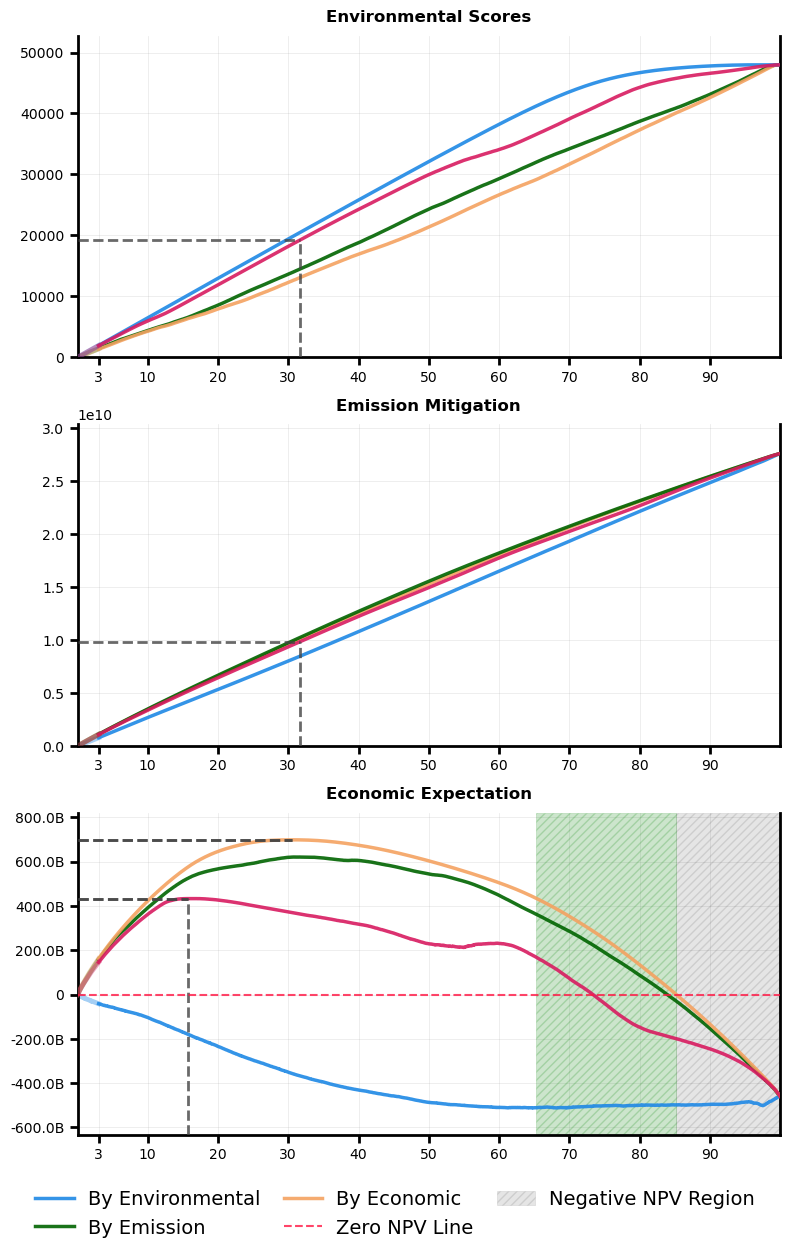

交叉目标分析图创建完成！


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm


def create_cross_target_analysis(pixel_optimized_data, us_states_4326=None, df_net_benefit=None):
    """
    创建交叉目标分析图，比较单目标最优排序在其他目标下的表现
    修改为3×1布局，并计算四条曲线与[0,1]的积分
    """
    # 创建3行1列的布局
    fig, axes = plt.subplots(3, 1, figsize=(8, 12))  

    # 定义三个变量
    variables = [
        ('predicted_prob', 'Environmental Scores', 'Score'),
        ('Expectation_net_benefit', 'Emission Mitigation', 'Mg C'),
        ('avg_npv', 'Economic Expectation', 'USD')
    ]

    # 颜色方案
    ccd_color = '#D81B60'   # 洋红色
    env_color = '#1E88E5'   # 蓝色
    carbon_color = '#006400'  # 深绿色
    economic_color = '#F4A261'  # 橙色

    # 映射变量名到颜色
    variable_colors = {
        'predicted_prob': env_color,
        'Expectation_net_benefit': carbon_color,
        'avg_npv': economic_color
    }

    # 定义标记样式（不再用于数据点，仅用于图例）
    markers = {
        'ccd': 'o',
        'predicted_prob': 's',
        'Expectation_net_benefit': '^',
        'avg_npv': 'D'
    }

    # 用于收集所有图例元素
    all_legend_elements = []

    # ==================== 数据预处理：取出需要的列后进行merge ====================
    print("=== 数据预处理：取出需要的列后进行merge ===")
    area_data = df_net_benefit[['lat', 'lon', 'area_m2']].copy()
    print("与pixel_optimized_data进行merge...")
    merged_data = pixel_optimized_data.merge(area_data, on=['lat', 'lon'], how='inner')
    print(f"合并后数据行数: {len(merged_data)}")
    if len(merged_data) == 0:
        raise ValueError("合并后没有数据，请检查lat, lon是否匹配")
    area_values = merged_data['area_m2'].values / 10000  # 转换为公顷
    print(f"数据合并完成，总面积: {np.sum(area_values):.2f} 公顷")

    # 用于存储所有图的积分结果和性能提升分析
    all_integration_results = {}
    performance_improvement_analysis = {}

    for idx, (variable_name, variable_label, unit) in enumerate(variables):
        ax1 = axes[idx]  # 修改：使用axes[idx]而不是axes[idx]
        ax1.spines['top'].set_visible(False)

        # ==================== 数据准备 ====================
        benefit_density_values = merged_data[variable_name].values
        ccd_values = merged_data['ccd_optimized'].values

        if variable_name == 'predicted_prob':
            benefit_total_values = benefit_density_values
        else:
            benefit_total_values = benefit_density_values * area_values

        # ==================== 曲线计算 ====================
        ccd_sorted_indices = np.argsort(ccd_values)[::-1]
        ccd_cumulative_benefits = np.cumsum(benefit_total_values[ccd_sorted_indices])
        ccd_cumulative_percentage = np.arange(1, len(ccd_cumulative_benefits) + 1) / len(ccd_cumulative_benefits) * 100
        ccd_cumulative_benefits = np.concatenate([[0], ccd_cumulative_benefits])
        ccd_cumulative_percentage = np.concatenate([[0], ccd_cumulative_percentage])

        target_sorted_indices = np.argsort(benefit_total_values)[::-1]
        target_cumulative_benefits = np.cumsum(benefit_total_values[target_sorted_indices])
        target_cumulative_percentage = np.arange(1, len(target_cumulative_benefits) + 1) / len(target_cumulative_benefits) * 100
        target_cumulative_benefits = np.concatenate([[0], target_cumulative_benefits])
        target_cumulative_percentage = np.concatenate([[0], target_cumulative_percentage])

        cross_curves_data = []
        for other_var_name, other_var_label, other_unit in variables:
            if other_var_name != variable_name:
                other_density_values = merged_data[other_var_name].values
                if other_var_name == 'predicted_prob':
                    other_total_values = other_density_values
                else:
                    other_total_values = other_density_values * area_values
                cross_sorted_indices = np.argsort(other_total_values)[::-1]
                cross_cumulative_benefits = np.cumsum(benefit_total_values[cross_sorted_indices])
                cross_cumulative_percentage = np.arange(1, len(cross_cumulative_benefits) + 1) / len(cross_cumulative_benefits) * 100
                cross_cumulative_benefits = np.concatenate([[0], cross_cumulative_benefits])
                cross_cumulative_percentage = np.concatenate([[0], cross_cumulative_percentage])
                cross_curves_data.append({
                    'label': f'By {other_var_label.split(" ")[0]}',
                    'color': variable_colors[other_var_name],
                    'marker': markers[other_var_name],
                    'percentage': cross_cumulative_percentage,
                    'benefits': cross_cumulative_benefits
                })

        # ==================== 计算积分 ====================
        print(f"\n=== {variable_label} 积分计算 ===")
        
        # 将百分比转换为[0,1]区间
        def percentage_to_01(percentage_array):
            return percentage_array / 100.0
        
        # 使用梯形法则计算积分（高效且准确）
        def calculate_integral(x, y):
            """使用梯形法则计算积分"""
            if len(x) < 2:
                return 0.0
            # 确保x是单调递增的
            if x[0] > x[-1]:
                x = x[::-1]
                y = y[::-1]
            # 梯形法则：∫f(x)dx ≈ Σ[(f(xi) + f(xi+1))/2 * (xi+1 - xi)]
            integral = 0.0
            for i in range(len(x) - 1):
                dx = x[i+1] - x[i]
                avg_y = (y[i] + y[i+1]) / 2.0
                integral += avg_y * dx
            return integral

        # 计算积分及其标准误（基于样本贡献）
        def calculate_integral_with_contribution_std_error(cumulative_benefits, cumulative_percentage):
            """基于样本贡献计算积分及其标准误"""
            x_01 = percentage_to_01(cumulative_percentage)
            integral = calculate_integral(x_01, cumulative_benefits)
            
            # 计算每个小段的贡献
            n_segments = len(cumulative_benefits) - 1
            if n_segments > 1:
                segment_contributions = []
                for i in range(n_segments):
                    dx = x_01[i+1] - x_01[i]
                    avg_y = (cumulative_benefits[i+1] + cumulative_benefits[i]) / 2.0
                    contribution = avg_y * dx
                    segment_contributions.append(contribution)
                
                # 基于贡献计算标准误
                contribution_std = np.std(segment_contributions, ddof=1)
                contribution_std_error = contribution_std / np.sqrt(n_segments)
            else:
                contribution_std_error = 0
            
            return integral, contribution_std_error
        
        # 计算四条曲线的积分和标准误
        x_01 = percentage_to_01(ccd_cumulative_percentage)
        
        # 1. CCD曲线积分
        ccd_integral, ccd_std_error = calculate_integral_with_contribution_std_error(ccd_cumulative_benefits, ccd_cumulative_percentage)
        
        # 2. 目标曲线积分
        target_integral, target_std_error = calculate_integral_with_contribution_std_error(target_cumulative_benefits, target_cumulative_percentage)
        
        # 3. 交叉曲线积分
        cross_integrals = []
        cross_integral_names = []
        cross_std_errors = []
        for i, curve in enumerate(cross_curves_data):
            cross_x_01 = percentage_to_01(curve['percentage'])
            cross_integral, cross_std_error = calculate_integral_with_contribution_std_error(curve['benefits'], curve['percentage'])
            cross_integrals.append(cross_integral)
            cross_integral_names.append(curve['label'])
            cross_std_errors.append(cross_std_error)
            print(f"  {curve['label']}: {cross_integral:.6e} ± {cross_std_error:.6e}")
        
        # 输出积分结果（含标准误）
        print(f"  CCD: {ccd_integral:.6e} ± {ccd_std_error:.6e}")
        print(f"  {variable_label.split(' ')[0]}: {target_integral:.6e} ± {target_std_error:.6e}")
        
        # 存储积分结果（包含标准误信息）
        all_integration_results[variable_name] = {
            'CCD': {'value': ccd_integral, 'std_error': ccd_std_error},
            variable_name: {'value': target_integral, 'std_error': target_std_error},
            'cross_curves': dict(zip(cross_integral_names, 
                                   [{'value': val, 'std_error': err} for val, err in zip(cross_integrals, cross_std_errors)]))
        }


        # ==================== 计算性能提升分析 ====================
        print(f"\n=== {variable_label} 性能提升分析 ===")
        
        # 收集所有其他曲线的积分值（不包括CCD）
        other_curves_integrals = [target_integral] + cross_integrals
        other_curves_names = [f'{variable_label.split(" ")[0]}'] + [curve['label'] for curve in cross_curves_data]
        
        # 计算CCD相对于其他曲线的性能提升
        performance_improvements = []
        for i, other_integral in enumerate(other_curves_integrals):
            if other_integral != 0:  # 避免除零错误
                # 相对提升率 = (CCD - 其他) / 其他 * 100%
                improvement = (ccd_integral - other_integral) / abs(other_integral) * 100
                performance_improvements.append(improvement)
                print(f"  CCD vs {other_curves_names[i]}: {improvement:+.2f}%")
            else:
                performance_improvements.append(0)
                print(f"  CCD vs {other_curves_names[i]}: 无法计算（分母为0）")
        
        # 计算平均性能提升和标准误
        valid_improvements = [imp for imp in performance_improvements if imp != 0]
        if valid_improvements:
            mean_improvement = np.mean(valid_improvements)
            std_improvement = np.std(valid_improvements, ddof=1)  # 样本标准差
            std_error = std_improvement / np.sqrt(len(valid_improvements))  # 标准误
            
            print(f"  平均性能提升: {mean_improvement:+.2f}%")
            print(f"  标准误: ±{std_error:.2f}%")
            print(f"  95%置信区间: [{mean_improvement - 1.96*std_error:.2f}%, {mean_improvement + 1.96*std_error:.2f}%]")
            
            # 存储性能提升分析结果
            performance_improvement_analysis[variable_name] = {
                'mean_improvement': mean_improvement,
                'std_error': std_error,
                'individual_improvements': dict(zip(other_curves_names, performance_improvements)),
                'ccd_integral': ccd_integral,
                'other_curves_integrals': dict(zip(other_curves_names, other_curves_integrals))
            }
        else:
            print("  无法计算性能提升（所有其他曲线积分都为0）")
            performance_improvement_analysis[variable_name] = {
                'mean_improvement': 0,
                'std_error': 0,
                'individual_improvements': dict(zip(other_curves_names, performance_improvements)),
                'ccd_integral': ccd_integral,
                'other_curves_integrals': dict(zip(other_curves_names, other_curves_integrals))
            }

        # ==================== 绘制曲线 ====================
        start_idx_ccd = np.argmin(np.abs(ccd_cumulative_percentage - 3))

        # CCD曲线
        ax1.plot(ccd_cumulative_percentage[0:start_idx_ccd], ccd_cumulative_benefits[0:start_idx_ccd],
                 color=ccd_color, linewidth=3.5, alpha=0.4, linestyle='-', zorder=4)
        ax1.plot(ccd_cumulative_percentage[start_idx_ccd:], ccd_cumulative_benefits[start_idx_ccd:],
                 color=ccd_color, linewidth=2.5, alpha=0.9, linestyle='-', zorder=4,
                 label='CCD')

        # 目标曲线
        target_color_current = variable_colors[variable_name]
        ax1.plot(target_cumulative_percentage[0:start_idx_ccd], target_cumulative_benefits[0:start_idx_ccd],
                 color=target_color_current, linewidth=3.5, alpha=0.4, linestyle='-', zorder=3)
        ax1.plot(target_cumulative_percentage[start_idx_ccd:], target_cumulative_benefits[start_idx_ccd:],
                 color=target_color_current, linewidth=2.5, alpha=0.9, linestyle='-', zorder=3,
                 label=f'{variable_label.split(" ")[0]}')

        # 交叉曲线
        for curve in cross_curves_data:
            ax1.plot(curve['percentage'][0:start_idx_ccd], curve['benefits'][0:start_idx_ccd],
                     color=curve['color'], linewidth=3.5, alpha=0.4, linestyle='-', zorder=2)
            ax1.plot(curve['percentage'][start_idx_ccd:], curve['benefits'][start_idx_ccd:],
                     color=curve['color'], linewidth=2.5, alpha=0.9, linestyle='-', zorder=2,
                     label=curve['label'])

        # 特殊处理NPV的Y=0线和黑色斜杠阴影
        if variable_name == 'avg_npv':
            ax1.axhline(y=0, color='#FF1744', linestyle='--', linewidth=1.5, alpha=0.8, zorder=6)
            
            # 找到Economic曲线与Y=0轴的交点
            economic_negative_mask = target_cumulative_benefits < 0
            intersection_x = None
            if np.any(economic_negative_mask):
                # 找到第一个负值点
                first_negative_idx = np.where(economic_negative_mask)[0][0]  # 修复：使用economic_negative_mask
                if first_negative_idx > 0:
                    # 计算与Y=0的交点
                    x1, y1 = target_cumulative_percentage[first_negative_idx-1], target_cumulative_benefits[first_negative_idx-1]
                    x2, y2 = target_cumulative_percentage[first_negative_idx], target_cumulative_benefits[first_negative_idx]
                    
                    # 线性插值找到交点
                    if y2 != y1:
                        intersection_x = x1 + (x2 - x1) * (0 - y1) / (y2 - y1)
                        intersection_y = 0
                        
                        # 绘制黑色斜杠阴影区域（右边部分：Economic NPV < 0 与X轴围合的部分）
                        ax1.axvspan(intersection_x, 100, color='black', alpha=0.1, zorder=1, 
                                   hatch='////', edgecolor='black', linewidth=0.5)
                        
                        print(f"Economic NPV - Economic曲线与Y=0轴交点: X={intersection_x:.2f}%, Y={intersection_y}")
            
            # 找到CCD和Economic维度的最高点和最低点
            ccd_max_idx = np.argmax(ccd_cumulative_benefits)
            economic_max_idx = np.argmax(target_cumulative_benefits)
            economic_min_idx = np.argmin(target_cumulative_benefits)
            
            ccd_max_x = ccd_cumulative_percentage[ccd_max_idx]
            ccd_max_y = ccd_cumulative_benefits[ccd_max_idx]
            economic_max_x = target_cumulative_percentage[economic_max_idx]
            economic_max_y = target_cumulative_benefits[economic_max_idx]
            economic_min_x = target_cumulative_percentage[economic_min_idx]
            economic_min_y = target_cumulative_benefits[economic_min_idx]
            
            # 计算Economic NPV最小值对应的分位数
            economic_density_values = merged_data['avg_npv'].values
            economic_total_values = economic_density_values * area_values
            
            # 按Economic NPV排序（从大到小）
            economic_sorted_indices = np.argsort(economic_total_values)[::-1]
            economic_sorted_values = economic_total_values[economic_sorted_indices]
            economic_sorted_areas = area_values[economic_sorted_indices]
            
            # 计算累积面积和累积效益
            cumulative_areas = np.cumsum(economic_sorted_areas)
            cumulative_benefits = np.cumsum(economic_sorted_values)
            
            # 找到整个曲线的最终最小值（累积效益的最小值）
            final_min_benefit = cumulative_benefits[-1]  # 这是整个曲线的最终值
            final_min_benefit_abs = abs(final_min_benefit)
            
            print(f"Economic NPV - 整个曲线最终值: {final_min_benefit:.2e} USD")
            print(f"Economic NPV - 最终值绝对值: {final_min_benefit_abs:.2e} USD")
            
            # 找到Economic曲线上与最终值绝对值相等的两个交点
            target_value = final_min_benefit_abs
            intersection_points = []
            
            # 在累积效益曲线上寻找交点
            for i in range(len(cumulative_benefits) - 1):
                y1, y2 = cumulative_benefits[i], cumulative_benefits[i+1]
                # 检查是否跨越目标值
                if (y1 <= target_value <= y2) or (y2 <= target_value <= y1):
                    # 线性插值找到精确交点
                    if y2 != y1:
                        t = (target_value - y1) / (y2 - y1)
                        area_ratio = t * (cumulative_areas[i+1] - cumulative_areas[i]) + cumulative_areas[i]
                        percentage = (area_ratio / np.sum(area_values)) * 100
                        intersection_points.append({
                            'index': i,
                            'percentage': percentage,
                            'area': area_ratio,
                            'benefit': target_value
                        })
            
            # 输出交点信息
            if len(intersection_points) >= 2:
                print(f"Economic NPV - 找到 {len(intersection_points)} 个交点:")
                for i, point in enumerate(intersection_points):
                    print(f"  交点 {i+1}: X={point['percentage']:.2f}%, 累积面积={point['area']:.2f} 公顷, Y={point['benefit']:.2e} USD")
                
                # 计算两个交点之间的区间
                if len(intersection_points) >= 2:
                    point1 = intersection_points[0]
                    point2 = intersection_points[1]
                    interval_start = min(point1['percentage'], point2['percentage'])
                    interval_end = max(point1['percentage'], point2['percentage'])
                    print(f"Economic NPV - 区间 [{interval_start:.2f}%, {interval_end:.2f}%] 内的累积效益正好抵消最终负值")
                    
                    # 绘制第二个交点X=65.24%处的绿色阴影区域
                    # 找到第二个交点在target_cumulative_percentage中的位置
                    second_intersection_x = point2['percentage']  # 假设point2是第二个交点
                    
                    # 绘制绿色阴影区域（从第二个交点到Y=0轴，避免与右侧黑色阴影重合）
                    ax1.axvspan(second_intersection_x, intersection_x, color='green', alpha=0.2, zorder=1, 
                               hatch='////', edgecolor='green', linewidth=0.5)
                    
                    print(f"Economic NPV - 第二个交点绿色阴影区域: X={second_intersection_x:.2f}% 到 X={intersection_x:.2f}%")
            else:
                print(f"Economic NPV - 未找到足够的交点来抵消最终负值 {final_min_benefit:.2e} USD")


                
            # 找到CCD和Economic维度的最高点
            ccd_max_idx = np.argmax(ccd_cumulative_benefits)
            economic_max_idx = np.argmax(target_cumulative_benefits)
            
            ccd_max_x = ccd_cumulative_percentage[ccd_max_idx]
            ccd_max_y = ccd_cumulative_benefits[ccd_max_idx]
            economic_max_x = target_cumulative_percentage[economic_max_idx]
            economic_max_y = target_cumulative_benefits[economic_max_idx]
            
            # 用深灰色虚线标注最高点
            y_axis_min = ax1.get_ylim()[0]
            ax1.hlines(y=ccd_max_y, xmin=0, xmax=ccd_max_x, color='#444444', linestyle='--', linewidth=2, alpha=0.8, zorder=5)
            ax1.hlines(y=economic_max_y, xmin=0, xmax=economic_max_x, color='#444444', linestyle='--', linewidth=2, alpha=0.8, zorder=5)
            print(f"Economic NPV - CCD最高点: X={ccd_max_x:.2f}%, Y={ccd_max_y:.2e}")
            print(f"Economic NPV - Economic最高点: X={economic_max_x:.2f}%, Y={economic_max_y:.2e}") 
            
            # 用深灰色虚线标注最高点（垂直方向到x轴，不是到零点）
            # 计算y轴的最小值（即x轴位置）
            y_axis_min = ax1.get_ylim()[0]
            
            # 只画到各自最高点的水平线
            ax1.hlines(y=ccd_max_y, xmin=0, xmax=ccd_max_x, color='#444444', linestyle='--', linewidth=2, alpha=0.8, zorder=5)
            ax1.hlines(y=economic_max_y, xmin=0, xmax=economic_max_x, color='#444444', linestyle='--', linewidth=2, alpha=0.8, zorder=5)
            print(f"Economic NPV - CCD最高点: X={ccd_max_x:.2f}%, Y={ccd_max_y:.2e}")
            print(f"Economic NPV - Economic最高点: X={economic_max_x:.2f}%, Y={economic_max_y:.2e}")

        # 在所有图中绘制X=31.66%的垂直线（边际效应正向的分界点）
        if variable_name in ['predicted_prob', 'Expectation_net_benefit']:
            marginal_effect_x = 31.66
            closest_idx = np.argmin(np.abs(ccd_cumulative_percentage - marginal_effect_x))
            marginal_effect_y = ccd_cumulative_benefits[closest_idx]
            
            # 只画到对应的y值，不贯穿
            ax1.plot([marginal_effect_x, marginal_effect_x], [0, marginal_effect_y], color='#444444', linestyle='--', linewidth=2, alpha=0.8, zorder=5)
            ax1.hlines(y=marginal_effect_y, xmin=0, xmax=marginal_effect_x, 
                      color='#444444', linestyle='--', linewidth=2, alpha=0.8, zorder=5)
            
            # 打印当前variable的对应值
            if variable_name == 'predicted_prob':
                print(f"Environmental Scores - 边际效应正向分界点: X={marginal_effect_x:.2f}%, Y={marginal_effect_y:.2e}")
            elif variable_name == 'Expectation_net_benefit':
                print(f"Emission Mitigation - 边际效应正向分界点: X={marginal_effect_x:.2f}%, Y={marginal_effect_y:.2e}")
            
            # 计算在31.66%（CCD排序下）时，其他目标对应的累计值
            ccd_selected_count = closest_idx + 1  # CCD选中的像素数量
            
            if variable_name == 'predicted_prob':
                # Environmental Scores部分：计算其他目标下的Environmental Scores累计
                # 输出本身的Environmental Scores累计
                env_sorted_indices = np.argsort(merged_data['predicted_prob'].values)[::-1]
                env_selected_indices = env_sorted_indices[:ccd_selected_count]
                self_env_score = merged_data['predicted_prob'].values[env_selected_indices].sum()
                print(f"  [31.66%] Environmental Scores自身累计: {self_env_score:.2e}")

                # 按Emission Mitigation排序，取前ccd_selected_count个像素
                emission_sorted_indices = np.argsort(merged_data['Expectation_net_benefit'].values * area_values)[::-1]
                emission_selected_indices = emission_sorted_indices[:ccd_selected_count]
                emission_env_score = merged_data['predicted_prob'].values[emission_selected_indices].sum()
                
                # 按Economic NPV排序，取前ccd_selected_count个像素
                economic_sorted_indices = np.argsort(merged_data['avg_npv'].values * area_values)[::-1]
                economic_selected_indices = economic_sorted_indices[:ccd_selected_count]
                economic_env_score = merged_data['predicted_prob'].values[economic_selected_indices].sum()
                
                print(f"  [31.66%] Emission Mitigation目标下Environmental Scores累计: {emission_env_score:.2e}")
                print(f"  [31.66%] Economic Expectation目标下Environmental Scores累计: {economic_env_score:.2e}")
                
            elif variable_name == 'Expectation_net_benefit':
                # Emission Mitigation部分：计算其他目标下的Emission Mitigation累计
                # 按Environmental Scores排序，取前ccd_selected_count个像素
                env_sorted_indices = np.argsort(merged_data['predicted_prob'].values)[::-1]
                env_selected_indices = env_sorted_indices[:ccd_selected_count]
                env_emission_score = (merged_data['Expectation_net_benefit'].values[env_selected_indices] * 
                                    area_values[env_selected_indices]).sum()
                
                # 按Economic NPV排序，取前ccd_selected_count个像素
                economic_sorted_indices = np.argsort(merged_data['avg_npv'].values * area_values)[::-1]
                economic_selected_indices = economic_sorted_indices[:ccd_selected_count]
                economic_emission_score = (merged_data['Expectation_net_benefit'].values[economic_selected_indices] * 
                                        area_values[economic_selected_indices]).sum()
                
                print(f"  [31.66%] Environmental Scores目标下Emission Mitigation累计: {env_emission_score:.2e}")
                print(f"  [31.66%] Economic Expectation目标下Emission Mitigation累计: {economic_emission_score:.2e}")

        # 设置X轴刻度
        key_percentages = [3, 10, 20, 30, 40, 50, 60, 70, 80, 90]
        xtick_positions = [p for p in key_percentages if p >= 3]
        xtick_labels = [f'{p}' for p in xtick_positions]
        if 3 in xtick_positions and 5 in xtick_positions:
            idx_3 = xtick_positions.index(3)
            idx_5 = xtick_positions.index(5)
            if abs(ccd_cumulative_percentage[np.argmin(np.abs(ccd_cumulative_percentage - 3))] -
                   ccd_cumulative_percentage[np.argmin(np.abs(ccd_cumulative_percentage - 5))]) < 2:
                xtick_positions.pop(idx_3)
                xtick_labels.pop(idx_3)
        ax1.set_xticks(xtick_positions)
        ax1.set_xticklabels(xtick_labels, ha='center', fontsize=10)
        ax1.set_xlim(0, 100)

        # 设置Y轴范围
        all_curves_min = min(ccd_cumulative_benefits.min(), target_cumulative_benefits.min())
        all_curves_max = max(ccd_cumulative_benefits.max(), target_cumulative_benefits.max())
        for curve in cross_curves_data:
            all_curves_min = min(all_curves_min, curve['benefits'].min())
            all_curves_max = max(all_curves_max, curve['benefits'].max())
        if variable_name == 'avg_npv':
            y_range = all_curves_max - all_curves_min
            if y_range == 0:
                y_range = abs(all_curves_max) * 0.1
            ax1.set_ylim(all_curves_min - y_range * 0.1, all_curves_max + y_range * 0.1)
            def custom_y_formatter(x, pos):
                if abs(x) >= 1e9:
                    return f'{x/1e9:.1f}B'
                elif abs(x) >= 1e6:
                    return f'{x/1e6:.0f}M'
                else:
                    return f'{x:.0f}'
            ax1.yaxis.set_major_formatter(FuncFormatter(custom_y_formatter))
        else:
            ax1.set_ylim(0, all_curves_max * 1.1)

        # 重新获取y轴最小值（如果ylim被更改）
        if variable_name == 'avg_npv':
            y_axis_min = ax1.get_ylim()[0]
            # 重新画垂直线到x轴（y_axis_min），避免ylim变动导致线不到x轴
            # 先移除前面画的线（如果有），再画一次
            # 这里简单起见，直接再画一次即可
            ax1.plot([ccd_max_x, ccd_max_x], [y_axis_min, ccd_max_y], color='#444444', linestyle='--', linewidth=2, alpha=0.8, zorder=5)
            # ax1.plot([economic_max_x, economic_max_x], [y_axis_min, economic_max_y], color='#444444', linestyle='--', linewidth=2, alpha=0.8, zorder=5)

        ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5, zorder=0)
        ax1.set_axisbelow(True)
        
        # 使用类似6.5文件中的专业坐标轴样式设置
        ax1.tick_params(axis='both', which='major', width=2, size=6, labelsize=10, color='black')
        
        # 设置坐标轴线的颜色和粗细（黑色）
        for spine in ax1.spines.values():
            spine.set_linewidth(2)
            spine.set_color('black')
        # {chr(98+idx)}. 
        ax1.set_title(f'{variable_label}', fontsize=12, fontweight='bold', pad=10)  # 注释掉标题

        # 收集图例元素
        handles, labels = ax1.get_legend_handles_labels()
        ordered_labels = ['Smart Solution', f'{variable_label.split(" ")[0]}'] + [f'By {v[1].split(" ")[0]}' for v in variables if v[0] != variable_name]
        ordered_handles = []
        for ol in ordered_labels:
            try:
                idx_in_handles = labels.index(ol)
                ordered_handles.append(handles[idx_in_handles])
            except ValueError:
                pass

        # 添加图例元素
        for h, l in zip(ordered_handles, ordered_labels):
            is_duplicate = False
            for existing_h in all_legend_elements:
                if existing_h.get_label() == l and hasattr(h, "get_color") and hasattr(existing_h, "get_color") and h.get_color() == existing_h.get_color():
                    is_duplicate = True
                    break
            if not is_duplicate:
                all_legend_elements.append(h)

    # 统一图例布局
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    final_legend_elements = []
    for h in all_legend_elements:
        if h.get_label() == 'By CCD':
            final_legend_elements.append(h)
            break
    for var_name, var_label, _ in variables:
        target_label = f'By {var_label.split(" ")[0]}'
        for h in all_legend_elements:
            if h.get_label() == target_label and h not in final_legend_elements:
                final_legend_elements.append(h)
                break
    
    # 添加Zero NPV Line到图例
    zero_line_handle = Line2D([0], [0], color='#FF1744', linestyle='--', linewidth=1.5,
                              label='Zero NPV Line', alpha=0.8)
    final_legend_elements.append(zero_line_handle)
    
    # 添加Negative NPV Region到图例（黑色斜杠阴影）
    negative_region_handle = Patch(facecolor='black', alpha=0.1, hatch='////', 
                                  edgecolor='black', linewidth=0.5, label='Negative NPV Region')
    final_legend_elements.append(negative_region_handle)

    num_elements = len(final_legend_elements)
    ncol = (num_elements + 1) // 2

    # 图例放在下方
    fig.legend(handles=final_legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05),
               ncol=ncol, fontsize=14, frameon=False, fancybox=False, shadow=False, framealpha=0.9,
               columnspacing=1.2, handletextpad=0.7)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.05)
    
    # 返回图形和积分结果
    return fig, axes, all_integration_results, performance_improvement_analysis

# Example usage (assuming pixel_optimized_data, us_states_4326, df_net_benefit are loaded)
fig_combined, axes_combined, integration_results, performance_analysis = create_cross_target_analysis(
    pixel_optimized_data=df_pixel_optimized_data, 
    df_net_benefit=df_net_benefit
)



print("\n" + "="*80)
print("积分结果汇总 (区间 [0,1]) - 包含标准误")
print("="*80)
for var_name, results in integration_results.items():
    print(f"\n{var_name}:")
    print(f"  CCD: {results['CCD']['value']:.6e} ± {results['CCD']['std_error']:.6e}")
    print(f"  {var_name}: {results[var_name]['value']:.6e} ± {results[var_name]['std_error']:.6e}")
    for cross_name, cross_data in results['cross_curves'].items():
        print(f"  {cross_name}: {cross_data['value']:.6e} ± {cross_data['std_error']:.6e}")

# 显示性能提升分析汇总
print("\n" + "="*80)
print("CCD性能提升分析汇总")
print("="*80)
for var_name, analysis in performance_analysis.items():
    print(f"\n{var_name}:")
    print(f"  CCD积分: {analysis['ccd_integral']:.6e}")
    print(f"  平均性能提升: {analysis['mean_improvement']:+.2f}% ± {analysis['std_error']:.2f}%")
    print(f"  95%置信区间: [{analysis['mean_improvement'] - 1.96*analysis['std_error']:.2f}%, {analysis['mean_improvement'] + 1.96*analysis['std_error']:.2f}%]")
    print("  各曲线对比:")
    for curve_name, improvement in analysis['individual_improvements'].items():
        if improvement != 0:
            print(f"    vs {curve_name}: {improvement:+.2f}%")

# 计算总体性能提升
print("\n" + "="*80)
print("总体性能提升分析")
print("="*80)

# 收集所有维度的平均性能提升
all_mean_improvements = [analysis['mean_improvement'] for analysis in performance_analysis.values()]
overall_mean = np.mean(all_mean_improvements)
overall_std = np.std(all_mean_improvements, ddof=1)
overall_std_error = overall_std / np.sqrt(len(all_mean_improvements))

print(f"所有维度平均性能提升: {overall_mean:+.2f}% ± {overall_std_error:.2f}%")
print(f"95%置信区间: [{overall_mean - 1.96*overall_std_error:.2f}%, {overall_mean + 1.96*overall_std_error:.2f}%]")

# 各维度性能提升排序
sorted_dimensions = sorted(performance_analysis.items(), key=lambda x: x[1]['mean_improvement'], reverse=True)
print("\n各维度性能提升排序:")
for i, (dim_name, analysis) in enumerate(sorted_dimensions, 1):
    print(f"  {i}. {dim_name}: {analysis['mean_improvement']:+.2f}% ± {analysis['std_error']:.2f}%")

plt.show()

print("交叉目标分析图创建完成！")

### 6.2 性能提升估计（考虑原始数据的误差传播）

In [72]:
def calculate_overall_performance_with_error_propagation(performance_analysis):
    """
    使用误差传播理论计算总体性能提升及其标准误
    """
    print("=== 使用误差传播理论计算总体性能提升 ===")
    
    # 收集所有维度的性能提升和标准误
    performance_data = []
    for var_name, analysis in performance_analysis.items():
        if analysis['mean_improvement'] != 0:
            performance_data.append({
                'dimension': var_name,
                'mean_improvement': analysis['mean_improvement'],
                'std_error': analysis['std_error']
            })
    
    if not performance_data:
        print("没有有效的性能提升数据")
        return None
    
    # 计算总体均值
    n_dimensions = len(performance_data)
    overall_mean = np.mean([data['mean_improvement'] for data in performance_data])
    
    # 使用误差传播理论计算总体标准误
    # 总体标准误 = sqrt(Σ(se_i²) / n²)
    # 其中 se_i 是第i个维度的标准误
    squared_std_errors = [data['std_error']**2 for data in performance_data]
    overall_variance = np.sum(squared_std_errors) / (n_dimensions**2)
    overall_std_error = np.sqrt(overall_variance)
    
    print(f"\n误差传播计算:")
    print(f"  维度数量: {n_dimensions}")
    print("  各维度标准误:", [f"{data['std_error']:.4f}" for data in performance_data])
    print(f"  标准误平方和: {np.sum(squared_std_errors):.6f}")
    print(f"  总体方差: {overall_variance:.6f}")
    print(f"  总体标准误: {overall_std_error:.4f}")
    
    # 计算95%置信区间
    overall_ci_95 = 1.96 * overall_std_error
    overall_cv = (overall_std_error / abs(overall_mean) * 100) if overall_mean != 0 else 0
    
    # 输出结果
    print(f"\n总体性能提升结果:")
    print(f"  均值: {overall_mean:+.2f}%")
    print(f"  标准误: ±{overall_std_error:.2f}%")
    print(f"  95%置信区间: [{overall_mean - overall_ci_95:.2f}%, {overall_mean + overall_ci_95:.2f}%]")
    print(f"  变异系数: {overall_cv:.2f}%")
    
    # 与错误方法的对比
    print(f"\n方法对比:")
    print(f"  错误方法（忽略误差传播）:")
    wrong_std = np.std([data['mean_improvement'] for data in performance_data], ddof=1)
    wrong_std_error = wrong_std / np.sqrt(n_dimensions)
    print(f"    标准误: ±{wrong_std_error:.2f}%")
    print(f"    95%置信区间: [{overall_mean - 1.96*wrong_std_error:.2f}%, {overall_mean + 1.96*wrong_std_error:.2f}%]")
    
    print(f"  正确方法（误差传播）:")
    print(f"    标准误: ±{overall_std_error:.2f}%")
    print(f"    95%置信区间: [{overall_mean - overall_ci_95:.2f}%, {overall_mean + overall_ci_95:.2f}%]")
    
    # 误差传播的重要性评估
    error_ratio = overall_std_error / wrong_std_error
    print(f"\n误差传播影响:")
    print(f"  误差传播标准误 / 错误方法标准误: {error_ratio:.2f}")
    if error_ratio > 1.5:
        print(f"  误差传播显著增加了不确定性估计")
    elif error_ratio < 0.7:
        print(f"  误差传播显著减少了不确定性估计")
    else:
        print(f"  误差传播对不确定性估计影响适中")
    
    return {
        'overall_mean': overall_mean,
        'overall_std_error': overall_std_error,
        'overall_ci_95': overall_ci_95,
        'overall_cv': overall_cv,
        'n_dimensions': n_dimensions,
        'error_propagation_ratio': error_ratio
    }

# 执行正确的误差传播计算
overall_performance_correct = calculate_overall_performance_with_error_propagation(performance_analysis)

=== 使用误差传播理论计算总体性能提升 ===

误差传播计算:
  维度数量: 3
  各维度标准误: ['9.1065', '2.8890', '65.2616']
  标准误平方和: 4350.349481
  总体方差: 483.372165
  总体标准误: 21.9857

总体性能提升结果:
  均值: +6.62%
  标准误: ±21.99%
  95%置信区间: [-36.47%, 49.72%]
  变异系数: 331.91%

方法对比:
  错误方法（忽略误差传播）:
    标准误: ±3.04%
    95%置信区间: [0.67%, 12.57%]
  正确方法（误差传播）:
    标准误: ±21.99%
    95%置信区间: [-36.47%, 49.72%]

误差传播影响:
  误差传播标准误 / 错误方法标准误: 7.24
  误差传播显著增加了不确定性估计


### 6.3 优化方案分位数识别

In [78]:
def calculate_ccd_at_economic_intersection_corrected(merged_data, intersection_percentage=85.23):
    """
    计算在Economic NPV曲线与Y=0轴交点(85.23%)时对应的CCD值
    注意：85.23%表示前85.23%的像素（优先级最高的区域）
    
    Parameters:
    -----------
    merged_data : DataFrame
        合并后的数据
    intersection_percentage : float
        Economic NPV曲线与Y=0轴的交点百分比，默认85.23%
        注意：这个百分比表示前X%的像素（优先级最高区域）
    
    Returns:
    --------
    dict : 包含CCD值和其他相关信息
    """
    print(f"=== 计算前{intersection_percentage}%优先级区域对应的CCD值 ===")
    print("注意：这是逆序排列，85.23%表示前85.23%的像素（优先级最高区域）")
    
    # 获取CCD值
    ccd_values = merged_data['ccd_optimized'].values
    
    # 按CCD值排序（从大到小，优先级从高到低）
    ccd_sorted_indices = np.argsort(ccd_values)[::-1]
    ccd_sorted_values = ccd_values[ccd_sorted_indices]
    
    # 计算前85.23%对应的索引
    total_pixels = len(ccd_sorted_values)
    target_index = int(total_pixels * intersection_percentage / 100)
    
    # 确保索引在有效范围内
    target_index = min(target_index, total_pixels - 1)
    target_index = max(target_index, 0)
    
    # 获取对应的CCD值（这是前85.23%区域的边界值）
    ccd_at_intersection = ccd_sorted_values[target_index]
    
    # 计算前85.23%区域的统计信息
    ccd_selected_values = ccd_sorted_values[:target_index + 1]  # 前85.23%
    ccd_selected_mean = np.mean(ccd_selected_values)
    ccd_selected_std = np.std(ccd_selected_values, ddof=1)
    
    # 计算该区域对应的实际像素数量
    actual_pixels = target_index + 1
    actual_percentage = (actual_pixels / total_pixels) * 100
    
    print(f"目标区域: 前{intersection_percentage}%的像素（优先级最高区域）")
    print(f"实际像素数量: {actual_pixels:,}")
    print(f"实际百分比: {actual_percentage:.2f}%")
    print(f"该区域边界CCD值: {ccd_at_intersection:.6f}")
    print(f"前{intersection_percentage}%区域的CCD统计:")
    print(f"  均值: {ccd_selected_mean:.6f}")
    print(f"  标准差: {ccd_selected_std:.6f}")
    print(f"  最高优先级CCD值: {ccd_selected_values[0]:.6f}")
    print(f"  最低优先级CCD值: {ccd_selected_values[-1]:.6f}")
    
    # 计算CCD值的分布特征
    ccd_percentiles = np.percentile(ccd_selected_values, [25, 50, 75])
    print(f"  25%分位数: {ccd_percentiles[0]:.6f}")
    print(f"  50%分位数: {ccd_percentiles[1]:.6f}")
    print(f"  75%分位数: {ccd_percentiles[2]:.6f}")
    
    # 计算CCD值的范围
    ccd_range = ccd_selected_values.max() - ccd_selected_values.min()
    print(f"  CCD值范围: {ccd_range:.6f}")
    
    # 计算剩余区域的CCD值
    remaining_values = ccd_sorted_values[target_index + 1:]
    if len(remaining_values) > 0:
        remaining_mean = np.mean(remaining_values)
        print(f"剩余{100-intersection_percentage:.2f}%区域的CCD均值: {remaining_mean:.6f}")
        print(f"优先级对比: 前{intersection_percentage}%区域 vs 剩余区域")
        print(f"  CCD均值差异: {ccd_selected_mean - remaining_mean:.6f}")
    
    # 验证计算正确性
    print(f"\n=== 验证计算正确性 ===")
    print(f"总像素数: {total_pixels:,}")
    print(f"目标索引: {target_index}")
    print(f"目标百分比: {intersection_percentage:.2f}%")
    print(f"实际百分比: {actual_percentage:.2f}%")
    print(f"85.23%位置对应的CCD值: {ccd_at_intersection:.6f}")
    
    # 显示CCD值的整体分布
    print(f"\n=== CCD值整体分布 ===")
    print(f"全局最大值: {ccd_sorted_values[0]:.6f}")
    print(f"全局最小值: {ccd_sorted_values[-1]:.6f}")
    print(f"全局范围: {ccd_sorted_values[0] - ccd_sorted_values[-1]:.6f}")
    
    # 显示85.23%位置附近的几个值进行验证
    start_idx = max(0, target_index - 2)
    end_idx = min(total_pixels, target_index + 3)
    print(f"\n=== 85.23%位置附近的CCD值 ===")
    for i in range(start_idx, end_idx):
        percentage = (i + 1) / total_pixels * 100
        marker = " ← 85.23%位置" if i == target_index else ""
        print(f"  位置 {i+1:6d} ({percentage:6.2f}%): {ccd_sorted_values[i]:.6f}{marker}")
    
    return {
        'target_percentage': intersection_percentage,
        'actual_percentage': actual_percentage,
        'pixel_count': actual_pixels,
        'boundary_ccd_value': ccd_at_intersection,
        'ccd_statistics': {
            'mean': ccd_selected_mean,
            'std': ccd_selected_std,
            'highest_priority': ccd_selected_values[0],
            'lowest_priority_in_region': ccd_selected_values[-1],
            'percentiles': {
                '25%': ccd_percentiles[0],
                '50%': ccd_percentiles[1],
                '75%': ccd_percentiles[2]
            },
            'range': ccd_range
        }
    }

# 执行计算
ccd_at_intersection = calculate_ccd_at_economic_intersection_corrected(df_pixel_optimized_data, intersection_percentage=85.23)

# 输出关键结果
if ccd_at_intersection:
    print(f"\n{'='*60}")
    print("关键结果摘要")
    print(f"{'='*60}")
    print(f"85.23%位置对应的CCD值: {ccd_at_intersection['boundary_ccd_value']:.6f}")
    print(f"该位置的实际像素索引: {ccd_at_intersection['pixel_count']:,}")
    print(f"该位置的实际百分比: {ccd_at_intersection['actual_percentage']:.2f}%")
    print(f"前85.23%区域的CCD均值: {ccd_at_intersection['ccd_statistics']['mean']:.6f}")
    print(f"前85.23%区域的CCD标准差: {ccd_at_intersection['ccd_statistics']['std']:.6f}")

=== 计算前85.23%优先级区域对应的CCD值 ===
注意：这是逆序排列，85.23%表示前85.23%的像素（优先级最高区域）
目标区域: 前85.23%的像素（优先级最高区域）
实际像素数量: 55,385
实际百分比: 85.23%
该区域边界CCD值: 0.704729
前85.23%区域的CCD统计:
  均值: 0.858035
  标准差: 0.067595
  最高优先级CCD值: 0.997609
  最低优先级CCD值: 0.704729
  25%分位数: 0.806470
  50%分位数: 0.864056
  75%分位数: 0.896295
  CCD值范围: 0.292881
剩余14.77%区域的CCD均值: 0.582342
优先级对比: 前85.23%区域 vs 剩余区域
  CCD均值差异: 0.275693

=== 验证计算正确性 ===
总像素数: 64,982
目标索引: 55384
目标百分比: 85.23%
实际百分比: 85.23%
85.23%位置对应的CCD值: 0.704729

=== CCD值整体分布 ===
全局最大值: 0.997609
全局最小值: 0.337582
全局范围: 0.660027

=== 85.23%位置附近的CCD值 ===
  位置  55383 ( 85.23%): 0.704761
  位置  55384 ( 85.23%): 0.704745
  位置  55385 ( 85.23%): 0.704729 ← 85.23%位置
  位置  55386 ( 85.23%): 0.704725
  位置  55387 ( 85.23%): 0.704705

关键结果摘要
85.23%位置对应的CCD值: 0.704729
该位置的实际像素索引: 55,385
该位置的实际百分比: 85.23%
前85.23%区域的CCD均值: 0.858035
前85.23%区域的CCD标准差: 0.067595
